### CHURN PREDICTION 

### `STEP 1: PROBLEM STATEMENT`

### `STEP 2: HYPOTHESIS GENERATION`

### `STEP 3: IMPORTING LIBRARIES / LOADING DATASET / DATA UNDERSTANDING`

In [1]:
import pandas as pd 
import numpy as np
import os 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset

data = pd.read_csv('Telco-Customer-Churn.csv')
data.head(3)

CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  
1      Mailed check          56.95        1889.5    No  
2      Mailed check          53.85        108.15   Yes  

[3 rows x 21 columns]

In [3]:
# Shape of data 

data.shape

(7043, 21)

In [4]:
# Distribution of target variable 

data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
# Checking null values 

data.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Checking info 

data.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# data['TotalCharges'] = data['TotalCharges'].astype('float32') # When running for first time will give error
# data[data['TotalCharges'] == ' ']
data['TotalCharges'].replace(to_replace = ' ', value = 0.0, inplace = True)

In [8]:
# Converting Total Charges datatype from object to float

data['TotalCharges'] = data['TotalCharges'].astype('float')

<br>

### `STEP 4: DATA EXPLORATION (EDA) - UNIVARIANT / BIVARIANT`

#### `UNIVARIANT / BIVARIANT ANLAYSIS - CATEGORICAL / ORDINAL`

In [9]:
categorical_col = []

for col in data.columns:
    if(data[col].dtypes == 'object'):
        categorical_col.append(col)

In [10]:
categorical_col

['CustomerID',
 'Gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [11]:
# Mapping categorical values into numeric

data['Churn'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)

In [12]:
# Binary Columns & Multiple Category Columns

binary_columns = []
multiple_categorical_cols = []

columns = data.columns

for cols in columns:
    if ((data[cols].value_counts().shape[0] == 2) and (cols != 'Churn')):
        binary_columns.append(cols)
    elif ((data[cols].value_counts().shape[0] > 2) and (data[cols].dtypes == 'object')):
        multiple_categorical_cols.append(cols)

<br>

#### `BINARY_CATEGORICAL_VALUE`

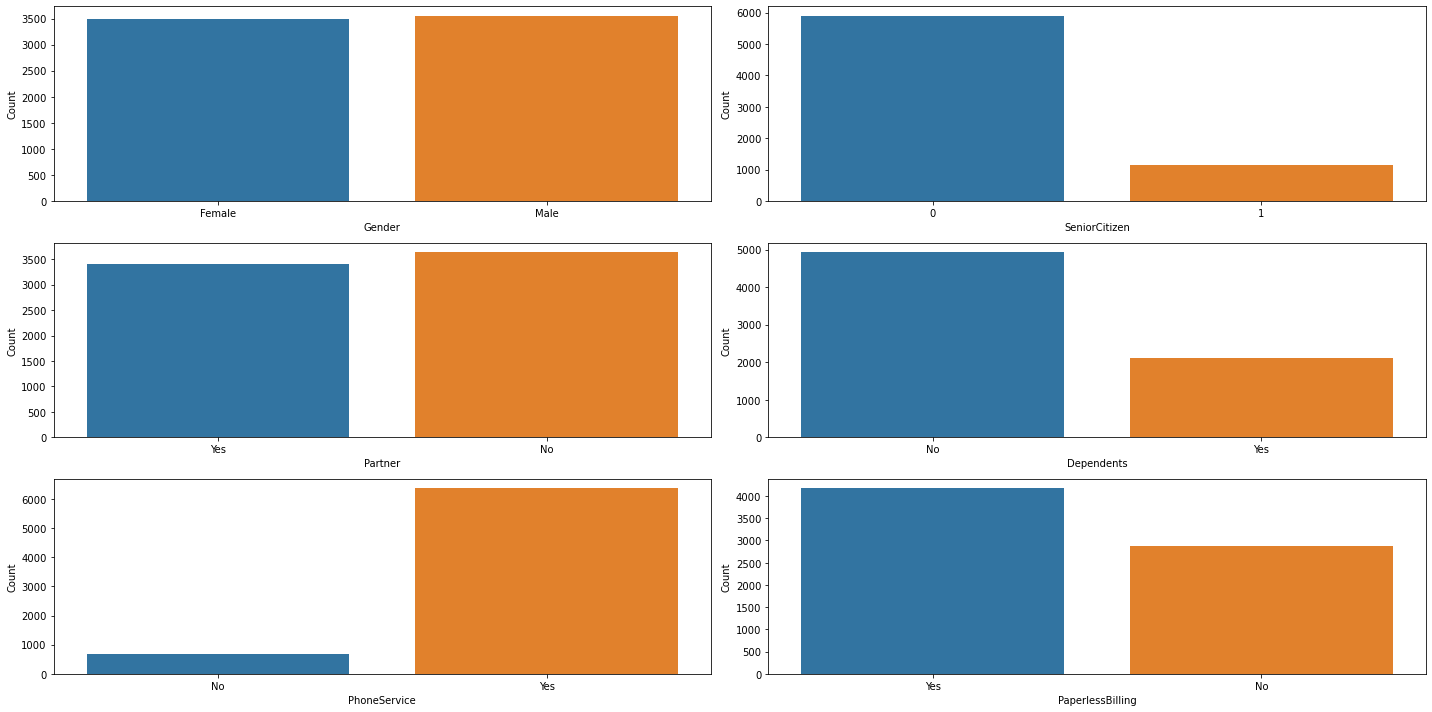

In [13]:
plt.figure(figsize = (20,10))
for i in enumerate(binary_columns):
    plt.subplot(3, 2, i[0]+1)
    sns.countplot(x = i[1], data = data)
    plt.tight_layout()
    plt.ylabel('Count')

In [14]:
data.shape

(7043, 21)

In [15]:
6361/7043

0.9031662643759761

In [16]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [17]:
# Gender 

data[['Gender', 'Churn']].groupby(by = 'Gender').agg({'Churn' : 'mean'})

Churn
Gender          
Female  0.269209
Male    0.261603

In [18]:
# Senior Citizen 

data[['SeniorCitizen', 'Churn']].groupby(by = 'SeniorCitizen').agg({'Churn' : 'mean'})

Churn
SeniorCitizen          
0              0.236062
1              0.416813

In [19]:
# Partner

data[['Partner', 'Churn']].groupby(by = 'Partner').agg({'Churn' : 'mean'})

Churn
Partner          
No       0.329580
Yes      0.196649

In [20]:
# Dependents

data[['Dependents', 'Churn']].groupby(by = 'Dependents').agg({'Churn' : 'mean'})

Churn
Dependents          
No          0.312791
Yes         0.154502

In [21]:
# Phone Service 

data[['PhoneService', 'Churn']].groupby(by = 'PhoneService').agg({'Churn' : 'mean'})

Churn
PhoneService          
No            0.249267
Yes           0.267096

In [22]:
# Paperless Billing 

data[['PaperlessBilling','Churn']].groupby(by = ['PaperlessBilling']).agg({'Churn' : 'mean'})

Churn
PaperlessBilling          
No                0.163301
Yes               0.335651

<br>

#### `MULTIPLE_CATEGORICAL_VALUES`

In [23]:
multiple_categorical_cols

['CustomerID',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

Along with `InernetService` variable we get other categorical variables if the customer has opted for Internet Services.

    1) Online Backup
    2) Online Security 
    3) Device Protection
    4) TechSupport
    5) StreamingMovies
    6) StreamingTV
    7) Contract
    8) PaymentMethod

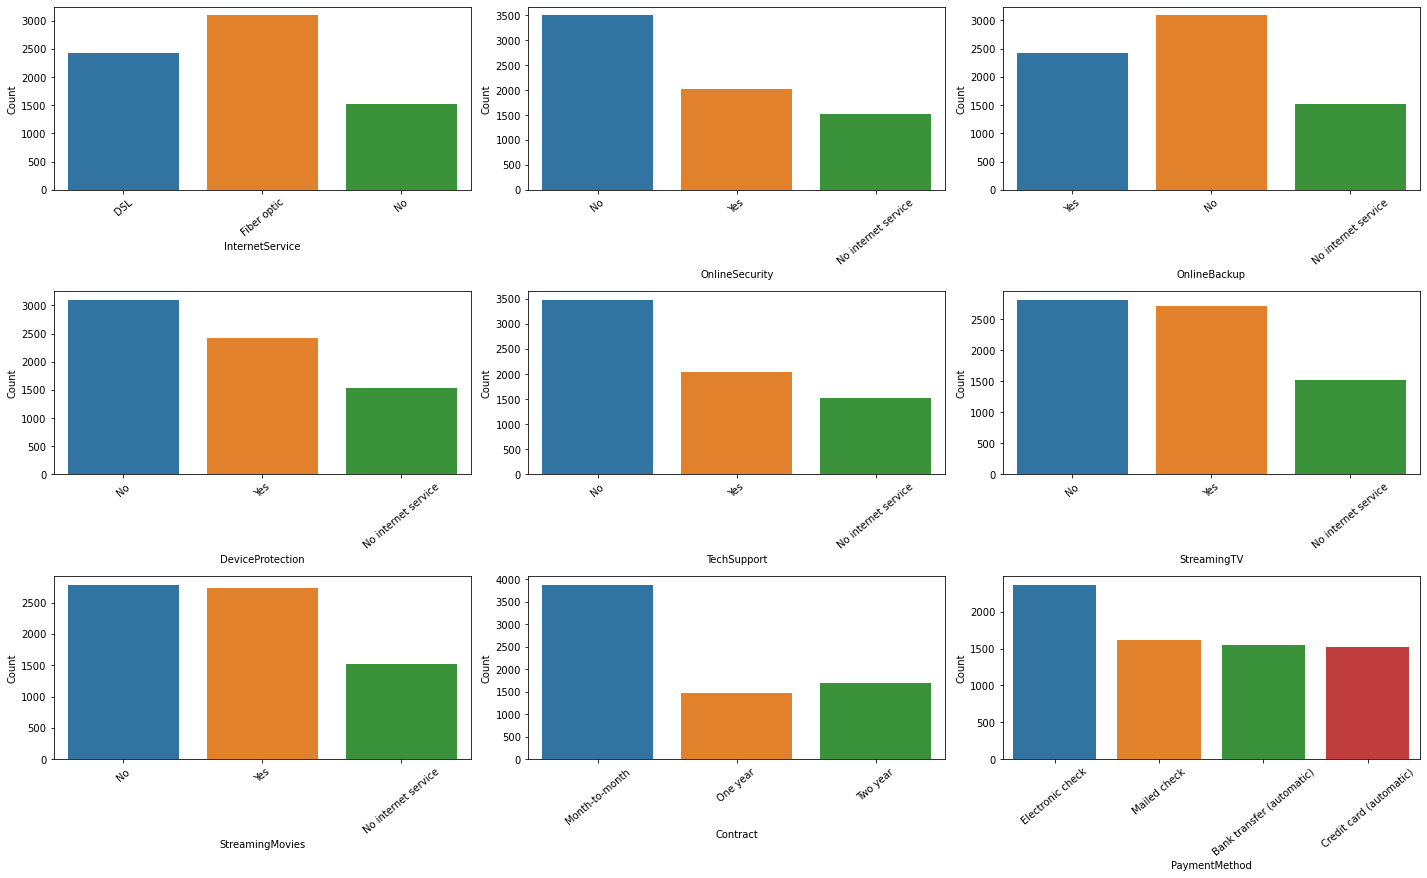

In [24]:
internet_service_var = [
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

plt.figure(figsize = (20, 12))
for i in enumerate(internet_service_var):
    plt.subplot(3,3, i[0]+1)
    sns.countplot(i[1], data = data)
    plt.tight_layout()
    plt.ylabel('Count')
    plt.xticks(rotation = 40)

In [25]:
data[data['InternetService'] == 'No'].shape 
# 1526 records

(1526, 21)

In [26]:
#data[data['OnlineSecurity']  == 'No internet service'].shape
#data[data['OnlineBackup']    == 'No internet service'].shape
#data[data['StreamingMovies'] == 'No internet service'].shape
#data[data['StreamingTV']     == 'No internet service'].shape
#data[data['TechSupport']     == 'No internet service'].shape

In [27]:
data.shape

(7043, 21)

In [28]:
# Internet Service Provider

data[['InternetService', 'Churn']].groupby(by = ['InternetService']).agg({'Churn' : 'mean'})

Churn
InternetService          
DSL              0.189591
Fiber optic      0.418928
No               0.074050

In [29]:
data[['InternetService', 'MonthlyCharges']].groupby(by = ['InternetService']).agg({'MonthlyCharges' : 'mean'})

MonthlyCharges
InternetService                
DSL                   58.102169
Fiber optic           91.500129
No                    21.079194

In [30]:
# Internet Service varibles vs Churn 

print(data[['OnlineSecurity', 'Churn']].groupby('OnlineSecurity').agg({'Churn' : 'mean'}))
print("\n")
print(data[['OnlineBackup', 'Churn']].groupby('OnlineBackup').agg({'Churn' : 'mean'}))
print("\n")
print(data[['DeviceProtection', 'Churn']].groupby('DeviceProtection').agg({'Churn' : 'mean'}))
print("\n")
print(data[['TechSupport', 'Churn']].groupby('TechSupport').agg({'Churn' : 'mean'}))
print("\n")
print(data[['StreamingMovies', 'Churn']].groupby('StreamingMovies').agg({'Churn' : 'mean'}))
print("\n")
print(data[['StreamingTV', 'Churn']].groupby('StreamingTV').agg({'Churn' : 'mean'}))
print("\n")

                        Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112


                        Churn
OnlineBackup                 
No                   0.399288
No internet service  0.074050
Yes                  0.215315


                        Churn
DeviceProtection             
No                   0.391276
No internet service  0.074050
Yes                  0.225021


                        Churn
TechSupport                  
No                   0.416355
No internet service  0.074050
Yes                  0.151663


                        Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414


                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702




In [31]:
# Contract 

data[['Contract', 'Churn']].groupby(by = ['Contract']).agg({'Churn' : 'mean'})

Churn
Contract                
Month-to-month  0.427097
One year        0.112695
Two year        0.028319

In [32]:
# PaymentMethod 

data[['PaymentMethod', 'Churn']].groupby(by = ['PaymentMethod']).agg({'Churn' : 'mean'})

Churn
PaymentMethod                      
Bank transfer (automatic)  0.167098
Credit card (automatic)    0.152431
Electronic check           0.452854
Mailed check               0.191067

In [33]:
# Phone Service & Multi-Line 

print(data[['PhoneService']].value_counts())
print("\n")
print(data[['MultipleLines']].value_counts())

PhoneService
Yes             6361
No               682
dtype: int64


MultipleLines   
No                  3390
Yes                 2971
No phone service     682
dtype: int64


<br>

#### `CONTINUOUS VARIABLES`

In [34]:
continuous_var = ['Tenure', 'MonthlyCharges', 'TotalCharges']

temp_data = data[continuous_var]
temp_data.describe()

Tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

Column Name: Tenure
Skewness: 0.2395397495619829


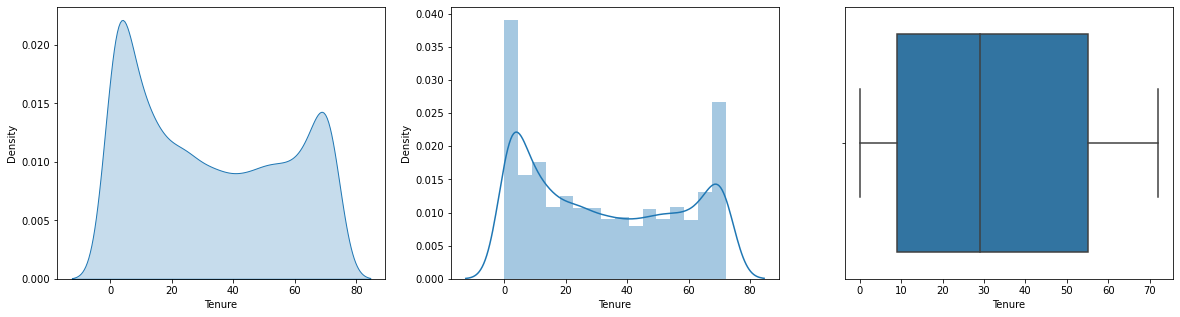

Column Name: MonthlyCharges
Skewness: -0.22052443394398033


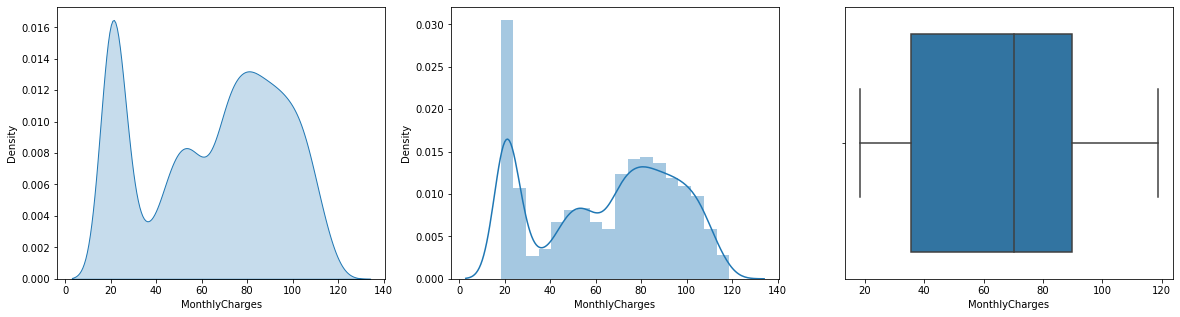

Column Name: TotalCharges
Skewness: 0.963234654832277


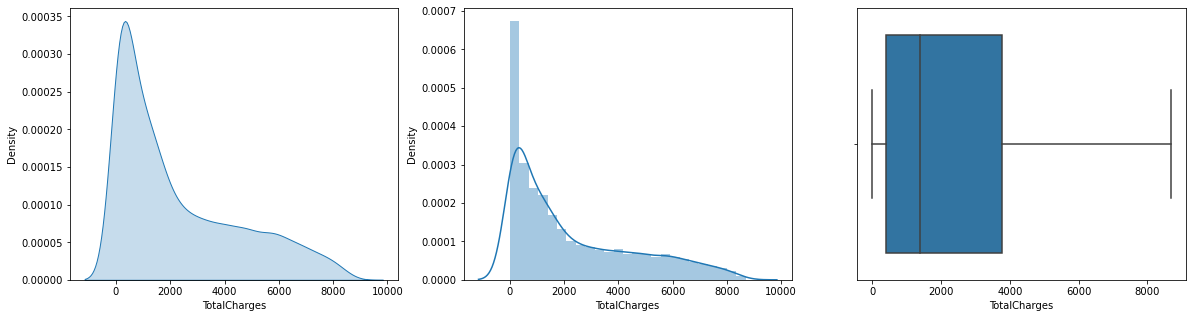

In [35]:
for val in continuous_var:
        plt.figure(figsize = (20,5))

        print(f'Column Name: {val}')
        print(f'Skewness: {temp_data[val].skew()}')
        plt.subplot(1,3,1)
        sns.kdeplot(temp_data[val], shade=True)

        plt.subplot(1,3,2)
        sns.distplot(temp_data[val])

        plt.subplot(1,3,3)
        sns.boxplot(temp_data[val], orient = 'horizontal')

        plt.show()

In [36]:
# Monthly Charges Analysis 

temp_data = data[['MonthlyCharges', 'Churn']]

temp_data.groupby(by = ['Churn']).describe()

MonthlyCharges                                                          
               count       mean        std    min    25%     50%   75%     max
Churn                                                                         
0             5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
1             1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35

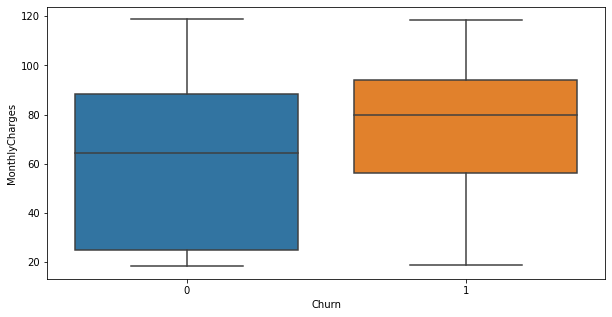

In [37]:
plt.figure(figsize = (10,5))
sns.boxplot(x = data['Churn'],
            y = data['MonthlyCharges'],
            data = data)
plt.show()

In [38]:
# Total Charges Analysis 

temp_data = data[['TotalCharges', 'Churn']]

temp_data.groupby(by = ['Churn']).describe()

TotalCharges                                                             \
             count         mean          std    min    25%       50%      75%   
Churn                                                                           
0           5174.0  2549.911442  2329.954215   0.00  572.9  1679.525  4262.85   
1           1869.0  1531.796094  1890.822994  18.85  134.5   703.550  2331.30   

                
           max  
Churn           
0      8672.45  
1      8684.80

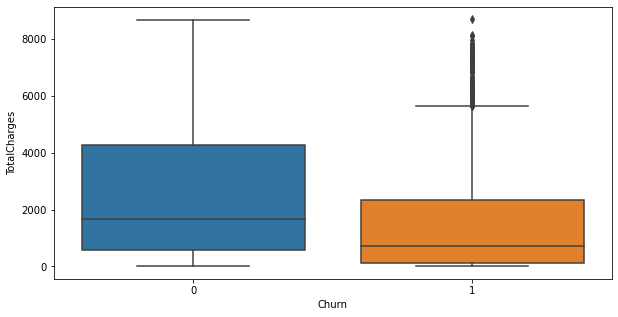

In [39]:
plt.figure(figsize = (10,5))
sns.boxplot(x = data['Churn'],
            y = data['TotalCharges'],
            data = data)
plt.show()

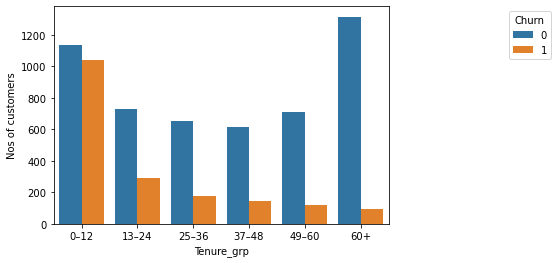

In [40]:
data['Tenure_grp'] = pd.cut(data['Tenure'], 
                            bins=[0,12,24,36,48,60,np.inf], 
                            labels=['0–12', '13–24', '25–36', '37–48', '49–60', '60+'])

temp_data = data[['Tenure_grp', 'Churn']]

temp_data = temp_data.groupby(by = ['Tenure_grp', 'Churn']).agg({'Churn' : 'count'}).rename(columns = {'Churn' : 'Nos of customers'}).reset_index()

sns.barplot(x = temp_data['Tenure_grp'],
            y = temp_data['Nos of customers'],
            data = temp_data,
            hue = temp_data['Churn'])
plt.legend(bbox_to_anchor = (1.5,1), title = 'Churn')

In [41]:
data[['Tenure', 'Churn']].groupby(['Churn']).describe()

Tenure                                                   
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

<br>

<br>

### `STEP 5: DATA PREPARATION - CATEGORICAL ENCODING / RESAMPLING `

In [42]:
data.drop(columns = ['Tenure_grp'], axis = 1, inplace = True)

In [43]:
data.drop(columns = ['CustomerID'], axis = 1, inplace = True)

In [44]:
data.drop(columns = ['PhoneService'], axis = 1, inplace = True)

In [45]:
# Backup of data 

data_bkp = data.copy(deep = True)

In [46]:
# Encoding categorical values 

data['Gender'].replace({
    'Male'   : 1,
    'Female' : 0
}, inplace = True)


data['Partner'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)


data['Dependents'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)


data['MultipleLines'].replace ({
    'No phone service' : -1,
    'Yes' : 1,
    'No'  : 0
}, inplace = True)


data['InternetService'].replace({
    'DSL' : 0,
    'Fiber optic' : 1,
    'No' : -1
}, inplace = True)


data['OnlineSecurity'].replace({
    'Yes' : 1,
    'No'  : 0, 
    'No internet service' : -1
}, inplace = True)


data['OnlineBackup'].replace({
    'Yes' : 1,
    'No'  : 0, 
    'No internet service' : -1
}, inplace = True)


data['DeviceProtection'].replace({
    'Yes' : 1,
    'No'  : 0, 
    'No internet service' : -1
}, inplace = True)


data['TechSupport'].replace({
    'Yes' : 1,
    'No'  : 0, 
    'No internet service' : -1
}, inplace = True)


data['StreamingTV'].replace({
    'Yes' : 1,
    'No'  : 0, 
    'No internet service' : -1
}, inplace = True)


data['StreamingMovies'].replace({
    'Yes' : 1,
    'No'  : 0, 
    'No internet service' : -1
}, inplace = True)


data['PaperlessBilling'].replace({
    'Yes' : 1,
    'No'  : 0
}, inplace = True)


data['Contract'].replace({
    'Month-to-month' : 0,
    'One year'       : 1,
    'Two year'       : 2
}, inplace = True)


data['PaymentMethod'].replace({
    'Bank transfer (automatic)' : 0,
    'Credit card (automatic)'   : 1,
    'Electronic check'          : 2,
    'Mailed check'              : 3
}, inplace = True)

In [47]:
# Resampling - Upsampling

from sklearn.utils import resample

churn_customers = data[data['Churn'] == 1]
non_churn_customers = data[data['Churn'] == 0]

churn_upsample = resample(churn_customers, 
                          replace = True, 
                          n_samples = len(non_churn_customers), 
                          random_state = 42)

data_upsampled = pd.concat([non_churn_customers, churn_upsample])

<br>

### `STEP 6: MODEL BUILDING`

In [48]:
# Importig Libraries 

import xgboost
import lightgbm
import catboost

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [140]:
# Splitting indepnedent and dependent variables

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [141]:
# Splitting into train and test set 

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, random_state = 42, test_size = 0.2)

#### `VANNILA MODEL`

In [51]:
# Random Forest Model 

rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)
y_predict = rfmodel.predict(X_test)


print("\t\t\tCLASSIFICATION REPORT :\n")
print(classification_report(y_test, y_predict))

print("\n")

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, y_predict, rownames=['Actual Species'], colnames = ['Predicted Species']), "\n")

			CLASSIFICATION REPORT :

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



			CONFUSION MATRIX:

Predicted Species    0    1
Actual Species             
0                  929  106
1                  186  188 



In [52]:
#XGBOOST model 

xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)
y_predict = xgbmodel.predict(X_test)

print("\t\t\tCLASSIFICATION REPORT :\n")
print(classification_report(y_test, y_predict))

print("\n")

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, y_predict, rownames=['Actual Species'], colnames = ['Predicted Species']), "\n")

			CLASSIFICATION REPORT :

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



			CONFUSION MATRIX:

Predicted Species    0    1
Actual Species             
0                  921  114
1                  176  198 



In [53]:
# LightGBM model

lgbmodel = LGBMClassifier()
lgbmodel.fit(X_train, y_train)
y_predict = lgbmodel.predict(X_test)

print("\t\t\tCLASSIFICATION REPORT :\n")
print(classification_report(y_test, y_predict))

print("\n")

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, y_predict, rownames=['Actual Species'], colnames = ['Predicted Species']), "\n")

			CLASSIFICATION REPORT :

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



			CONFUSION MATRIX:

Predicted Species    0    1
Actual Species             
0                  916  119
1                  175  199 



In [54]:
# CatBoost model

X = data_bkp.iloc[:, :-1]
Y = data_bkp.iloc[:, -1]

# Splitting into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, random_state = 42, test_size = 0.2)

cat_features = [
 'Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

cbmodel = CatBoostClassifier()
cbmodel.fit(X_train, y_train, cat_features = cat_features)
y_predict = cbmodel.predict(X_test)

Learning rate set to 0.021554
0:	learn: 0.6794960	total: 167ms	remaining: 2m 46s
1:	learn: 0.6654552	total: 205ms	remaining: 1m 42s
2:	learn: 0.6528601	total: 241ms	remaining: 1m 20s
3:	learn: 0.6398807	total: 276ms	remaining: 1m 8s
4:	learn: 0.6292278	total: 311ms	remaining: 1m 1s
5:	learn: 0.6179342	total: 345ms	remaining: 57.2s
6:	learn: 0.6070312	total: 384ms	remaining: 54.5s
7:	learn: 0.5977894	total: 421ms	remaining: 52.2s
8:	learn: 0.5885900	total: 462ms	remaining: 50.9s
9:	learn: 0.5797630	total: 498ms	remaining: 49.3s
10:	learn: 0.5712448	total: 537ms	remaining: 48.3s
11:	learn: 0.5633017	total: 574ms	remaining: 47.3s
12:	learn: 0.5556983	total: 613ms	remaining: 46.6s
13:	learn: 0.5500679	total: 638ms	remaining: 44.9s
14:	learn: 0.5438477	total: 668ms	remaining: 43.9s
15:	learn: 0.5376686	total: 703ms	remaining: 43.3s
16:	learn: 0.5314364	total: 742ms	remaining: 42.9s
17:	learn: 0.5258997	total: 780ms	remaining: 42.6s
18:	learn: 0.5210341	total: 823ms	remaining: 42.5s
19:	lear

162:	learn: 0.3975382	total: 6.69s	remaining: 34.4s
163:	learn: 0.3974936	total: 6.71s	remaining: 34.2s
164:	learn: 0.3974567	total: 6.75s	remaining: 34.1s
165:	learn: 0.3971859	total: 6.79s	remaining: 34.1s
166:	learn: 0.3970109	total: 6.84s	remaining: 34.1s
167:	learn: 0.3969835	total: 6.87s	remaining: 34s
168:	learn: 0.3969150	total: 6.91s	remaining: 34s
169:	learn: 0.3968284	total: 6.96s	remaining: 34s
170:	learn: 0.3966013	total: 7.01s	remaining: 34s
171:	learn: 0.3966011	total: 7.02s	remaining: 33.8s
172:	learn: 0.3963161	total: 7.06s	remaining: 33.8s
173:	learn: 0.3961170	total: 7.11s	remaining: 33.7s
174:	learn: 0.3959543	total: 7.15s	remaining: 33.7s
175:	learn: 0.3958701	total: 7.19s	remaining: 33.7s
176:	learn: 0.3956886	total: 7.23s	remaining: 33.6s
177:	learn: 0.3955999	total: 7.27s	remaining: 33.6s
178:	learn: 0.3953760	total: 7.31s	remaining: 33.5s
179:	learn: 0.3952366	total: 7.35s	remaining: 33.5s
180:	learn: 0.3951178	total: 7.39s	remaining: 33.5s
181:	learn: 0.395034

325:	learn: 0.3832911	total: 13.1s	remaining: 27.1s
326:	learn: 0.3832090	total: 13.2s	remaining: 27.1s
327:	learn: 0.3831951	total: 13.2s	remaining: 27s
328:	learn: 0.3831651	total: 13.2s	remaining: 27s
329:	learn: 0.3831383	total: 13.3s	remaining: 26.9s
330:	learn: 0.3831361	total: 13.3s	remaining: 27s
331:	learn: 0.3829445	total: 13.4s	remaining: 27s
332:	learn: 0.3829044	total: 13.4s	remaining: 26.9s
333:	learn: 0.3829010	total: 13.5s	remaining: 26.9s
334:	learn: 0.3828283	total: 13.5s	remaining: 26.9s
335:	learn: 0.3827741	total: 13.6s	remaining: 26.8s
336:	learn: 0.3827318	total: 13.6s	remaining: 26.8s
337:	learn: 0.3826379	total: 13.7s	remaining: 26.8s
338:	learn: 0.3825868	total: 13.7s	remaining: 26.7s
339:	learn: 0.3825867	total: 13.7s	remaining: 26.6s
340:	learn: 0.3823979	total: 13.8s	remaining: 26.6s
341:	learn: 0.3823301	total: 13.8s	remaining: 26.6s
342:	learn: 0.3823213	total: 13.8s	remaining: 26.5s
343:	learn: 0.3822670	total: 13.9s	remaining: 26.5s
344:	learn: 0.382130

489:	learn: 0.3709605	total: 19.9s	remaining: 20.7s
490:	learn: 0.3709157	total: 20s	remaining: 20.7s
491:	learn: 0.3709157	total: 20s	remaining: 20.6s
492:	learn: 0.3707942	total: 20s	remaining: 20.6s
493:	learn: 0.3707145	total: 20.1s	remaining: 20.6s
494:	learn: 0.3706298	total: 20.1s	remaining: 20.5s
495:	learn: 0.3704239	total: 20.2s	remaining: 20.5s
496:	learn: 0.3703723	total: 20.2s	remaining: 20.5s
497:	learn: 0.3703570	total: 20.3s	remaining: 20.4s
498:	learn: 0.3702311	total: 20.3s	remaining: 20.4s
499:	learn: 0.3701556	total: 20.4s	remaining: 20.4s
500:	learn: 0.3701190	total: 20.4s	remaining: 20.3s
501:	learn: 0.3700883	total: 20.4s	remaining: 20.3s
502:	learn: 0.3700132	total: 20.5s	remaining: 20.2s
503:	learn: 0.3699072	total: 20.5s	remaining: 20.2s
504:	learn: 0.3698578	total: 20.6s	remaining: 20.2s
505:	learn: 0.3697865	total: 20.6s	remaining: 20.1s
506:	learn: 0.3696671	total: 20.7s	remaining: 20.1s
507:	learn: 0.3695129	total: 20.7s	remaining: 20.1s
508:	learn: 0.3694

648:	learn: 0.3583809	total: 26.6s	remaining: 14.4s
649:	learn: 0.3583519	total: 26.6s	remaining: 14.3s
650:	learn: 0.3583220	total: 26.6s	remaining: 14.3s
651:	learn: 0.3582105	total: 26.7s	remaining: 14.2s
652:	learn: 0.3581094	total: 26.7s	remaining: 14.2s
653:	learn: 0.3580912	total: 26.7s	remaining: 14.1s
654:	learn: 0.3580374	total: 26.8s	remaining: 14.1s
655:	learn: 0.3579759	total: 26.8s	remaining: 14.1s
656:	learn: 0.3579428	total: 26.8s	remaining: 14s
657:	learn: 0.3578551	total: 26.9s	remaining: 14s
658:	learn: 0.3578177	total: 26.9s	remaining: 13.9s
659:	learn: 0.3577186	total: 27s	remaining: 13.9s
660:	learn: 0.3576784	total: 27s	remaining: 13.8s
661:	learn: 0.3576553	total: 27s	remaining: 13.8s
662:	learn: 0.3575715	total: 27.1s	remaining: 13.8s
663:	learn: 0.3575117	total: 27.1s	remaining: 13.7s
664:	learn: 0.3573989	total: 27.1s	remaining: 13.7s
665:	learn: 0.3573088	total: 27.2s	remaining: 13.6s
666:	learn: 0.3572727	total: 27.2s	remaining: 13.6s
667:	learn: 0.3571185	

811:	learn: 0.3447430	total: 32.7s	remaining: 7.58s
812:	learn: 0.3446118	total: 32.8s	remaining: 7.54s
813:	learn: 0.3445532	total: 32.8s	remaining: 7.5s
814:	learn: 0.3444070	total: 32.9s	remaining: 7.46s
815:	learn: 0.3442807	total: 32.9s	remaining: 7.42s
816:	learn: 0.3442606	total: 32.9s	remaining: 7.38s
817:	learn: 0.3442047	total: 33s	remaining: 7.34s
818:	learn: 0.3440812	total: 33s	remaining: 7.3s
819:	learn: 0.3440435	total: 33.1s	remaining: 7.26s
820:	learn: 0.3439327	total: 33.1s	remaining: 7.21s
821:	learn: 0.3438794	total: 33.1s	remaining: 7.17s
822:	learn: 0.3438207	total: 33.2s	remaining: 7.13s
823:	learn: 0.3437508	total: 33.2s	remaining: 7.09s
824:	learn: 0.3437089	total: 33.2s	remaining: 7.05s
825:	learn: 0.3436235	total: 33.3s	remaining: 7.01s
826:	learn: 0.3436105	total: 33.3s	remaining: 6.97s
827:	learn: 0.3435047	total: 33.4s	remaining: 6.93s
828:	learn: 0.3434741	total: 33.4s	remaining: 6.89s
829:	learn: 0.3433390	total: 33.5s	remaining: 6.85s
830:	learn: 0.3432

971:	learn: 0.3329301	total: 38.9s	remaining: 1.12s
972:	learn: 0.3328101	total: 38.9s	remaining: 1.08s
973:	learn: 0.3328001	total: 38.9s	remaining: 1.04s
974:	learn: 0.3327834	total: 39s	remaining: 999ms
975:	learn: 0.3327175	total: 39s	remaining: 959ms
976:	learn: 0.3325957	total: 39.1s	remaining: 919ms
977:	learn: 0.3325728	total: 39.1s	remaining: 879ms
978:	learn: 0.3325302	total: 39.1s	remaining: 839ms
979:	learn: 0.3325113	total: 39.2s	remaining: 799ms
980:	learn: 0.3324542	total: 39.2s	remaining: 759ms
981:	learn: 0.3324004	total: 39.2s	remaining: 719ms
982:	learn: 0.3323884	total: 39.3s	remaining: 679ms
983:	learn: 0.3322923	total: 39.3s	remaining: 639ms
984:	learn: 0.3322053	total: 39.4s	remaining: 600ms
985:	learn: 0.3321734	total: 39.4s	remaining: 560ms
986:	learn: 0.3320806	total: 39.5s	remaining: 520ms
987:	learn: 0.3319872	total: 39.5s	remaining: 480ms
988:	learn: 0.3319620	total: 39.5s	remaining: 440ms
989:	learn: 0.3318711	total: 39.6s	remaining: 400ms
990:	learn: 0.33

In [55]:
print("\t\t\tCLASSIFICATION REPORT :\n")
print(classification_report(y_test, y_predict))

print("\n")

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, y_predict, rownames=['Actual Species'], colnames = ['Predicted Species']), "\n")

			CLASSIFICATION REPORT :

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



			CONFUSION MATRIX:

Predicted Species    0    1
Actual Species             
0                  942   93
1                  183  191 



<br>

#### `HYPERPARAMETER TUNING - GRID SEARCH / STRATIFIED KFOLD`

#### `RANDOM FOREST - HYPERPARMETER TUNING WITH SKFOLD`

In [61]:
parameter_grid = {
    'n_estimators' : [50, 100, 150, 200],
    'max_depth'    : [2, 3, 5, 7] 
}

In [62]:
cv = StratifiedKFold(n_splits = 5)

grid_search = GridSearchCV(estimator = rfmodel, 
                           param_grid = parameter_grid,
                           cv = cv)

grid_search.fit(X_train, y_train)

print('The parameters combination that would give best result is : ')
print(grid_search.best_params_)

The parameters combination that would give best result is : 
{'max_depth': 7, 'n_estimators': 150}


In [66]:
# Random Forest Model 

rfmodel = RandomForestClassifier(n_estimators = 150, max_depth = 7)
rfmodel.fit(X_train, y_train)
y_predict = rfmodel.predict(X_test)


print("\t\t\tCLASSIFICATION REPORT :\n")
print(classification_report(y_test, y_predict))

print("\n")

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, y_predict, rownames=['Actual Species'], colnames = ['Predicted Species']), "\n")

			CLASSIFICATION REPORT :

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.48      0.56       374

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.78      1409



			CONFUSION MATRIX:

Predicted Species    0    1
Actual Species             
0                  941   94
1                  194  180 



In [63]:
i = 1
skf = StratifiedKFold(n_splits = 5)
scores = []

for train_index, val_index in skf.split(X, Y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
    
    # Initializing model
    rfmodel = RandomForestClassifier(n_estimators = 150, max_depth = 7)
    
    # Training the model 
    rfmodel.fit(x_train, y_train)
    
    # Making predictions on validation data
    y_val_predict = rfmodel.predict(x_val)
    
    score = precision_score(y_val, y_val_predict)
    print(f'Fold {i} : {score}')
    i = i + 1
    scores.append(score)
    
print("\nAverage Score: ", np.mean(scores))

Fold 1 : 0.6857142857142857
Fold 2 : 0.6631205673758865
Fold 3 : 0.63003663003663
Fold 4 : 0.6806083650190115
Fold 5 : 0.6727941176470589

Average Score:  0.6664547931585745


<br>

#### `XGBOOST - HYPERPARAMETER TUNING WITH SKFOLD`

In [70]:
parameter_grid = {
    'n_estimators' : [50, 100, 150, 200],
    'max_depth'    : [2, 3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.03]
}

In [71]:
cv = StratifiedKFold(n_splits = 5)

grid_search = GridSearchCV(estimator = xgbmodel, 
                           param_grid = parameter_grid,
                           cv = cv)

grid_search.fit(X_train, y_train)

print('The parameters combination that would give best result is : ')
print(grid_search.best_params_)

The parameters combination that would give best result is : 
{'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 200}


In [73]:
xgbmodel = XGBClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.03)
xgbmodel.fit(X_train, y_train)
y_predict = xgbmodel.predict(X_test)

print("\t\t\tCLASSIFICATION REPORT :\n")
print(classification_report(y_test, y_predict))

print("\n")

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, y_predict, rownames=['Actual Species'], colnames = ['Predicted Species']), "\n")

			CLASSIFICATION REPORT :

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



			CONFUSION MATRIX:

Predicted Species    0    1
Actual Species             
0                  939   96
1                  184  190 



In [74]:
i = 1
skf = StratifiedKFold(n_splits = 5)
scores = []

for train_index, val_index in skf.split(X, Y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
    
    # Initializing model
    xgbmodel = XGBClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.03)

    # Training the model 
    xgbmodel.fit(x_train, y_train)
    
    # Making predictions on validation data
    y_val_predict = xgbmodel.predict(x_val)
    
    score = precision_score(y_val, y_val_predict)
    print(f'Fold {i} : {score}')
    i = i + 1
    scores.append(score)
    
print("\nAverage Score: ", np.mean(scores))

Fold 1 : 0.6946308724832215
Fold 2 : 0.6701388888888888
Fold 3 : 0.6423611111111112
Fold 4 : 0.675
Fold 5 : 0.6666666666666666

Average Score:  0.6697595078299776


<br>

#### `LIGHTGBM - HYPERPARAMETER TUNING WITH SKFOLD`

In [81]:
param_grid = {
    'max_depth'       : [2,3,5,7],
    'learning_rate'   : [0.001, 0.01, 0.1, 0.003, 0.03, 0.3],
    'n_estimators'    : [150, 200, 300, 400, 500]   
}

In [82]:
cv = StratifiedKFold(n_splits = 5)

grid_search = GridSearchCV(estimator = lgbmodel, 
                           param_grid = parameter_grid,
                           cv = cv)

grid_search.fit(X_train, y_train)

print('The parameters combination that would give best result is : ')
print(grid_search.best_params_)

The parameters combination that would give best result is : 
{'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 200}


In [84]:
lgbmodel = LGBMClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.03)
lgbmodel.fit(X_train, y_train)
y_predict = lgbmodel.predict(X_test)

print("\t\t\tCLASSIFICATION REPORT :\n")
print(classification_report(y_test, y_predict))

print("\n")

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, y_predict, rownames=['Actual Species'], colnames = ['Predicted Species']), "\n")

			CLASSIFICATION REPORT :

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



			CONFUSION MATRIX:

Predicted Species    0    1
Actual Species             
0                  939   96
1                  187  187 



In [85]:
i = 1
skf = StratifiedKFold(n_splits = 5)
scores = []

for train_index, val_index in skf.split(X, Y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
    
    # Initializing model
    lgbmodel = LGBMClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.03)

    # Training the model 
    lgbmodel.fit(x_train, y_train)
    
    # Making predictions on validation data
    y_val_predict = lgbmodel.predict(x_val)
    
    score = precision_score(y_val, y_val_predict)
    print(f'Fold {i} : {score}')
    i = i + 1
    scores.append(score)
    
print("\nAverage Score: ", np.mean(scores))

Fold 1 : 0.6962457337883959
Fold 2 : 0.6655518394648829
Fold 3 : 0.6319444444444444
Fold 4 : 0.6761565836298933
Fold 5 : 0.6631205673758865

Average Score:  0.6666038337407005


<br>

#### `CATBOOST - HYPERPARAMETER TUNING WITH SKFOLD`

In [130]:
parameter_grid = {
    'iterations'    : [1000, 1500],
    'learning_rate' : [0.01, 0.03],
    'depth'         : [3,5,7] 
}

In [131]:
cv = StratifiedKFold(n_splits = 5)

grid_search = GridSearchCV(estimator = cbmodel, 
                           param_grid = parameter_grid,
                           cv = cv)

grid_search.fit(X_train, y_train)

print('The parameters combination that would give best result is : ')
print(grid_search.best_params_)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 0.6868835	total: 1.81ms	remaining: 1.81s
1:	learn: 0.6806800	total: 3.5ms	remaining: 1.75s
2:	learn: 0.6750192	total: 5.52ms	remaining: 1.83s
3:	learn: 0.6690458	total: 7.39ms	remaining: 1.84s
4:	learn: 0.6634456	total: 9.22ms	remaining: 1.83s
5:	learn: 0.6577731	total: 11.3ms	remaining: 1.86s
6:	learn: 0.6524366	total: 13.2ms	remaining: 1.87s
7:	learn: 0.6470860	total: 15.5ms	remaining: 1.92s
8:	learn: 0.6421188	total: 17.5ms	remaining: 1.93s
9:	learn: 0.6369840	total: 19.5ms	remaining: 1.93s
10:	learn: 0.6319544	total: 21.4ms	remaining: 1.92s
11:	learn: 0.6271805	total: 23.3ms	remaining: 1.92s
12:	learn: 0.6225920	total: 25.2ms	remaining: 1.91s
13:	learn: 0.6179886	total: 27.2ms	remaining: 1.92s
14:	learn: 0.6138172	total: 28.9ms	remaining: 1.9s
15:	learn: 0.6096350	total: 30.4ms	remaining: 1.87s
16:	learn: 0.6054065	total: 32.3ms	remaining: 1.86s
17:	learn: 0.6012990	total: 34.1ms	remaining: 1.86s
18:	learn: 0.5973362	total: 35.8ms	remaining: 1.85s
19:	learn: 0.5934517	tot

191:	learn: 0.4319063	total: 342ms	remaining: 1.44s
192:	learn: 0.4317663	total: 344ms	remaining: 1.44s
193:	learn: 0.4315231	total: 346ms	remaining: 1.44s
194:	learn: 0.4313781	total: 348ms	remaining: 1.43s
195:	learn: 0.4311907	total: 349ms	remaining: 1.43s
196:	learn: 0.4310237	total: 351ms	remaining: 1.43s
197:	learn: 0.4308148	total: 353ms	remaining: 1.43s
198:	learn: 0.4306438	total: 354ms	remaining: 1.43s
199:	learn: 0.4304748	total: 356ms	remaining: 1.42s
200:	learn: 0.4302896	total: 358ms	remaining: 1.42s
201:	learn: 0.4301110	total: 359ms	remaining: 1.42s
202:	learn: 0.4299560	total: 361ms	remaining: 1.42s
203:	learn: 0.4298042	total: 363ms	remaining: 1.42s
204:	learn: 0.4296548	total: 366ms	remaining: 1.42s
205:	learn: 0.4295243	total: 368ms	remaining: 1.42s
206:	learn: 0.4293582	total: 370ms	remaining: 1.42s
207:	learn: 0.4292283	total: 372ms	remaining: 1.42s
208:	learn: 0.4290029	total: 373ms	remaining: 1.41s
209:	learn: 0.4288724	total: 375ms	remaining: 1.41s
210:	learn: 

390:	learn: 0.4140986	total: 689ms	remaining: 1.07s
391:	learn: 0.4140522	total: 691ms	remaining: 1.07s
392:	learn: 0.4140190	total: 692ms	remaining: 1.07s
393:	learn: 0.4139687	total: 694ms	remaining: 1.07s
394:	learn: 0.4139068	total: 696ms	remaining: 1.06s
395:	learn: 0.4138446	total: 698ms	remaining: 1.06s
396:	learn: 0.4137705	total: 699ms	remaining: 1.06s
397:	learn: 0.4137077	total: 701ms	remaining: 1.06s
398:	learn: 0.4136485	total: 703ms	remaining: 1.06s
399:	learn: 0.4135987	total: 704ms	remaining: 1.06s
400:	learn: 0.4135510	total: 707ms	remaining: 1.05s
401:	learn: 0.4134865	total: 709ms	remaining: 1.05s
402:	learn: 0.4134565	total: 710ms	remaining: 1.05s
403:	learn: 0.4134229	total: 712ms	remaining: 1.05s
404:	learn: 0.4133835	total: 714ms	remaining: 1.05s
405:	learn: 0.4133626	total: 715ms	remaining: 1.05s
406:	learn: 0.4133238	total: 718ms	remaining: 1.04s
407:	learn: 0.4132793	total: 720ms	remaining: 1.04s
408:	learn: 0.4132468	total: 721ms	remaining: 1.04s
409:	learn: 

591:	learn: 0.4073692	total: 1.04s	remaining: 715ms
592:	learn: 0.4073535	total: 1.04s	remaining: 713ms
593:	learn: 0.4073249	total: 1.04s	remaining: 711ms
594:	learn: 0.4072864	total: 1.04s	remaining: 710ms
595:	learn: 0.4072743	total: 1.04s	remaining: 708ms
596:	learn: 0.4072364	total: 1.04s	remaining: 706ms
597:	learn: 0.4072025	total: 1.05s	remaining: 704ms
598:	learn: 0.4071818	total: 1.05s	remaining: 702ms
599:	learn: 0.4071470	total: 1.05s	remaining: 701ms
600:	learn: 0.4071207	total: 1.05s	remaining: 699ms
601:	learn: 0.4070949	total: 1.05s	remaining: 697ms
602:	learn: 0.4070697	total: 1.06s	remaining: 695ms
603:	learn: 0.4070534	total: 1.06s	remaining: 694ms
604:	learn: 0.4070352	total: 1.06s	remaining: 692ms
605:	learn: 0.4070093	total: 1.06s	remaining: 690ms
606:	learn: 0.4069724	total: 1.06s	remaining: 689ms
607:	learn: 0.4069522	total: 1.06s	remaining: 687ms
608:	learn: 0.4069319	total: 1.07s	remaining: 685ms
609:	learn: 0.4068826	total: 1.07s	remaining: 684ms
610:	learn: 

789:	learn: 0.4028224	total: 1.38s	remaining: 368ms
790:	learn: 0.4027925	total: 1.39s	remaining: 366ms
791:	learn: 0.4027764	total: 1.39s	remaining: 364ms
792:	learn: 0.4027588	total: 1.39s	remaining: 362ms
793:	learn: 0.4027474	total: 1.39s	remaining: 361ms
794:	learn: 0.4027321	total: 1.39s	remaining: 359ms
795:	learn: 0.4027218	total: 1.39s	remaining: 357ms
796:	learn: 0.4027052	total: 1.39s	remaining: 355ms
797:	learn: 0.4026787	total: 1.4s	remaining: 354ms
798:	learn: 0.4026543	total: 1.4s	remaining: 352ms
799:	learn: 0.4026368	total: 1.4s	remaining: 350ms
800:	learn: 0.4026068	total: 1.4s	remaining: 348ms
801:	learn: 0.4025862	total: 1.4s	remaining: 347ms
802:	learn: 0.4025731	total: 1.41s	remaining: 345ms
803:	learn: 0.4025505	total: 1.41s	remaining: 343ms
804:	learn: 0.4025340	total: 1.41s	remaining: 341ms
805:	learn: 0.4025064	total: 1.41s	remaining: 340ms
806:	learn: 0.4024963	total: 1.41s	remaining: 338ms
807:	learn: 0.4024776	total: 1.41s	remaining: 336ms
808:	learn: 0.402

985:	learn: 0.3983523	total: 1.73s	remaining: 24.6ms
986:	learn: 0.3983078	total: 1.73s	remaining: 22.8ms
987:	learn: 0.3982704	total: 1.73s	remaining: 21.1ms
988:	learn: 0.3982394	total: 1.74s	remaining: 19.3ms
989:	learn: 0.3982148	total: 1.74s	remaining: 17.5ms
990:	learn: 0.3981961	total: 1.74s	remaining: 15.8ms
991:	learn: 0.3981660	total: 1.74s	remaining: 14ms
992:	learn: 0.3981348	total: 1.74s	remaining: 12.3ms
993:	learn: 0.3981107	total: 1.75s	remaining: 10.5ms
994:	learn: 0.3980896	total: 1.75s	remaining: 8.78ms
995:	learn: 0.3980741	total: 1.75s	remaining: 7.03ms
996:	learn: 0.3980435	total: 1.75s	remaining: 5.27ms
997:	learn: 0.3980144	total: 1.75s	remaining: 3.51ms
998:	learn: 0.3979857	total: 1.75s	remaining: 1.76ms
999:	learn: 0.3979674	total: 1.76s	remaining: 0us
0:	learn: 0.6867400	total: 1.78ms	remaining: 1.78s
1:	learn: 0.6805948	total: 3.37ms	remaining: 1.68s
2:	learn: 0.6744525	total: 4.99ms	remaining: 1.66s
3:	learn: 0.6684558	total: 6.96ms	remaining: 1.73s
4:	lea

160:	learn: 0.4379259	total: 289ms	remaining: 1.51s
161:	learn: 0.4376717	total: 291ms	remaining: 1.51s
162:	learn: 0.4374182	total: 293ms	remaining: 1.5s
163:	learn: 0.4371512	total: 295ms	remaining: 1.5s
164:	learn: 0.4369552	total: 297ms	remaining: 1.5s
165:	learn: 0.4365981	total: 299ms	remaining: 1.5s
166:	learn: 0.4362798	total: 300ms	remaining: 1.5s
167:	learn: 0.4360604	total: 302ms	remaining: 1.5s
168:	learn: 0.4358361	total: 304ms	remaining: 1.5s
169:	learn: 0.4355687	total: 306ms	remaining: 1.49s
170:	learn: 0.4353290	total: 308ms	remaining: 1.49s
171:	learn: 0.4351092	total: 310ms	remaining: 1.49s
172:	learn: 0.4348893	total: 312ms	remaining: 1.49s
173:	learn: 0.4346672	total: 313ms	remaining: 1.49s
174:	learn: 0.4343280	total: 315ms	remaining: 1.49s
175:	learn: 0.4340509	total: 317ms	remaining: 1.49s
176:	learn: 0.4338522	total: 320ms	remaining: 1.49s
177:	learn: 0.4336419	total: 322ms	remaining: 1.48s
178:	learn: 0.4334314	total: 323ms	remaining: 1.48s
179:	learn: 0.43314

355:	learn: 0.4137296	total: 635ms	remaining: 1.15s
356:	learn: 0.4136840	total: 637ms	remaining: 1.15s
357:	learn: 0.4136320	total: 639ms	remaining: 1.15s
358:	learn: 0.4135890	total: 641ms	remaining: 1.14s
359:	learn: 0.4135460	total: 642ms	remaining: 1.14s
360:	learn: 0.4134958	total: 644ms	remaining: 1.14s
361:	learn: 0.4134522	total: 646ms	remaining: 1.14s
362:	learn: 0.4133819	total: 648ms	remaining: 1.14s
363:	learn: 0.4133372	total: 650ms	remaining: 1.14s
364:	learn: 0.4132313	total: 652ms	remaining: 1.13s
365:	learn: 0.4131503	total: 654ms	remaining: 1.13s
366:	learn: 0.4130987	total: 656ms	remaining: 1.13s
367:	learn: 0.4130358	total: 658ms	remaining: 1.13s
368:	learn: 0.4129816	total: 660ms	remaining: 1.13s
369:	learn: 0.4129164	total: 661ms	remaining: 1.13s
370:	learn: 0.4128658	total: 663ms	remaining: 1.12s
371:	learn: 0.4128121	total: 665ms	remaining: 1.12s
372:	learn: 0.4127563	total: 667ms	remaining: 1.12s
373:	learn: 0.4127197	total: 669ms	remaining: 1.12s
374:	learn: 

551:	learn: 0.4062676	total: 984ms	remaining: 798ms
552:	learn: 0.4062358	total: 986ms	remaining: 797ms
553:	learn: 0.4062076	total: 987ms	remaining: 795ms
554:	learn: 0.4061954	total: 989ms	remaining: 793ms
555:	learn: 0.4061720	total: 991ms	remaining: 791ms
556:	learn: 0.4061418	total: 993ms	remaining: 789ms
557:	learn: 0.4061125	total: 994ms	remaining: 788ms
558:	learn: 0.4060805	total: 996ms	remaining: 786ms
559:	learn: 0.4060682	total: 998ms	remaining: 784ms
560:	learn: 0.4060441	total: 1000ms	remaining: 783ms
561:	learn: 0.4060178	total: 1s	remaining: 781ms
562:	learn: 0.4060002	total: 1s	remaining: 779ms
563:	learn: 0.4059662	total: 1s	remaining: 777ms
564:	learn: 0.4059487	total: 1.01s	remaining: 775ms
565:	learn: 0.4059274	total: 1.01s	remaining: 773ms
566:	learn: 0.4058983	total: 1.01s	remaining: 772ms
567:	learn: 0.4058599	total: 1.01s	remaining: 770ms
568:	learn: 0.4058262	total: 1.01s	remaining: 769ms
569:	learn: 0.4058157	total: 1.02s	remaining: 767ms
570:	learn: 0.405774

748:	learn: 0.4015055	total: 1.33s	remaining: 445ms
749:	learn: 0.4014896	total: 1.33s	remaining: 443ms
750:	learn: 0.4014617	total: 1.33s	remaining: 442ms
751:	learn: 0.4014359	total: 1.33s	remaining: 440ms
752:	learn: 0.4014132	total: 1.34s	remaining: 438ms
753:	learn: 0.4014016	total: 1.34s	remaining: 436ms
754:	learn: 0.4013813	total: 1.34s	remaining: 435ms
755:	learn: 0.4013650	total: 1.34s	remaining: 433ms
756:	learn: 0.4013394	total: 1.34s	remaining: 431ms
757:	learn: 0.4013200	total: 1.34s	remaining: 430ms
758:	learn: 0.4013027	total: 1.35s	remaining: 428ms
759:	learn: 0.4012742	total: 1.35s	remaining: 426ms
760:	learn: 0.4012604	total: 1.35s	remaining: 424ms
761:	learn: 0.4012460	total: 1.35s	remaining: 423ms
762:	learn: 0.4012252	total: 1.35s	remaining: 421ms
763:	learn: 0.4012142	total: 1.36s	remaining: 419ms
764:	learn: 0.4011979	total: 1.36s	remaining: 417ms
765:	learn: 0.4011814	total: 1.36s	remaining: 416ms
766:	learn: 0.4011498	total: 1.36s	remaining: 414ms
767:	learn: 

937:	learn: 0.3973955	total: 1.67s	remaining: 111ms
938:	learn: 0.3973818	total: 1.68s	remaining: 109ms
939:	learn: 0.3973558	total: 1.68s	remaining: 107ms
940:	learn: 0.3973203	total: 1.68s	remaining: 105ms
941:	learn: 0.3972947	total: 1.68s	remaining: 104ms
942:	learn: 0.3972740	total: 1.68s	remaining: 102ms
943:	learn: 0.3972554	total: 1.69s	remaining: 100ms
944:	learn: 0.3972210	total: 1.69s	remaining: 98.2ms
945:	learn: 0.3971999	total: 1.69s	remaining: 96.4ms
946:	learn: 0.3971725	total: 1.69s	remaining: 94.7ms
947:	learn: 0.3971432	total: 1.69s	remaining: 92.9ms
948:	learn: 0.3971111	total: 1.7s	remaining: 91.1ms
949:	learn: 0.3970795	total: 1.7s	remaining: 89.3ms
950:	learn: 0.3970660	total: 1.7s	remaining: 87.6ms
951:	learn: 0.3970273	total: 1.7s	remaining: 85.8ms
952:	learn: 0.3970029	total: 1.7s	remaining: 84ms
953:	learn: 0.3969824	total: 1.71s	remaining: 82.3ms
954:	learn: 0.3969587	total: 1.71s	remaining: 80.5ms
955:	learn: 0.3969301	total: 1.71s	remaining: 78.7ms
956:	le

109:	learn: 0.4551231	total: 199ms	remaining: 1.61s
110:	learn: 0.4546576	total: 201ms	remaining: 1.61s
111:	learn: 0.4541534	total: 203ms	remaining: 1.61s
112:	learn: 0.4536354	total: 205ms	remaining: 1.61s
113:	learn: 0.4530891	total: 207ms	remaining: 1.61s
114:	learn: 0.4525150	total: 208ms	remaining: 1.6s
115:	learn: 0.4521385	total: 210ms	remaining: 1.6s
116:	learn: 0.4516122	total: 212ms	remaining: 1.6s
117:	learn: 0.4511540	total: 214ms	remaining: 1.6s
118:	learn: 0.4506700	total: 216ms	remaining: 1.6s
119:	learn: 0.4500680	total: 218ms	remaining: 1.6s
120:	learn: 0.4496300	total: 220ms	remaining: 1.6s
121:	learn: 0.4491651	total: 222ms	remaining: 1.6s
122:	learn: 0.4487790	total: 224ms	remaining: 1.59s
123:	learn: 0.4483342	total: 225ms	remaining: 1.59s
124:	learn: 0.4478606	total: 227ms	remaining: 1.59s
125:	learn: 0.4474454	total: 229ms	remaining: 1.59s
126:	learn: 0.4470404	total: 231ms	remaining: 1.59s
127:	learn: 0.4466171	total: 233ms	remaining: 1.58s
128:	learn: 0.446233

305:	learn: 0.4150513	total: 547ms	remaining: 1.24s
306:	learn: 0.4149784	total: 549ms	remaining: 1.24s
307:	learn: 0.4149181	total: 551ms	remaining: 1.24s
308:	learn: 0.4148477	total: 553ms	remaining: 1.24s
309:	learn: 0.4147856	total: 554ms	remaining: 1.23s
310:	learn: 0.4147000	total: 556ms	remaining: 1.23s
311:	learn: 0.4146167	total: 558ms	remaining: 1.23s
312:	learn: 0.4145526	total: 560ms	remaining: 1.23s
313:	learn: 0.4144836	total: 561ms	remaining: 1.23s
314:	learn: 0.4144355	total: 563ms	remaining: 1.22s
315:	learn: 0.4143876	total: 565ms	remaining: 1.22s
316:	learn: 0.4143072	total: 567ms	remaining: 1.22s
317:	learn: 0.4142295	total: 569ms	remaining: 1.22s
318:	learn: 0.4141837	total: 571ms	remaining: 1.22s
319:	learn: 0.4141046	total: 573ms	remaining: 1.22s
320:	learn: 0.4140333	total: 575ms	remaining: 1.22s
321:	learn: 0.4139459	total: 577ms	remaining: 1.21s
322:	learn: 0.4139145	total: 579ms	remaining: 1.21s
323:	learn: 0.4138537	total: 580ms	remaining: 1.21s
324:	learn: 

501:	learn: 0.4055431	total: 893ms	remaining: 886ms
502:	learn: 0.4054977	total: 895ms	remaining: 884ms
503:	learn: 0.4054597	total: 897ms	remaining: 882ms
504:	learn: 0.4054255	total: 898ms	remaining: 881ms
505:	learn: 0.4053983	total: 900ms	remaining: 879ms
506:	learn: 0.4053735	total: 902ms	remaining: 877ms
507:	learn: 0.4053354	total: 904ms	remaining: 875ms
508:	learn: 0.4053095	total: 906ms	remaining: 874ms
509:	learn: 0.4052698	total: 908ms	remaining: 872ms
510:	learn: 0.4052444	total: 909ms	remaining: 870ms
511:	learn: 0.4052292	total: 911ms	remaining: 868ms
512:	learn: 0.4051947	total: 913ms	remaining: 867ms
513:	learn: 0.4051684	total: 915ms	remaining: 865ms
514:	learn: 0.4051372	total: 917ms	remaining: 863ms
515:	learn: 0.4050797	total: 918ms	remaining: 862ms
516:	learn: 0.4050462	total: 920ms	remaining: 860ms
517:	learn: 0.4050261	total: 922ms	remaining: 858ms
518:	learn: 0.4049909	total: 924ms	remaining: 856ms
519:	learn: 0.4049624	total: 925ms	remaining: 854ms
520:	learn: 

697:	learn: 0.4000750	total: 1.24s	remaining: 536ms
698:	learn: 0.4000519	total: 1.24s	remaining: 534ms
699:	learn: 0.4000288	total: 1.24s	remaining: 533ms
700:	learn: 0.4000044	total: 1.24s	remaining: 531ms
701:	learn: 0.3999865	total: 1.25s	remaining: 529ms
702:	learn: 0.3999571	total: 1.25s	remaining: 527ms
703:	learn: 0.3999270	total: 1.25s	remaining: 526ms
704:	learn: 0.3999090	total: 1.25s	remaining: 524ms
705:	learn: 0.3998844	total: 1.25s	remaining: 522ms
706:	learn: 0.3998619	total: 1.25s	remaining: 520ms
707:	learn: 0.3998394	total: 1.26s	remaining: 519ms
708:	learn: 0.3998247	total: 1.26s	remaining: 517ms
709:	learn: 0.3997956	total: 1.26s	remaining: 515ms
710:	learn: 0.3997746	total: 1.26s	remaining: 513ms
711:	learn: 0.3997510	total: 1.26s	remaining: 511ms
712:	learn: 0.3997378	total: 1.27s	remaining: 510ms
713:	learn: 0.3997213	total: 1.27s	remaining: 508ms
714:	learn: 0.3997105	total: 1.27s	remaining: 506ms
715:	learn: 0.3996931	total: 1.27s	remaining: 504ms
716:	learn: 

891:	learn: 0.3954725	total: 1.58s	remaining: 192ms
892:	learn: 0.3954464	total: 1.59s	remaining: 190ms
893:	learn: 0.3954267	total: 1.59s	remaining: 188ms
894:	learn: 0.3953903	total: 1.59s	remaining: 187ms
895:	learn: 0.3953660	total: 1.59s	remaining: 185ms
896:	learn: 0.3953412	total: 1.59s	remaining: 183ms
897:	learn: 0.3953155	total: 1.6s	remaining: 181ms
898:	learn: 0.3952817	total: 1.6s	remaining: 180ms
899:	learn: 0.3952644	total: 1.6s	remaining: 178ms
900:	learn: 0.3952437	total: 1.6s	remaining: 176ms
901:	learn: 0.3952092	total: 1.6s	remaining: 174ms
902:	learn: 0.3951755	total: 1.61s	remaining: 173ms
903:	learn: 0.3951517	total: 1.61s	remaining: 171ms
904:	learn: 0.3951317	total: 1.61s	remaining: 169ms
905:	learn: 0.3950970	total: 1.61s	remaining: 167ms
906:	learn: 0.3950589	total: 1.61s	remaining: 166ms
907:	learn: 0.3950494	total: 1.62s	remaining: 164ms
908:	learn: 0.3950204	total: 1.62s	remaining: 162ms
909:	learn: 0.3949913	total: 1.62s	remaining: 160ms
910:	learn: 0.394

90:	learn: 0.4662416	total: 241ms	remaining: 2.4s
91:	learn: 0.4655596	total: 244ms	remaining: 2.4s
92:	learn: 0.4647782	total: 246ms	remaining: 2.4s
93:	learn: 0.4640560	total: 249ms	remaining: 2.4s
94:	learn: 0.4633712	total: 252ms	remaining: 2.4s
95:	learn: 0.4627447	total: 254ms	remaining: 2.4s
96:	learn: 0.4619668	total: 257ms	remaining: 2.4s
97:	learn: 0.4611164	total: 260ms	remaining: 2.4s
98:	learn: 0.4603381	total: 263ms	remaining: 2.39s
99:	learn: 0.4596860	total: 266ms	remaining: 2.39s
100:	learn: 0.4590975	total: 269ms	remaining: 2.39s
101:	learn: 0.4583515	total: 271ms	remaining: 2.39s
102:	learn: 0.4577994	total: 274ms	remaining: 2.38s
103:	learn: 0.4572043	total: 276ms	remaining: 2.38s
104:	learn: 0.4566545	total: 279ms	remaining: 2.38s
105:	learn: 0.4561466	total: 282ms	remaining: 2.38s
106:	learn: 0.4555235	total: 284ms	remaining: 2.37s
107:	learn: 0.4549193	total: 287ms	remaining: 2.37s
108:	learn: 0.4544466	total: 289ms	remaining: 2.36s
109:	learn: 0.4538830	total: 2

287:	learn: 0.4141671	total: 758ms	remaining: 1.88s
288:	learn: 0.4140843	total: 761ms	remaining: 1.87s
289:	learn: 0.4139998	total: 764ms	remaining: 1.87s
290:	learn: 0.4139077	total: 767ms	remaining: 1.87s
291:	learn: 0.4138250	total: 769ms	remaining: 1.86s
292:	learn: 0.4137411	total: 772ms	remaining: 1.86s
293:	learn: 0.4136618	total: 774ms	remaining: 1.86s
294:	learn: 0.4135766	total: 777ms	remaining: 1.86s
295:	learn: 0.4135156	total: 779ms	remaining: 1.85s
296:	learn: 0.4133901	total: 783ms	remaining: 1.85s
297:	learn: 0.4133254	total: 785ms	remaining: 1.85s
298:	learn: 0.4132533	total: 789ms	remaining: 1.85s
299:	learn: 0.4131961	total: 792ms	remaining: 1.85s
300:	learn: 0.4131244	total: 794ms	remaining: 1.84s
301:	learn: 0.4130590	total: 797ms	remaining: 1.84s
302:	learn: 0.4130221	total: 799ms	remaining: 1.84s
303:	learn: 0.4129649	total: 802ms	remaining: 1.83s
304:	learn: 0.4129114	total: 804ms	remaining: 1.83s
305:	learn: 0.4128424	total: 807ms	remaining: 1.83s
306:	learn: 

481:	learn: 0.4039880	total: 1.28s	remaining: 1.38s
482:	learn: 0.4039452	total: 1.28s	remaining: 1.37s
483:	learn: 0.4039229	total: 1.29s	remaining: 1.37s
484:	learn: 0.4038750	total: 1.29s	remaining: 1.37s
485:	learn: 0.4038356	total: 1.29s	remaining: 1.37s
486:	learn: 0.4038020	total: 1.29s	remaining: 1.36s
487:	learn: 0.4037634	total: 1.3s	remaining: 1.36s
488:	learn: 0.4037333	total: 1.3s	remaining: 1.36s
489:	learn: 0.4037074	total: 1.3s	remaining: 1.36s
490:	learn: 0.4036684	total: 1.3s	remaining: 1.35s
491:	learn: 0.4036171	total: 1.31s	remaining: 1.35s
492:	learn: 0.4035898	total: 1.31s	remaining: 1.35s
493:	learn: 0.4035569	total: 1.31s	remaining: 1.35s
494:	learn: 0.4035072	total: 1.32s	remaining: 1.34s
495:	learn: 0.4034839	total: 1.32s	remaining: 1.34s
496:	learn: 0.4034461	total: 1.32s	remaining: 1.34s
497:	learn: 0.4034123	total: 1.32s	remaining: 1.34s
498:	learn: 0.4033776	total: 1.33s	remaining: 1.33s
499:	learn: 0.4033432	total: 1.33s	remaining: 1.33s
500:	learn: 0.40

676:	learn: 0.3989011	total: 1.8s	remaining: 858ms
677:	learn: 0.3988638	total: 1.8s	remaining: 856ms
678:	learn: 0.3988377	total: 1.8s	remaining: 853ms
679:	learn: 0.3988206	total: 1.81s	remaining: 850ms
680:	learn: 0.3988036	total: 1.81s	remaining: 848ms
681:	learn: 0.3987881	total: 1.81s	remaining: 845ms
682:	learn: 0.3987796	total: 1.81s	remaining: 842ms
683:	learn: 0.3987618	total: 1.82s	remaining: 840ms
684:	learn: 0.3987398	total: 1.82s	remaining: 837ms
685:	learn: 0.3987113	total: 1.82s	remaining: 835ms
686:	learn: 0.3986991	total: 1.82s	remaining: 832ms
687:	learn: 0.3986659	total: 1.83s	remaining: 829ms
688:	learn: 0.3986465	total: 1.83s	remaining: 827ms
689:	learn: 0.3986202	total: 1.83s	remaining: 824ms
690:	learn: 0.3986097	total: 1.84s	remaining: 821ms
691:	learn: 0.3985962	total: 1.84s	remaining: 819ms
692:	learn: 0.3985786	total: 1.84s	remaining: 816ms
693:	learn: 0.3985464	total: 1.84s	remaining: 813ms
694:	learn: 0.3985339	total: 1.85s	remaining: 810ms
695:	learn: 0.3

868:	learn: 0.3948936	total: 2.32s	remaining: 350ms
869:	learn: 0.3948683	total: 2.32s	remaining: 347ms
870:	learn: 0.3948377	total: 2.32s	remaining: 344ms
871:	learn: 0.3948268	total: 2.33s	remaining: 342ms
872:	learn: 0.3947939	total: 2.33s	remaining: 339ms
873:	learn: 0.3947792	total: 2.33s	remaining: 336ms
874:	learn: 0.3947671	total: 2.34s	remaining: 334ms
875:	learn: 0.3947527	total: 2.34s	remaining: 331ms
876:	learn: 0.3947340	total: 2.34s	remaining: 328ms
877:	learn: 0.3947057	total: 2.34s	remaining: 326ms
878:	learn: 0.3946781	total: 2.35s	remaining: 323ms
879:	learn: 0.3946578	total: 2.35s	remaining: 321ms
880:	learn: 0.3946069	total: 2.35s	remaining: 318ms
881:	learn: 0.3945719	total: 2.35s	remaining: 315ms
882:	learn: 0.3945478	total: 2.36s	remaining: 313ms
883:	learn: 0.3945263	total: 2.36s	remaining: 310ms
884:	learn: 0.3944885	total: 2.36s	remaining: 307ms
885:	learn: 0.3944761	total: 2.37s	remaining: 305ms
886:	learn: 0.3944572	total: 2.37s	remaining: 302ms
887:	learn: 

36:	learn: 0.5356645	total: 101ms	remaining: 2.63s
37:	learn: 0.5330341	total: 104ms	remaining: 2.63s
38:	learn: 0.5304466	total: 106ms	remaining: 2.62s
39:	learn: 0.5279301	total: 109ms	remaining: 2.62s
40:	learn: 0.5257972	total: 112ms	remaining: 2.63s
41:	learn: 0.5234173	total: 115ms	remaining: 2.63s
42:	learn: 0.5213432	total: 118ms	remaining: 2.63s
43:	learn: 0.5190609	total: 121ms	remaining: 2.62s
44:	learn: 0.5170387	total: 124ms	remaining: 2.62s
45:	learn: 0.5148806	total: 127ms	remaining: 2.63s
46:	learn: 0.5129784	total: 130ms	remaining: 2.63s
47:	learn: 0.5109369	total: 132ms	remaining: 2.63s
48:	learn: 0.5089650	total: 135ms	remaining: 2.62s
49:	learn: 0.5070323	total: 138ms	remaining: 2.62s
50:	learn: 0.5053998	total: 140ms	remaining: 2.61s
51:	learn: 0.5037085	total: 143ms	remaining: 2.61s
52:	learn: 0.5020683	total: 146ms	remaining: 2.62s
53:	learn: 0.5004078	total: 149ms	remaining: 2.61s
54:	learn: 0.4989105	total: 152ms	remaining: 2.61s
55:	learn: 0.4971519	total: 155

231:	learn: 0.4147081	total: 620ms	remaining: 2.05s
232:	learn: 0.4145837	total: 623ms	remaining: 2.05s
233:	learn: 0.4144582	total: 626ms	remaining: 2.05s
234:	learn: 0.4142919	total: 629ms	remaining: 2.05s
235:	learn: 0.4141760	total: 631ms	remaining: 2.04s
236:	learn: 0.4140646	total: 634ms	remaining: 2.04s
237:	learn: 0.4139752	total: 637ms	remaining: 2.04s
238:	learn: 0.4138492	total: 640ms	remaining: 2.04s
239:	learn: 0.4137234	total: 643ms	remaining: 2.04s
240:	learn: 0.4136270	total: 646ms	remaining: 2.03s
241:	learn: 0.4135439	total: 648ms	remaining: 2.03s
242:	learn: 0.4134193	total: 651ms	remaining: 2.03s
243:	learn: 0.4133229	total: 653ms	remaining: 2.02s
244:	learn: 0.4132280	total: 656ms	remaining: 2.02s
245:	learn: 0.4131377	total: 658ms	remaining: 2.02s
246:	learn: 0.4130364	total: 660ms	remaining: 2.01s
247:	learn: 0.4129393	total: 663ms	remaining: 2.01s
248:	learn: 0.4127573	total: 665ms	remaining: 2.01s
249:	learn: 0.4126330	total: 668ms	remaining: 2s
250:	learn: 0.4

430:	learn: 0.4008082	total: 1.14s	remaining: 1.5s
431:	learn: 0.4007541	total: 1.14s	remaining: 1.5s
432:	learn: 0.4007268	total: 1.15s	remaining: 1.5s
433:	learn: 0.4006747	total: 1.15s	remaining: 1.5s
434:	learn: 0.4006345	total: 1.15s	remaining: 1.49s
435:	learn: 0.4006055	total: 1.15s	remaining: 1.49s
436:	learn: 0.4005566	total: 1.16s	remaining: 1.49s
437:	learn: 0.4005165	total: 1.16s	remaining: 1.49s
438:	learn: 0.4004659	total: 1.16s	remaining: 1.48s
439:	learn: 0.4004252	total: 1.16s	remaining: 1.48s
440:	learn: 0.4003854	total: 1.17s	remaining: 1.48s
441:	learn: 0.4003353	total: 1.17s	remaining: 1.48s
442:	learn: 0.4003139	total: 1.17s	remaining: 1.47s
443:	learn: 0.4002717	total: 1.18s	remaining: 1.47s
444:	learn: 0.4002227	total: 1.18s	remaining: 1.47s
445:	learn: 0.4001970	total: 1.18s	remaining: 1.47s
446:	learn: 0.4001659	total: 1.18s	remaining: 1.46s
447:	learn: 0.4001059	total: 1.19s	remaining: 1.46s
448:	learn: 0.4000611	total: 1.19s	remaining: 1.46s
449:	learn: 0.40

628:	learn: 0.3948230	total: 1.66s	remaining: 979ms
629:	learn: 0.3947750	total: 1.66s	remaining: 977ms
630:	learn: 0.3947362	total: 1.67s	remaining: 974ms
631:	learn: 0.3947194	total: 1.67s	remaining: 972ms
632:	learn: 0.3946943	total: 1.67s	remaining: 969ms
633:	learn: 0.3946919	total: 1.67s	remaining: 966ms
634:	learn: 0.3946653	total: 1.68s	remaining: 964ms
635:	learn: 0.3946474	total: 1.68s	remaining: 961ms
636:	learn: 0.3946121	total: 1.68s	remaining: 958ms
637:	learn: 0.3945994	total: 1.68s	remaining: 956ms
638:	learn: 0.3945695	total: 1.69s	remaining: 953ms
639:	learn: 0.3945487	total: 1.69s	remaining: 951ms
640:	learn: 0.3945206	total: 1.69s	remaining: 948ms
641:	learn: 0.3945056	total: 1.7s	remaining: 945ms
642:	learn: 0.3944736	total: 1.7s	remaining: 943ms
643:	learn: 0.3944631	total: 1.7s	remaining: 941ms
644:	learn: 0.3944226	total: 1.7s	remaining: 938ms
645:	learn: 0.3943825	total: 1.71s	remaining: 936ms
646:	learn: 0.3943577	total: 1.71s	remaining: 933ms
647:	learn: 0.39

825:	learn: 0.3905669	total: 2.18s	remaining: 460ms
826:	learn: 0.3905489	total: 2.19s	remaining: 457ms
827:	learn: 0.3905352	total: 2.19s	remaining: 454ms
828:	learn: 0.3905241	total: 2.19s	remaining: 452ms
829:	learn: 0.3905080	total: 2.19s	remaining: 449ms
830:	learn: 0.3904927	total: 2.2s	remaining: 447ms
831:	learn: 0.3904741	total: 2.2s	remaining: 444ms
832:	learn: 0.3904626	total: 2.2s	remaining: 441ms
833:	learn: 0.3904539	total: 2.2s	remaining: 439ms
834:	learn: 0.3904303	total: 2.21s	remaining: 436ms
835:	learn: 0.3904053	total: 2.21s	remaining: 434ms
836:	learn: 0.3903844	total: 2.21s	remaining: 431ms
837:	learn: 0.3903539	total: 2.21s	remaining: 428ms
838:	learn: 0.3903400	total: 2.22s	remaining: 426ms
839:	learn: 0.3903258	total: 2.22s	remaining: 423ms
840:	learn: 0.3902957	total: 2.22s	remaining: 420ms
841:	learn: 0.3902761	total: 2.23s	remaining: 418ms
842:	learn: 0.3902441	total: 2.23s	remaining: 415ms
843:	learn: 0.3902242	total: 2.23s	remaining: 413ms
844:	learn: 0.39

1:	learn: 0.6573165	total: 5.89ms	remaining: 2.94s
2:	learn: 0.6409154	total: 9.17ms	remaining: 3.05s
3:	learn: 0.6259803	total: 12ms	remaining: 2.99s
4:	learn: 0.6122989	total: 14.9ms	remaining: 2.97s
5:	learn: 0.5994483	total: 17.6ms	remaining: 2.92s
6:	learn: 0.5875693	total: 20.9ms	remaining: 2.97s
7:	learn: 0.5758877	total: 24.1ms	remaining: 2.99s
8:	learn: 0.5664639	total: 27ms	remaining: 2.97s
9:	learn: 0.5571334	total: 30.1ms	remaining: 2.98s
10:	learn: 0.5484819	total: 33.3ms	remaining: 2.99s
11:	learn: 0.5405041	total: 36.6ms	remaining: 3.01s
12:	learn: 0.5334152	total: 39.3ms	remaining: 2.98s
13:	learn: 0.5270212	total: 42.7ms	remaining: 3.01s
14:	learn: 0.5217926	total: 45.6ms	remaining: 2.99s
15:	learn: 0.5164830	total: 48.5ms	remaining: 2.98s
16:	learn: 0.5119685	total: 51.8ms	remaining: 3s
17:	learn: 0.5075014	total: 54.5ms	remaining: 2.98s
18:	learn: 0.5031807	total: 57.2ms	remaining: 2.95s
19:	learn: 0.4987542	total: 59.8ms	remaining: 2.93s
20:	learn: 0.4948951	total: 

176:	learn: 0.4089578	total: 516ms	remaining: 2.4s
177:	learn: 0.4089036	total: 519ms	remaining: 2.4s
178:	learn: 0.4087917	total: 522ms	remaining: 2.4s
179:	learn: 0.4087133	total: 525ms	remaining: 2.39s
180:	learn: 0.4086379	total: 528ms	remaining: 2.39s
181:	learn: 0.4085231	total: 531ms	remaining: 2.38s
182:	learn: 0.4084588	total: 534ms	remaining: 2.38s
183:	learn: 0.4083974	total: 537ms	remaining: 2.38s
184:	learn: 0.4082861	total: 539ms	remaining: 2.38s
185:	learn: 0.4082237	total: 542ms	remaining: 2.37s
186:	learn: 0.4081073	total: 545ms	remaining: 2.37s
187:	learn: 0.4080110	total: 548ms	remaining: 2.37s
188:	learn: 0.4078892	total: 551ms	remaining: 2.36s
189:	learn: 0.4078188	total: 554ms	remaining: 2.36s
190:	learn: 0.4077412	total: 557ms	remaining: 2.36s
191:	learn: 0.4076535	total: 559ms	remaining: 2.35s
192:	learn: 0.4075850	total: 562ms	remaining: 2.35s
193:	learn: 0.4074979	total: 564ms	remaining: 2.35s
194:	learn: 0.4073907	total: 567ms	remaining: 2.34s
195:	learn: 0.4

357:	learn: 0.3965760	total: 1.04s	remaining: 1.86s
358:	learn: 0.3965370	total: 1.04s	remaining: 1.86s
359:	learn: 0.3964721	total: 1.04s	remaining: 1.85s
360:	learn: 0.3964135	total: 1.04s	remaining: 1.85s
361:	learn: 0.3963655	total: 1.05s	remaining: 1.85s
362:	learn: 0.3962922	total: 1.05s	remaining: 1.84s
363:	learn: 0.3962328	total: 1.05s	remaining: 1.84s
364:	learn: 0.3961603	total: 1.06s	remaining: 1.84s
365:	learn: 0.3961079	total: 1.06s	remaining: 1.84s
366:	learn: 0.3960145	total: 1.06s	remaining: 1.83s
367:	learn: 0.3959422	total: 1.07s	remaining: 1.83s
368:	learn: 0.3958735	total: 1.07s	remaining: 1.83s
369:	learn: 0.3958289	total: 1.07s	remaining: 1.83s
370:	learn: 0.3957909	total: 1.08s	remaining: 1.82s
371:	learn: 0.3956962	total: 1.08s	remaining: 1.82s
372:	learn: 0.3956363	total: 1.08s	remaining: 1.82s
373:	learn: 0.3955642	total: 1.08s	remaining: 1.81s
374:	learn: 0.3954895	total: 1.09s	remaining: 1.81s
375:	learn: 0.3954556	total: 1.09s	remaining: 1.81s
376:	learn: 

529:	learn: 0.3862794	total: 1.56s	remaining: 1.38s
530:	learn: 0.3862311	total: 1.56s	remaining: 1.38s
531:	learn: 0.3861771	total: 1.56s	remaining: 1.38s
532:	learn: 0.3860671	total: 1.57s	remaining: 1.37s
533:	learn: 0.3860239	total: 1.57s	remaining: 1.37s
534:	learn: 0.3859537	total: 1.57s	remaining: 1.37s
535:	learn: 0.3858716	total: 1.58s	remaining: 1.36s
536:	learn: 0.3858027	total: 1.58s	remaining: 1.36s
537:	learn: 0.3857496	total: 1.58s	remaining: 1.36s
538:	learn: 0.3856868	total: 1.58s	remaining: 1.36s
539:	learn: 0.3856335	total: 1.59s	remaining: 1.35s
540:	learn: 0.3856096	total: 1.59s	remaining: 1.35s
541:	learn: 0.3855890	total: 1.59s	remaining: 1.35s
542:	learn: 0.3855397	total: 1.6s	remaining: 1.34s
543:	learn: 0.3854695	total: 1.6s	remaining: 1.34s
544:	learn: 0.3854012	total: 1.6s	remaining: 1.34s
545:	learn: 0.3853808	total: 1.61s	remaining: 1.34s
546:	learn: 0.3853537	total: 1.61s	remaining: 1.33s
547:	learn: 0.3852516	total: 1.61s	remaining: 1.33s
548:	learn: 0.3

703:	learn: 0.3774837	total: 2.08s	remaining: 874ms
704:	learn: 0.3774577	total: 2.08s	remaining: 871ms
705:	learn: 0.3773905	total: 2.08s	remaining: 868ms
706:	learn: 0.3773336	total: 2.09s	remaining: 865ms
707:	learn: 0.3772886	total: 2.09s	remaining: 862ms
708:	learn: 0.3772417	total: 2.09s	remaining: 859ms
709:	learn: 0.3771942	total: 2.1s	remaining: 856ms
710:	learn: 0.3771467	total: 2.1s	remaining: 853ms
711:	learn: 0.3770763	total: 2.1s	remaining: 850ms
712:	learn: 0.3770318	total: 2.1s	remaining: 847ms
713:	learn: 0.3769534	total: 2.11s	remaining: 844ms
714:	learn: 0.3769194	total: 2.11s	remaining: 842ms
715:	learn: 0.3768512	total: 2.11s	remaining: 839ms
716:	learn: 0.3768009	total: 2.12s	remaining: 836ms
717:	learn: 0.3767484	total: 2.12s	remaining: 833ms
718:	learn: 0.3766801	total: 2.12s	remaining: 830ms
719:	learn: 0.3766359	total: 2.13s	remaining: 827ms
720:	learn: 0.3765865	total: 2.13s	remaining: 824ms
721:	learn: 0.3765457	total: 2.13s	remaining: 821ms
722:	learn: 0.37

887:	learn: 0.3694359	total: 2.6s	remaining: 328ms
888:	learn: 0.3693985	total: 2.6s	remaining: 325ms
889:	learn: 0.3693763	total: 2.6s	remaining: 322ms
890:	learn: 0.3693214	total: 2.61s	remaining: 319ms
891:	learn: 0.3692678	total: 2.61s	remaining: 316ms
892:	learn: 0.3692321	total: 2.61s	remaining: 313ms
893:	learn: 0.3691945	total: 2.62s	remaining: 310ms
894:	learn: 0.3691672	total: 2.62s	remaining: 307ms
895:	learn: 0.3691355	total: 2.62s	remaining: 304ms
896:	learn: 0.3691145	total: 2.63s	remaining: 302ms
897:	learn: 0.3690799	total: 2.63s	remaining: 299ms
898:	learn: 0.3690292	total: 2.63s	remaining: 296ms
899:	learn: 0.3689791	total: 2.63s	remaining: 293ms
900:	learn: 0.3689394	total: 2.64s	remaining: 290ms
901:	learn: 0.3689040	total: 2.64s	remaining: 287ms
902:	learn: 0.3688841	total: 2.64s	remaining: 284ms
903:	learn: 0.3688512	total: 2.65s	remaining: 281ms
904:	learn: 0.3688279	total: 2.65s	remaining: 278ms
905:	learn: 0.3687847	total: 2.65s	remaining: 275ms
906:	learn: 0.3

63:	learn: 0.4298711	total: 178ms	remaining: 2.6s
64:	learn: 0.4292376	total: 181ms	remaining: 2.6s
65:	learn: 0.4287877	total: 184ms	remaining: 2.6s
66:	learn: 0.4283590	total: 186ms	remaining: 2.59s
67:	learn: 0.4277424	total: 189ms	remaining: 2.59s
68:	learn: 0.4273116	total: 192ms	remaining: 2.59s
69:	learn: 0.4268424	total: 194ms	remaining: 2.58s
70:	learn: 0.4264396	total: 197ms	remaining: 2.58s
71:	learn: 0.4259043	total: 199ms	remaining: 2.57s
72:	learn: 0.4254844	total: 202ms	remaining: 2.56s
73:	learn: 0.4250865	total: 205ms	remaining: 2.56s
74:	learn: 0.4246055	total: 208ms	remaining: 2.56s
75:	learn: 0.4242029	total: 211ms	remaining: 2.56s
76:	learn: 0.4237950	total: 213ms	remaining: 2.56s
77:	learn: 0.4232817	total: 216ms	remaining: 2.56s
78:	learn: 0.4230196	total: 219ms	remaining: 2.55s
79:	learn: 0.4226775	total: 222ms	remaining: 2.55s
80:	learn: 0.4223787	total: 225ms	remaining: 2.55s
81:	learn: 0.4221579	total: 227ms	remaining: 2.54s
82:	learn: 0.4218084	total: 230ms	

257:	learn: 0.4013678	total: 699ms	remaining: 2.01s
258:	learn: 0.4013267	total: 701ms	remaining: 2s
259:	learn: 0.4012729	total: 704ms	remaining: 2s
260:	learn: 0.4012316	total: 706ms	remaining: 2s
261:	learn: 0.4011684	total: 709ms	remaining: 2s
262:	learn: 0.4011049	total: 712ms	remaining: 2s
263:	learn: 0.4010893	total: 715ms	remaining: 1.99s
264:	learn: 0.4010277	total: 718ms	remaining: 1.99s
265:	learn: 0.4009337	total: 721ms	remaining: 1.99s
266:	learn: 0.4008407	total: 724ms	remaining: 1.99s
267:	learn: 0.4007677	total: 728ms	remaining: 1.99s
268:	learn: 0.4006985	total: 730ms	remaining: 1.98s
269:	learn: 0.4006332	total: 734ms	remaining: 1.98s
270:	learn: 0.4004996	total: 736ms	remaining: 1.98s
271:	learn: 0.4004260	total: 739ms	remaining: 1.98s
272:	learn: 0.4003274	total: 741ms	remaining: 1.97s
273:	learn: 0.4002273	total: 744ms	remaining: 1.97s
274:	learn: 0.4001110	total: 747ms	remaining: 1.97s
275:	learn: 0.4000344	total: 750ms	remaining: 1.97s
276:	learn: 0.3999610	total

444:	learn: 0.3879666	total: 1.22s	remaining: 1.52s
445:	learn: 0.3879265	total: 1.22s	remaining: 1.52s
446:	learn: 0.3878521	total: 1.23s	remaining: 1.52s
447:	learn: 0.3877810	total: 1.23s	remaining: 1.51s
448:	learn: 0.3877463	total: 1.23s	remaining: 1.51s
449:	learn: 0.3876785	total: 1.23s	remaining: 1.51s
450:	learn: 0.3876261	total: 1.24s	remaining: 1.51s
451:	learn: 0.3875766	total: 1.24s	remaining: 1.5s
452:	learn: 0.3874776	total: 1.24s	remaining: 1.5s
453:	learn: 0.3873914	total: 1.25s	remaining: 1.5s
454:	learn: 0.3873617	total: 1.25s	remaining: 1.5s
455:	learn: 0.3873214	total: 1.25s	remaining: 1.49s
456:	learn: 0.3872459	total: 1.25s	remaining: 1.49s
457:	learn: 0.3871783	total: 1.26s	remaining: 1.49s
458:	learn: 0.3871162	total: 1.26s	remaining: 1.49s
459:	learn: 0.3870251	total: 1.26s	remaining: 1.48s
460:	learn: 0.3869417	total: 1.27s	remaining: 1.48s
461:	learn: 0.3868768	total: 1.27s	remaining: 1.48s
462:	learn: 0.3868246	total: 1.27s	remaining: 1.48s
463:	learn: 0.38

631:	learn: 0.3775951	total: 1.74s	remaining: 1.01s
632:	learn: 0.3775795	total: 1.75s	remaining: 1.01s
633:	learn: 0.3775035	total: 1.75s	remaining: 1.01s
634:	learn: 0.3774601	total: 1.75s	remaining: 1.01s
635:	learn: 0.3773835	total: 1.75s	remaining: 1s
636:	learn: 0.3772674	total: 1.76s	remaining: 1s
637:	learn: 0.3772148	total: 1.76s	remaining: 999ms
638:	learn: 0.3771718	total: 1.76s	remaining: 996ms
639:	learn: 0.3771407	total: 1.77s	remaining: 993ms
640:	learn: 0.3771075	total: 1.77s	remaining: 991ms
641:	learn: 0.3770784	total: 1.77s	remaining: 988ms
642:	learn: 0.3770481	total: 1.77s	remaining: 986ms
643:	learn: 0.3769900	total: 1.78s	remaining: 983ms
644:	learn: 0.3769452	total: 1.78s	remaining: 980ms
645:	learn: 0.3768514	total: 1.78s	remaining: 977ms
646:	learn: 0.3768349	total: 1.79s	remaining: 975ms
647:	learn: 0.3768275	total: 1.79s	remaining: 972ms
648:	learn: 0.3767935	total: 1.79s	remaining: 969ms
649:	learn: 0.3767506	total: 1.79s	remaining: 966ms
650:	learn: 0.3767

817:	learn: 0.3688768	total: 2.27s	remaining: 504ms
818:	learn: 0.3688354	total: 2.27s	remaining: 502ms
819:	learn: 0.3688221	total: 2.27s	remaining: 499ms
820:	learn: 0.3688103	total: 2.27s	remaining: 496ms
821:	learn: 0.3687581	total: 2.28s	remaining: 493ms
822:	learn: 0.3687085	total: 2.28s	remaining: 491ms
823:	learn: 0.3686571	total: 2.28s	remaining: 488ms
824:	learn: 0.3685934	total: 2.29s	remaining: 485ms
825:	learn: 0.3685670	total: 2.29s	remaining: 482ms
826:	learn: 0.3685359	total: 2.29s	remaining: 479ms
827:	learn: 0.3685251	total: 2.29s	remaining: 477ms
828:	learn: 0.3684670	total: 2.3s	remaining: 474ms
829:	learn: 0.3684190	total: 2.3s	remaining: 471ms
830:	learn: 0.3683953	total: 2.3s	remaining: 468ms
831:	learn: 0.3683931	total: 2.31s	remaining: 466ms
832:	learn: 0.3683828	total: 2.31s	remaining: 463ms
833:	learn: 0.3683559	total: 2.31s	remaining: 460ms
834:	learn: 0.3683074	total: 2.31s	remaining: 457ms
835:	learn: 0.3682444	total: 2.32s	remaining: 454ms
836:	learn: 0.3

0:	learn: 0.6750747	total: 2.45ms	remaining: 2.45s
1:	learn: 0.6578694	total: 5.12ms	remaining: 2.56s
2:	learn: 0.6413591	total: 7.92ms	remaining: 2.63s
3:	learn: 0.6264281	total: 11ms	remaining: 2.73s
4:	learn: 0.6126815	total: 14.1ms	remaining: 2.81s
5:	learn: 0.5997217	total: 16.7ms	remaining: 2.77s
6:	learn: 0.5877307	total: 19.3ms	remaining: 2.74s
7:	learn: 0.5758503	total: 21.9ms	remaining: 2.71s
8:	learn: 0.5661420	total: 24.7ms	remaining: 2.72s
9:	learn: 0.5568518	total: 27.5ms	remaining: 2.72s
10:	learn: 0.5481219	total: 30.3ms	remaining: 2.72s
11:	learn: 0.5402626	total: 32.7ms	remaining: 2.69s
12:	learn: 0.5327983	total: 35.3ms	remaining: 2.68s
13:	learn: 0.5262237	total: 37.7ms	remaining: 2.66s
14:	learn: 0.5201502	total: 40.3ms	remaining: 2.65s
15:	learn: 0.5143747	total: 43ms	remaining: 2.64s
16:	learn: 0.5092981	total: 45.6ms	remaining: 2.64s
17:	learn: 0.5054901	total: 48.1ms	remaining: 2.62s
18:	learn: 0.5009601	total: 50.5ms	remaining: 2.61s
19:	learn: 0.4966019	total

193:	learn: 0.4034504	total: 514ms	remaining: 2.14s
194:	learn: 0.4033757	total: 517ms	remaining: 2.14s
195:	learn: 0.4032533	total: 520ms	remaining: 2.13s
196:	learn: 0.4031775	total: 523ms	remaining: 2.13s
197:	learn: 0.4031047	total: 525ms	remaining: 2.13s
198:	learn: 0.4030230	total: 527ms	remaining: 2.12s
199:	learn: 0.4029378	total: 530ms	remaining: 2.12s
200:	learn: 0.4028561	total: 533ms	remaining: 2.12s
201:	learn: 0.4027717	total: 536ms	remaining: 2.12s
202:	learn: 0.4027426	total: 539ms	remaining: 2.12s
203:	learn: 0.4026817	total: 541ms	remaining: 2.11s
204:	learn: 0.4026277	total: 544ms	remaining: 2.11s
205:	learn: 0.4025577	total: 547ms	remaining: 2.11s
206:	learn: 0.4024297	total: 550ms	remaining: 2.11s
207:	learn: 0.4023488	total: 553ms	remaining: 2.1s
208:	learn: 0.4022537	total: 555ms	remaining: 2.1s
209:	learn: 0.4021385	total: 558ms	remaining: 2.1s
210:	learn: 0.4020824	total: 560ms	remaining: 2.09s
211:	learn: 0.4020247	total: 563ms	remaining: 2.09s
212:	learn: 0.4

385:	learn: 0.3893747	total: 1.04s	remaining: 1.65s
386:	learn: 0.3893010	total: 1.04s	remaining: 1.65s
387:	learn: 0.3892175	total: 1.04s	remaining: 1.65s
388:	learn: 0.3891501	total: 1.05s	remaining: 1.64s
389:	learn: 0.3890763	total: 1.05s	remaining: 1.64s
390:	learn: 0.3890389	total: 1.05s	remaining: 1.64s
391:	learn: 0.3889328	total: 1.05s	remaining: 1.64s
392:	learn: 0.3888904	total: 1.06s	remaining: 1.64s
393:	learn: 0.3888074	total: 1.06s	remaining: 1.63s
394:	learn: 0.3887292	total: 1.06s	remaining: 1.63s
395:	learn: 0.3886685	total: 1.07s	remaining: 1.63s
396:	learn: 0.3886131	total: 1.07s	remaining: 1.63s
397:	learn: 0.3885410	total: 1.07s	remaining: 1.62s
398:	learn: 0.3884414	total: 1.07s	remaining: 1.62s
399:	learn: 0.3883732	total: 1.08s	remaining: 1.62s
400:	learn: 0.3883198	total: 1.08s	remaining: 1.61s
401:	learn: 0.3882583	total: 1.08s	remaining: 1.61s
402:	learn: 0.3881763	total: 1.09s	remaining: 1.61s
403:	learn: 0.3880915	total: 1.09s	remaining: 1.61s
404:	learn: 

574:	learn: 0.3779514	total: 1.56s	remaining: 1.15s
575:	learn: 0.3779028	total: 1.56s	remaining: 1.15s
576:	learn: 0.3778478	total: 1.56s	remaining: 1.15s
577:	learn: 0.3777941	total: 1.57s	remaining: 1.14s
578:	learn: 0.3777182	total: 1.57s	remaining: 1.14s
579:	learn: 0.3776773	total: 1.57s	remaining: 1.14s
580:	learn: 0.3776132	total: 1.57s	remaining: 1.14s
581:	learn: 0.3775510	total: 1.58s	remaining: 1.13s
582:	learn: 0.3775114	total: 1.58s	remaining: 1.13s
583:	learn: 0.3774815	total: 1.58s	remaining: 1.13s
584:	learn: 0.3774256	total: 1.59s	remaining: 1.13s
585:	learn: 0.3773852	total: 1.59s	remaining: 1.12s
586:	learn: 0.3773478	total: 1.59s	remaining: 1.12s
587:	learn: 0.3773110	total: 1.59s	remaining: 1.12s
588:	learn: 0.3772530	total: 1.6s	remaining: 1.11s
589:	learn: 0.3771740	total: 1.6s	remaining: 1.11s
590:	learn: 0.3771359	total: 1.6s	remaining: 1.11s
591:	learn: 0.3770692	total: 1.61s	remaining: 1.11s
592:	learn: 0.3770037	total: 1.61s	remaining: 1.1s
593:	learn: 0.37

763:	learn: 0.3688751	total: 2.08s	remaining: 643ms
764:	learn: 0.3688435	total: 2.08s	remaining: 641ms
765:	learn: 0.3687981	total: 2.09s	remaining: 638ms
766:	learn: 0.3687449	total: 2.09s	remaining: 635ms
767:	learn: 0.3687101	total: 2.09s	remaining: 632ms
768:	learn: 0.3686691	total: 2.1s	remaining: 630ms
769:	learn: 0.3685630	total: 2.1s	remaining: 627ms
770:	learn: 0.3684974	total: 2.1s	remaining: 624ms
771:	learn: 0.3684538	total: 2.1s	remaining: 622ms
772:	learn: 0.3684115	total: 2.11s	remaining: 619ms
773:	learn: 0.3683933	total: 2.11s	remaining: 616ms
774:	learn: 0.3683399	total: 2.11s	remaining: 614ms
775:	learn: 0.3683019	total: 2.12s	remaining: 611ms
776:	learn: 0.3682413	total: 2.12s	remaining: 608ms
777:	learn: 0.3681980	total: 2.12s	remaining: 605ms
778:	learn: 0.3681690	total: 2.12s	remaining: 603ms
779:	learn: 0.3681433	total: 2.13s	remaining: 600ms
780:	learn: 0.3680879	total: 2.13s	remaining: 597ms
781:	learn: 0.3680378	total: 2.13s	remaining: 594ms
782:	learn: 0.36

953:	learn: 0.3605191	total: 2.61s	remaining: 126ms
954:	learn: 0.3604716	total: 2.61s	remaining: 123ms
955:	learn: 0.3604296	total: 2.61s	remaining: 120ms
956:	learn: 0.3603742	total: 2.62s	remaining: 118ms
957:	learn: 0.3603323	total: 2.62s	remaining: 115ms
958:	learn: 0.3602955	total: 2.62s	remaining: 112ms
959:	learn: 0.3602652	total: 2.62s	remaining: 109ms
960:	learn: 0.3602323	total: 2.63s	remaining: 107ms
961:	learn: 0.3601951	total: 2.63s	remaining: 104ms
962:	learn: 0.3601582	total: 2.63s	remaining: 101ms
963:	learn: 0.3601007	total: 2.64s	remaining: 98.4ms
964:	learn: 0.3600568	total: 2.64s	remaining: 95.7ms
965:	learn: 0.3600075	total: 2.64s	remaining: 93ms
966:	learn: 0.3599733	total: 2.64s	remaining: 90.2ms
967:	learn: 0.3599349	total: 2.65s	remaining: 87.5ms
968:	learn: 0.3598995	total: 2.65s	remaining: 84.8ms
969:	learn: 0.3598781	total: 2.65s	remaining: 82ms
970:	learn: 0.3598257	total: 2.65s	remaining: 79.3ms
971:	learn: 0.3597914	total: 2.66s	remaining: 76.6ms
972:	le

131:	learn: 0.4074751	total: 344ms	remaining: 2.26s
132:	learn: 0.4072901	total: 348ms	remaining: 2.27s
133:	learn: 0.4072011	total: 350ms	remaining: 2.26s
134:	learn: 0.4070751	total: 353ms	remaining: 2.26s
135:	learn: 0.4069382	total: 356ms	remaining: 2.26s
136:	learn: 0.4068282	total: 358ms	remaining: 2.26s
137:	learn: 0.4066726	total: 361ms	remaining: 2.25s
138:	learn: 0.4065940	total: 363ms	remaining: 2.25s
139:	learn: 0.4064926	total: 366ms	remaining: 2.25s
140:	learn: 0.4064062	total: 369ms	remaining: 2.25s
141:	learn: 0.4062547	total: 372ms	remaining: 2.25s
142:	learn: 0.4061342	total: 375ms	remaining: 2.25s
143:	learn: 0.4060021	total: 377ms	remaining: 2.24s
144:	learn: 0.4058910	total: 379ms	remaining: 2.24s
145:	learn: 0.4057635	total: 382ms	remaining: 2.23s
146:	learn: 0.4056311	total: 385ms	remaining: 2.23s
147:	learn: 0.4055502	total: 388ms	remaining: 2.23s
148:	learn: 0.4054194	total: 391ms	remaining: 2.23s
149:	learn: 0.4052733	total: 393ms	remaining: 2.23s
150:	learn: 

326:	learn: 0.3920086	total: 868ms	remaining: 1.78s
327:	learn: 0.3919266	total: 871ms	remaining: 1.78s
328:	learn: 0.3918463	total: 874ms	remaining: 1.78s
329:	learn: 0.3917689	total: 876ms	remaining: 1.78s
330:	learn: 0.3917128	total: 879ms	remaining: 1.78s
331:	learn: 0.3916493	total: 882ms	remaining: 1.77s
332:	learn: 0.3915927	total: 885ms	remaining: 1.77s
333:	learn: 0.3915364	total: 888ms	remaining: 1.77s
334:	learn: 0.3914744	total: 891ms	remaining: 1.77s
335:	learn: 0.3913875	total: 894ms	remaining: 1.77s
336:	learn: 0.3912658	total: 897ms	remaining: 1.76s
337:	learn: 0.3912194	total: 900ms	remaining: 1.76s
338:	learn: 0.3911761	total: 903ms	remaining: 1.76s
339:	learn: 0.3910617	total: 906ms	remaining: 1.76s
340:	learn: 0.3909895	total: 909ms	remaining: 1.75s
341:	learn: 0.3909109	total: 911ms	remaining: 1.75s
342:	learn: 0.3908312	total: 914ms	remaining: 1.75s
343:	learn: 0.3906991	total: 917ms	remaining: 1.75s
344:	learn: 0.3906182	total: 919ms	remaining: 1.75s
345:	learn: 

515:	learn: 0.3800105	total: 1.39s	remaining: 1.3s
516:	learn: 0.3799875	total: 1.39s	remaining: 1.3s
517:	learn: 0.3799145	total: 1.39s	remaining: 1.3s
518:	learn: 0.3798331	total: 1.4s	remaining: 1.29s
519:	learn: 0.3798020	total: 1.4s	remaining: 1.29s
520:	learn: 0.3797768	total: 1.4s	remaining: 1.29s
521:	learn: 0.3796942	total: 1.41s	remaining: 1.29s
522:	learn: 0.3796390	total: 1.41s	remaining: 1.28s
523:	learn: 0.3795799	total: 1.41s	remaining: 1.28s
524:	learn: 0.3795231	total: 1.41s	remaining: 1.28s
525:	learn: 0.3794573	total: 1.42s	remaining: 1.28s
526:	learn: 0.3793801	total: 1.42s	remaining: 1.27s
527:	learn: 0.3793269	total: 1.42s	remaining: 1.27s
528:	learn: 0.3792691	total: 1.42s	remaining: 1.27s
529:	learn: 0.3792098	total: 1.43s	remaining: 1.27s
530:	learn: 0.3791322	total: 1.43s	remaining: 1.26s
531:	learn: 0.3790420	total: 1.43s	remaining: 1.26s
532:	learn: 0.3790052	total: 1.44s	remaining: 1.26s
533:	learn: 0.3789393	total: 1.44s	remaining: 1.25s
534:	learn: 0.3788

706:	learn: 0.3705379	total: 1.91s	remaining: 791ms
707:	learn: 0.3705235	total: 1.91s	remaining: 789ms
708:	learn: 0.3704936	total: 1.92s	remaining: 786ms
709:	learn: 0.3704438	total: 1.92s	remaining: 784ms
710:	learn: 0.3703964	total: 1.92s	remaining: 781ms
711:	learn: 0.3703537	total: 1.92s	remaining: 778ms
712:	learn: 0.3702952	total: 1.93s	remaining: 776ms
713:	learn: 0.3702397	total: 1.93s	remaining: 773ms
714:	learn: 0.3701896	total: 1.93s	remaining: 771ms
715:	learn: 0.3701279	total: 1.94s	remaining: 768ms
716:	learn: 0.3700745	total: 1.94s	remaining: 765ms
717:	learn: 0.3700311	total: 1.94s	remaining: 763ms
718:	learn: 0.3699567	total: 1.94s	remaining: 760ms
719:	learn: 0.3698953	total: 1.95s	remaining: 757ms
720:	learn: 0.3698217	total: 1.95s	remaining: 755ms
721:	learn: 0.3697693	total: 1.95s	remaining: 752ms
722:	learn: 0.3697239	total: 1.96s	remaining: 750ms
723:	learn: 0.3697114	total: 1.96s	remaining: 747ms
724:	learn: 0.3696657	total: 1.96s	remaining: 744ms
725:	learn: 

894:	learn: 0.3624247	total: 2.43s	remaining: 285ms
895:	learn: 0.3623873	total: 2.44s	remaining: 283ms
896:	learn: 0.3623755	total: 2.44s	remaining: 280ms
897:	learn: 0.3623250	total: 2.44s	remaining: 277ms
898:	learn: 0.3622944	total: 2.44s	remaining: 275ms
899:	learn: 0.3622012	total: 2.45s	remaining: 272ms
900:	learn: 0.3621537	total: 2.45s	remaining: 269ms
901:	learn: 0.3621231	total: 2.45s	remaining: 266ms
902:	learn: 0.3620780	total: 2.46s	remaining: 264ms
903:	learn: 0.3620182	total: 2.46s	remaining: 261ms
904:	learn: 0.3619646	total: 2.46s	remaining: 258ms
905:	learn: 0.3619239	total: 2.46s	remaining: 256ms
906:	learn: 0.3619049	total: 2.46s	remaining: 253ms
907:	learn: 0.3618659	total: 2.47s	remaining: 250ms
908:	learn: 0.3618421	total: 2.47s	remaining: 247ms
909:	learn: 0.3617837	total: 2.47s	remaining: 245ms
910:	learn: 0.3617358	total: 2.48s	remaining: 242ms
911:	learn: 0.3616864	total: 2.48s	remaining: 239ms
912:	learn: 0.3616596	total: 2.48s	remaining: 237ms
913:	learn: 

69:	learn: 0.4173810	total: 187ms	remaining: 2.48s
70:	learn: 0.4168935	total: 189ms	remaining: 2.48s
71:	learn: 0.4163616	total: 192ms	remaining: 2.47s
72:	learn: 0.4159858	total: 195ms	remaining: 2.47s
73:	learn: 0.4156432	total: 197ms	remaining: 2.47s
74:	learn: 0.4152874	total: 200ms	remaining: 2.47s
75:	learn: 0.4150213	total: 203ms	remaining: 2.46s
76:	learn: 0.4146521	total: 205ms	remaining: 2.46s
77:	learn: 0.4142468	total: 208ms	remaining: 2.46s
78:	learn: 0.4139684	total: 210ms	remaining: 2.45s
79:	learn: 0.4136582	total: 213ms	remaining: 2.45s
80:	learn: 0.4133392	total: 216ms	remaining: 2.45s
81:	learn: 0.4129428	total: 219ms	remaining: 2.45s
82:	learn: 0.4127035	total: 222ms	remaining: 2.45s
83:	learn: 0.4123684	total: 224ms	remaining: 2.45s
84:	learn: 0.4120425	total: 227ms	remaining: 2.45s
85:	learn: 0.4117077	total: 230ms	remaining: 2.44s
86:	learn: 0.4114411	total: 233ms	remaining: 2.44s
87:	learn: 0.4112090	total: 235ms	remaining: 2.44s
88:	learn: 0.4109410	total: 238

265:	learn: 0.3911998	total: 708ms	remaining: 1.95s
266:	learn: 0.3911569	total: 711ms	remaining: 1.95s
267:	learn: 0.3910863	total: 714ms	remaining: 1.95s
268:	learn: 0.3910542	total: 716ms	remaining: 1.95s
269:	learn: 0.3909720	total: 719ms	remaining: 1.94s
270:	learn: 0.3909193	total: 722ms	remaining: 1.94s
271:	learn: 0.3908668	total: 724ms	remaining: 1.94s
272:	learn: 0.3908134	total: 727ms	remaining: 1.94s
273:	learn: 0.3907341	total: 730ms	remaining: 1.93s
274:	learn: 0.3906698	total: 733ms	remaining: 1.93s
275:	learn: 0.3905975	total: 736ms	remaining: 1.93s
276:	learn: 0.3905448	total: 739ms	remaining: 1.93s
277:	learn: 0.3904591	total: 742ms	remaining: 1.93s
278:	learn: 0.3904300	total: 745ms	remaining: 1.92s
279:	learn: 0.3903568	total: 748ms	remaining: 1.92s
280:	learn: 0.3902896	total: 750ms	remaining: 1.92s
281:	learn: 0.3901867	total: 753ms	remaining: 1.92s
282:	learn: 0.3901263	total: 756ms	remaining: 1.91s
283:	learn: 0.3900926	total: 758ms	remaining: 1.91s
284:	learn: 

443:	learn: 0.3794412	total: 1.22s	remaining: 1.53s
444:	learn: 0.3793885	total: 1.22s	remaining: 1.53s
445:	learn: 0.3793338	total: 1.23s	remaining: 1.52s
446:	learn: 0.3793155	total: 1.23s	remaining: 1.52s
447:	learn: 0.3792491	total: 1.23s	remaining: 1.52s
448:	learn: 0.3791980	total: 1.23s	remaining: 1.51s
449:	learn: 0.3791379	total: 1.24s	remaining: 1.51s
450:	learn: 0.3790630	total: 1.24s	remaining: 1.51s
451:	learn: 0.3790208	total: 1.24s	remaining: 1.51s
452:	learn: 0.3789514	total: 1.25s	remaining: 1.5s
453:	learn: 0.3788740	total: 1.25s	remaining: 1.5s
454:	learn: 0.3787973	total: 1.25s	remaining: 1.5s
455:	learn: 0.3786967	total: 1.25s	remaining: 1.5s
456:	learn: 0.3786414	total: 1.26s	remaining: 1.49s
457:	learn: 0.3785494	total: 1.26s	remaining: 1.49s
458:	learn: 0.3785028	total: 1.26s	remaining: 1.49s
459:	learn: 0.3784308	total: 1.26s	remaining: 1.48s
460:	learn: 0.3783701	total: 1.27s	remaining: 1.48s
461:	learn: 0.3783527	total: 1.27s	remaining: 1.48s
462:	learn: 0.37

630:	learn: 0.3690469	total: 1.74s	remaining: 1.02s
631:	learn: 0.3690155	total: 1.74s	remaining: 1.01s
632:	learn: 0.3689714	total: 1.74s	remaining: 1.01s
633:	learn: 0.3689196	total: 1.75s	remaining: 1.01s
634:	learn: 0.3687845	total: 1.75s	remaining: 1s
635:	learn: 0.3687280	total: 1.75s	remaining: 1s
636:	learn: 0.3686677	total: 1.75s	remaining: 1000ms
637:	learn: 0.3686255	total: 1.76s	remaining: 997ms
638:	learn: 0.3685672	total: 1.76s	remaining: 994ms
639:	learn: 0.3685312	total: 1.76s	remaining: 992ms
640:	learn: 0.3684765	total: 1.77s	remaining: 989ms
641:	learn: 0.3684339	total: 1.77s	remaining: 987ms
642:	learn: 0.3684127	total: 1.77s	remaining: 984ms
643:	learn: 0.3683634	total: 1.77s	remaining: 981ms
644:	learn: 0.3683211	total: 1.78s	remaining: 978ms
645:	learn: 0.3682654	total: 1.78s	remaining: 976ms
646:	learn: 0.3682172	total: 1.78s	remaining: 973ms
647:	learn: 0.3681749	total: 1.78s	remaining: 970ms
648:	learn: 0.3681400	total: 1.79s	remaining: 967ms
649:	learn: 0.368

818:	learn: 0.3601905	total: 2.26s	remaining: 500ms
819:	learn: 0.3601309	total: 2.26s	remaining: 497ms
820:	learn: 0.3601099	total: 2.27s	remaining: 494ms
821:	learn: 0.3600841	total: 2.27s	remaining: 491ms
822:	learn: 0.3600403	total: 2.27s	remaining: 489ms
823:	learn: 0.3600249	total: 2.27s	remaining: 486ms
824:	learn: 0.3599981	total: 2.28s	remaining: 483ms
825:	learn: 0.3599836	total: 2.28s	remaining: 480ms
826:	learn: 0.3599649	total: 2.28s	remaining: 478ms
827:	learn: 0.3599421	total: 2.29s	remaining: 475ms
828:	learn: 0.3599099	total: 2.29s	remaining: 472ms
829:	learn: 0.3598647	total: 2.29s	remaining: 469ms
830:	learn: 0.3598470	total: 2.29s	remaining: 467ms
831:	learn: 0.3598048	total: 2.3s	remaining: 464ms
832:	learn: 0.3597386	total: 2.3s	remaining: 461ms
833:	learn: 0.3597250	total: 2.3s	remaining: 458ms
834:	learn: 0.3597057	total: 2.31s	remaining: 456ms
835:	learn: 0.3596871	total: 2.31s	remaining: 453ms
836:	learn: 0.3596410	total: 2.31s	remaining: 450ms
837:	learn: 0.3

0:	learn: 0.6868835	total: 2.98ms	remaining: 4.47s
1:	learn: 0.6806800	total: 5.9ms	remaining: 4.42s
2:	learn: 0.6750192	total: 8.89ms	remaining: 4.44s
3:	learn: 0.6690458	total: 11.7ms	remaining: 4.38s
4:	learn: 0.6634456	total: 14.2ms	remaining: 4.25s
5:	learn: 0.6577731	total: 17ms	remaining: 4.24s
6:	learn: 0.6524366	total: 19.7ms	remaining: 4.2s
7:	learn: 0.6470860	total: 22.4ms	remaining: 4.19s
8:	learn: 0.6421188	total: 25.1ms	remaining: 4.16s
9:	learn: 0.6369840	total: 27.9ms	remaining: 4.16s
10:	learn: 0.6319544	total: 30.8ms	remaining: 4.16s
11:	learn: 0.6271805	total: 34.1ms	remaining: 4.23s
12:	learn: 0.6225920	total: 36.9ms	remaining: 4.22s
13:	learn: 0.6179886	total: 39.8ms	remaining: 4.22s
14:	learn: 0.6138172	total: 42.6ms	remaining: 4.22s
15:	learn: 0.6096350	total: 45.3ms	remaining: 4.2s
16:	learn: 0.6054065	total: 47.8ms	remaining: 4.17s
17:	learn: 0.6012990	total: 50.5ms	remaining: 4.16s
18:	learn: 0.5973362	total: 53.4ms	remaining: 4.16s
19:	learn: 0.5934517	total:

191:	learn: 0.4319063	total: 524ms	remaining: 3.57s
192:	learn: 0.4317663	total: 527ms	remaining: 3.57s
193:	learn: 0.4315231	total: 530ms	remaining: 3.57s
194:	learn: 0.4313781	total: 533ms	remaining: 3.56s
195:	learn: 0.4311907	total: 535ms	remaining: 3.56s
196:	learn: 0.4310237	total: 538ms	remaining: 3.56s
197:	learn: 0.4308148	total: 541ms	remaining: 3.55s
198:	learn: 0.4306438	total: 544ms	remaining: 3.56s
199:	learn: 0.4304748	total: 547ms	remaining: 3.55s
200:	learn: 0.4302896	total: 549ms	remaining: 3.55s
201:	learn: 0.4301110	total: 552ms	remaining: 3.55s
202:	learn: 0.4299560	total: 555ms	remaining: 3.54s
203:	learn: 0.4298042	total: 558ms	remaining: 3.54s
204:	learn: 0.4296548	total: 560ms	remaining: 3.54s
205:	learn: 0.4295243	total: 563ms	remaining: 3.54s
206:	learn: 0.4293582	total: 566ms	remaining: 3.54s
207:	learn: 0.4292283	total: 569ms	remaining: 3.53s
208:	learn: 0.4290029	total: 572ms	remaining: 3.53s
209:	learn: 0.4288724	total: 575ms	remaining: 3.53s
210:	learn: 

369:	learn: 0.4151768	total: 1.04s	remaining: 3.17s
370:	learn: 0.4151151	total: 1.04s	remaining: 3.17s
371:	learn: 0.4150535	total: 1.04s	remaining: 3.17s
372:	learn: 0.4149802	total: 1.05s	remaining: 3.17s
373:	learn: 0.4149460	total: 1.05s	remaining: 3.17s
374:	learn: 0.4149044	total: 1.05s	remaining: 3.16s
375:	learn: 0.4148584	total: 1.06s	remaining: 3.16s
376:	learn: 0.4148133	total: 1.06s	remaining: 3.16s
377:	learn: 0.4147633	total: 1.06s	remaining: 3.16s
378:	learn: 0.4147247	total: 1.07s	remaining: 3.15s
379:	learn: 0.4146482	total: 1.07s	remaining: 3.15s
380:	learn: 0.4146135	total: 1.07s	remaining: 3.15s
381:	learn: 0.4145665	total: 1.08s	remaining: 3.16s
382:	learn: 0.4145030	total: 1.09s	remaining: 3.17s
383:	learn: 0.4144791	total: 1.09s	remaining: 3.17s
384:	learn: 0.4144152	total: 1.09s	remaining: 3.17s
385:	learn: 0.4143735	total: 1.1s	remaining: 3.17s
386:	learn: 0.4143034	total: 1.1s	remaining: 3.17s
387:	learn: 0.4142584	total: 1.11s	remaining: 3.18s
388:	learn: 0.

533:	learn: 0.4088980	total: 1.55s	remaining: 2.81s
534:	learn: 0.4088817	total: 1.56s	remaining: 2.81s
535:	learn: 0.4088549	total: 1.56s	remaining: 2.81s
536:	learn: 0.4088291	total: 1.56s	remaining: 2.81s
537:	learn: 0.4087948	total: 1.57s	remaining: 2.8s
538:	learn: 0.4087633	total: 1.57s	remaining: 2.8s
539:	learn: 0.4087375	total: 1.57s	remaining: 2.8s
540:	learn: 0.4087062	total: 1.58s	remaining: 2.79s
541:	learn: 0.4086861	total: 1.58s	remaining: 2.79s
542:	learn: 0.4086639	total: 1.58s	remaining: 2.79s
543:	learn: 0.4086301	total: 1.58s	remaining: 2.79s
544:	learn: 0.4085935	total: 1.59s	remaining: 2.78s
545:	learn: 0.4085713	total: 1.59s	remaining: 2.78s
546:	learn: 0.4085513	total: 1.59s	remaining: 2.78s
547:	learn: 0.4085377	total: 1.6s	remaining: 2.77s
548:	learn: 0.4085164	total: 1.6s	remaining: 2.77s
549:	learn: 0.4084816	total: 1.6s	remaining: 2.77s
550:	learn: 0.4084613	total: 1.61s	remaining: 2.77s
551:	learn: 0.4084260	total: 1.61s	remaining: 2.77s
552:	learn: 0.4084

699:	learn: 0.4047669	total: 2.07s	remaining: 2.37s
700:	learn: 0.4047316	total: 2.07s	remaining: 2.36s
701:	learn: 0.4047140	total: 2.08s	remaining: 2.36s
702:	learn: 0.4046976	total: 2.08s	remaining: 2.36s
703:	learn: 0.4046600	total: 2.08s	remaining: 2.36s
704:	learn: 0.4046346	total: 2.09s	remaining: 2.35s
705:	learn: 0.4046046	total: 2.09s	remaining: 2.35s
706:	learn: 0.4045855	total: 2.09s	remaining: 2.35s
707:	learn: 0.4045603	total: 2.1s	remaining: 2.34s
708:	learn: 0.4045413	total: 2.1s	remaining: 2.34s
709:	learn: 0.4045198	total: 2.1s	remaining: 2.34s
710:	learn: 0.4044845	total: 2.1s	remaining: 2.34s
711:	learn: 0.4044573	total: 2.11s	remaining: 2.33s
712:	learn: 0.4044347	total: 2.11s	remaining: 2.33s
713:	learn: 0.4044125	total: 2.11s	remaining: 2.33s
714:	learn: 0.4043882	total: 2.12s	remaining: 2.33s
715:	learn: 0.4043675	total: 2.12s	remaining: 2.32s
716:	learn: 0.4043452	total: 2.12s	remaining: 2.32s
717:	learn: 0.4043151	total: 2.13s	remaining: 2.32s
718:	learn: 0.40

866:	learn: 0.4012199	total: 2.58s	remaining: 1.88s
867:	learn: 0.4011937	total: 2.58s	remaining: 1.88s
868:	learn: 0.4011730	total: 2.59s	remaining: 1.88s
869:	learn: 0.4011500	total: 2.59s	remaining: 1.87s
870:	learn: 0.4011227	total: 2.59s	remaining: 1.87s
871:	learn: 0.4010894	total: 2.6s	remaining: 1.87s
872:	learn: 0.4010446	total: 2.6s	remaining: 1.86s
873:	learn: 0.4010213	total: 2.6s	remaining: 1.86s
874:	learn: 0.4009901	total: 2.6s	remaining: 1.86s
875:	learn: 0.4009688	total: 2.61s	remaining: 1.86s
876:	learn: 0.4009485	total: 2.61s	remaining: 1.85s
877:	learn: 0.4009150	total: 2.61s	remaining: 1.85s
878:	learn: 0.4009008	total: 2.62s	remaining: 1.85s
879:	learn: 0.4008800	total: 2.62s	remaining: 1.84s
880:	learn: 0.4008630	total: 2.62s	remaining: 1.84s
881:	learn: 0.4008380	total: 2.63s	remaining: 1.84s
882:	learn: 0.4008209	total: 2.63s	remaining: 1.84s
883:	learn: 0.4007981	total: 2.63s	remaining: 1.83s
884:	learn: 0.4007805	total: 2.64s	remaining: 1.83s
885:	learn: 0.40

1031:	learn: 0.3971695	total: 3.1s	remaining: 1.4s
1032:	learn: 0.3971394	total: 3.1s	remaining: 1.4s
1033:	learn: 0.3971189	total: 3.1s	remaining: 1.4s
1034:	learn: 0.3971017	total: 3.1s	remaining: 1.39s
1035:	learn: 0.3970654	total: 3.11s	remaining: 1.39s
1036:	learn: 0.3970377	total: 3.11s	remaining: 1.39s
1037:	learn: 0.3970111	total: 3.11s	remaining: 1.39s
1038:	learn: 0.3969907	total: 3.12s	remaining: 1.38s
1039:	learn: 0.3969662	total: 3.12s	remaining: 1.38s
1040:	learn: 0.3969380	total: 3.12s	remaining: 1.38s
1041:	learn: 0.3969206	total: 3.13s	remaining: 1.37s
1042:	learn: 0.3968893	total: 3.13s	remaining: 1.37s
1043:	learn: 0.3968670	total: 3.13s	remaining: 1.37s
1044:	learn: 0.3968397	total: 3.13s	remaining: 1.36s
1045:	learn: 0.3968152	total: 3.14s	remaining: 1.36s
1046:	learn: 0.3967913	total: 3.14s	remaining: 1.36s
1047:	learn: 0.3967643	total: 3.14s	remaining: 1.35s
1048:	learn: 0.3967462	total: 3.15s	remaining: 1.35s
1049:	learn: 0.3967246	total: 3.15s	remaining: 1.35s


1210:	learn: 0.3933496	total: 3.62s	remaining: 864ms
1211:	learn: 0.3933293	total: 3.62s	remaining: 861ms
1212:	learn: 0.3933063	total: 3.63s	remaining: 858ms
1213:	learn: 0.3932903	total: 3.63s	remaining: 855ms
1214:	learn: 0.3932681	total: 3.63s	remaining: 852ms
1215:	learn: 0.3932389	total: 3.63s	remaining: 849ms
1216:	learn: 0.3932272	total: 3.64s	remaining: 846ms
1217:	learn: 0.3932079	total: 3.64s	remaining: 843ms
1218:	learn: 0.3931924	total: 3.64s	remaining: 840ms
1219:	learn: 0.3931774	total: 3.65s	remaining: 837ms
1220:	learn: 0.3931658	total: 3.65s	remaining: 834ms
1221:	learn: 0.3931444	total: 3.65s	remaining: 831ms
1222:	learn: 0.3931270	total: 3.66s	remaining: 828ms
1223:	learn: 0.3931173	total: 3.66s	remaining: 825ms
1224:	learn: 0.3930977	total: 3.66s	remaining: 822ms
1225:	learn: 0.3930646	total: 3.67s	remaining: 819ms
1226:	learn: 0.3930370	total: 3.67s	remaining: 816ms
1227:	learn: 0.3930256	total: 3.67s	remaining: 813ms
1228:	learn: 0.3930072	total: 3.67s	remaining:

1382:	learn: 0.3899619	total: 4.14s	remaining: 350ms
1383:	learn: 0.3899488	total: 4.14s	remaining: 347ms
1384:	learn: 0.3899363	total: 4.14s	remaining: 344ms
1385:	learn: 0.3898930	total: 4.15s	remaining: 341ms
1386:	learn: 0.3898745	total: 4.15s	remaining: 338ms
1387:	learn: 0.3898521	total: 4.15s	remaining: 335ms
1388:	learn: 0.3898398	total: 4.16s	remaining: 332ms
1389:	learn: 0.3898255	total: 4.16s	remaining: 329ms
1390:	learn: 0.3898057	total: 4.16s	remaining: 326ms
1391:	learn: 0.3897891	total: 4.16s	remaining: 323ms
1392:	learn: 0.3897684	total: 4.17s	remaining: 320ms
1393:	learn: 0.3897458	total: 4.17s	remaining: 317ms
1394:	learn: 0.3897236	total: 4.17s	remaining: 314ms
1395:	learn: 0.3896998	total: 4.18s	remaining: 311ms
1396:	learn: 0.3896799	total: 4.18s	remaining: 308ms
1397:	learn: 0.3896639	total: 4.18s	remaining: 305ms
1398:	learn: 0.3896459	total: 4.19s	remaining: 302ms
1399:	learn: 0.3896240	total: 4.19s	remaining: 299ms
1400:	learn: 0.3896083	total: 4.19s	remaining:

38:	learn: 0.5374264	total: 115ms	remaining: 4.3s
39:	learn: 0.5351186	total: 118ms	remaining: 4.31s
40:	learn: 0.5328127	total: 121ms	remaining: 4.32s
41:	learn: 0.5303120	total: 124ms	remaining: 4.32s
42:	learn: 0.5282063	total: 127ms	remaining: 4.32s
43:	learn: 0.5259541	total: 131ms	remaining: 4.33s
44:	learn: 0.5238886	total: 134ms	remaining: 4.34s
45:	learn: 0.5218882	total: 137ms	remaining: 4.34s
46:	learn: 0.5199242	total: 141ms	remaining: 4.36s
47:	learn: 0.5180299	total: 144ms	remaining: 4.35s
48:	learn: 0.5163026	total: 147ms	remaining: 4.35s
49:	learn: 0.5146294	total: 150ms	remaining: 4.35s
50:	learn: 0.5128409	total: 153ms	remaining: 4.34s
51:	learn: 0.5113759	total: 156ms	remaining: 4.34s
52:	learn: 0.5095456	total: 159ms	remaining: 4.34s
53:	learn: 0.5081838	total: 162ms	remaining: 4.33s
54:	learn: 0.5065243	total: 165ms	remaining: 4.33s
55:	learn: 0.5048949	total: 168ms	remaining: 4.32s
56:	learn: 0.5033917	total: 171ms	remaining: 4.32s
57:	learn: 0.5020126	total: 173m

215:	learn: 0.4268118	total: 629ms	remaining: 3.74s
216:	learn: 0.4266824	total: 632ms	remaining: 3.73s
217:	learn: 0.4265386	total: 634ms	remaining: 3.73s
218:	learn: 0.4264214	total: 637ms	remaining: 3.73s
219:	learn: 0.4262777	total: 640ms	remaining: 3.72s
220:	learn: 0.4260965	total: 642ms	remaining: 3.72s
221:	learn: 0.4259643	total: 645ms	remaining: 3.71s
222:	learn: 0.4257424	total: 647ms	remaining: 3.71s
223:	learn: 0.4255985	total: 650ms	remaining: 3.7s
224:	learn: 0.4254843	total: 653ms	remaining: 3.7s
225:	learn: 0.4253902	total: 656ms	remaining: 3.7s
226:	learn: 0.4252803	total: 660ms	remaining: 3.7s
227:	learn: 0.4251376	total: 662ms	remaining: 3.69s
228:	learn: 0.4250126	total: 665ms	remaining: 3.69s
229:	learn: 0.4248812	total: 667ms	remaining: 3.68s
230:	learn: 0.4247438	total: 670ms	remaining: 3.68s
231:	learn: 0.4245497	total: 673ms	remaining: 3.68s
232:	learn: 0.4244097	total: 676ms	remaining: 3.67s
233:	learn: 0.4242753	total: 678ms	remaining: 3.67s
234:	learn: 0.42

409:	learn: 0.4110140	total: 1.15s	remaining: 3.05s
410:	learn: 0.4109701	total: 1.15s	remaining: 3.05s
411:	learn: 0.4109350	total: 1.15s	remaining: 3.05s
412:	learn: 0.4108666	total: 1.16s	remaining: 3.04s
413:	learn: 0.4108153	total: 1.16s	remaining: 3.04s
414:	learn: 0.4107701	total: 1.16s	remaining: 3.04s
415:	learn: 0.4107377	total: 1.16s	remaining: 3.04s
416:	learn: 0.4107076	total: 1.17s	remaining: 3.03s
417:	learn: 0.4106634	total: 1.17s	remaining: 3.03s
418:	learn: 0.4106239	total: 1.17s	remaining: 3.03s
419:	learn: 0.4105902	total: 1.18s	remaining: 3.02s
420:	learn: 0.4105484	total: 1.18s	remaining: 3.02s
421:	learn: 0.4105130	total: 1.18s	remaining: 3.02s
422:	learn: 0.4104724	total: 1.19s	remaining: 3.02s
423:	learn: 0.4104379	total: 1.19s	remaining: 3.02s
424:	learn: 0.4103996	total: 1.19s	remaining: 3.01s
425:	learn: 0.4103590	total: 1.19s	remaining: 3.01s
426:	learn: 0.4103288	total: 1.2s	remaining: 3.01s
427:	learn: 0.4102965	total: 1.2s	remaining: 3.01s
428:	learn: 0.

604:	learn: 0.4049058	total: 1.67s	remaining: 2.47s
605:	learn: 0.4048705	total: 1.67s	remaining: 2.47s
606:	learn: 0.4048358	total: 1.68s	remaining: 2.46s
607:	learn: 0.4048112	total: 1.68s	remaining: 2.46s
608:	learn: 0.4047846	total: 1.68s	remaining: 2.46s
609:	learn: 0.4047558	total: 1.68s	remaining: 2.46s
610:	learn: 0.4047420	total: 1.69s	remaining: 2.45s
611:	learn: 0.4047159	total: 1.69s	remaining: 2.45s
612:	learn: 0.4047008	total: 1.69s	remaining: 2.45s
613:	learn: 0.4046794	total: 1.7s	remaining: 2.45s
614:	learn: 0.4046471	total: 1.7s	remaining: 2.44s
615:	learn: 0.4046236	total: 1.7s	remaining: 2.44s
616:	learn: 0.4045973	total: 1.7s	remaining: 2.44s
617:	learn: 0.4045584	total: 1.71s	remaining: 2.44s
618:	learn: 0.4045405	total: 1.71s	remaining: 2.43s
619:	learn: 0.4045170	total: 1.71s	remaining: 2.43s
620:	learn: 0.4044944	total: 1.71s	remaining: 2.43s
621:	learn: 0.4044771	total: 1.72s	remaining: 2.42s
622:	learn: 0.4044493	total: 1.72s	remaining: 2.42s
623:	learn: 0.40

808:	learn: 0.4002238	total: 2.19s	remaining: 1.87s
809:	learn: 0.4002008	total: 2.2s	remaining: 1.87s
810:	learn: 0.4001791	total: 2.2s	remaining: 1.87s
811:	learn: 0.4001398	total: 2.2s	remaining: 1.86s
812:	learn: 0.4001095	total: 2.2s	remaining: 1.86s
813:	learn: 0.4000948	total: 2.21s	remaining: 1.86s
814:	learn: 0.4000769	total: 2.21s	remaining: 1.86s
815:	learn: 0.4000548	total: 2.21s	remaining: 1.85s
816:	learn: 0.4000454	total: 2.21s	remaining: 1.85s
817:	learn: 0.4000248	total: 2.22s	remaining: 1.85s
818:	learn: 0.4000091	total: 2.22s	remaining: 1.85s
819:	learn: 0.3999779	total: 2.22s	remaining: 1.84s
820:	learn: 0.3999411	total: 2.23s	remaining: 1.84s
821:	learn: 0.3999360	total: 2.23s	remaining: 1.84s
822:	learn: 0.3999255	total: 2.23s	remaining: 1.83s
823:	learn: 0.3999107	total: 2.23s	remaining: 1.83s
824:	learn: 0.3998861	total: 2.23s	remaining: 1.83s
825:	learn: 0.3998748	total: 2.24s	remaining: 1.83s
826:	learn: 0.3998523	total: 2.24s	remaining: 1.82s
827:	learn: 0.39

1023:	learn: 0.3952570	total: 2.72s	remaining: 1.26s
1024:	learn: 0.3952248	total: 2.72s	remaining: 1.26s
1025:	learn: 0.3952009	total: 2.73s	remaining: 1.26s
1026:	learn: 0.3951643	total: 2.73s	remaining: 1.26s
1027:	learn: 0.3951307	total: 2.73s	remaining: 1.25s
1028:	learn: 0.3951127	total: 2.73s	remaining: 1.25s
1029:	learn: 0.3950955	total: 2.73s	remaining: 1.25s
1030:	learn: 0.3950598	total: 2.74s	remaining: 1.25s
1031:	learn: 0.3950397	total: 2.74s	remaining: 1.24s
1032:	learn: 0.3950091	total: 2.74s	remaining: 1.24s
1033:	learn: 0.3949876	total: 2.74s	remaining: 1.24s
1034:	learn: 0.3949702	total: 2.75s	remaining: 1.23s
1035:	learn: 0.3949486	total: 2.75s	remaining: 1.23s
1036:	learn: 0.3949184	total: 2.75s	remaining: 1.23s
1037:	learn: 0.3948983	total: 2.75s	remaining: 1.23s
1038:	learn: 0.3948519	total: 2.76s	remaining: 1.22s
1039:	learn: 0.3948325	total: 2.76s	remaining: 1.22s
1040:	learn: 0.3947969	total: 2.76s	remaining: 1.22s
1041:	learn: 0.3947668	total: 2.76s	remaining:

1220:	learn: 0.3905978	total: 3.24s	remaining: 741ms
1221:	learn: 0.3905818	total: 3.24s	remaining: 738ms
1222:	learn: 0.3905711	total: 3.25s	remaining: 735ms
1223:	learn: 0.3905445	total: 3.25s	remaining: 733ms
1224:	learn: 0.3905242	total: 3.25s	remaining: 730ms
1225:	learn: 0.3905000	total: 3.25s	remaining: 727ms
1226:	learn: 0.3904718	total: 3.26s	remaining: 725ms
1227:	learn: 0.3904596	total: 3.26s	remaining: 722ms
1228:	learn: 0.3904476	total: 3.26s	remaining: 719ms
1229:	learn: 0.3904207	total: 3.27s	remaining: 717ms
1230:	learn: 0.3903861	total: 3.27s	remaining: 714ms
1231:	learn: 0.3903684	total: 3.27s	remaining: 711ms
1232:	learn: 0.3903445	total: 3.27s	remaining: 709ms
1233:	learn: 0.3903329	total: 3.27s	remaining: 706ms
1234:	learn: 0.3902989	total: 3.28s	remaining: 703ms
1235:	learn: 0.3902654	total: 3.28s	remaining: 701ms
1236:	learn: 0.3902572	total: 3.28s	remaining: 698ms
1237:	learn: 0.3902380	total: 3.29s	remaining: 695ms
1238:	learn: 0.3902095	total: 3.29s	remaining:

1432:	learn: 0.3859848	total: 3.77s	remaining: 176ms
1433:	learn: 0.3859730	total: 3.77s	remaining: 174ms
1434:	learn: 0.3859595	total: 3.77s	remaining: 171ms
1435:	learn: 0.3859465	total: 3.78s	remaining: 168ms
1436:	learn: 0.3859323	total: 3.78s	remaining: 166ms
1437:	learn: 0.3859067	total: 3.78s	remaining: 163ms
1438:	learn: 0.3858931	total: 3.78s	remaining: 160ms
1439:	learn: 0.3858633	total: 3.79s	remaining: 158ms
1440:	learn: 0.3858291	total: 3.79s	remaining: 155ms
1441:	learn: 0.3858029	total: 3.79s	remaining: 153ms
1442:	learn: 0.3857779	total: 3.79s	remaining: 150ms
1443:	learn: 0.3857584	total: 3.8s	remaining: 147ms
1444:	learn: 0.3857344	total: 3.8s	remaining: 145ms
1445:	learn: 0.3857169	total: 3.8s	remaining: 142ms
1446:	learn: 0.3856932	total: 3.8s	remaining: 139ms
1447:	learn: 0.3856655	total: 3.81s	remaining: 137ms
1448:	learn: 0.3856514	total: 3.81s	remaining: 134ms
1449:	learn: 0.3856261	total: 3.81s	remaining: 131ms
1450:	learn: 0.3856061	total: 3.81s	remaining: 129

137:	learn: 0.4429617	total: 352ms	remaining: 3.48s
138:	learn: 0.4426190	total: 355ms	remaining: 3.48s
139:	learn: 0.4423348	total: 358ms	remaining: 3.48s
140:	learn: 0.4418701	total: 361ms	remaining: 3.48s
141:	learn: 0.4415924	total: 363ms	remaining: 3.47s
142:	learn: 0.4412776	total: 366ms	remaining: 3.47s
143:	learn: 0.4409509	total: 369ms	remaining: 3.47s
144:	learn: 0.4405949	total: 371ms	remaining: 3.47s
145:	learn: 0.4402089	total: 374ms	remaining: 3.47s
146:	learn: 0.4399057	total: 377ms	remaining: 3.47s
147:	learn: 0.4396435	total: 380ms	remaining: 3.47s
148:	learn: 0.4393365	total: 382ms	remaining: 3.47s
149:	learn: 0.4390870	total: 385ms	remaining: 3.46s
150:	learn: 0.4386350	total: 388ms	remaining: 3.46s
151:	learn: 0.4383599	total: 390ms	remaining: 3.46s
152:	learn: 0.4380776	total: 392ms	remaining: 3.45s
153:	learn: 0.4378249	total: 395ms	remaining: 3.45s
154:	learn: 0.4375976	total: 398ms	remaining: 3.45s
155:	learn: 0.4373277	total: 400ms	remaining: 3.44s
156:	learn: 

333:	learn: 0.4131577	total: 872ms	remaining: 3.04s
334:	learn: 0.4130857	total: 875ms	remaining: 3.04s
335:	learn: 0.4130172	total: 878ms	remaining: 3.04s
336:	learn: 0.4129724	total: 880ms	remaining: 3.04s
337:	learn: 0.4129157	total: 883ms	remaining: 3.03s
338:	learn: 0.4128385	total: 885ms	remaining: 3.03s
339:	learn: 0.4127734	total: 888ms	remaining: 3.03s
340:	learn: 0.4126882	total: 891ms	remaining: 3.03s
341:	learn: 0.4126284	total: 894ms	remaining: 3.02s
342:	learn: 0.4125774	total: 897ms	remaining: 3.02s
343:	learn: 0.4125215	total: 899ms	remaining: 3.02s
344:	learn: 0.4124402	total: 902ms	remaining: 3.02s
345:	learn: 0.4124019	total: 905ms	remaining: 3.02s
346:	learn: 0.4123385	total: 908ms	remaining: 3.02s
347:	learn: 0.4122774	total: 911ms	remaining: 3.02s
348:	learn: 0.4122256	total: 914ms	remaining: 3.01s
349:	learn: 0.4121668	total: 917ms	remaining: 3.01s
350:	learn: 0.4121016	total: 919ms	remaining: 3.01s
351:	learn: 0.4120764	total: 922ms	remaining: 3.01s
352:	learn: 

531:	learn: 0.4045843	total: 1.39s	remaining: 2.54s
532:	learn: 0.4045558	total: 1.4s	remaining: 2.53s
533:	learn: 0.4045368	total: 1.4s	remaining: 2.53s
534:	learn: 0.4044907	total: 1.4s	remaining: 2.53s
535:	learn: 0.4044755	total: 1.4s	remaining: 2.52s
536:	learn: 0.4044454	total: 1.41s	remaining: 2.52s
537:	learn: 0.4043931	total: 1.41s	remaining: 2.52s
538:	learn: 0.4043556	total: 1.41s	remaining: 2.51s
539:	learn: 0.4043300	total: 1.41s	remaining: 2.51s
540:	learn: 0.4042971	total: 1.41s	remaining: 2.51s
541:	learn: 0.4042601	total: 1.42s	remaining: 2.5s
542:	learn: 0.4042327	total: 1.42s	remaining: 2.5s
543:	learn: 0.4042110	total: 1.42s	remaining: 2.5s
544:	learn: 0.4041794	total: 1.42s	remaining: 2.5s
545:	learn: 0.4041615	total: 1.43s	remaining: 2.49s
546:	learn: 0.4041377	total: 1.43s	remaining: 2.49s
547:	learn: 0.4041195	total: 1.43s	remaining: 2.49s
548:	learn: 0.4040803	total: 1.43s	remaining: 2.48s
549:	learn: 0.4040526	total: 1.44s	remaining: 2.48s
550:	learn: 0.404017

751:	learn: 0.3988651	total: 1.91s	remaining: 1.9s
752:	learn: 0.3988158	total: 1.92s	remaining: 1.9s
753:	learn: 0.3987894	total: 1.92s	remaining: 1.9s
754:	learn: 0.3987542	total: 1.92s	remaining: 1.9s
755:	learn: 0.3987154	total: 1.92s	remaining: 1.89s
756:	learn: 0.3986661	total: 1.93s	remaining: 1.89s
757:	learn: 0.3986422	total: 1.93s	remaining: 1.89s
758:	learn: 0.3986156	total: 1.93s	remaining: 1.89s
759:	learn: 0.3985985	total: 1.93s	remaining: 1.88s
760:	learn: 0.3985774	total: 1.94s	remaining: 1.88s
761:	learn: 0.3985555	total: 1.94s	remaining: 1.88s
762:	learn: 0.3985276	total: 1.94s	remaining: 1.88s
763:	learn: 0.3984916	total: 1.94s	remaining: 1.87s
764:	learn: 0.3984747	total: 1.95s	remaining: 1.87s
765:	learn: 0.3984554	total: 1.95s	remaining: 1.87s
766:	learn: 0.3984355	total: 1.95s	remaining: 1.86s
767:	learn: 0.3984177	total: 1.95s	remaining: 1.86s
768:	learn: 0.3984036	total: 1.96s	remaining: 1.86s
769:	learn: 0.3983577	total: 1.96s	remaining: 1.86s
770:	learn: 0.39

970:	learn: 0.3933933	total: 2.44s	remaining: 1.33s
971:	learn: 0.3933727	total: 2.44s	remaining: 1.32s
972:	learn: 0.3933511	total: 2.44s	remaining: 1.32s
973:	learn: 0.3933281	total: 2.44s	remaining: 1.32s
974:	learn: 0.3933077	total: 2.45s	remaining: 1.32s
975:	learn: 0.3932895	total: 2.45s	remaining: 1.31s
976:	learn: 0.3932733	total: 2.45s	remaining: 1.31s
977:	learn: 0.3932471	total: 2.45s	remaining: 1.31s
978:	learn: 0.3932197	total: 2.46s	remaining: 1.31s
979:	learn: 0.3932006	total: 2.46s	remaining: 1.3s
980:	learn: 0.3931822	total: 2.46s	remaining: 1.3s
981:	learn: 0.3931660	total: 2.46s	remaining: 1.3s
982:	learn: 0.3931353	total: 2.47s	remaining: 1.3s
983:	learn: 0.3931165	total: 2.48s	remaining: 1.3s
984:	learn: 0.3930869	total: 2.49s	remaining: 1.3s
985:	learn: 0.3930613	total: 2.49s	remaining: 1.3s
986:	learn: 0.3930412	total: 2.49s	remaining: 1.29s
987:	learn: 0.3930216	total: 2.49s	remaining: 1.29s
988:	learn: 0.3930037	total: 2.5s	remaining: 1.29s
989:	learn: 0.392971

1185:	learn: 0.3884642	total: 2.96s	remaining: 785ms
1186:	learn: 0.3884506	total: 2.97s	remaining: 783ms
1187:	learn: 0.3884197	total: 2.97s	remaining: 780ms
1188:	learn: 0.3884036	total: 2.97s	remaining: 778ms
1189:	learn: 0.3883778	total: 2.97s	remaining: 775ms
1190:	learn: 0.3883593	total: 2.98s	remaining: 773ms
1191:	learn: 0.3883339	total: 2.98s	remaining: 770ms
1192:	learn: 0.3883014	total: 2.98s	remaining: 768ms
1193:	learn: 0.3882797	total: 2.98s	remaining: 765ms
1194:	learn: 0.3882555	total: 2.99s	remaining: 763ms
1195:	learn: 0.3882274	total: 2.99s	remaining: 760ms
1196:	learn: 0.3882085	total: 2.99s	remaining: 758ms
1197:	learn: 0.3881924	total: 3s	remaining: 755ms
1198:	learn: 0.3881774	total: 3s	remaining: 753ms
1199:	learn: 0.3881689	total: 3s	remaining: 750ms
1200:	learn: 0.3881541	total: 3s	remaining: 748ms
1201:	learn: 0.3881406	total: 3.01s	remaining: 745ms
1202:	learn: 0.3881154	total: 3.01s	remaining: 743ms
1203:	learn: 0.3880801	total: 3.01s	remaining: 740ms
1204:

1403:	learn: 0.3838502	total: 3.49s	remaining: 239ms
1404:	learn: 0.3838342	total: 3.49s	remaining: 236ms
1405:	learn: 0.3838163	total: 3.5s	remaining: 234ms
1406:	learn: 0.3838025	total: 3.5s	remaining: 231ms
1407:	learn: 0.3837784	total: 3.5s	remaining: 229ms
1408:	learn: 0.3837672	total: 3.5s	remaining: 226ms
1409:	learn: 0.3837496	total: 3.5s	remaining: 224ms
1410:	learn: 0.3837346	total: 3.51s	remaining: 221ms
1411:	learn: 0.3837116	total: 3.51s	remaining: 219ms
1412:	learn: 0.3836967	total: 3.51s	remaining: 216ms
1413:	learn: 0.3836723	total: 3.51s	remaining: 214ms
1414:	learn: 0.3836547	total: 3.52s	remaining: 211ms
1415:	learn: 0.3836354	total: 3.52s	remaining: 209ms
1416:	learn: 0.3836210	total: 3.52s	remaining: 206ms
1417:	learn: 0.3835926	total: 3.52s	remaining: 204ms
1418:	learn: 0.3835646	total: 3.53s	remaining: 201ms
1419:	learn: 0.3835497	total: 3.53s	remaining: 199ms
1420:	learn: 0.3835370	total: 3.53s	remaining: 196ms
1421:	learn: 0.3835233	total: 3.53s	remaining: 194m

97:	learn: 0.4611164	total: 249ms	remaining: 3.56s
98:	learn: 0.4603381	total: 252ms	remaining: 3.56s
99:	learn: 0.4596860	total: 254ms	remaining: 3.56s
100:	learn: 0.4590975	total: 257ms	remaining: 3.55s
101:	learn: 0.4583515	total: 259ms	remaining: 3.55s
102:	learn: 0.4577994	total: 261ms	remaining: 3.55s
103:	learn: 0.4572043	total: 264ms	remaining: 3.54s
104:	learn: 0.4566545	total: 267ms	remaining: 3.54s
105:	learn: 0.4561466	total: 269ms	remaining: 3.54s
106:	learn: 0.4555235	total: 271ms	remaining: 3.53s
107:	learn: 0.4549193	total: 274ms	remaining: 3.53s
108:	learn: 0.4544466	total: 277ms	remaining: 3.53s
109:	learn: 0.4538830	total: 279ms	remaining: 3.53s
110:	learn: 0.4533100	total: 282ms	remaining: 3.53s
111:	learn: 0.4528015	total: 284ms	remaining: 3.52s
112:	learn: 0.4522549	total: 287ms	remaining: 3.52s
113:	learn: 0.4517886	total: 290ms	remaining: 3.52s
114:	learn: 0.4512351	total: 292ms	remaining: 3.52s
115:	learn: 0.4508590	total: 295ms	remaining: 3.52s
116:	learn: 0.4

301:	learn: 0.4130590	total: 769ms	remaining: 3.05s
302:	learn: 0.4130221	total: 771ms	remaining: 3.05s
303:	learn: 0.4129649	total: 774ms	remaining: 3.04s
304:	learn: 0.4129114	total: 776ms	remaining: 3.04s
305:	learn: 0.4128424	total: 779ms	remaining: 3.04s
306:	learn: 0.4127670	total: 782ms	remaining: 3.04s
307:	learn: 0.4127049	total: 784ms	remaining: 3.04s
308:	learn: 0.4126603	total: 787ms	remaining: 3.03s
309:	learn: 0.4125980	total: 789ms	remaining: 3.03s
310:	learn: 0.4125394	total: 792ms	remaining: 3.03s
311:	learn: 0.4124235	total: 795ms	remaining: 3.03s
312:	learn: 0.4123528	total: 797ms	remaining: 3.02s
313:	learn: 0.4122660	total: 800ms	remaining: 3.02s
314:	learn: 0.4121997	total: 803ms	remaining: 3.02s
315:	learn: 0.4121346	total: 805ms	remaining: 3.02s
316:	learn: 0.4120861	total: 808ms	remaining: 3.01s
317:	learn: 0.4120240	total: 810ms	remaining: 3.01s
318:	learn: 0.4119412	total: 813ms	remaining: 3.01s
319:	learn: 0.4118661	total: 815ms	remaining: 3s
320:	learn: 0.4

499:	learn: 0.4033432	total: 1.29s	remaining: 2.58s
500:	learn: 0.4033188	total: 1.29s	remaining: 2.57s
501:	learn: 0.4032871	total: 1.29s	remaining: 2.57s
502:	learn: 0.4032525	total: 1.29s	remaining: 2.57s
503:	learn: 0.4032251	total: 1.3s	remaining: 2.56s
504:	learn: 0.4031953	total: 1.3s	remaining: 2.56s
505:	learn: 0.4031619	total: 1.3s	remaining: 2.56s
506:	learn: 0.4031348	total: 1.3s	remaining: 2.56s
507:	learn: 0.4031187	total: 1.31s	remaining: 2.55s
508:	learn: 0.4030963	total: 1.31s	remaining: 2.55s
509:	learn: 0.4030564	total: 1.31s	remaining: 2.55s
510:	learn: 0.4030233	total: 1.31s	remaining: 2.54s
511:	learn: 0.4029937	total: 1.32s	remaining: 2.54s
512:	learn: 0.4029611	total: 1.32s	remaining: 2.54s
513:	learn: 0.4029276	total: 1.32s	remaining: 2.54s
514:	learn: 0.4028924	total: 1.33s	remaining: 2.54s
515:	learn: 0.4028573	total: 1.33s	remaining: 2.53s
516:	learn: 0.4028295	total: 1.33s	remaining: 2.53s
517:	learn: 0.4028087	total: 1.33s	remaining: 2.53s
518:	learn: 0.40

701:	learn: 0.3984097	total: 1.81s	remaining: 2.06s
702:	learn: 0.3983871	total: 1.81s	remaining: 2.05s
703:	learn: 0.3983708	total: 1.81s	remaining: 2.05s
704:	learn: 0.3983530	total: 1.81s	remaining: 2.05s
705:	learn: 0.3983311	total: 1.82s	remaining: 2.04s
706:	learn: 0.3983117	total: 1.82s	remaining: 2.04s
707:	learn: 0.3982910	total: 1.82s	remaining: 2.04s
708:	learn: 0.3982792	total: 1.83s	remaining: 2.04s
709:	learn: 0.3982532	total: 1.83s	remaining: 2.04s
710:	learn: 0.3982374	total: 1.83s	remaining: 2.03s
711:	learn: 0.3982187	total: 1.83s	remaining: 2.03s
712:	learn: 0.3982102	total: 1.84s	remaining: 2.03s
713:	learn: 0.3981970	total: 1.84s	remaining: 2.02s
714:	learn: 0.3981881	total: 1.84s	remaining: 2.02s
715:	learn: 0.3981653	total: 1.84s	remaining: 2.02s
716:	learn: 0.3981491	total: 1.85s	remaining: 2.02s
717:	learn: 0.3981349	total: 1.85s	remaining: 2.02s
718:	learn: 0.3981134	total: 1.85s	remaining: 2.01s
719:	learn: 0.3980817	total: 1.86s	remaining: 2.01s
720:	learn: 

897:	learn: 0.3942353	total: 2.33s	remaining: 1.56s
898:	learn: 0.3942213	total: 2.33s	remaining: 1.56s
899:	learn: 0.3942018	total: 2.33s	remaining: 1.56s
900:	learn: 0.3941766	total: 2.34s	remaining: 1.55s
901:	learn: 0.3941309	total: 2.34s	remaining: 1.55s
902:	learn: 0.3941204	total: 2.34s	remaining: 1.55s
903:	learn: 0.3940993	total: 2.35s	remaining: 1.55s
904:	learn: 0.3940834	total: 2.35s	remaining: 1.54s
905:	learn: 0.3940473	total: 2.35s	remaining: 1.54s
906:	learn: 0.3940281	total: 2.35s	remaining: 1.54s
907:	learn: 0.3940073	total: 2.36s	remaining: 1.54s
908:	learn: 0.3939846	total: 2.36s	remaining: 1.53s
909:	learn: 0.3939694	total: 2.36s	remaining: 1.53s
910:	learn: 0.3939523	total: 2.37s	remaining: 1.53s
911:	learn: 0.3939220	total: 2.37s	remaining: 1.53s
912:	learn: 0.3938942	total: 2.37s	remaining: 1.52s
913:	learn: 0.3938689	total: 2.37s	remaining: 1.52s
914:	learn: 0.3938351	total: 2.38s	remaining: 1.52s
915:	learn: 0.3938119	total: 2.38s	remaining: 1.52s
916:	learn: 

1087:	learn: 0.3899567	total: 2.85s	remaining: 1.08s
1088:	learn: 0.3899296	total: 2.85s	remaining: 1.08s
1089:	learn: 0.3899040	total: 2.86s	remaining: 1.07s
1090:	learn: 0.3898759	total: 2.86s	remaining: 1.07s
1091:	learn: 0.3898631	total: 2.86s	remaining: 1.07s
1092:	learn: 0.3898536	total: 2.86s	remaining: 1.07s
1093:	learn: 0.3898300	total: 2.87s	remaining: 1.06s
1094:	learn: 0.3898086	total: 2.87s	remaining: 1.06s
1095:	learn: 0.3897962	total: 2.87s	remaining: 1.06s
1096:	learn: 0.3897693	total: 2.88s	remaining: 1.06s
1097:	learn: 0.3897569	total: 2.88s	remaining: 1.05s
1098:	learn: 0.3897443	total: 2.88s	remaining: 1.05s
1099:	learn: 0.3897250	total: 2.88s	remaining: 1.05s
1100:	learn: 0.3897068	total: 2.89s	remaining: 1.05s
1101:	learn: 0.3896924	total: 2.89s	remaining: 1.04s
1102:	learn: 0.3896807	total: 2.89s	remaining: 1.04s
1103:	learn: 0.3896582	total: 2.9s	remaining: 1.04s
1104:	learn: 0.3896359	total: 2.9s	remaining: 1.03s
1105:	learn: 0.3896242	total: 2.9s	remaining: 1.

1261:	learn: 0.3863936	total: 3.37s	remaining: 635ms
1262:	learn: 0.3863698	total: 3.37s	remaining: 633ms
1263:	learn: 0.3863500	total: 3.38s	remaining: 630ms
1264:	learn: 0.3863372	total: 3.38s	remaining: 628ms
1265:	learn: 0.3863009	total: 3.38s	remaining: 625ms
1266:	learn: 0.3862752	total: 3.38s	remaining: 622ms
1267:	learn: 0.3862639	total: 3.39s	remaining: 620ms
1268:	learn: 0.3862548	total: 3.39s	remaining: 617ms
1269:	learn: 0.3862339	total: 3.39s	remaining: 615ms
1270:	learn: 0.3862087	total: 3.4s	remaining: 612ms
1271:	learn: 0.3861811	total: 3.4s	remaining: 609ms
1272:	learn: 0.3861615	total: 3.4s	remaining: 607ms
1273:	learn: 0.3861265	total: 3.41s	remaining: 604ms
1274:	learn: 0.3861103	total: 3.41s	remaining: 602ms
1275:	learn: 0.3861002	total: 3.41s	remaining: 599ms
1276:	learn: 0.3860808	total: 3.42s	remaining: 596ms
1277:	learn: 0.3860652	total: 3.42s	remaining: 594ms
1278:	learn: 0.3860554	total: 3.42s	remaining: 591ms
1279:	learn: 0.3860308	total: 3.42s	remaining: 58

1431:	learn: 0.3830196	total: 3.89s	remaining: 185ms
1432:	learn: 0.3829947	total: 3.89s	remaining: 182ms
1433:	learn: 0.3829799	total: 3.89s	remaining: 179ms
1434:	learn: 0.3829542	total: 3.9s	remaining: 176ms
1435:	learn: 0.3829288	total: 3.9s	remaining: 174ms
1436:	learn: 0.3829040	total: 3.9s	remaining: 171ms
1437:	learn: 0.3828915	total: 3.9s	remaining: 168ms
1438:	learn: 0.3828604	total: 3.91s	remaining: 166ms
1439:	learn: 0.3828460	total: 3.91s	remaining: 163ms
1440:	learn: 0.3828260	total: 3.91s	remaining: 160ms
1441:	learn: 0.3828015	total: 3.92s	remaining: 158ms
1442:	learn: 0.3827793	total: 3.92s	remaining: 155ms
1443:	learn: 0.3827519	total: 3.92s	remaining: 152ms
1444:	learn: 0.3827305	total: 3.93s	remaining: 149ms
1445:	learn: 0.3827107	total: 3.93s	remaining: 147ms
1446:	learn: 0.3827026	total: 3.93s	remaining: 144ms
1447:	learn: 0.3826722	total: 3.94s	remaining: 141ms
1448:	learn: 0.3826600	total: 3.94s	remaining: 139ms
1449:	learn: 0.3826360	total: 3.94s	remaining: 136

89:	learn: 0.4602470	total: 260ms	remaining: 4.08s
90:	learn: 0.4595087	total: 263ms	remaining: 4.08s
91:	learn: 0.4586742	total: 266ms	remaining: 4.08s
92:	learn: 0.4577605	total: 270ms	remaining: 4.08s
93:	learn: 0.4569945	total: 273ms	remaining: 4.08s
94:	learn: 0.4562212	total: 276ms	remaining: 4.08s
95:	learn: 0.4555702	total: 279ms	remaining: 4.08s
96:	learn: 0.4547875	total: 282ms	remaining: 4.08s
97:	learn: 0.4540703	total: 285ms	remaining: 4.08s
98:	learn: 0.4533857	total: 288ms	remaining: 4.08s
99:	learn: 0.4526777	total: 291ms	remaining: 4.08s
100:	learn: 0.4521533	total: 294ms	remaining: 4.08s
101:	learn: 0.4515359	total: 297ms	remaining: 4.07s
102:	learn: 0.4510241	total: 300ms	remaining: 4.07s
103:	learn: 0.4504561	total: 303ms	remaining: 4.07s
104:	learn: 0.4497327	total: 307ms	remaining: 4.07s
105:	learn: 0.4493150	total: 310ms	remaining: 4.07s
106:	learn: 0.4487878	total: 312ms	remaining: 4.07s
107:	learn: 0.4482263	total: 315ms	remaining: 4.06s
108:	learn: 0.4476394	t

269:	learn: 0.4105048	total: 776ms	remaining: 3.54s
270:	learn: 0.4104395	total: 779ms	remaining: 3.53s
271:	learn: 0.4103364	total: 782ms	remaining: 3.53s
272:	learn: 0.4102252	total: 786ms	remaining: 3.53s
273:	learn: 0.4101142	total: 789ms	remaining: 3.53s
274:	learn: 0.4100290	total: 792ms	remaining: 3.53s
275:	learn: 0.4099588	total: 795ms	remaining: 3.52s
276:	learn: 0.4098815	total: 798ms	remaining: 3.52s
277:	learn: 0.4097962	total: 801ms	remaining: 3.52s
278:	learn: 0.4097235	total: 803ms	remaining: 3.52s
279:	learn: 0.4096337	total: 806ms	remaining: 3.51s
280:	learn: 0.4095378	total: 810ms	remaining: 3.51s
281:	learn: 0.4094382	total: 813ms	remaining: 3.51s
282:	learn: 0.4093653	total: 815ms	remaining: 3.51s
283:	learn: 0.4092992	total: 818ms	remaining: 3.5s
284:	learn: 0.4092137	total: 821ms	remaining: 3.5s
285:	learn: 0.4091174	total: 825ms	remaining: 3.5s
286:	learn: 0.4090355	total: 828ms	remaining: 3.5s
287:	learn: 0.4089598	total: 831ms	remaining: 3.5s
288:	learn: 0.408

445:	learn: 0.4001970	total: 1.29s	remaining: 3.05s
446:	learn: 0.4001659	total: 1.29s	remaining: 3.05s
447:	learn: 0.4001059	total: 1.3s	remaining: 3.04s
448:	learn: 0.4000611	total: 1.3s	remaining: 3.04s
449:	learn: 0.4000187	total: 1.3s	remaining: 3.04s
450:	learn: 0.3999856	total: 1.3s	remaining: 3.04s
451:	learn: 0.3999510	total: 1.31s	remaining: 3.03s
452:	learn: 0.3999286	total: 1.31s	remaining: 3.03s
453:	learn: 0.3999017	total: 1.31s	remaining: 3.03s
454:	learn: 0.3998828	total: 1.32s	remaining: 3.02s
455:	learn: 0.3998378	total: 1.32s	remaining: 3.02s
456:	learn: 0.3997965	total: 1.32s	remaining: 3.02s
457:	learn: 0.3997371	total: 1.33s	remaining: 3.02s
458:	learn: 0.3997011	total: 1.36s	remaining: 3.09s
459:	learn: 0.3996734	total: 1.37s	remaining: 3.09s
460:	learn: 0.3996403	total: 1.37s	remaining: 3.09s
461:	learn: 0.3996090	total: 1.37s	remaining: 3.09s
462:	learn: 0.3995707	total: 1.39s	remaining: 3.11s
463:	learn: 0.3995483	total: 1.4s	remaining: 3.12s
464:	learn: 0.399

620:	learn: 0.3950021	total: 1.81s	remaining: 2.56s
621:	learn: 0.3949792	total: 1.81s	remaining: 2.56s
622:	learn: 0.3949633	total: 1.82s	remaining: 2.56s
623:	learn: 0.3949497	total: 1.82s	remaining: 2.55s
624:	learn: 0.3949248	total: 1.82s	remaining: 2.55s
625:	learn: 0.3948997	total: 1.82s	remaining: 2.55s
626:	learn: 0.3948819	total: 1.83s	remaining: 2.54s
627:	learn: 0.3948641	total: 1.83s	remaining: 2.54s
628:	learn: 0.3948230	total: 1.83s	remaining: 2.54s
629:	learn: 0.3947750	total: 1.84s	remaining: 2.54s
630:	learn: 0.3947362	total: 1.84s	remaining: 2.53s
631:	learn: 0.3947194	total: 1.84s	remaining: 2.53s
632:	learn: 0.3946943	total: 1.84s	remaining: 2.53s
633:	learn: 0.3946919	total: 1.85s	remaining: 2.52s
634:	learn: 0.3946653	total: 1.85s	remaining: 2.52s
635:	learn: 0.3946474	total: 1.85s	remaining: 2.52s
636:	learn: 0.3946121	total: 1.85s	remaining: 2.51s
637:	learn: 0.3945994	total: 1.86s	remaining: 2.51s
638:	learn: 0.3945695	total: 1.86s	remaining: 2.51s
639:	learn: 

830:	learn: 0.3904927	total: 2.33s	remaining: 1.88s
831:	learn: 0.3904741	total: 2.34s	remaining: 1.88s
832:	learn: 0.3904626	total: 2.34s	remaining: 1.87s
833:	learn: 0.3904539	total: 2.34s	remaining: 1.87s
834:	learn: 0.3904303	total: 2.34s	remaining: 1.87s
835:	learn: 0.3904053	total: 2.35s	remaining: 1.86s
836:	learn: 0.3903844	total: 2.35s	remaining: 1.86s
837:	learn: 0.3903539	total: 2.35s	remaining: 1.86s
838:	learn: 0.3903400	total: 2.35s	remaining: 1.85s
839:	learn: 0.3903258	total: 2.35s	remaining: 1.85s
840:	learn: 0.3902957	total: 2.36s	remaining: 1.85s
841:	learn: 0.3902761	total: 2.36s	remaining: 1.84s
842:	learn: 0.3902441	total: 2.36s	remaining: 1.84s
843:	learn: 0.3902242	total: 2.37s	remaining: 1.84s
844:	learn: 0.3902035	total: 2.37s	remaining: 1.83s
845:	learn: 0.3901848	total: 2.37s	remaining: 1.83s
846:	learn: 0.3901669	total: 2.37s	remaining: 1.83s
847:	learn: 0.3901493	total: 2.38s	remaining: 1.83s
848:	learn: 0.3901226	total: 2.38s	remaining: 1.82s
849:	learn: 

1042:	learn: 0.3855872	total: 2.86s	remaining: 1.25s
1043:	learn: 0.3855543	total: 2.86s	remaining: 1.25s
1044:	learn: 0.3855368	total: 2.86s	remaining: 1.25s
1045:	learn: 0.3855046	total: 2.87s	remaining: 1.24s
1046:	learn: 0.3854797	total: 2.87s	remaining: 1.24s
1047:	learn: 0.3854663	total: 2.87s	remaining: 1.24s
1048:	learn: 0.3854497	total: 2.87s	remaining: 1.24s
1049:	learn: 0.3854162	total: 2.88s	remaining: 1.23s
1050:	learn: 0.3853824	total: 2.88s	remaining: 1.23s
1051:	learn: 0.3853630	total: 2.88s	remaining: 1.23s
1052:	learn: 0.3853275	total: 2.88s	remaining: 1.22s
1053:	learn: 0.3853184	total: 2.89s	remaining: 1.22s
1054:	learn: 0.3852876	total: 2.89s	remaining: 1.22s
1055:	learn: 0.3852713	total: 2.89s	remaining: 1.22s
1056:	learn: 0.3852554	total: 2.9s	remaining: 1.21s
1057:	learn: 0.3852389	total: 2.9s	remaining: 1.21s
1058:	learn: 0.3852228	total: 2.9s	remaining: 1.21s
1059:	learn: 0.3852042	total: 2.9s	remaining: 1.2s
1060:	learn: 0.3851903	total: 2.9s	remaining: 1.2s


1253:	learn: 0.3809065	total: 3.38s	remaining: 663ms
1254:	learn: 0.3808831	total: 3.38s	remaining: 661ms
1255:	learn: 0.3808672	total: 3.39s	remaining: 658ms
1256:	learn: 0.3808422	total: 3.39s	remaining: 655ms
1257:	learn: 0.3808113	total: 3.39s	remaining: 652ms
1258:	learn: 0.3807921	total: 3.39s	remaining: 650ms
1259:	learn: 0.3807603	total: 3.4s	remaining: 647ms
1260:	learn: 0.3807449	total: 3.4s	remaining: 644ms
1261:	learn: 0.3807240	total: 3.4s	remaining: 641ms
1262:	learn: 0.3807005	total: 3.4s	remaining: 639ms
1263:	learn: 0.3806753	total: 3.41s	remaining: 636ms
1264:	learn: 0.3806540	total: 3.41s	remaining: 633ms
1265:	learn: 0.3806218	total: 3.41s	remaining: 631ms
1266:	learn: 0.3805902	total: 3.41s	remaining: 628ms
1267:	learn: 0.3805673	total: 3.42s	remaining: 625ms
1268:	learn: 0.3805463	total: 3.42s	remaining: 622ms
1269:	learn: 0.3805175	total: 3.42s	remaining: 620ms
1270:	learn: 0.3805037	total: 3.42s	remaining: 617ms
1271:	learn: 0.3804869	total: 3.43s	remaining: 614

1467:	learn: 0.3766769	total: 3.9s	remaining: 85.1ms
1468:	learn: 0.3766616	total: 3.91s	remaining: 82.5ms
1469:	learn: 0.3766408	total: 3.91s	remaining: 79.8ms
1470:	learn: 0.3766231	total: 3.91s	remaining: 77.1ms
1471:	learn: 0.3766040	total: 3.92s	remaining: 74.5ms
1472:	learn: 0.3765871	total: 3.92s	remaining: 71.8ms
1473:	learn: 0.3765663	total: 3.92s	remaining: 69.2ms
1474:	learn: 0.3765546	total: 3.92s	remaining: 66.5ms
1475:	learn: 0.3765361	total: 3.93s	remaining: 63.8ms
1476:	learn: 0.3765286	total: 3.93s	remaining: 61.2ms
1477:	learn: 0.3765072	total: 3.93s	remaining: 58.5ms
1478:	learn: 0.3764801	total: 3.93s	remaining: 55.9ms
1479:	learn: 0.3764663	total: 3.94s	remaining: 53.2ms
1480:	learn: 0.3764548	total: 3.94s	remaining: 50.5ms
1481:	learn: 0.3764275	total: 3.94s	remaining: 47.9ms
1482:	learn: 0.3764072	total: 3.94s	remaining: 45.2ms
1483:	learn: 0.3763818	total: 3.95s	remaining: 42.6ms
1484:	learn: 0.3763602	total: 3.95s	remaining: 39.9ms
1485:	learn: 0.3763426	total:

141:	learn: 0.4124706	total: 391ms	remaining: 3.74s
142:	learn: 0.4123313	total: 394ms	remaining: 3.74s
143:	learn: 0.4122042	total: 397ms	remaining: 3.73s
144:	learn: 0.4120305	total: 399ms	remaining: 3.73s
145:	learn: 0.4119331	total: 402ms	remaining: 3.72s
146:	learn: 0.4117877	total: 404ms	remaining: 3.72s
147:	learn: 0.4116188	total: 407ms	remaining: 3.72s
148:	learn: 0.4115467	total: 410ms	remaining: 3.71s
149:	learn: 0.4114451	total: 412ms	remaining: 3.71s
150:	learn: 0.4113276	total: 415ms	remaining: 3.71s
151:	learn: 0.4112756	total: 418ms	remaining: 3.7s
152:	learn: 0.4111714	total: 422ms	remaining: 3.71s
153:	learn: 0.4110859	total: 425ms	remaining: 3.71s
154:	learn: 0.4109866	total: 428ms	remaining: 3.71s
155:	learn: 0.4108711	total: 431ms	remaining: 3.71s
156:	learn: 0.4107554	total: 434ms	remaining: 3.71s
157:	learn: 0.4106193	total: 437ms	remaining: 3.71s
158:	learn: 0.4105343	total: 440ms	remaining: 3.71s
159:	learn: 0.4104690	total: 442ms	remaining: 3.7s
160:	learn: 0.

333:	learn: 0.3981325	total: 911ms	remaining: 3.18s
334:	learn: 0.3980514	total: 914ms	remaining: 3.18s
335:	learn: 0.3979607	total: 916ms	remaining: 3.17s
336:	learn: 0.3978993	total: 919ms	remaining: 3.17s
337:	learn: 0.3978422	total: 922ms	remaining: 3.17s
338:	learn: 0.3977879	total: 925ms	remaining: 3.17s
339:	learn: 0.3977294	total: 928ms	remaining: 3.17s
340:	learn: 0.3976756	total: 930ms	remaining: 3.16s
341:	learn: 0.3976082	total: 933ms	remaining: 3.16s
342:	learn: 0.3975752	total: 935ms	remaining: 3.15s
343:	learn: 0.3975159	total: 938ms	remaining: 3.15s
344:	learn: 0.3974457	total: 941ms	remaining: 3.15s
345:	learn: 0.3974055	total: 944ms	remaining: 3.15s
346:	learn: 0.3973368	total: 946ms	remaining: 3.14s
347:	learn: 0.3972948	total: 949ms	remaining: 3.14s
348:	learn: 0.3972438	total: 952ms	remaining: 3.14s
349:	learn: 0.3971523	total: 955ms	remaining: 3.14s
350:	learn: 0.3970672	total: 957ms	remaining: 3.13s
351:	learn: 0.3969990	total: 960ms	remaining: 3.13s
352:	learn: 

523:	learn: 0.3866259	total: 1.43s	remaining: 2.67s
524:	learn: 0.3865791	total: 1.43s	remaining: 2.66s
525:	learn: 0.3865153	total: 1.44s	remaining: 2.66s
526:	learn: 0.3864606	total: 1.44s	remaining: 2.66s
527:	learn: 0.3864166	total: 1.44s	remaining: 2.65s
528:	learn: 0.3863459	total: 1.45s	remaining: 2.65s
529:	learn: 0.3862794	total: 1.45s	remaining: 2.65s
530:	learn: 0.3862311	total: 1.45s	remaining: 2.65s
531:	learn: 0.3861771	total: 1.45s	remaining: 2.64s
532:	learn: 0.3860671	total: 1.46s	remaining: 2.64s
533:	learn: 0.3860239	total: 1.46s	remaining: 2.64s
534:	learn: 0.3859537	total: 1.46s	remaining: 2.63s
535:	learn: 0.3858716	total: 1.46s	remaining: 2.63s
536:	learn: 0.3858027	total: 1.47s	remaining: 2.63s
537:	learn: 0.3857496	total: 1.47s	remaining: 2.63s
538:	learn: 0.3856868	total: 1.47s	remaining: 2.63s
539:	learn: 0.3856335	total: 1.48s	remaining: 2.62s
540:	learn: 0.3856096	total: 1.48s	remaining: 2.62s
541:	learn: 0.3855890	total: 1.48s	remaining: 2.62s
542:	learn: 

711:	learn: 0.3770763	total: 1.95s	remaining: 2.16s
712:	learn: 0.3770318	total: 1.96s	remaining: 2.16s
713:	learn: 0.3769534	total: 1.96s	remaining: 2.16s
714:	learn: 0.3769194	total: 1.96s	remaining: 2.15s
715:	learn: 0.3768512	total: 1.97s	remaining: 2.15s
716:	learn: 0.3768009	total: 1.97s	remaining: 2.15s
717:	learn: 0.3767484	total: 1.97s	remaining: 2.15s
718:	learn: 0.3766801	total: 1.97s	remaining: 2.14s
719:	learn: 0.3766359	total: 1.98s	remaining: 2.14s
720:	learn: 0.3765865	total: 1.98s	remaining: 2.14s
721:	learn: 0.3765457	total: 1.98s	remaining: 2.14s
722:	learn: 0.3765010	total: 1.99s	remaining: 2.13s
723:	learn: 0.3764532	total: 1.99s	remaining: 2.13s
724:	learn: 0.3764397	total: 1.99s	remaining: 2.13s
725:	learn: 0.3764016	total: 1.99s	remaining: 2.13s
726:	learn: 0.3763445	total: 2s	remaining: 2.12s
727:	learn: 0.3762925	total: 2s	remaining: 2.12s
728:	learn: 0.3762492	total: 2s	remaining: 2.12s
729:	learn: 0.3762050	total: 2s	remaining: 2.12s
730:	learn: 0.3760628	to

899:	learn: 0.3689791	total: 2.48s	remaining: 1.65s
900:	learn: 0.3689394	total: 2.48s	remaining: 1.65s
901:	learn: 0.3689040	total: 2.48s	remaining: 1.65s
902:	learn: 0.3688841	total: 2.48s	remaining: 1.64s
903:	learn: 0.3688512	total: 2.49s	remaining: 1.64s
904:	learn: 0.3688279	total: 2.49s	remaining: 1.64s
905:	learn: 0.3687847	total: 2.49s	remaining: 1.63s
906:	learn: 0.3687505	total: 2.5s	remaining: 1.63s
907:	learn: 0.3687346	total: 2.5s	remaining: 1.63s
908:	learn: 0.3687124	total: 2.5s	remaining: 1.63s
909:	learn: 0.3686823	total: 2.5s	remaining: 1.62s
910:	learn: 0.3686315	total: 2.51s	remaining: 1.62s
911:	learn: 0.3685846	total: 2.51s	remaining: 1.62s
912:	learn: 0.3685372	total: 2.51s	remaining: 1.62s
913:	learn: 0.3684644	total: 2.52s	remaining: 1.61s
914:	learn: 0.3684303	total: 2.52s	remaining: 1.61s
915:	learn: 0.3684057	total: 2.52s	remaining: 1.61s
916:	learn: 0.3683882	total: 2.52s	remaining: 1.6s
917:	learn: 0.3683440	total: 2.53s	remaining: 1.6s
918:	learn: 0.3683

1087:	learn: 0.3618581	total: 3s	remaining: 1.13s
1088:	learn: 0.3618184	total: 3s	remaining: 1.13s
1089:	learn: 0.3618015	total: 3s	remaining: 1.13s
1090:	learn: 0.3617847	total: 3s	remaining: 1.13s
1091:	learn: 0.3617245	total: 3.01s	remaining: 1.12s
1092:	learn: 0.3617053	total: 3.01s	remaining: 1.12s
1093:	learn: 0.3616640	total: 3.01s	remaining: 1.12s
1094:	learn: 0.3615560	total: 3.02s	remaining: 1.11s
1095:	learn: 0.3615081	total: 3.02s	remaining: 1.11s
1096:	learn: 0.3614904	total: 3.02s	remaining: 1.11s
1097:	learn: 0.3614746	total: 3.02s	remaining: 1.11s
1098:	learn: 0.3614528	total: 3.03s	remaining: 1.1s
1099:	learn: 0.3614159	total: 3.03s	remaining: 1.1s
1100:	learn: 0.3613770	total: 3.03s	remaining: 1.1s
1101:	learn: 0.3613370	total: 3.04s	remaining: 1.1s
1102:	learn: 0.3613189	total: 3.04s	remaining: 1.09s
1103:	learn: 0.3612805	total: 3.04s	remaining: 1.09s
1104:	learn: 0.3612276	total: 3.04s	remaining: 1.09s
1105:	learn: 0.3612152	total: 3.05s	remaining: 1.08s
1106:	lea

1279:	learn: 0.3550390	total: 3.52s	remaining: 605ms
1280:	learn: 0.3550026	total: 3.52s	remaining: 602ms
1281:	learn: 0.3549885	total: 3.53s	remaining: 600ms
1282:	learn: 0.3549491	total: 3.53s	remaining: 597ms
1283:	learn: 0.3549230	total: 3.53s	remaining: 594ms
1284:	learn: 0.3549110	total: 3.54s	remaining: 592ms
1285:	learn: 0.3548827	total: 3.54s	remaining: 589ms
1286:	learn: 0.3548452	total: 3.54s	remaining: 586ms
1287:	learn: 0.3548027	total: 3.54s	remaining: 583ms
1288:	learn: 0.3547633	total: 3.55s	remaining: 581ms
1289:	learn: 0.3547184	total: 3.55s	remaining: 578ms
1290:	learn: 0.3547061	total: 3.55s	remaining: 575ms
1291:	learn: 0.3546964	total: 3.56s	remaining: 572ms
1292:	learn: 0.3546620	total: 3.56s	remaining: 570ms
1293:	learn: 0.3546105	total: 3.56s	remaining: 567ms
1294:	learn: 0.3545589	total: 3.56s	remaining: 564ms
1295:	learn: 0.3545098	total: 3.57s	remaining: 561ms
1296:	learn: 0.3544612	total: 3.57s	remaining: 559ms
1297:	learn: 0.3544108	total: 3.57s	remaining:

1464:	learn: 0.3495603	total: 4.04s	remaining: 96.5ms
1465:	learn: 0.3495288	total: 4.04s	remaining: 93.8ms
1466:	learn: 0.3494952	total: 4.05s	remaining: 91ms
1467:	learn: 0.3494730	total: 4.05s	remaining: 88.3ms
1468:	learn: 0.3494377	total: 4.05s	remaining: 85.5ms
1469:	learn: 0.3494052	total: 4.05s	remaining: 82.8ms
1470:	learn: 0.3493919	total: 4.06s	remaining: 80ms
1471:	learn: 0.3493638	total: 4.06s	remaining: 77.3ms
1472:	learn: 0.3493478	total: 4.06s	remaining: 74.5ms
1473:	learn: 0.3493144	total: 4.07s	remaining: 71.7ms
1474:	learn: 0.3492776	total: 4.07s	remaining: 69ms
1475:	learn: 0.3492641	total: 4.07s	remaining: 66.2ms
1476:	learn: 0.3492293	total: 4.08s	remaining: 63.5ms
1477:	learn: 0.3492048	total: 4.08s	remaining: 60.7ms
1478:	learn: 0.3491813	total: 4.08s	remaining: 58ms
1479:	learn: 0.3491639	total: 4.08s	remaining: 55.2ms
1480:	learn: 0.3491486	total: 4.09s	remaining: 52.4ms
1481:	learn: 0.3491226	total: 4.09s	remaining: 49.7ms
1482:	learn: 0.3490755	total: 4.09s	

142:	learn: 0.4103154	total: 376ms	remaining: 3.57s
143:	learn: 0.4101740	total: 379ms	remaining: 3.57s
144:	learn: 0.4100729	total: 381ms	remaining: 3.56s
145:	learn: 0.4099237	total: 384ms	remaining: 3.56s
146:	learn: 0.4098007	total: 386ms	remaining: 3.56s
147:	learn: 0.4096367	total: 389ms	remaining: 3.56s
148:	learn: 0.4095158	total: 392ms	remaining: 3.55s
149:	learn: 0.4094468	total: 394ms	remaining: 3.55s
150:	learn: 0.4093666	total: 397ms	remaining: 3.54s
151:	learn: 0.4092327	total: 399ms	remaining: 3.54s
152:	learn: 0.4090648	total: 402ms	remaining: 3.54s
153:	learn: 0.4089881	total: 404ms	remaining: 3.53s
154:	learn: 0.4088855	total: 407ms	remaining: 3.53s
155:	learn: 0.4088257	total: 409ms	remaining: 3.52s
156:	learn: 0.4087030	total: 412ms	remaining: 3.52s
157:	learn: 0.4085970	total: 414ms	remaining: 3.52s
158:	learn: 0.4084890	total: 417ms	remaining: 3.52s
159:	learn: 0.4084070	total: 419ms	remaining: 3.51s
160:	learn: 0.4082826	total: 422ms	remaining: 3.51s
161:	learn: 

335:	learn: 0.3956792	total: 895ms	remaining: 3.1s
336:	learn: 0.3955888	total: 898ms	remaining: 3.1s
337:	learn: 0.3955190	total: 901ms	remaining: 3.1s
338:	learn: 0.3954542	total: 904ms	remaining: 3.09s
339:	learn: 0.3953984	total: 907ms	remaining: 3.09s
340:	learn: 0.3953396	total: 910ms	remaining: 3.09s
341:	learn: 0.3952903	total: 913ms	remaining: 3.09s
342:	learn: 0.3952132	total: 916ms	remaining: 3.09s
343:	learn: 0.3951092	total: 919ms	remaining: 3.09s
344:	learn: 0.3950535	total: 921ms	remaining: 3.08s
345:	learn: 0.3949918	total: 924ms	remaining: 3.08s
346:	learn: 0.3949451	total: 927ms	remaining: 3.08s
347:	learn: 0.3948512	total: 930ms	remaining: 3.08s
348:	learn: 0.3947860	total: 933ms	remaining: 3.08s
349:	learn: 0.3947326	total: 936ms	remaining: 3.07s
350:	learn: 0.3946694	total: 939ms	remaining: 3.07s
351:	learn: 0.3946121	total: 941ms	remaining: 3.07s
352:	learn: 0.3945236	total: 944ms	remaining: 3.07s
353:	learn: 0.3944749	total: 947ms	remaining: 3.06s
354:	learn: 0.3

525:	learn: 0.3831140	total: 1.42s	remaining: 2.63s
526:	learn: 0.3830814	total: 1.42s	remaining: 2.63s
527:	learn: 0.3830458	total: 1.43s	remaining: 2.63s
528:	learn: 0.3829669	total: 1.43s	remaining: 2.62s
529:	learn: 0.3829456	total: 1.43s	remaining: 2.62s
530:	learn: 0.3829164	total: 1.44s	remaining: 2.62s
531:	learn: 0.3828427	total: 1.44s	remaining: 2.62s
532:	learn: 0.3827688	total: 1.44s	remaining: 2.61s
533:	learn: 0.3827050	total: 1.44s	remaining: 2.61s
534:	learn: 0.3826525	total: 1.45s	remaining: 2.61s
535:	learn: 0.3826006	total: 1.45s	remaining: 2.61s
536:	learn: 0.3825534	total: 1.45s	remaining: 2.6s
537:	learn: 0.3824918	total: 1.46s	remaining: 2.6s
538:	learn: 0.3824528	total: 1.46s	remaining: 2.6s
539:	learn: 0.3823944	total: 1.46s	remaining: 2.6s
540:	learn: 0.3823178	total: 1.46s	remaining: 2.59s
541:	learn: 0.3822485	total: 1.47s	remaining: 2.59s
542:	learn: 0.3822283	total: 1.47s	remaining: 2.59s
543:	learn: 0.3821644	total: 1.47s	remaining: 2.59s
544:	learn: 0.38

714:	learn: 0.3735231	total: 1.94s	remaining: 2.13s
715:	learn: 0.3734251	total: 1.95s	remaining: 2.13s
716:	learn: 0.3733794	total: 1.95s	remaining: 2.13s
717:	learn: 0.3733170	total: 1.95s	remaining: 2.13s
718:	learn: 0.3732529	total: 1.96s	remaining: 2.12s
719:	learn: 0.3732159	total: 1.96s	remaining: 2.12s
720:	learn: 0.3731774	total: 1.96s	remaining: 2.12s
721:	learn: 0.3731603	total: 1.96s	remaining: 2.12s
722:	learn: 0.3730944	total: 1.97s	remaining: 2.11s
723:	learn: 0.3730641	total: 1.97s	remaining: 2.11s
724:	learn: 0.3729728	total: 1.97s	remaining: 2.11s
725:	learn: 0.3729188	total: 1.98s	remaining: 2.11s
726:	learn: 0.3729027	total: 1.98s	remaining: 2.1s
727:	learn: 0.3728530	total: 1.98s	remaining: 2.1s
728:	learn: 0.3728182	total: 1.98s	remaining: 2.1s
729:	learn: 0.3728017	total: 1.99s	remaining: 2.1s
730:	learn: 0.3727169	total: 1.99s	remaining: 2.09s
731:	learn: 0.3726716	total: 1.99s	remaining: 2.09s
732:	learn: 0.3726276	total: 2s	remaining: 2.09s
733:	learn: 0.37258

902:	learn: 0.3654686	total: 2.47s	remaining: 1.63s
903:	learn: 0.3654229	total: 2.47s	remaining: 1.63s
904:	learn: 0.3653892	total: 2.47s	remaining: 1.63s
905:	learn: 0.3653516	total: 2.47s	remaining: 1.62s
906:	learn: 0.3652963	total: 2.48s	remaining: 1.62s
907:	learn: 0.3652601	total: 2.48s	remaining: 1.62s
908:	learn: 0.3652162	total: 2.48s	remaining: 1.61s
909:	learn: 0.3651848	total: 2.48s	remaining: 1.61s
910:	learn: 0.3651720	total: 2.49s	remaining: 1.61s
911:	learn: 0.3651425	total: 2.49s	remaining: 1.61s
912:	learn: 0.3650749	total: 2.49s	remaining: 1.6s
913:	learn: 0.3649716	total: 2.5s	remaining: 1.6s
914:	learn: 0.3649134	total: 2.5s	remaining: 1.6s
915:	learn: 0.3649012	total: 2.5s	remaining: 1.6s
916:	learn: 0.3648676	total: 2.51s	remaining: 1.59s
917:	learn: 0.3648516	total: 2.51s	remaining: 1.59s
918:	learn: 0.3648061	total: 2.51s	remaining: 1.59s
919:	learn: 0.3647874	total: 2.51s	remaining: 1.58s
920:	learn: 0.3647426	total: 2.52s	remaining: 1.58s
921:	learn: 0.36469

1089:	learn: 0.3579329	total: 2.99s	remaining: 1.12s
1090:	learn: 0.3578935	total: 2.99s	remaining: 1.12s
1091:	learn: 0.3578164	total: 2.99s	remaining: 1.12s
1092:	learn: 0.3577803	total: 3s	remaining: 1.12s
1093:	learn: 0.3577581	total: 3s	remaining: 1.11s
1094:	learn: 0.3577144	total: 3s	remaining: 1.11s
1095:	learn: 0.3576968	total: 3.01s	remaining: 1.11s
1096:	learn: 0.3576697	total: 3.01s	remaining: 1.1s
1097:	learn: 0.3576404	total: 3.01s	remaining: 1.1s
1098:	learn: 0.3576014	total: 3.02s	remaining: 1.1s
1099:	learn: 0.3575640	total: 3.02s	remaining: 1.1s
1100:	learn: 0.3574937	total: 3.02s	remaining: 1.09s
1101:	learn: 0.3574557	total: 3.02s	remaining: 1.09s
1102:	learn: 0.3574289	total: 3.03s	remaining: 1.09s
1103:	learn: 0.3573835	total: 3.03s	remaining: 1.09s
1104:	learn: 0.3573400	total: 3.03s	remaining: 1.08s
1105:	learn: 0.3573022	total: 3.04s	remaining: 1.08s
1106:	learn: 0.3572803	total: 3.04s	remaining: 1.08s
1107:	learn: 0.3572400	total: 3.04s	remaining: 1.07s
1108:	

1273:	learn: 0.3509062	total: 3.51s	remaining: 623ms
1274:	learn: 0.3508787	total: 3.51s	remaining: 620ms
1275:	learn: 0.3508533	total: 3.52s	remaining: 617ms
1276:	learn: 0.3508290	total: 3.52s	remaining: 614ms
1277:	learn: 0.3507794	total: 3.52s	remaining: 612ms
1278:	learn: 0.3507790	total: 3.52s	remaining: 609ms
1279:	learn: 0.3507626	total: 3.53s	remaining: 606ms
1280:	learn: 0.3507098	total: 3.53s	remaining: 603ms
1281:	learn: 0.3506852	total: 3.53s	remaining: 601ms
1282:	learn: 0.3506448	total: 3.54s	remaining: 598ms
1283:	learn: 0.3506300	total: 3.54s	remaining: 595ms
1284:	learn: 0.3505932	total: 3.54s	remaining: 592ms
1285:	learn: 0.3505777	total: 3.54s	remaining: 590ms
1286:	learn: 0.3505601	total: 3.55s	remaining: 587ms
1287:	learn: 0.3505111	total: 3.55s	remaining: 584ms
1288:	learn: 0.3504834	total: 3.55s	remaining: 582ms
1289:	learn: 0.3504290	total: 3.56s	remaining: 579ms
1290:	learn: 0.3503986	total: 3.56s	remaining: 576ms
1291:	learn: 0.3503759	total: 3.56s	remaining:

1460:	learn: 0.3446588	total: 4.03s	remaining: 108ms
1461:	learn: 0.3446309	total: 4.03s	remaining: 105ms
1462:	learn: 0.3445941	total: 4.04s	remaining: 102ms
1463:	learn: 0.3445578	total: 4.04s	remaining: 99.3ms
1464:	learn: 0.3444988	total: 4.04s	remaining: 96.6ms
1465:	learn: 0.3444443	total: 4.04s	remaining: 93.8ms
1466:	learn: 0.3444254	total: 4.05s	remaining: 91.1ms
1467:	learn: 0.3444127	total: 4.05s	remaining: 88.3ms
1468:	learn: 0.3443780	total: 4.05s	remaining: 85.6ms
1469:	learn: 0.3443561	total: 4.06s	remaining: 82.8ms
1470:	learn: 0.3443179	total: 4.06s	remaining: 80ms
1471:	learn: 0.3442902	total: 4.06s	remaining: 77.3ms
1472:	learn: 0.3442533	total: 4.07s	remaining: 74.5ms
1473:	learn: 0.3442177	total: 4.07s	remaining: 71.8ms
1474:	learn: 0.3441765	total: 4.07s	remaining: 69ms
1475:	learn: 0.3441477	total: 4.07s	remaining: 66.3ms
1476:	learn: 0.3441161	total: 4.08s	remaining: 63.5ms
1477:	learn: 0.3440802	total: 4.08s	remaining: 60.7ms
1478:	learn: 0.3440743	total: 4.08s

134:	learn: 0.4093099	total: 366ms	remaining: 3.7s
135:	learn: 0.4091890	total: 369ms	remaining: 3.7s
136:	learn: 0.4090707	total: 372ms	remaining: 3.7s
137:	learn: 0.4089233	total: 374ms	remaining: 3.69s
138:	learn: 0.4087671	total: 377ms	remaining: 3.69s
139:	learn: 0.4086326	total: 380ms	remaining: 3.69s
140:	learn: 0.4084869	total: 383ms	remaining: 3.69s
141:	learn: 0.4083711	total: 385ms	remaining: 3.68s
142:	learn: 0.4081896	total: 388ms	remaining: 3.68s
143:	learn: 0.4080760	total: 391ms	remaining: 3.68s
144:	learn: 0.4079321	total: 394ms	remaining: 3.68s
145:	learn: 0.4078304	total: 396ms	remaining: 3.67s
146:	learn: 0.4076323	total: 399ms	remaining: 3.67s
147:	learn: 0.4075404	total: 401ms	remaining: 3.67s
148:	learn: 0.4074386	total: 404ms	remaining: 3.66s
149:	learn: 0.4073612	total: 407ms	remaining: 3.66s
150:	learn: 0.4072316	total: 410ms	remaining: 3.66s
151:	learn: 0.4071688	total: 413ms	remaining: 3.66s
152:	learn: 0.4070795	total: 415ms	remaining: 3.65s
153:	learn: 0.4

327:	learn: 0.3935083	total: 888ms	remaining: 3.17s
328:	learn: 0.3933927	total: 891ms	remaining: 3.17s
329:	learn: 0.3933446	total: 894ms	remaining: 3.17s
330:	learn: 0.3932998	total: 896ms	remaining: 3.17s
331:	learn: 0.3932097	total: 899ms	remaining: 3.16s
332:	learn: 0.3931629	total: 902ms	remaining: 3.16s
333:	learn: 0.3931028	total: 905ms	remaining: 3.16s
334:	learn: 0.3930801	total: 908ms	remaining: 3.16s
335:	learn: 0.3929950	total: 911ms	remaining: 3.15s
336:	learn: 0.3929288	total: 914ms	remaining: 3.15s
337:	learn: 0.3928359	total: 917ms	remaining: 3.15s
338:	learn: 0.3928067	total: 920ms	remaining: 3.15s
339:	learn: 0.3926908	total: 923ms	remaining: 3.15s
340:	learn: 0.3926168	total: 926ms	remaining: 3.15s
341:	learn: 0.3925626	total: 929ms	remaining: 3.14s
342:	learn: 0.3925345	total: 931ms	remaining: 3.14s
343:	learn: 0.3924184	total: 934ms	remaining: 3.14s
344:	learn: 0.3923160	total: 937ms	remaining: 3.14s
345:	learn: 0.3922886	total: 940ms	remaining: 3.13s
346:	learn: 

507:	learn: 0.3817426	total: 1.41s	remaining: 2.75s
508:	learn: 0.3816941	total: 1.41s	remaining: 2.74s
509:	learn: 0.3816195	total: 1.41s	remaining: 2.74s
510:	learn: 0.3815718	total: 1.41s	remaining: 2.74s
511:	learn: 0.3814874	total: 1.42s	remaining: 2.73s
512:	learn: 0.3814171	total: 1.42s	remaining: 2.73s
513:	learn: 0.3813619	total: 1.42s	remaining: 2.73s
514:	learn: 0.3813416	total: 1.43s	remaining: 2.73s
515:	learn: 0.3812756	total: 1.43s	remaining: 2.73s
516:	learn: 0.3812285	total: 1.43s	remaining: 2.72s
517:	learn: 0.3811869	total: 1.43s	remaining: 2.72s
518:	learn: 0.3811099	total: 1.44s	remaining: 2.72s
519:	learn: 0.3810633	total: 1.44s	remaining: 2.71s
520:	learn: 0.3810101	total: 1.44s	remaining: 2.71s
521:	learn: 0.3809722	total: 1.45s	remaining: 2.71s
522:	learn: 0.3809341	total: 1.45s	remaining: 2.71s
523:	learn: 0.3808901	total: 1.45s	remaining: 2.7s
524:	learn: 0.3808550	total: 1.45s	remaining: 2.7s
525:	learn: 0.3807974	total: 1.46s	remaining: 2.7s
526:	learn: 0.3

694:	learn: 0.3720461	total: 1.93s	remaining: 2.23s
695:	learn: 0.3720173	total: 1.93s	remaining: 2.23s
696:	learn: 0.3719828	total: 1.93s	remaining: 2.23s
697:	learn: 0.3718616	total: 1.94s	remaining: 2.22s
698:	learn: 0.3717948	total: 1.94s	remaining: 2.22s
699:	learn: 0.3717331	total: 1.94s	remaining: 2.22s
700:	learn: 0.3716836	total: 1.94s	remaining: 2.21s
701:	learn: 0.3716351	total: 1.95s	remaining: 2.21s
702:	learn: 0.3715838	total: 1.95s	remaining: 2.21s
703:	learn: 0.3715210	total: 1.95s	remaining: 2.21s
704:	learn: 0.3714845	total: 1.96s	remaining: 2.21s
705:	learn: 0.3714136	total: 1.96s	remaining: 2.2s
706:	learn: 0.3713512	total: 1.96s	remaining: 2.2s
707:	learn: 0.3713166	total: 1.96s	remaining: 2.2s
708:	learn: 0.3713018	total: 1.97s	remaining: 2.19s
709:	learn: 0.3712762	total: 1.97s	remaining: 2.19s
710:	learn: 0.3712345	total: 1.97s	remaining: 2.19s
711:	learn: 0.3711880	total: 1.97s	remaining: 2.19s
712:	learn: 0.3711550	total: 1.98s	remaining: 2.18s
713:	learn: 0.3

884:	learn: 0.3634861	total: 2.45s	remaining: 1.7s
885:	learn: 0.3634569	total: 2.45s	remaining: 1.7s
886:	learn: 0.3634122	total: 2.45s	remaining: 1.7s
887:	learn: 0.3633697	total: 2.46s	remaining: 1.69s
888:	learn: 0.3633246	total: 2.46s	remaining: 1.69s
889:	learn: 0.3632649	total: 2.46s	remaining: 1.69s
890:	learn: 0.3632277	total: 2.47s	remaining: 1.69s
891:	learn: 0.3631732	total: 2.47s	remaining: 1.68s
892:	learn: 0.3631028	total: 2.47s	remaining: 1.68s
893:	learn: 0.3630677	total: 2.47s	remaining: 1.68s
894:	learn: 0.3630515	total: 2.48s	remaining: 1.67s
895:	learn: 0.3630075	total: 2.48s	remaining: 1.67s
896:	learn: 0.3629609	total: 2.48s	remaining: 1.67s
897:	learn: 0.3628741	total: 2.48s	remaining: 1.67s
898:	learn: 0.3628252	total: 2.49s	remaining: 1.66s
899:	learn: 0.3627852	total: 2.49s	remaining: 1.66s
900:	learn: 0.3627226	total: 2.49s	remaining: 1.66s
901:	learn: 0.3626672	total: 2.5s	remaining: 1.66s
902:	learn: 0.3626308	total: 2.5s	remaining: 1.65s
903:	learn: 0.362

1072:	learn: 0.3560659	total: 2.97s	remaining: 1.18s
1073:	learn: 0.3559988	total: 2.97s	remaining: 1.18s
1074:	learn: 0.3559704	total: 2.97s	remaining: 1.18s
1075:	learn: 0.3559204	total: 2.98s	remaining: 1.17s
1076:	learn: 0.3558860	total: 2.98s	remaining: 1.17s
1077:	learn: 0.3558235	total: 2.98s	remaining: 1.17s
1078:	learn: 0.3557549	total: 2.98s	remaining: 1.16s
1079:	learn: 0.3557144	total: 2.99s	remaining: 1.16s
1080:	learn: 0.3556436	total: 2.99s	remaining: 1.16s
1081:	learn: 0.3555894	total: 2.99s	remaining: 1.16s
1082:	learn: 0.3555519	total: 3s	remaining: 1.15s
1083:	learn: 0.3555262	total: 3s	remaining: 1.15s
1084:	learn: 0.3554721	total: 3s	remaining: 1.15s
1085:	learn: 0.3554315	total: 3s	remaining: 1.15s
1086:	learn: 0.3553911	total: 3.01s	remaining: 1.14s
1087:	learn: 0.3553605	total: 3.01s	remaining: 1.14s
1088:	learn: 0.3553361	total: 3.01s	remaining: 1.14s
1089:	learn: 0.3552882	total: 3.02s	remaining: 1.13s
1090:	learn: 0.3552333	total: 3.02s	remaining: 1.13s
1091:

1258:	learn: 0.3491789	total: 3.48s	remaining: 667ms
1259:	learn: 0.3491503	total: 3.49s	remaining: 665ms
1260:	learn: 0.3491106	total: 3.49s	remaining: 662ms
1261:	learn: 0.3490603	total: 3.49s	remaining: 659ms
1262:	learn: 0.3490456	total: 3.5s	remaining: 656ms
1263:	learn: 0.3490125	total: 3.5s	remaining: 653ms
1264:	learn: 0.3489892	total: 3.5s	remaining: 651ms
1265:	learn: 0.3489423	total: 3.5s	remaining: 648ms
1266:	learn: 0.3488830	total: 3.51s	remaining: 645ms
1267:	learn: 0.3488491	total: 3.51s	remaining: 643ms
1268:	learn: 0.3487894	total: 3.51s	remaining: 640ms
1269:	learn: 0.3487581	total: 3.52s	remaining: 637ms
1270:	learn: 0.3487070	total: 3.52s	remaining: 634ms
1271:	learn: 0.3486823	total: 3.52s	remaining: 632ms
1272:	learn: 0.3486624	total: 3.53s	remaining: 629ms
1273:	learn: 0.3486306	total: 3.53s	remaining: 626ms
1274:	learn: 0.3486001	total: 3.53s	remaining: 623ms
1275:	learn: 0.3485709	total: 3.54s	remaining: 621ms
1276:	learn: 0.3485305	total: 3.54s	remaining: 618

1448:	learn: 0.3431147	total: 4s	remaining: 141ms
1449:	learn: 0.3430785	total: 4.01s	remaining: 138ms
1450:	learn: 0.3430523	total: 4.01s	remaining: 135ms
1451:	learn: 0.3429852	total: 4.01s	remaining: 133ms
1452:	learn: 0.3429244	total: 4.01s	remaining: 130ms
1453:	learn: 0.3429000	total: 4.02s	remaining: 127ms
1454:	learn: 0.3428427	total: 4.02s	remaining: 124ms
1455:	learn: 0.3428061	total: 4.02s	remaining: 122ms
1456:	learn: 0.3427789	total: 4.03s	remaining: 119ms
1457:	learn: 0.3427403	total: 4.03s	remaining: 116ms
1458:	learn: 0.3427104	total: 4.03s	remaining: 113ms
1459:	learn: 0.3426873	total: 4.04s	remaining: 111ms
1460:	learn: 0.3426667	total: 4.04s	remaining: 108ms
1461:	learn: 0.3426316	total: 4.04s	remaining: 105ms
1462:	learn: 0.3425773	total: 4.04s	remaining: 102ms
1463:	learn: 0.3425571	total: 4.05s	remaining: 99.5ms
1464:	learn: 0.3425262	total: 4.05s	remaining: 96.8ms
1465:	learn: 0.3424921	total: 4.05s	remaining: 94ms
1466:	learn: 0.3424786	total: 4.05s	remaining: 9

131:	learn: 0.4074751	total: 342ms	remaining: 3.55s
132:	learn: 0.4072901	total: 345ms	remaining: 3.55s
133:	learn: 0.4072011	total: 348ms	remaining: 3.54s
134:	learn: 0.4070751	total: 351ms	remaining: 3.54s
135:	learn: 0.4069382	total: 353ms	remaining: 3.54s
136:	learn: 0.4068282	total: 356ms	remaining: 3.54s
137:	learn: 0.4066726	total: 359ms	remaining: 3.54s
138:	learn: 0.4065940	total: 361ms	remaining: 3.54s
139:	learn: 0.4064926	total: 364ms	remaining: 3.54s
140:	learn: 0.4064062	total: 367ms	remaining: 3.54s
141:	learn: 0.4062547	total: 370ms	remaining: 3.54s
142:	learn: 0.4061342	total: 373ms	remaining: 3.54s
143:	learn: 0.4060021	total: 375ms	remaining: 3.54s
144:	learn: 0.4058910	total: 378ms	remaining: 3.53s
145:	learn: 0.4057635	total: 381ms	remaining: 3.53s
146:	learn: 0.4056311	total: 384ms	remaining: 3.53s
147:	learn: 0.4055502	total: 387ms	remaining: 3.53s
148:	learn: 0.4054194	total: 390ms	remaining: 3.53s
149:	learn: 0.4052733	total: 392ms	remaining: 3.53s
150:	learn: 

323:	learn: 0.3921530	total: 863ms	remaining: 3.13s
324:	learn: 0.3921027	total: 866ms	remaining: 3.13s
325:	learn: 0.3920517	total: 869ms	remaining: 3.13s
326:	learn: 0.3920086	total: 872ms	remaining: 3.13s
327:	learn: 0.3919266	total: 875ms	remaining: 3.12s
328:	learn: 0.3918463	total: 877ms	remaining: 3.12s
329:	learn: 0.3917689	total: 881ms	remaining: 3.12s
330:	learn: 0.3917128	total: 884ms	remaining: 3.12s
331:	learn: 0.3916493	total: 887ms	remaining: 3.12s
332:	learn: 0.3915927	total: 890ms	remaining: 3.12s
333:	learn: 0.3915364	total: 893ms	remaining: 3.12s
334:	learn: 0.3914744	total: 896ms	remaining: 3.12s
335:	learn: 0.3913875	total: 898ms	remaining: 3.11s
336:	learn: 0.3912658	total: 902ms	remaining: 3.11s
337:	learn: 0.3912194	total: 904ms	remaining: 3.11s
338:	learn: 0.3911761	total: 907ms	remaining: 3.11s
339:	learn: 0.3910617	total: 910ms	remaining: 3.1s
340:	learn: 0.3909895	total: 913ms	remaining: 3.1s
341:	learn: 0.3909109	total: 916ms	remaining: 3.1s
342:	learn: 0.3

511:	learn: 0.3802658	total: 1.39s	remaining: 2.68s
512:	learn: 0.3802089	total: 1.39s	remaining: 2.67s
513:	learn: 0.3801386	total: 1.39s	remaining: 2.67s
514:	learn: 0.3800726	total: 1.4s	remaining: 2.67s
515:	learn: 0.3800105	total: 1.4s	remaining: 2.67s
516:	learn: 0.3799875	total: 1.4s	remaining: 2.66s
517:	learn: 0.3799145	total: 1.4s	remaining: 2.66s
518:	learn: 0.3798331	total: 1.41s	remaining: 2.66s
519:	learn: 0.3798020	total: 1.41s	remaining: 2.65s
520:	learn: 0.3797768	total: 1.41s	remaining: 2.65s
521:	learn: 0.3796942	total: 1.41s	remaining: 2.65s
522:	learn: 0.3796390	total: 1.42s	remaining: 2.65s
523:	learn: 0.3795799	total: 1.42s	remaining: 2.64s
524:	learn: 0.3795231	total: 1.42s	remaining: 2.64s
525:	learn: 0.3794573	total: 1.43s	remaining: 2.64s
526:	learn: 0.3793801	total: 1.43s	remaining: 2.64s
527:	learn: 0.3793269	total: 1.43s	remaining: 2.63s
528:	learn: 0.3792691	total: 1.43s	remaining: 2.63s
529:	learn: 0.3792098	total: 1.44s	remaining: 2.63s
530:	learn: 0.37

702:	learn: 0.3707160	total: 1.91s	remaining: 2.16s
703:	learn: 0.3706636	total: 1.91s	remaining: 2.16s
704:	learn: 0.3706014	total: 1.91s	remaining: 2.16s
705:	learn: 0.3705885	total: 1.92s	remaining: 2.15s
706:	learn: 0.3705379	total: 1.92s	remaining: 2.15s
707:	learn: 0.3705235	total: 1.92s	remaining: 2.15s
708:	learn: 0.3704936	total: 1.92s	remaining: 2.15s
709:	learn: 0.3704438	total: 1.93s	remaining: 2.15s
710:	learn: 0.3703964	total: 1.93s	remaining: 2.14s
711:	learn: 0.3703537	total: 1.93s	remaining: 2.14s
712:	learn: 0.3702952	total: 1.94s	remaining: 2.14s
713:	learn: 0.3702397	total: 1.94s	remaining: 2.13s
714:	learn: 0.3701896	total: 1.94s	remaining: 2.13s
715:	learn: 0.3701279	total: 1.94s	remaining: 2.13s
716:	learn: 0.3700745	total: 1.95s	remaining: 2.13s
717:	learn: 0.3700311	total: 1.95s	remaining: 2.12s
718:	learn: 0.3699567	total: 1.95s	remaining: 2.12s
719:	learn: 0.3698953	total: 1.96s	remaining: 2.12s
720:	learn: 0.3698217	total: 1.96s	remaining: 2.12s
721:	learn: 

892:	learn: 0.3624982	total: 2.43s	remaining: 1.65s
893:	learn: 0.3624632	total: 2.44s	remaining: 1.65s
894:	learn: 0.3624247	total: 2.44s	remaining: 1.65s
895:	learn: 0.3623873	total: 2.44s	remaining: 1.65s
896:	learn: 0.3623755	total: 2.44s	remaining: 1.64s
897:	learn: 0.3623250	total: 2.45s	remaining: 1.64s
898:	learn: 0.3622944	total: 2.45s	remaining: 1.64s
899:	learn: 0.3622012	total: 2.45s	remaining: 1.64s
900:	learn: 0.3621537	total: 2.46s	remaining: 1.63s
901:	learn: 0.3621231	total: 2.46s	remaining: 1.63s
902:	learn: 0.3620780	total: 2.46s	remaining: 1.63s
903:	learn: 0.3620182	total: 2.46s	remaining: 1.62s
904:	learn: 0.3619646	total: 2.47s	remaining: 1.62s
905:	learn: 0.3619239	total: 2.47s	remaining: 1.62s
906:	learn: 0.3619049	total: 2.47s	remaining: 1.62s
907:	learn: 0.3618659	total: 2.48s	remaining: 1.61s
908:	learn: 0.3618421	total: 2.48s	remaining: 1.61s
909:	learn: 0.3617837	total: 2.48s	remaining: 1.61s
910:	learn: 0.3617358	total: 2.48s	remaining: 1.61s
911:	learn: 

1080:	learn: 0.3551392	total: 2.95s	remaining: 1.15s
1081:	learn: 0.3550947	total: 2.96s	remaining: 1.14s
1082:	learn: 0.3550502	total: 2.96s	remaining: 1.14s
1083:	learn: 0.3550406	total: 2.96s	remaining: 1.14s
1084:	learn: 0.3550123	total: 2.96s	remaining: 1.13s
1085:	learn: 0.3549857	total: 2.97s	remaining: 1.13s
1086:	learn: 0.3549508	total: 2.97s	remaining: 1.13s
1087:	learn: 0.3549283	total: 2.97s	remaining: 1.13s
1088:	learn: 0.3549060	total: 2.98s	remaining: 1.12s
1089:	learn: 0.3548673	total: 2.98s	remaining: 1.12s
1090:	learn: 0.3548190	total: 2.98s	remaining: 1.12s
1091:	learn: 0.3547767	total: 2.98s	remaining: 1.11s
1092:	learn: 0.3547124	total: 2.99s	remaining: 1.11s
1093:	learn: 0.3546892	total: 2.99s	remaining: 1.11s
1094:	learn: 0.3546231	total: 2.99s	remaining: 1.11s
1095:	learn: 0.3545829	total: 3s	remaining: 1.1s
1096:	learn: 0.3545565	total: 3s	remaining: 1.1s
1097:	learn: 0.3545472	total: 3s	remaining: 1.1s
1098:	learn: 0.3544963	total: 3s	remaining: 1.1s
1099:	lea

1272:	learn: 0.3486764	total: 3.48s	remaining: 620ms
1273:	learn: 0.3486280	total: 3.48s	remaining: 617ms
1274:	learn: 0.3485950	total: 3.48s	remaining: 615ms
1275:	learn: 0.3485700	total: 3.49s	remaining: 612ms
1276:	learn: 0.3485646	total: 3.49s	remaining: 609ms
1277:	learn: 0.3485394	total: 3.49s	remaining: 607ms
1278:	learn: 0.3485248	total: 3.49s	remaining: 604ms
1279:	learn: 0.3484908	total: 3.5s	remaining: 601ms
1280:	learn: 0.3484442	total: 3.5s	remaining: 598ms
1281:	learn: 0.3484065	total: 3.5s	remaining: 596ms
1282:	learn: 0.3483828	total: 3.5s	remaining: 593ms
1283:	learn: 0.3483416	total: 3.51s	remaining: 590ms
1284:	learn: 0.3482717	total: 3.51s	remaining: 587ms
1285:	learn: 0.3482412	total: 3.51s	remaining: 585ms
1286:	learn: 0.3482036	total: 3.52s	remaining: 582ms
1287:	learn: 0.3481952	total: 3.52s	remaining: 579ms
1288:	learn: 0.3481749	total: 3.52s	remaining: 577ms
1289:	learn: 0.3481588	total: 3.52s	remaining: 574ms
1290:	learn: 0.3481369	total: 3.53s	remaining: 571

1461:	learn: 0.3425897	total: 4s	remaining: 104ms
1462:	learn: 0.3425366	total: 4s	remaining: 101ms
1463:	learn: 0.3424848	total: 4s	remaining: 98.5ms
1464:	learn: 0.3424479	total: 4.01s	remaining: 95.8ms
1465:	learn: 0.3424177	total: 4.01s	remaining: 93ms
1466:	learn: 0.3423836	total: 4.01s	remaining: 90.3ms
1467:	learn: 0.3423713	total: 4.02s	remaining: 87.5ms
1468:	learn: 0.3423443	total: 4.02s	remaining: 84.8ms
1469:	learn: 0.3423140	total: 4.02s	remaining: 82.1ms
1470:	learn: 0.3422794	total: 4.02s	remaining: 79.3ms
1471:	learn: 0.3422413	total: 4.03s	remaining: 76.6ms
1472:	learn: 0.3422172	total: 4.03s	remaining: 73.9ms
1473:	learn: 0.3421872	total: 4.03s	remaining: 71.1ms
1474:	learn: 0.3421200	total: 4.04s	remaining: 68.4ms
1475:	learn: 0.3421000	total: 4.04s	remaining: 65.7ms
1476:	learn: 0.3420484	total: 4.04s	remaining: 62.9ms
1477:	learn: 0.3420236	total: 4.04s	remaining: 60.2ms
1478:	learn: 0.3420008	total: 4.05s	remaining: 57.5ms
1479:	learn: 0.3419767	total: 4.05s	remai

140:	learn: 0.4011267	total: 370ms	remaining: 3.57s
141:	learn: 0.4009430	total: 374ms	remaining: 3.57s
142:	learn: 0.4007970	total: 376ms	remaining: 3.57s
143:	learn: 0.4006461	total: 379ms	remaining: 3.57s
144:	learn: 0.4005197	total: 382ms	remaining: 3.57s
145:	learn: 0.4003473	total: 384ms	remaining: 3.56s
146:	learn: 0.4002556	total: 387ms	remaining: 3.56s
147:	learn: 0.4000942	total: 390ms	remaining: 3.56s
148:	learn: 0.3999644	total: 393ms	remaining: 3.56s
149:	learn: 0.3998571	total: 396ms	remaining: 3.56s
150:	learn: 0.3997464	total: 399ms	remaining: 3.56s
151:	learn: 0.3996737	total: 401ms	remaining: 3.56s
152:	learn: 0.3995741	total: 404ms	remaining: 3.56s
153:	learn: 0.3994757	total: 407ms	remaining: 3.55s
154:	learn: 0.3993606	total: 410ms	remaining: 3.56s
155:	learn: 0.3992824	total: 413ms	remaining: 3.56s
156:	learn: 0.3992382	total: 416ms	remaining: 3.56s
157:	learn: 0.3991403	total: 418ms	remaining: 3.55s
158:	learn: 0.3990749	total: 421ms	remaining: 3.55s
159:	learn: 

334:	learn: 0.3866155	total: 890ms	remaining: 3.1s
335:	learn: 0.3865189	total: 893ms	remaining: 3.09s
336:	learn: 0.3864128	total: 896ms	remaining: 3.09s
337:	learn: 0.3863595	total: 899ms	remaining: 3.09s
338:	learn: 0.3863215	total: 901ms	remaining: 3.09s
339:	learn: 0.3862714	total: 904ms	remaining: 3.08s
340:	learn: 0.3861863	total: 907ms	remaining: 3.08s
341:	learn: 0.3860904	total: 909ms	remaining: 3.08s
342:	learn: 0.3859734	total: 912ms	remaining: 3.07s
343:	learn: 0.3859184	total: 914ms	remaining: 3.07s
344:	learn: 0.3858867	total: 917ms	remaining: 3.07s
345:	learn: 0.3858411	total: 920ms	remaining: 3.07s
346:	learn: 0.3857378	total: 923ms	remaining: 3.07s
347:	learn: 0.3856711	total: 926ms	remaining: 3.06s
348:	learn: 0.3856186	total: 928ms	remaining: 3.06s
349:	learn: 0.3855325	total: 931ms	remaining: 3.06s
350:	learn: 0.3854566	total: 934ms	remaining: 3.06s
351:	learn: 0.3853983	total: 936ms	remaining: 3.05s
352:	learn: 0.3853471	total: 939ms	remaining: 3.05s
353:	learn: 0

525:	learn: 0.3746535	total: 1.41s	remaining: 2.62s
526:	learn: 0.3746080	total: 1.42s	remaining: 2.62s
527:	learn: 0.3745323	total: 1.42s	remaining: 2.61s
528:	learn: 0.3744722	total: 1.42s	remaining: 2.61s
529:	learn: 0.3744158	total: 1.43s	remaining: 2.61s
530:	learn: 0.3743553	total: 1.43s	remaining: 2.61s
531:	learn: 0.3742985	total: 1.43s	remaining: 2.6s
532:	learn: 0.3742414	total: 1.43s	remaining: 2.6s
533:	learn: 0.3741802	total: 1.44s	remaining: 2.6s
534:	learn: 0.3741218	total: 1.44s	remaining: 2.6s
535:	learn: 0.3740980	total: 1.44s	remaining: 2.59s
536:	learn: 0.3740739	total: 1.45s	remaining: 2.59s
537:	learn: 0.3740120	total: 1.45s	remaining: 2.59s
538:	learn: 0.3739583	total: 1.45s	remaining: 2.59s
539:	learn: 0.3738965	total: 1.45s	remaining: 2.58s
540:	learn: 0.3738338	total: 1.46s	remaining: 2.58s
541:	learn: 0.3737439	total: 1.46s	remaining: 2.58s
542:	learn: 0.3736994	total: 1.46s	remaining: 2.58s
543:	learn: 0.3736455	total: 1.46s	remaining: 2.57s
544:	learn: 0.37

716:	learn: 0.3648057	total: 1.94s	remaining: 2.12s
717:	learn: 0.3647877	total: 1.94s	remaining: 2.11s
718:	learn: 0.3647588	total: 1.94s	remaining: 2.11s
719:	learn: 0.3647178	total: 1.95s	remaining: 2.11s
720:	learn: 0.3646653	total: 1.95s	remaining: 2.1s
721:	learn: 0.3646173	total: 1.95s	remaining: 2.1s
722:	learn: 0.3645658	total: 1.95s	remaining: 2.1s
723:	learn: 0.3645291	total: 1.96s	remaining: 2.1s
724:	learn: 0.3645051	total: 1.96s	remaining: 2.1s
725:	learn: 0.3644637	total: 1.96s	remaining: 2.09s
726:	learn: 0.3644100	total: 1.97s	remaining: 2.09s
727:	learn: 0.3643658	total: 1.97s	remaining: 2.09s
728:	learn: 0.3643212	total: 1.97s	remaining: 2.08s
729:	learn: 0.3642944	total: 1.97s	remaining: 2.08s
730:	learn: 0.3642575	total: 1.98s	remaining: 2.08s
731:	learn: 0.3642184	total: 1.98s	remaining: 2.08s
732:	learn: 0.3641683	total: 1.98s	remaining: 2.08s
733:	learn: 0.3641125	total: 1.99s	remaining: 2.07s
734:	learn: 0.3640758	total: 1.99s	remaining: 2.07s
735:	learn: 0.364

904:	learn: 0.3567662	total: 2.46s	remaining: 1.62s
905:	learn: 0.3567043	total: 2.46s	remaining: 1.61s
906:	learn: 0.3566553	total: 2.46s	remaining: 1.61s
907:	learn: 0.3565926	total: 2.47s	remaining: 1.61s
908:	learn: 0.3565428	total: 2.47s	remaining: 1.6s
909:	learn: 0.3564965	total: 2.47s	remaining: 1.6s
910:	learn: 0.3564494	total: 2.47s	remaining: 1.6s
911:	learn: 0.3564219	total: 2.48s	remaining: 1.6s
912:	learn: 0.3563574	total: 2.48s	remaining: 1.59s
913:	learn: 0.3563172	total: 2.48s	remaining: 1.59s
914:	learn: 0.3562806	total: 2.49s	remaining: 1.59s
915:	learn: 0.3562382	total: 2.49s	remaining: 1.59s
916:	learn: 0.3562035	total: 2.49s	remaining: 1.58s
917:	learn: 0.3561589	total: 2.49s	remaining: 1.58s
918:	learn: 0.3561385	total: 2.5s	remaining: 1.58s
919:	learn: 0.3561037	total: 2.5s	remaining: 1.58s
920:	learn: 0.3560668	total: 2.5s	remaining: 1.57s
921:	learn: 0.3560472	total: 2.51s	remaining: 1.57s
922:	learn: 0.3560132	total: 2.51s	remaining: 1.57s
923:	learn: 0.35599

1094:	learn: 0.3495691	total: 2.98s	remaining: 1.1s
1095:	learn: 0.3495466	total: 2.98s	remaining: 1.1s
1096:	learn: 0.3495209	total: 2.99s	remaining: 1.1s
1097:	learn: 0.3494989	total: 2.99s	remaining: 1.09s
1098:	learn: 0.3494976	total: 2.99s	remaining: 1.09s
1099:	learn: 0.3494650	total: 3s	remaining: 1.09s
1100:	learn: 0.3494134	total: 3s	remaining: 1.09s
1101:	learn: 0.3493894	total: 3s	remaining: 1.08s
1102:	learn: 0.3493429	total: 3s	remaining: 1.08s
1103:	learn: 0.3493076	total: 3.01s	remaining: 1.08s
1104:	learn: 0.3492800	total: 3.01s	remaining: 1.08s
1105:	learn: 0.3492403	total: 3.01s	remaining: 1.07s
1106:	learn: 0.3491977	total: 3.02s	remaining: 1.07s
1107:	learn: 0.3491802	total: 3.02s	remaining: 1.07s
1108:	learn: 0.3491181	total: 3.02s	remaining: 1.07s
1109:	learn: 0.3490717	total: 3.03s	remaining: 1.06s
1110:	learn: 0.3490337	total: 3.03s	remaining: 1.06s
1111:	learn: 0.3490114	total: 3.03s	remaining: 1.06s
1112:	learn: 0.3489748	total: 3.04s	remaining: 1.05s
1113:	le

1281:	learn: 0.3430813	total: 3.5s	remaining: 596ms
1282:	learn: 0.3430370	total: 3.51s	remaining: 593ms
1283:	learn: 0.3430025	total: 3.51s	remaining: 590ms
1284:	learn: 0.3429459	total: 3.51s	remaining: 588ms
1285:	learn: 0.3429140	total: 3.52s	remaining: 585ms
1286:	learn: 0.3428866	total: 3.52s	remaining: 582ms
1287:	learn: 0.3428687	total: 3.52s	remaining: 580ms
1288:	learn: 0.3428510	total: 3.52s	remaining: 577ms
1289:	learn: 0.3428135	total: 3.53s	remaining: 574ms
1290:	learn: 0.3427613	total: 3.53s	remaining: 571ms
1291:	learn: 0.3427463	total: 3.53s	remaining: 569ms
1292:	learn: 0.3427126	total: 3.54s	remaining: 566ms
1293:	learn: 0.3426875	total: 3.54s	remaining: 563ms
1294:	learn: 0.3426385	total: 3.54s	remaining: 561ms
1295:	learn: 0.3425841	total: 3.54s	remaining: 558ms
1296:	learn: 0.3425433	total: 3.55s	remaining: 555ms
1297:	learn: 0.3425244	total: 3.55s	remaining: 552ms
1298:	learn: 0.3424937	total: 3.55s	remaining: 550ms
1299:	learn: 0.3424881	total: 3.56s	remaining: 

1470:	learn: 0.3370706	total: 4.03s	remaining: 79.4ms
1471:	learn: 0.3370217	total: 4.03s	remaining: 76.6ms
1472:	learn: 0.3369966	total: 4.03s	remaining: 73.9ms
1473:	learn: 0.3369548	total: 4.03s	remaining: 71.2ms
1474:	learn: 0.3369384	total: 4.04s	remaining: 68.4ms
1475:	learn: 0.3368987	total: 4.04s	remaining: 65.7ms
1476:	learn: 0.3368978	total: 4.04s	remaining: 62.9ms
1477:	learn: 0.3368811	total: 4.04s	remaining: 60.2ms
1478:	learn: 0.3368385	total: 4.05s	remaining: 57.5ms
1479:	learn: 0.3368241	total: 4.05s	remaining: 54.7ms
1480:	learn: 0.3368086	total: 4.05s	remaining: 52ms
1481:	learn: 0.3367867	total: 4.05s	remaining: 49.2ms
1482:	learn: 0.3367440	total: 4.06s	remaining: 46.5ms
1483:	learn: 0.3367291	total: 4.06s	remaining: 43.8ms
1484:	learn: 0.3367258	total: 4.06s	remaining: 41ms
1485:	learn: 0.3366944	total: 4.06s	remaining: 38.3ms
1486:	learn: 0.3366588	total: 4.07s	remaining: 35.6ms
1487:	learn: 0.3366183	total: 4.07s	remaining: 32.8ms
1488:	learn: 0.3365992	total: 4.

167:	learn: 0.4237400	total: 584ms	remaining: 2.89s
168:	learn: 0.4234995	total: 587ms	remaining: 2.89s
169:	learn: 0.4232917	total: 590ms	remaining: 2.88s
170:	learn: 0.4230253	total: 594ms	remaining: 2.88s
171:	learn: 0.4227762	total: 597ms	remaining: 2.87s
172:	learn: 0.4225632	total: 600ms	remaining: 2.87s
173:	learn: 0.4222547	total: 603ms	remaining: 2.86s
174:	learn: 0.4220422	total: 606ms	remaining: 2.86s
175:	learn: 0.4217716	total: 610ms	remaining: 2.85s
176:	learn: 0.4214955	total: 613ms	remaining: 2.85s
177:	learn: 0.4212821	total: 616ms	remaining: 2.84s
178:	learn: 0.4210821	total: 620ms	remaining: 2.84s
179:	learn: 0.4208698	total: 623ms	remaining: 2.84s
180:	learn: 0.4206443	total: 626ms	remaining: 2.83s
181:	learn: 0.4204379	total: 629ms	remaining: 2.83s
182:	learn: 0.4203471	total: 632ms	remaining: 2.82s
183:	learn: 0.4200463	total: 635ms	remaining: 2.82s
184:	learn: 0.4198212	total: 639ms	remaining: 2.81s
185:	learn: 0.4195896	total: 642ms	remaining: 2.81s
186:	learn: 

337:	learn: 0.4016923	total: 1.11s	remaining: 2.18s
338:	learn: 0.4015983	total: 1.11s	remaining: 2.17s
339:	learn: 0.4015379	total: 1.12s	remaining: 2.17s
340:	learn: 0.4014754	total: 1.12s	remaining: 2.17s
341:	learn: 0.4014062	total: 1.12s	remaining: 2.16s
342:	learn: 0.4013752	total: 1.13s	remaining: 2.16s
343:	learn: 0.4013604	total: 1.13s	remaining: 2.15s
344:	learn: 0.4012987	total: 1.13s	remaining: 2.15s
345:	learn: 0.4012231	total: 1.14s	remaining: 2.15s
346:	learn: 0.4011512	total: 1.14s	remaining: 2.15s
347:	learn: 0.4010718	total: 1.14s	remaining: 2.14s
348:	learn: 0.4010003	total: 1.15s	remaining: 2.14s
349:	learn: 0.4009428	total: 1.15s	remaining: 2.14s
350:	learn: 0.4008583	total: 1.15s	remaining: 2.13s
351:	learn: 0.4007812	total: 1.16s	remaining: 2.13s
352:	learn: 0.4007239	total: 1.16s	remaining: 2.13s
353:	learn: 0.4006482	total: 1.16s	remaining: 2.12s
354:	learn: 0.4005680	total: 1.17s	remaining: 2.12s
355:	learn: 0.4004896	total: 1.17s	remaining: 2.11s
356:	learn: 

506:	learn: 0.3915823	total: 1.64s	remaining: 1.59s
507:	learn: 0.3915370	total: 1.64s	remaining: 1.59s
508:	learn: 0.3914737	total: 1.65s	remaining: 1.59s
509:	learn: 0.3914214	total: 1.65s	remaining: 1.58s
510:	learn: 0.3913985	total: 1.65s	remaining: 1.58s
511:	learn: 0.3913491	total: 1.66s	remaining: 1.58s
512:	learn: 0.3913196	total: 1.66s	remaining: 1.57s
513:	learn: 0.3912733	total: 1.66s	remaining: 1.57s
514:	learn: 0.3912300	total: 1.66s	remaining: 1.57s
515:	learn: 0.3911725	total: 1.67s	remaining: 1.56s
516:	learn: 0.3911059	total: 1.67s	remaining: 1.56s
517:	learn: 0.3910608	total: 1.67s	remaining: 1.56s
518:	learn: 0.3910159	total: 1.68s	remaining: 1.55s
519:	learn: 0.3909837	total: 1.68s	remaining: 1.55s
520:	learn: 0.3909233	total: 1.68s	remaining: 1.55s
521:	learn: 0.3908849	total: 1.69s	remaining: 1.54s
522:	learn: 0.3908376	total: 1.69s	remaining: 1.54s
523:	learn: 0.3908144	total: 1.69s	remaining: 1.54s
524:	learn: 0.3908041	total: 1.7s	remaining: 1.53s
525:	learn: 0

679:	learn: 0.3837112	total: 2.17s	remaining: 1.02s
680:	learn: 0.3836721	total: 2.17s	remaining: 1.02s
681:	learn: 0.3835956	total: 2.17s	remaining: 1.01s
682:	learn: 0.3835283	total: 2.18s	remaining: 1.01s
683:	learn: 0.3834646	total: 2.18s	remaining: 1.01s
684:	learn: 0.3834342	total: 2.19s	remaining: 1s
685:	learn: 0.3833837	total: 2.19s	remaining: 1s
686:	learn: 0.3833572	total: 2.19s	remaining: 999ms
687:	learn: 0.3832934	total: 2.19s	remaining: 996ms
688:	learn: 0.3832580	total: 2.2s	remaining: 992ms
689:	learn: 0.3831880	total: 2.2s	remaining: 989ms
690:	learn: 0.3831615	total: 2.21s	remaining: 986ms
691:	learn: 0.3831046	total: 2.21s	remaining: 983ms
692:	learn: 0.3830446	total: 2.21s	remaining: 980ms
693:	learn: 0.3829687	total: 2.21s	remaining: 976ms
694:	learn: 0.3829293	total: 2.22s	remaining: 973ms
695:	learn: 0.3828642	total: 2.22s	remaining: 970ms
696:	learn: 0.3828406	total: 2.22s	remaining: 967ms
697:	learn: 0.3827839	total: 2.23s	remaining: 963ms
698:	learn: 0.382735

852:	learn: 0.3755564	total: 2.7s	remaining: 465ms
853:	learn: 0.3754995	total: 2.7s	remaining: 462ms
854:	learn: 0.3754482	total: 2.71s	remaining: 459ms
855:	learn: 0.3754123	total: 2.71s	remaining: 456ms
856:	learn: 0.3753775	total: 2.71s	remaining: 453ms
857:	learn: 0.3753421	total: 2.72s	remaining: 450ms
858:	learn: 0.3753159	total: 2.72s	remaining: 447ms
859:	learn: 0.3752812	total: 2.72s	remaining: 443ms
860:	learn: 0.3752253	total: 2.73s	remaining: 440ms
861:	learn: 0.3752024	total: 2.73s	remaining: 437ms
862:	learn: 0.3751188	total: 2.73s	remaining: 434ms
863:	learn: 0.3750964	total: 2.74s	remaining: 431ms
864:	learn: 0.3750608	total: 2.74s	remaining: 428ms
865:	learn: 0.3750000	total: 2.74s	remaining: 425ms
866:	learn: 0.3749682	total: 2.75s	remaining: 421ms
867:	learn: 0.3749384	total: 2.75s	remaining: 418ms
868:	learn: 0.3748782	total: 2.75s	remaining: 415ms
869:	learn: 0.3748125	total: 2.76s	remaining: 412ms
870:	learn: 0.3747715	total: 2.76s	remaining: 409ms
871:	learn: 0.

60:	learn: 0.4872135	total: 186ms	remaining: 2.86s
61:	learn: 0.4857585	total: 189ms	remaining: 2.86s
62:	learn: 0.4844491	total: 192ms	remaining: 2.85s
63:	learn: 0.4829395	total: 195ms	remaining: 2.85s
64:	learn: 0.4814952	total: 198ms	remaining: 2.85s
65:	learn: 0.4800104	total: 201ms	remaining: 2.85s
66:	learn: 0.4789616	total: 204ms	remaining: 2.84s
67:	learn: 0.4778319	total: 207ms	remaining: 2.84s
68:	learn: 0.4765357	total: 211ms	remaining: 2.84s
69:	learn: 0.4753311	total: 214ms	remaining: 2.84s
70:	learn: 0.4742972	total: 217ms	remaining: 2.84s
71:	learn: 0.4729687	total: 220ms	remaining: 2.84s
72:	learn: 0.4717475	total: 223ms	remaining: 2.83s
73:	learn: 0.4706206	total: 226ms	remaining: 2.83s
74:	learn: 0.4694272	total: 229ms	remaining: 2.83s
75:	learn: 0.4685482	total: 232ms	remaining: 2.83s
76:	learn: 0.4675473	total: 236ms	remaining: 2.82s
77:	learn: 0.4666424	total: 239ms	remaining: 2.82s
78:	learn: 0.4656294	total: 242ms	remaining: 2.82s
79:	learn: 0.4646108	total: 245

226:	learn: 0.4113426	total: 717ms	remaining: 2.44s
227:	learn: 0.4112202	total: 721ms	remaining: 2.44s
228:	learn: 0.4110707	total: 724ms	remaining: 2.44s
229:	learn: 0.4109815	total: 728ms	remaining: 2.44s
230:	learn: 0.4108210	total: 731ms	remaining: 2.43s
231:	learn: 0.4106922	total: 735ms	remaining: 2.43s
232:	learn: 0.4105777	total: 739ms	remaining: 2.43s
233:	learn: 0.4104188	total: 742ms	remaining: 2.43s
234:	learn: 0.4103251	total: 746ms	remaining: 2.43s
235:	learn: 0.4101983	total: 750ms	remaining: 2.43s
236:	learn: 0.4100721	total: 754ms	remaining: 2.43s
237:	learn: 0.4099325	total: 757ms	remaining: 2.42s
238:	learn: 0.4097969	total: 761ms	remaining: 2.42s
239:	learn: 0.4096960	total: 764ms	remaining: 2.42s
240:	learn: 0.4095704	total: 767ms	remaining: 2.42s
241:	learn: 0.4094345	total: 771ms	remaining: 2.41s
242:	learn: 0.4093180	total: 775ms	remaining: 2.41s
243:	learn: 0.4091689	total: 778ms	remaining: 2.41s
244:	learn: 0.4090376	total: 781ms	remaining: 2.41s
245:	learn: 

429:	learn: 0.3940654	total: 1.42s	remaining: 1.88s
430:	learn: 0.3940121	total: 1.42s	remaining: 1.87s
431:	learn: 0.3939227	total: 1.42s	remaining: 1.87s
432:	learn: 0.3938565	total: 1.43s	remaining: 1.87s
433:	learn: 0.3937943	total: 1.43s	remaining: 1.86s
434:	learn: 0.3937167	total: 1.43s	remaining: 1.86s
435:	learn: 0.3937041	total: 1.44s	remaining: 1.86s
436:	learn: 0.3936524	total: 1.44s	remaining: 1.85s
437:	learn: 0.3935835	total: 1.44s	remaining: 1.85s
438:	learn: 0.3935295	total: 1.45s	remaining: 1.85s
439:	learn: 0.3934887	total: 1.45s	remaining: 1.84s
440:	learn: 0.3933918	total: 1.45s	remaining: 1.84s
441:	learn: 0.3933610	total: 1.46s	remaining: 1.84s
442:	learn: 0.3933200	total: 1.46s	remaining: 1.83s
443:	learn: 0.3932401	total: 1.46s	remaining: 1.83s
444:	learn: 0.3931688	total: 1.47s	remaining: 1.83s
445:	learn: 0.3931328	total: 1.47s	remaining: 1.82s
446:	learn: 0.3930839	total: 1.47s	remaining: 1.82s
447:	learn: 0.3930214	total: 1.48s	remaining: 1.82s
448:	learn: 

638:	learn: 0.3839770	total: 2.12s	remaining: 1.2s
639:	learn: 0.3838924	total: 2.12s	remaining: 1.19s
640:	learn: 0.3838537	total: 2.13s	remaining: 1.19s
641:	learn: 0.3838154	total: 2.13s	remaining: 1.19s
642:	learn: 0.3837696	total: 2.13s	remaining: 1.19s
643:	learn: 0.3837280	total: 2.14s	remaining: 1.18s
644:	learn: 0.3837000	total: 2.14s	remaining: 1.18s
645:	learn: 0.3836406	total: 2.15s	remaining: 1.18s
646:	learn: 0.3835966	total: 2.15s	remaining: 1.17s
647:	learn: 0.3835352	total: 2.15s	remaining: 1.17s
648:	learn: 0.3835006	total: 2.15s	remaining: 1.17s
649:	learn: 0.3834617	total: 2.16s	remaining: 1.16s
650:	learn: 0.3834043	total: 2.16s	remaining: 1.16s
651:	learn: 0.3833481	total: 2.17s	remaining: 1.16s
652:	learn: 0.3832831	total: 2.17s	remaining: 1.15s
653:	learn: 0.3832447	total: 2.17s	remaining: 1.15s
654:	learn: 0.3832217	total: 2.18s	remaining: 1.15s
655:	learn: 0.3831741	total: 2.18s	remaining: 1.14s
656:	learn: 0.3831566	total: 2.18s	remaining: 1.14s
657:	learn: 0

840:	learn: 0.3747896	total: 2.82s	remaining: 533ms
841:	learn: 0.3747198	total: 2.82s	remaining: 530ms
842:	learn: 0.3746814	total: 2.83s	remaining: 527ms
843:	learn: 0.3746345	total: 2.83s	remaining: 523ms
844:	learn: 0.3745890	total: 2.83s	remaining: 520ms
845:	learn: 0.3745333	total: 2.84s	remaining: 516ms
846:	learn: 0.3744851	total: 2.84s	remaining: 513ms
847:	learn: 0.3744313	total: 2.84s	remaining: 510ms
848:	learn: 0.3743875	total: 2.85s	remaining: 506ms
849:	learn: 0.3743416	total: 2.85s	remaining: 503ms
850:	learn: 0.3742519	total: 2.85s	remaining: 500ms
851:	learn: 0.3742009	total: 2.86s	remaining: 496ms
852:	learn: 0.3741751	total: 2.86s	remaining: 493ms
853:	learn: 0.3741477	total: 2.87s	remaining: 490ms
854:	learn: 0.3740909	total: 2.87s	remaining: 486ms
855:	learn: 0.3740573	total: 2.87s	remaining: 483ms
856:	learn: 0.3739898	total: 2.88s	remaining: 480ms
857:	learn: 0.3739460	total: 2.88s	remaining: 476ms
858:	learn: 0.3739000	total: 2.88s	remaining: 473ms
859:	learn: 

32:	learn: 0.5418603	total: 112ms	remaining: 3.28s
33:	learn: 0.5389194	total: 116ms	remaining: 3.28s
34:	learn: 0.5362266	total: 119ms	remaining: 3.27s
35:	learn: 0.5334311	total: 123ms	remaining: 3.28s
36:	learn: 0.5309365	total: 126ms	remaining: 3.28s
37:	learn: 0.5282486	total: 130ms	remaining: 3.28s
38:	learn: 0.5258041	total: 133ms	remaining: 3.27s
39:	learn: 0.5233468	total: 137ms	remaining: 3.28s
40:	learn: 0.5212472	total: 140ms	remaining: 3.27s
41:	learn: 0.5188895	total: 143ms	remaining: 3.26s
42:	learn: 0.5165776	total: 146ms	remaining: 3.25s
43:	learn: 0.5144022	total: 150ms	remaining: 3.26s
44:	learn: 0.5124536	total: 154ms	remaining: 3.27s
45:	learn: 0.5103746	total: 157ms	remaining: 3.26s
46:	learn: 0.5083183	total: 161ms	remaining: 3.26s
47:	learn: 0.5061650	total: 164ms	remaining: 3.25s
48:	learn: 0.5043014	total: 168ms	remaining: 3.26s
49:	learn: 0.5024616	total: 171ms	remaining: 3.26s
50:	learn: 0.5005719	total: 175ms	remaining: 3.25s
51:	learn: 0.4989367	total: 178

195:	learn: 0.4134159	total: 641ms	remaining: 2.63s
196:	learn: 0.4131822	total: 644ms	remaining: 2.63s
197:	learn: 0.4130014	total: 647ms	remaining: 2.62s
198:	learn: 0.4128302	total: 651ms	remaining: 2.62s
199:	learn: 0.4126390	total: 654ms	remaining: 2.61s
200:	learn: 0.4124393	total: 657ms	remaining: 2.61s
201:	learn: 0.4122248	total: 661ms	remaining: 2.61s
202:	learn: 0.4121177	total: 664ms	remaining: 2.61s
203:	learn: 0.4119830	total: 667ms	remaining: 2.6s
204:	learn: 0.4118338	total: 671ms	remaining: 2.6s
205:	learn: 0.4116698	total: 674ms	remaining: 2.6s
206:	learn: 0.4115055	total: 678ms	remaining: 2.6s
207:	learn: 0.4113640	total: 681ms	remaining: 2.59s
208:	learn: 0.4112168	total: 684ms	remaining: 2.59s
209:	learn: 0.4110791	total: 688ms	remaining: 2.59s
210:	learn: 0.4108999	total: 691ms	remaining: 2.58s
211:	learn: 0.4107042	total: 694ms	remaining: 2.58s
212:	learn: 0.4105652	total: 697ms	remaining: 2.58s
213:	learn: 0.4103997	total: 700ms	remaining: 2.57s
214:	learn: 0.41

368:	learn: 0.3950738	total: 1.17s	remaining: 2s
369:	learn: 0.3950190	total: 1.17s	remaining: 2s
370:	learn: 0.3949318	total: 1.18s	remaining: 1.99s
371:	learn: 0.3948572	total: 1.18s	remaining: 1.99s
372:	learn: 0.3947854	total: 1.18s	remaining: 1.99s
373:	learn: 0.3947507	total: 1.19s	remaining: 1.98s
374:	learn: 0.3946768	total: 1.19s	remaining: 1.98s
375:	learn: 0.3946217	total: 1.19s	remaining: 1.98s
376:	learn: 0.3945700	total: 1.19s	remaining: 1.97s
377:	learn: 0.3944816	total: 1.2s	remaining: 1.97s
378:	learn: 0.3944011	total: 1.2s	remaining: 1.97s
379:	learn: 0.3943509	total: 1.2s	remaining: 1.96s
380:	learn: 0.3942529	total: 1.21s	remaining: 1.96s
381:	learn: 0.3941981	total: 1.21s	remaining: 1.96s
382:	learn: 0.3941474	total: 1.21s	remaining: 1.95s
383:	learn: 0.3940818	total: 1.22s	remaining: 1.95s
384:	learn: 0.3940057	total: 1.22s	remaining: 1.95s
385:	learn: 0.3939201	total: 1.22s	remaining: 1.94s
386:	learn: 0.3938738	total: 1.23s	remaining: 1.94s
387:	learn: 0.3937783

542:	learn: 0.3845167	total: 1.7s	remaining: 1.43s
543:	learn: 0.3844678	total: 1.7s	remaining: 1.43s
544:	learn: 0.3843826	total: 1.71s	remaining: 1.43s
545:	learn: 0.3843117	total: 1.71s	remaining: 1.42s
546:	learn: 0.3842830	total: 1.71s	remaining: 1.42s
547:	learn: 0.3842378	total: 1.72s	remaining: 1.42s
548:	learn: 0.3841814	total: 1.72s	remaining: 1.41s
549:	learn: 0.3841310	total: 1.72s	remaining: 1.41s
550:	learn: 0.3840760	total: 1.73s	remaining: 1.41s
551:	learn: 0.3840238	total: 1.73s	remaining: 1.4s
552:	learn: 0.3839688	total: 1.73s	remaining: 1.4s
553:	learn: 0.3839090	total: 1.74s	remaining: 1.4s
554:	learn: 0.3838635	total: 1.74s	remaining: 1.39s
555:	learn: 0.3838215	total: 1.74s	remaining: 1.39s
556:	learn: 0.3837773	total: 1.74s	remaining: 1.39s
557:	learn: 0.3837325	total: 1.75s	remaining: 1.38s
558:	learn: 0.3836897	total: 1.75s	remaining: 1.38s
559:	learn: 0.3836602	total: 1.75s	remaining: 1.38s
560:	learn: 0.3836087	total: 1.76s	remaining: 1.37s
561:	learn: 0.383

716:	learn: 0.3759079	total: 2.23s	remaining: 881ms
717:	learn: 0.3758480	total: 2.23s	remaining: 877ms
718:	learn: 0.3757907	total: 2.24s	remaining: 874ms
719:	learn: 0.3757534	total: 2.24s	remaining: 871ms
720:	learn: 0.3756730	total: 2.24s	remaining: 868ms
721:	learn: 0.3755831	total: 2.25s	remaining: 865ms
722:	learn: 0.3755372	total: 2.25s	remaining: 862ms
723:	learn: 0.3755176	total: 2.25s	remaining: 859ms
724:	learn: 0.3754688	total: 2.25s	remaining: 855ms
725:	learn: 0.3754072	total: 2.26s	remaining: 852ms
726:	learn: 0.3753706	total: 2.26s	remaining: 849ms
727:	learn: 0.3752828	total: 2.26s	remaining: 846ms
728:	learn: 0.3752203	total: 2.27s	remaining: 843ms
729:	learn: 0.3751662	total: 2.27s	remaining: 840ms
730:	learn: 0.3751011	total: 2.27s	remaining: 837ms
731:	learn: 0.3750693	total: 2.28s	remaining: 834ms
732:	learn: 0.3750692	total: 2.28s	remaining: 830ms
733:	learn: 0.3750491	total: 2.28s	remaining: 827ms
734:	learn: 0.3749998	total: 2.28s	remaining: 824ms
735:	learn: 

888:	learn: 0.3674614	total: 2.76s	remaining: 345ms
889:	learn: 0.3674141	total: 2.77s	remaining: 342ms
890:	learn: 0.3673529	total: 2.77s	remaining: 339ms
891:	learn: 0.3673088	total: 2.77s	remaining: 336ms
892:	learn: 0.3672742	total: 2.77s	remaining: 332ms
893:	learn: 0.3672026	total: 2.78s	remaining: 329ms
894:	learn: 0.3671865	total: 2.78s	remaining: 326ms
895:	learn: 0.3671489	total: 2.78s	remaining: 323ms
896:	learn: 0.3670937	total: 2.79s	remaining: 320ms
897:	learn: 0.3670353	total: 2.79s	remaining: 317ms
898:	learn: 0.3669850	total: 2.79s	remaining: 314ms
899:	learn: 0.3669500	total: 2.8s	remaining: 311ms
900:	learn: 0.3669006	total: 2.8s	remaining: 308ms
901:	learn: 0.3668227	total: 2.8s	remaining: 305ms
902:	learn: 0.3667486	total: 2.81s	remaining: 302ms
903:	learn: 0.3667105	total: 2.81s	remaining: 298ms
904:	learn: 0.3666673	total: 2.81s	remaining: 295ms
905:	learn: 0.3666242	total: 2.82s	remaining: 292ms
906:	learn: 0.3665778	total: 2.82s	remaining: 289ms
907:	learn: 0.3

59:	learn: 0.4851445	total: 182ms	remaining: 2.85s
60:	learn: 0.4837135	total: 185ms	remaining: 2.85s
61:	learn: 0.4823093	total: 188ms	remaining: 2.85s
62:	learn: 0.4808027	total: 192ms	remaining: 2.85s
63:	learn: 0.4792727	total: 195ms	remaining: 2.85s
64:	learn: 0.4779050	total: 198ms	remaining: 2.85s
65:	learn: 0.4764347	total: 202ms	remaining: 2.85s
66:	learn: 0.4751214	total: 205ms	remaining: 2.85s
67:	learn: 0.4740458	total: 208ms	remaining: 2.85s
68:	learn: 0.4726739	total: 212ms	remaining: 2.86s
69:	learn: 0.4715297	total: 215ms	remaining: 2.86s
70:	learn: 0.4702476	total: 218ms	remaining: 2.86s
71:	learn: 0.4690396	total: 221ms	remaining: 2.85s
72:	learn: 0.4678850	total: 224ms	remaining: 2.85s
73:	learn: 0.4668088	total: 228ms	remaining: 2.85s
74:	learn: 0.4658365	total: 231ms	remaining: 2.84s
75:	learn: 0.4648634	total: 234ms	remaining: 2.85s
76:	learn: 0.4640245	total: 237ms	remaining: 2.84s
77:	learn: 0.4629209	total: 240ms	remaining: 2.84s
78:	learn: 0.4619544	total: 243

231:	learn: 0.4060402	total: 710ms	remaining: 2.35s
232:	learn: 0.4058993	total: 713ms	remaining: 2.35s
233:	learn: 0.4057780	total: 716ms	remaining: 2.34s
234:	learn: 0.4056571	total: 719ms	remaining: 2.34s
235:	learn: 0.4055356	total: 722ms	remaining: 2.34s
236:	learn: 0.4053919	total: 725ms	remaining: 2.33s
237:	learn: 0.4053180	total: 727ms	remaining: 2.33s
238:	learn: 0.4052052	total: 730ms	remaining: 2.33s
239:	learn: 0.4050499	total: 733ms	remaining: 2.32s
240:	learn: 0.4048733	total: 737ms	remaining: 2.32s
241:	learn: 0.4047487	total: 740ms	remaining: 2.32s
242:	learn: 0.4046440	total: 743ms	remaining: 2.31s
243:	learn: 0.4045574	total: 746ms	remaining: 2.31s
244:	learn: 0.4044100	total: 749ms	remaining: 2.31s
245:	learn: 0.4042116	total: 753ms	remaining: 2.31s
246:	learn: 0.4041029	total: 756ms	remaining: 2.3s
247:	learn: 0.4039483	total: 759ms	remaining: 2.3s
248:	learn: 0.4038335	total: 762ms	remaining: 2.3s
249:	learn: 0.4036985	total: 765ms	remaining: 2.29s
250:	learn: 0.4

405:	learn: 0.3908197	total: 1.24s	remaining: 1.81s
406:	learn: 0.3907028	total: 1.24s	remaining: 1.81s
407:	learn: 0.3906410	total: 1.25s	remaining: 1.81s
408:	learn: 0.3906005	total: 1.25s	remaining: 1.8s
409:	learn: 0.3905592	total: 1.25s	remaining: 1.8s
410:	learn: 0.3905045	total: 1.25s	remaining: 1.8s
411:	learn: 0.3904575	total: 1.26s	remaining: 1.79s
412:	learn: 0.3903934	total: 1.26s	remaining: 1.79s
413:	learn: 0.3903300	total: 1.26s	remaining: 1.79s
414:	learn: 0.3902946	total: 1.27s	remaining: 1.79s
415:	learn: 0.3902509	total: 1.27s	remaining: 1.78s
416:	learn: 0.3901791	total: 1.27s	remaining: 1.78s
417:	learn: 0.3901108	total: 1.28s	remaining: 1.78s
418:	learn: 0.3899993	total: 1.28s	remaining: 1.78s
419:	learn: 0.3899182	total: 1.28s	remaining: 1.77s
420:	learn: 0.3898560	total: 1.29s	remaining: 1.77s
421:	learn: 0.3898384	total: 1.29s	remaining: 1.77s
422:	learn: 0.3897920	total: 1.29s	remaining: 1.76s
423:	learn: 0.3897485	total: 1.3s	remaining: 1.76s
424:	learn: 0.38

576:	learn: 0.3818195	total: 1.77s	remaining: 1.3s
577:	learn: 0.3817915	total: 1.77s	remaining: 1.29s
578:	learn: 0.3817298	total: 1.78s	remaining: 1.29s
579:	learn: 0.3816869	total: 1.78s	remaining: 1.29s
580:	learn: 0.3816615	total: 1.78s	remaining: 1.29s
581:	learn: 0.3816199	total: 1.79s	remaining: 1.28s
582:	learn: 0.3815621	total: 1.79s	remaining: 1.28s
583:	learn: 0.3815458	total: 1.79s	remaining: 1.28s
584:	learn: 0.3815062	total: 1.79s	remaining: 1.27s
585:	learn: 0.3814768	total: 1.8s	remaining: 1.27s
586:	learn: 0.3814177	total: 1.8s	remaining: 1.27s
587:	learn: 0.3813445	total: 1.8s	remaining: 1.26s
588:	learn: 0.3812822	total: 1.81s	remaining: 1.26s
589:	learn: 0.3812070	total: 1.81s	remaining: 1.26s
590:	learn: 0.3811321	total: 1.81s	remaining: 1.25s
591:	learn: 0.3810861	total: 1.82s	remaining: 1.25s
592:	learn: 0.3810210	total: 1.82s	remaining: 1.25s
593:	learn: 0.3809601	total: 1.82s	remaining: 1.25s
594:	learn: 0.3809244	total: 1.83s	remaining: 1.24s
595:	learn: 0.38

747:	learn: 0.3739531	total: 2.3s	remaining: 775ms
748:	learn: 0.3739416	total: 2.3s	remaining: 772ms
749:	learn: 0.3739131	total: 2.31s	remaining: 769ms
750:	learn: 0.3738791	total: 2.31s	remaining: 766ms
751:	learn: 0.3738517	total: 2.31s	remaining: 763ms
752:	learn: 0.3737987	total: 2.31s	remaining: 760ms
753:	learn: 0.3737351	total: 2.32s	remaining: 757ms
754:	learn: 0.3737114	total: 2.32s	remaining: 753ms
755:	learn: 0.3736692	total: 2.33s	remaining: 750ms
756:	learn: 0.3736378	total: 2.33s	remaining: 747ms
757:	learn: 0.3736054	total: 2.33s	remaining: 744ms
758:	learn: 0.3735723	total: 2.33s	remaining: 741ms
759:	learn: 0.3735650	total: 2.34s	remaining: 738ms
760:	learn: 0.3735029	total: 2.34s	remaining: 735ms
761:	learn: 0.3734698	total: 2.34s	remaining: 732ms
762:	learn: 0.3734424	total: 2.35s	remaining: 729ms
763:	learn: 0.3733622	total: 2.35s	remaining: 726ms
764:	learn: 0.3733234	total: 2.35s	remaining: 723ms
765:	learn: 0.3732566	total: 2.36s	remaining: 720ms
766:	learn: 0.

918:	learn: 0.3661544	total: 2.83s	remaining: 249ms
919:	learn: 0.3661018	total: 2.83s	remaining: 246ms
920:	learn: 0.3660453	total: 2.84s	remaining: 243ms
921:	learn: 0.3660019	total: 2.84s	remaining: 240ms
922:	learn: 0.3659641	total: 2.84s	remaining: 237ms
923:	learn: 0.3659269	total: 2.85s	remaining: 234ms
924:	learn: 0.3659004	total: 2.85s	remaining: 231ms
925:	learn: 0.3658621	total: 2.85s	remaining: 228ms
926:	learn: 0.3658104	total: 2.86s	remaining: 225ms
927:	learn: 0.3657672	total: 2.86s	remaining: 222ms
928:	learn: 0.3657180	total: 2.87s	remaining: 219ms
929:	learn: 0.3656689	total: 2.87s	remaining: 216ms
930:	learn: 0.3656173	total: 2.87s	remaining: 213ms
931:	learn: 0.3655630	total: 2.88s	remaining: 210ms
932:	learn: 0.3655320	total: 2.88s	remaining: 207ms
933:	learn: 0.3654479	total: 2.88s	remaining: 204ms
934:	learn: 0.3654121	total: 2.89s	remaining: 201ms
935:	learn: 0.3653227	total: 2.89s	remaining: 198ms
936:	learn: 0.3652916	total: 2.89s	remaining: 195ms
937:	learn: 

111:	learn: 0.4321651	total: 380ms	remaining: 3.01s
112:	learn: 0.4315973	total: 383ms	remaining: 3.01s
113:	learn: 0.4311043	total: 387ms	remaining: 3s
114:	learn: 0.4306247	total: 390ms	remaining: 3s
115:	learn: 0.4301786	total: 394ms	remaining: 3s
116:	learn: 0.4296680	total: 397ms	remaining: 3s
117:	learn: 0.4291604	total: 401ms	remaining: 3s
118:	learn: 0.4286618	total: 405ms	remaining: 3s
119:	learn: 0.4282544	total: 408ms	remaining: 2.99s
120:	learn: 0.4277418	total: 411ms	remaining: 2.99s
121:	learn: 0.4273461	total: 415ms	remaining: 2.98s
122:	learn: 0.4268790	total: 418ms	remaining: 2.98s
123:	learn: 0.4264045	total: 427ms	remaining: 3.02s
124:	learn: 0.4259840	total: 432ms	remaining: 3.02s
125:	learn: 0.4254693	total: 440ms	remaining: 3.05s
126:	learn: 0.4250511	total: 446ms	remaining: 3.06s
127:	learn: 0.4246926	total: 451ms	remaining: 3.07s
128:	learn: 0.4243004	total: 458ms	remaining: 3.09s
129:	learn: 0.4238992	total: 461ms	remaining: 3.09s
130:	learn: 0.4234792	total: 4

325:	learn: 0.3914511	total: 1.09s	remaining: 2.25s
326:	learn: 0.3913809	total: 1.09s	remaining: 2.24s
327:	learn: 0.3912942	total: 1.09s	remaining: 2.24s
328:	learn: 0.3912213	total: 1.09s	remaining: 2.23s
329:	learn: 0.3911359	total: 1.1s	remaining: 2.23s
330:	learn: 0.3910521	total: 1.1s	remaining: 2.23s
331:	learn: 0.3909790	total: 1.1s	remaining: 2.22s
332:	learn: 0.3908887	total: 1.11s	remaining: 2.22s
333:	learn: 0.3908160	total: 1.11s	remaining: 2.22s
334:	learn: 0.3907689	total: 1.11s	remaining: 2.21s
335:	learn: 0.3906604	total: 1.12s	remaining: 2.21s
336:	learn: 0.3905331	total: 1.12s	remaining: 2.2s
337:	learn: 0.3904531	total: 1.12s	remaining: 2.2s
338:	learn: 0.3903912	total: 1.13s	remaining: 2.2s
339:	learn: 0.3903177	total: 1.13s	remaining: 2.19s
340:	learn: 0.3902728	total: 1.13s	remaining: 2.19s
341:	learn: 0.3902192	total: 1.14s	remaining: 2.19s
342:	learn: 0.3901251	total: 1.14s	remaining: 2.18s
343:	learn: 0.3900389	total: 1.14s	remaining: 2.18s
344:	learn: 0.3899

496:	learn: 0.3804780	total: 1.62s	remaining: 1.64s
497:	learn: 0.3803936	total: 1.62s	remaining: 1.63s
498:	learn: 0.3803606	total: 1.62s	remaining: 1.63s
499:	learn: 0.3803133	total: 1.63s	remaining: 1.63s
500:	learn: 0.3802494	total: 1.63s	remaining: 1.62s
501:	learn: 0.3801907	total: 1.63s	remaining: 1.62s
502:	learn: 0.3801235	total: 1.64s	remaining: 1.62s
503:	learn: 0.3800676	total: 1.64s	remaining: 1.61s
504:	learn: 0.3800370	total: 1.64s	remaining: 1.61s
505:	learn: 0.3799790	total: 1.65s	remaining: 1.61s
506:	learn: 0.3799198	total: 1.65s	remaining: 1.6s
507:	learn: 0.3798661	total: 1.65s	remaining: 1.6s
508:	learn: 0.3798457	total: 1.66s	remaining: 1.6s
509:	learn: 0.3798006	total: 1.66s	remaining: 1.6s
510:	learn: 0.3797432	total: 1.67s	remaining: 1.59s
511:	learn: 0.3796929	total: 1.67s	remaining: 1.59s
512:	learn: 0.3796711	total: 1.67s	remaining: 1.59s
513:	learn: 0.3796273	total: 1.68s	remaining: 1.58s
514:	learn: 0.3795828	total: 1.68s	remaining: 1.58s
515:	learn: 0.37

668:	learn: 0.3721482	total: 2.15s	remaining: 1.06s
669:	learn: 0.3720763	total: 2.15s	remaining: 1.06s
670:	learn: 0.3720426	total: 2.15s	remaining: 1.05s
671:	learn: 0.3720102	total: 2.16s	remaining: 1.05s
672:	learn: 0.3719407	total: 2.16s	remaining: 1.05s
673:	learn: 0.3718771	total: 2.16s	remaining: 1.04s
674:	learn: 0.3718334	total: 2.17s	remaining: 1.04s
675:	learn: 0.3717648	total: 2.17s	remaining: 1.04s
676:	learn: 0.3717257	total: 2.17s	remaining: 1.04s
677:	learn: 0.3716934	total: 2.17s	remaining: 1.03s
678:	learn: 0.3716413	total: 2.18s	remaining: 1.03s
679:	learn: 0.3715898	total: 2.18s	remaining: 1.03s
680:	learn: 0.3715335	total: 2.19s	remaining: 1.02s
681:	learn: 0.3714549	total: 2.19s	remaining: 1.02s
682:	learn: 0.3713905	total: 2.19s	remaining: 1.02s
683:	learn: 0.3713468	total: 2.19s	remaining: 1.01s
684:	learn: 0.3713177	total: 2.2s	remaining: 1.01s
685:	learn: 0.3712435	total: 2.2s	remaining: 1.01s
686:	learn: 0.3711838	total: 2.2s	remaining: 1s
687:	learn: 0.3711

841:	learn: 0.3643745	total: 2.68s	remaining: 503ms
842:	learn: 0.3643069	total: 2.68s	remaining: 500ms
843:	learn: 0.3642561	total: 2.69s	remaining: 497ms
844:	learn: 0.3642321	total: 2.69s	remaining: 493ms
845:	learn: 0.3641937	total: 2.69s	remaining: 490ms
846:	learn: 0.3641400	total: 2.7s	remaining: 487ms
847:	learn: 0.3640874	total: 2.7s	remaining: 484ms
848:	learn: 0.3640122	total: 2.7s	remaining: 481ms
849:	learn: 0.3639847	total: 2.71s	remaining: 478ms
850:	learn: 0.3639575	total: 2.71s	remaining: 474ms
851:	learn: 0.3638944	total: 2.71s	remaining: 471ms
852:	learn: 0.3638463	total: 2.71s	remaining: 468ms
853:	learn: 0.3638241	total: 2.72s	remaining: 465ms
854:	learn: 0.3637660	total: 2.72s	remaining: 462ms
855:	learn: 0.3637374	total: 2.73s	remaining: 458ms
856:	learn: 0.3636912	total: 2.73s	remaining: 455ms
857:	learn: 0.3636575	total: 2.73s	remaining: 452ms
858:	learn: 0.3635925	total: 2.73s	remaining: 449ms
859:	learn: 0.3635716	total: 2.74s	remaining: 446ms
860:	learn: 0.3

0:	learn: 0.6735693	total: 3.67ms	remaining: 3.67s
1:	learn: 0.6557586	total: 7.36ms	remaining: 3.67s
2:	learn: 0.6397577	total: 10.9ms	remaining: 3.62s
3:	learn: 0.6243959	total: 14.6ms	remaining: 3.64s
4:	learn: 0.6106781	total: 18.6ms	remaining: 3.71s
5:	learn: 0.5966894	total: 21.8ms	remaining: 3.61s
6:	learn: 0.5845638	total: 25.4ms	remaining: 3.61s
7:	learn: 0.5731476	total: 29.2ms	remaining: 3.62s
8:	learn: 0.5624581	total: 32.7ms	remaining: 3.6s
9:	learn: 0.5525278	total: 36.3ms	remaining: 3.6s
10:	learn: 0.5439084	total: 39.5ms	remaining: 3.55s
11:	learn: 0.5356766	total: 43ms	remaining: 3.54s
12:	learn: 0.5271509	total: 46.2ms	remaining: 3.51s
13:	learn: 0.5199239	total: 49.7ms	remaining: 3.5s
14:	learn: 0.5135770	total: 53.2ms	remaining: 3.49s
15:	learn: 0.5077535	total: 56.6ms	remaining: 3.48s
16:	learn: 0.5020907	total: 60ms	remaining: 3.47s
17:	learn: 0.4966894	total: 63.2ms	remaining: 3.44s
18:	learn: 0.4918930	total: 66.7ms	remaining: 3.44s
19:	learn: 0.4881381	total: 7

171:	learn: 0.3919027	total: 538ms	remaining: 2.59s
172:	learn: 0.3917798	total: 541ms	remaining: 2.59s
173:	learn: 0.3915400	total: 544ms	remaining: 2.58s
174:	learn: 0.3914452	total: 547ms	remaining: 2.58s
175:	learn: 0.3912334	total: 550ms	remaining: 2.58s
176:	learn: 0.3909059	total: 554ms	remaining: 2.57s
177:	learn: 0.3907832	total: 557ms	remaining: 2.57s
178:	learn: 0.3906386	total: 560ms	remaining: 2.57s
179:	learn: 0.3905561	total: 563ms	remaining: 2.57s
180:	learn: 0.3904403	total: 567ms	remaining: 2.56s
181:	learn: 0.3904339	total: 569ms	remaining: 2.56s
182:	learn: 0.3902550	total: 572ms	remaining: 2.55s
183:	learn: 0.3900817	total: 576ms	remaining: 2.55s
184:	learn: 0.3898615	total: 579ms	remaining: 2.55s
185:	learn: 0.3897659	total: 583ms	remaining: 2.55s
186:	learn: 0.3895852	total: 586ms	remaining: 2.55s
187:	learn: 0.3895104	total: 589ms	remaining: 2.54s
188:	learn: 0.3893448	total: 592ms	remaining: 2.54s
189:	learn: 0.3892610	total: 595ms	remaining: 2.54s
190:	learn: 

342:	learn: 0.3674219	total: 1.07s	remaining: 2.05s
343:	learn: 0.3672797	total: 1.07s	remaining: 2.04s
344:	learn: 0.3671255	total: 1.07s	remaining: 2.04s
345:	learn: 0.3669085	total: 1.08s	remaining: 2.04s
346:	learn: 0.3668729	total: 1.08s	remaining: 2.04s
347:	learn: 0.3667088	total: 1.08s	remaining: 2.03s
348:	learn: 0.3666024	total: 1.09s	remaining: 2.03s
349:	learn: 0.3664914	total: 1.09s	remaining: 2.03s
350:	learn: 0.3663183	total: 1.09s	remaining: 2.02s
351:	learn: 0.3661430	total: 1.1s	remaining: 2.02s
352:	learn: 0.3660191	total: 1.1s	remaining: 2.02s
353:	learn: 0.3659329	total: 1.1s	remaining: 2.01s
354:	learn: 0.3657832	total: 1.11s	remaining: 2.01s
355:	learn: 0.3655546	total: 1.11s	remaining: 2.01s
356:	learn: 0.3654075	total: 1.11s	remaining: 2s
357:	learn: 0.3652655	total: 1.11s	remaining: 2s
358:	learn: 0.3650270	total: 1.12s	remaining: 2s
359:	learn: 0.3647867	total: 1.12s	remaining: 1.99s
360:	learn: 0.3645866	total: 1.12s	remaining: 1.99s
361:	learn: 0.3643931	to

516:	learn: 0.3431647	total: 1.6s	remaining: 1.49s
517:	learn: 0.3431110	total: 1.6s	remaining: 1.49s
518:	learn: 0.3429792	total: 1.6s	remaining: 1.49s
519:	learn: 0.3428530	total: 1.61s	remaining: 1.49s
520:	learn: 0.3427053	total: 1.61s	remaining: 1.48s
521:	learn: 0.3425886	total: 1.61s	remaining: 1.48s
522:	learn: 0.3424773	total: 1.62s	remaining: 1.48s
523:	learn: 0.3423042	total: 1.62s	remaining: 1.47s
524:	learn: 0.3421398	total: 1.62s	remaining: 1.47s
525:	learn: 0.3419734	total: 1.63s	remaining: 1.47s
526:	learn: 0.3418187	total: 1.63s	remaining: 1.46s
527:	learn: 0.3417156	total: 1.64s	remaining: 1.46s
528:	learn: 0.3416010	total: 1.64s	remaining: 1.46s
529:	learn: 0.3414256	total: 1.64s	remaining: 1.46s
530:	learn: 0.3413139	total: 1.64s	remaining: 1.45s
531:	learn: 0.3412159	total: 1.65s	remaining: 1.45s
532:	learn: 0.3411025	total: 1.65s	remaining: 1.45s
533:	learn: 0.3410011	total: 1.65s	remaining: 1.44s
534:	learn: 0.3408432	total: 1.66s	remaining: 1.44s
535:	learn: 0.3

689:	learn: 0.3236911	total: 2.13s	remaining: 956ms
690:	learn: 0.3236214	total: 2.13s	remaining: 953ms
691:	learn: 0.3235337	total: 2.13s	remaining: 950ms
692:	learn: 0.3234625	total: 2.14s	remaining: 947ms
693:	learn: 0.3233243	total: 2.14s	remaining: 944ms
694:	learn: 0.3232549	total: 2.14s	remaining: 941ms
695:	learn: 0.3231494	total: 2.15s	remaining: 938ms
696:	learn: 0.3230828	total: 2.15s	remaining: 935ms
697:	learn: 0.3229684	total: 2.15s	remaining: 932ms
698:	learn: 0.3228077	total: 2.16s	remaining: 929ms
699:	learn: 0.3226837	total: 2.16s	remaining: 926ms
700:	learn: 0.3225678	total: 2.16s	remaining: 923ms
701:	learn: 0.3224605	total: 2.17s	remaining: 920ms
702:	learn: 0.3223929	total: 2.17s	remaining: 917ms
703:	learn: 0.3222065	total: 2.17s	remaining: 914ms
704:	learn: 0.3220787	total: 2.18s	remaining: 911ms
705:	learn: 0.3219793	total: 2.18s	remaining: 908ms
706:	learn: 0.3219274	total: 2.18s	remaining: 905ms
707:	learn: 0.3218331	total: 2.19s	remaining: 902ms
708:	learn: 

857:	learn: 0.3075455	total: 2.66s	remaining: 440ms
858:	learn: 0.3074638	total: 2.66s	remaining: 437ms
859:	learn: 0.3074416	total: 2.66s	remaining: 434ms
860:	learn: 0.3073441	total: 2.67s	remaining: 431ms
861:	learn: 0.3072458	total: 2.67s	remaining: 428ms
862:	learn: 0.3071597	total: 2.67s	remaining: 425ms
863:	learn: 0.3070405	total: 2.68s	remaining: 421ms
864:	learn: 0.3069438	total: 2.68s	remaining: 418ms
865:	learn: 0.3068161	total: 2.68s	remaining: 415ms
866:	learn: 0.3067119	total: 2.69s	remaining: 412ms
867:	learn: 0.3066285	total: 2.69s	remaining: 409ms
868:	learn: 0.3065464	total: 2.69s	remaining: 406ms
869:	learn: 0.3064571	total: 2.7s	remaining: 403ms
870:	learn: 0.3062997	total: 2.7s	remaining: 400ms
871:	learn: 0.3062277	total: 2.71s	remaining: 397ms
872:	learn: 0.3061488	total: 2.71s	remaining: 394ms
873:	learn: 0.3060718	total: 2.71s	remaining: 391ms
874:	learn: 0.3059703	total: 2.71s	remaining: 388ms
875:	learn: 0.3058816	total: 2.72s	remaining: 385ms
876:	learn: 0.

48:	learn: 0.4270410	total: 178ms	remaining: 3.45s
49:	learn: 0.4261128	total: 181ms	remaining: 3.44s
50:	learn: 0.4252929	total: 184ms	remaining: 3.43s
51:	learn: 0.4245576	total: 188ms	remaining: 3.43s
52:	learn: 0.4237613	total: 191ms	remaining: 3.42s
53:	learn: 0.4229368	total: 195ms	remaining: 3.41s
54:	learn: 0.4222026	total: 199ms	remaining: 3.42s
55:	learn: 0.4213622	total: 203ms	remaining: 3.42s
56:	learn: 0.4207122	total: 206ms	remaining: 3.41s
57:	learn: 0.4201126	total: 209ms	remaining: 3.4s
58:	learn: 0.4193946	total: 213ms	remaining: 3.39s
59:	learn: 0.4187375	total: 216ms	remaining: 3.39s
60:	learn: 0.4181452	total: 220ms	remaining: 3.38s
61:	learn: 0.4174417	total: 224ms	remaining: 3.38s
62:	learn: 0.4169703	total: 227ms	remaining: 3.38s
63:	learn: 0.4163648	total: 231ms	remaining: 3.37s
64:	learn: 0.4158209	total: 234ms	remaining: 3.37s
65:	learn: 0.4152196	total: 238ms	remaining: 3.36s
66:	learn: 0.4146733	total: 241ms	remaining: 3.36s
67:	learn: 0.4142459	total: 245m

253:	learn: 0.3780413	total: 879ms	remaining: 2.58s
254:	learn: 0.3779885	total: 882ms	remaining: 2.58s
255:	learn: 0.3778556	total: 886ms	remaining: 2.57s
256:	learn: 0.3777349	total: 889ms	remaining: 2.57s
257:	learn: 0.3776137	total: 893ms	remaining: 2.57s
258:	learn: 0.3774419	total: 896ms	remaining: 2.56s
259:	learn: 0.3773464	total: 900ms	remaining: 2.56s
260:	learn: 0.3771823	total: 903ms	remaining: 2.56s
261:	learn: 0.3769526	total: 907ms	remaining: 2.56s
262:	learn: 0.3767809	total: 911ms	remaining: 2.55s
263:	learn: 0.3766288	total: 914ms	remaining: 2.55s
264:	learn: 0.3765295	total: 918ms	remaining: 2.54s
265:	learn: 0.3763322	total: 921ms	remaining: 2.54s
266:	learn: 0.3762816	total: 926ms	remaining: 2.54s
267:	learn: 0.3761054	total: 929ms	remaining: 2.54s
268:	learn: 0.3760411	total: 933ms	remaining: 2.53s
269:	learn: 0.3758364	total: 936ms	remaining: 2.53s
270:	learn: 0.3756337	total: 940ms	remaining: 2.53s
271:	learn: 0.3755644	total: 943ms	remaining: 2.52s
272:	learn: 

453:	learn: 0.3483374	total: 1.58s	remaining: 1.9s
454:	learn: 0.3481975	total: 1.58s	remaining: 1.9s
455:	learn: 0.3481463	total: 1.59s	remaining: 1.89s
456:	learn: 0.3479998	total: 1.59s	remaining: 1.89s
457:	learn: 0.3478804	total: 1.59s	remaining: 1.89s
458:	learn: 0.3477518	total: 1.6s	remaining: 1.88s
459:	learn: 0.3477072	total: 1.6s	remaining: 1.88s
460:	learn: 0.3475798	total: 1.6s	remaining: 1.88s
461:	learn: 0.3474394	total: 1.61s	remaining: 1.87s
462:	learn: 0.3473209	total: 1.61s	remaining: 1.87s
463:	learn: 0.3471134	total: 1.62s	remaining: 1.87s
464:	learn: 0.3469313	total: 1.62s	remaining: 1.86s
465:	learn: 0.3467548	total: 1.63s	remaining: 1.86s
466:	learn: 0.3466778	total: 1.63s	remaining: 1.86s
467:	learn: 0.3466150	total: 1.63s	remaining: 1.86s
468:	learn: 0.3465587	total: 1.64s	remaining: 1.85s
469:	learn: 0.3463998	total: 1.64s	remaining: 1.85s
470:	learn: 0.3462584	total: 1.64s	remaining: 1.85s
471:	learn: 0.3461996	total: 1.65s	remaining: 1.84s
472:	learn: 0.346

652:	learn: 0.3250658	total: 2.28s	remaining: 1.21s
653:	learn: 0.3249715	total: 2.29s	remaining: 1.21s
654:	learn: 0.3248643	total: 2.29s	remaining: 1.21s
655:	learn: 0.3247942	total: 2.29s	remaining: 1.2s
656:	learn: 0.3246661	total: 2.29s	remaining: 1.2s
657:	learn: 0.3246020	total: 2.3s	remaining: 1.19s
658:	learn: 0.3245613	total: 2.3s	remaining: 1.19s
659:	learn: 0.3244316	total: 2.3s	remaining: 1.19s
660:	learn: 0.3243868	total: 2.31s	remaining: 1.18s
661:	learn: 0.3242917	total: 2.31s	remaining: 1.18s
662:	learn: 0.3241575	total: 2.31s	remaining: 1.18s
663:	learn: 0.3240575	total: 2.32s	remaining: 1.17s
664:	learn: 0.3239282	total: 2.32s	remaining: 1.17s
665:	learn: 0.3238613	total: 2.33s	remaining: 1.17s
666:	learn: 0.3237756	total: 2.33s	remaining: 1.16s
667:	learn: 0.3237080	total: 2.33s	remaining: 1.16s
668:	learn: 0.3236497	total: 2.33s	remaining: 1.16s
669:	learn: 0.3235532	total: 2.34s	remaining: 1.15s
670:	learn: 0.3234617	total: 2.34s	remaining: 1.15s
671:	learn: 0.323

813:	learn: 0.3095272	total: 2.81s	remaining: 642ms
814:	learn: 0.3094656	total: 2.81s	remaining: 638ms
815:	learn: 0.3093877	total: 2.81s	remaining: 635ms
816:	learn: 0.3092512	total: 2.82s	remaining: 631ms
817:	learn: 0.3091504	total: 2.82s	remaining: 628ms
818:	learn: 0.3090231	total: 2.82s	remaining: 624ms
819:	learn: 0.3089292	total: 2.83s	remaining: 621ms
820:	learn: 0.3088217	total: 2.83s	remaining: 617ms
821:	learn: 0.3087699	total: 2.83s	remaining: 614ms
822:	learn: 0.3086482	total: 2.84s	remaining: 610ms
823:	learn: 0.3085556	total: 2.84s	remaining: 607ms
824:	learn: 0.3084664	total: 2.84s	remaining: 603ms
825:	learn: 0.3083785	total: 2.85s	remaining: 600ms
826:	learn: 0.3082981	total: 2.85s	remaining: 596ms
827:	learn: 0.3082521	total: 2.85s	remaining: 593ms
828:	learn: 0.3081530	total: 2.86s	remaining: 589ms
829:	learn: 0.3080400	total: 2.86s	remaining: 586ms
830:	learn: 0.3079302	total: 2.86s	remaining: 582ms
831:	learn: 0.3078248	total: 2.87s	remaining: 579ms
832:	learn: 

978:	learn: 0.2952437	total: 3.34s	remaining: 71.7ms
979:	learn: 0.2951625	total: 3.34s	remaining: 68.2ms
980:	learn: 0.2950471	total: 3.35s	remaining: 64.8ms
981:	learn: 0.2949785	total: 3.35s	remaining: 61.4ms
982:	learn: 0.2949120	total: 3.35s	remaining: 58ms
983:	learn: 0.2947471	total: 3.36s	remaining: 54.6ms
984:	learn: 0.2946685	total: 3.36s	remaining: 51.2ms
985:	learn: 0.2945393	total: 3.36s	remaining: 47.7ms
986:	learn: 0.2944347	total: 3.37s	remaining: 44.3ms
987:	learn: 0.2943487	total: 3.37s	remaining: 40.9ms
988:	learn: 0.2942515	total: 3.37s	remaining: 37.5ms
989:	learn: 0.2941396	total: 3.38s	remaining: 34.1ms
990:	learn: 0.2940580	total: 3.38s	remaining: 30.7ms
991:	learn: 0.2939438	total: 3.38s	remaining: 27.3ms
992:	learn: 0.2938346	total: 3.38s	remaining: 23.9ms
993:	learn: 0.2937834	total: 3.39s	remaining: 20.5ms
994:	learn: 0.2936446	total: 3.39s	remaining: 17ms
995:	learn: 0.2935515	total: 3.39s	remaining: 13.6ms
996:	learn: 0.2934784	total: 3.4s	remaining: 10.2m

174:	learn: 0.3854817	total: 591ms	remaining: 2.79s
175:	learn: 0.3852319	total: 594ms	remaining: 2.78s
176:	learn: 0.3851287	total: 598ms	remaining: 2.78s
177:	learn: 0.3850111	total: 601ms	remaining: 2.78s
178:	learn: 0.3849256	total: 605ms	remaining: 2.77s
179:	learn: 0.3847816	total: 608ms	remaining: 2.77s
180:	learn: 0.3846758	total: 611ms	remaining: 2.77s
181:	learn: 0.3845125	total: 615ms	remaining: 2.76s
182:	learn: 0.3843527	total: 618ms	remaining: 2.76s
183:	learn: 0.3841594	total: 622ms	remaining: 2.76s
184:	learn: 0.3840333	total: 625ms	remaining: 2.75s
185:	learn: 0.3839608	total: 629ms	remaining: 2.75s
186:	learn: 0.3837938	total: 632ms	remaining: 2.75s
187:	learn: 0.3836164	total: 635ms	remaining: 2.74s
188:	learn: 0.3835248	total: 638ms	remaining: 2.74s
189:	learn: 0.3833680	total: 642ms	remaining: 2.74s
190:	learn: 0.3833121	total: 645ms	remaining: 2.73s
191:	learn: 0.3831737	total: 648ms	remaining: 2.73s
192:	learn: 0.3830032	total: 652ms	remaining: 2.72s
193:	learn: 

376:	learn: 0.3563340	total: 1.29s	remaining: 2.14s
377:	learn: 0.3561832	total: 1.3s	remaining: 2.13s
378:	learn: 0.3560981	total: 1.3s	remaining: 2.13s
379:	learn: 0.3559046	total: 1.3s	remaining: 2.13s
380:	learn: 0.3557982	total: 1.31s	remaining: 2.13s
381:	learn: 0.3555782	total: 1.31s	remaining: 2.12s
382:	learn: 0.3554226	total: 1.32s	remaining: 2.12s
383:	learn: 0.3552828	total: 1.32s	remaining: 2.12s
384:	learn: 0.3551889	total: 1.32s	remaining: 2.12s
385:	learn: 0.3551117	total: 1.33s	remaining: 2.11s
386:	learn: 0.3549306	total: 1.33s	remaining: 2.11s
387:	learn: 0.3547709	total: 1.33s	remaining: 2.11s
388:	learn: 0.3545648	total: 1.34s	remaining: 2.1s
389:	learn: 0.3544411	total: 1.34s	remaining: 2.1s
390:	learn: 0.3542612	total: 1.35s	remaining: 2.1s
391:	learn: 0.3541495	total: 1.35s	remaining: 2.09s
392:	learn: 0.3539796	total: 1.35s	remaining: 2.09s
393:	learn: 0.3537610	total: 1.36s	remaining: 2.09s
394:	learn: 0.3536222	total: 1.36s	remaining: 2.08s
395:	learn: 0.3534

577:	learn: 0.3303528	total: 2s	remaining: 1.46s
578:	learn: 0.3302798	total: 2s	remaining: 1.45s
579:	learn: 0.3301133	total: 2s	remaining: 1.45s
580:	learn: 0.3300766	total: 2.01s	remaining: 1.45s
581:	learn: 0.3298863	total: 2.01s	remaining: 1.44s
582:	learn: 0.3297931	total: 2.01s	remaining: 1.44s
583:	learn: 0.3296851	total: 2.02s	remaining: 1.44s
584:	learn: 0.3295979	total: 2.02s	remaining: 1.43s
585:	learn: 0.3294085	total: 2.02s	remaining: 1.43s
586:	learn: 0.3292853	total: 2.03s	remaining: 1.43s
587:	learn: 0.3291915	total: 2.03s	remaining: 1.42s
588:	learn: 0.3291259	total: 2.03s	remaining: 1.42s
589:	learn: 0.3289982	total: 2.04s	remaining: 1.42s
590:	learn: 0.3289165	total: 2.04s	remaining: 1.41s
591:	learn: 0.3287998	total: 2.04s	remaining: 1.41s
592:	learn: 0.3286901	total: 2.05s	remaining: 1.41s
593:	learn: 0.3285736	total: 2.05s	remaining: 1.4s
594:	learn: 0.3284668	total: 2.05s	remaining: 1.4s
595:	learn: 0.3282859	total: 2.06s	remaining: 1.4s
596:	learn: 0.3281117	to

740:	learn: 0.3113051	total: 2.53s	remaining: 884ms
741:	learn: 0.3111208	total: 2.53s	remaining: 881ms
742:	learn: 0.3109786	total: 2.54s	remaining: 877ms
743:	learn: 0.3108684	total: 2.54s	remaining: 874ms
744:	learn: 0.3107821	total: 2.54s	remaining: 870ms
745:	learn: 0.3106642	total: 2.54s	remaining: 867ms
746:	learn: 0.3105392	total: 2.55s	remaining: 863ms
747:	learn: 0.3104050	total: 2.55s	remaining: 860ms
748:	learn: 0.3103474	total: 2.56s	remaining: 856ms
749:	learn: 0.3102659	total: 2.56s	remaining: 853ms
750:	learn: 0.3100994	total: 2.56s	remaining: 850ms
751:	learn: 0.3099550	total: 2.56s	remaining: 846ms
752:	learn: 0.3098410	total: 2.57s	remaining: 843ms
753:	learn: 0.3097266	total: 2.57s	remaining: 839ms
754:	learn: 0.3096505	total: 2.58s	remaining: 836ms
755:	learn: 0.3095067	total: 2.58s	remaining: 832ms
756:	learn: 0.3094888	total: 2.58s	remaining: 829ms
757:	learn: 0.3092892	total: 2.58s	remaining: 825ms
758:	learn: 0.3091542	total: 2.59s	remaining: 822ms
759:	learn: 

908:	learn: 0.2947335	total: 3.06s	remaining: 306ms
909:	learn: 0.2946434	total: 3.06s	remaining: 303ms
910:	learn: 0.2945686	total: 3.06s	remaining: 299ms
911:	learn: 0.2945177	total: 3.07s	remaining: 296ms
912:	learn: 0.2944011	total: 3.07s	remaining: 293ms
913:	learn: 0.2943083	total: 3.07s	remaining: 289ms
914:	learn: 0.2941700	total: 3.08s	remaining: 286ms
915:	learn: 0.2940514	total: 3.08s	remaining: 283ms
916:	learn: 0.2939796	total: 3.08s	remaining: 279ms
917:	learn: 0.2939074	total: 3.09s	remaining: 276ms
918:	learn: 0.2938560	total: 3.09s	remaining: 272ms
919:	learn: 0.2937762	total: 3.09s	remaining: 269ms
920:	learn: 0.2937262	total: 3.1s	remaining: 266ms
921:	learn: 0.2936623	total: 3.1s	remaining: 262ms
922:	learn: 0.2935632	total: 3.1s	remaining: 259ms
923:	learn: 0.2934913	total: 3.11s	remaining: 256ms
924:	learn: 0.2933624	total: 3.11s	remaining: 252ms
925:	learn: 0.2933268	total: 3.11s	remaining: 249ms
926:	learn: 0.2932839	total: 3.12s	remaining: 246ms
927:	learn: 0.2

110:	learn: 0.3956391	total: 366ms	remaining: 2.93s
111:	learn: 0.3953831	total: 370ms	remaining: 2.93s
112:	learn: 0.3952321	total: 373ms	remaining: 2.93s
113:	learn: 0.3949881	total: 377ms	remaining: 2.93s
114:	learn: 0.3946830	total: 380ms	remaining: 2.93s
115:	learn: 0.3944535	total: 384ms	remaining: 2.93s
116:	learn: 0.3942445	total: 388ms	remaining: 2.92s
117:	learn: 0.3939901	total: 391ms	remaining: 2.92s
118:	learn: 0.3938216	total: 394ms	remaining: 2.92s
119:	learn: 0.3935969	total: 398ms	remaining: 2.92s
120:	learn: 0.3933982	total: 401ms	remaining: 2.91s
121:	learn: 0.3931586	total: 404ms	remaining: 2.91s
122:	learn: 0.3929127	total: 407ms	remaining: 2.9s
123:	learn: 0.3927452	total: 412ms	remaining: 2.91s
124:	learn: 0.3926678	total: 415ms	remaining: 2.9s
125:	learn: 0.3924912	total: 418ms	remaining: 2.9s
126:	learn: 0.3923063	total: 421ms	remaining: 2.9s
127:	learn: 0.3921157	total: 425ms	remaining: 2.89s
128:	learn: 0.3919402	total: 428ms	remaining: 2.89s
129:	learn: 0.39

316:	learn: 0.3651420	total: 1.07s	remaining: 2.31s
317:	learn: 0.3649712	total: 1.07s	remaining: 2.31s
318:	learn: 0.3648532	total: 1.08s	remaining: 2.3s
319:	learn: 0.3647394	total: 1.08s	remaining: 2.3s
320:	learn: 0.3646474	total: 1.08s	remaining: 2.29s
321:	learn: 0.3645764	total: 1.09s	remaining: 2.29s
322:	learn: 0.3644503	total: 1.09s	remaining: 2.29s
323:	learn: 0.3642485	total: 1.09s	remaining: 2.28s
324:	learn: 0.3640661	total: 1.1s	remaining: 2.28s
325:	learn: 0.3639142	total: 1.1s	remaining: 2.28s
326:	learn: 0.3638290	total: 1.1s	remaining: 2.27s
327:	learn: 0.3635683	total: 1.11s	remaining: 2.27s
328:	learn: 0.3634004	total: 1.11s	remaining: 2.26s
329:	learn: 0.3632237	total: 1.11s	remaining: 2.26s
330:	learn: 0.3630407	total: 1.12s	remaining: 2.26s
331:	learn: 0.3628495	total: 1.12s	remaining: 2.25s
332:	learn: 0.3626962	total: 1.12s	remaining: 2.25s
333:	learn: 0.3625621	total: 1.13s	remaining: 2.25s
334:	learn: 0.3624238	total: 1.13s	remaining: 2.24s
335:	learn: 0.362

486:	learn: 0.3410403	total: 1.6s	remaining: 1.69s
487:	learn: 0.3408644	total: 1.6s	remaining: 1.68s
488:	learn: 0.3406880	total: 1.61s	remaining: 1.68s
489:	learn: 0.3406181	total: 1.61s	remaining: 1.68s
490:	learn: 0.3404889	total: 1.61s	remaining: 1.67s
491:	learn: 0.3403606	total: 1.62s	remaining: 1.67s
492:	learn: 0.3402713	total: 1.62s	remaining: 1.67s
493:	learn: 0.3401072	total: 1.63s	remaining: 1.67s
494:	learn: 0.3400793	total: 1.63s	remaining: 1.66s
495:	learn: 0.3399256	total: 1.63s	remaining: 1.66s
496:	learn: 0.3398201	total: 1.64s	remaining: 1.66s
497:	learn: 0.3396730	total: 1.64s	remaining: 1.65s
498:	learn: 0.3395450	total: 1.64s	remaining: 1.65s
499:	learn: 0.3393830	total: 1.65s	remaining: 1.65s
500:	learn: 0.3392624	total: 1.65s	remaining: 1.64s
501:	learn: 0.3391313	total: 1.65s	remaining: 1.64s
502:	learn: 0.3391032	total: 1.66s	remaining: 1.64s
503:	learn: 0.3389697	total: 1.66s	remaining: 1.63s
504:	learn: 0.3388415	total: 1.66s	remaining: 1.63s
505:	learn: 0.

654:	learn: 0.3218411	total: 2.13s	remaining: 1.12s
655:	learn: 0.3216703	total: 2.13s	remaining: 1.12s
656:	learn: 0.3215755	total: 2.14s	remaining: 1.11s
657:	learn: 0.3214936	total: 2.14s	remaining: 1.11s
658:	learn: 0.3213220	total: 2.14s	remaining: 1.11s
659:	learn: 0.3212116	total: 2.15s	remaining: 1.1s
660:	learn: 0.3211295	total: 2.15s	remaining: 1.1s
661:	learn: 0.3210567	total: 2.15s	remaining: 1.1s
662:	learn: 0.3209861	total: 2.16s	remaining: 1.1s
663:	learn: 0.3209051	total: 2.16s	remaining: 1.09s
664:	learn: 0.3207158	total: 2.16s	remaining: 1.09s
665:	learn: 0.3205312	total: 2.17s	remaining: 1.09s
666:	learn: 0.3203473	total: 2.17s	remaining: 1.08s
667:	learn: 0.3202100	total: 2.17s	remaining: 1.08s
668:	learn: 0.3201249	total: 2.18s	remaining: 1.08s
669:	learn: 0.3200318	total: 2.18s	remaining: 1.07s
670:	learn: 0.3198852	total: 2.18s	remaining: 1.07s
671:	learn: 0.3197516	total: 2.19s	remaining: 1.07s
672:	learn: 0.3196397	total: 2.19s	remaining: 1.06s
673:	learn: 0.31

824:	learn: 0.3046585	total: 2.66s	remaining: 564ms
825:	learn: 0.3045336	total: 2.66s	remaining: 561ms
826:	learn: 0.3044171	total: 2.67s	remaining: 558ms
827:	learn: 0.3043293	total: 2.67s	remaining: 555ms
828:	learn: 0.3042355	total: 2.67s	remaining: 551ms
829:	learn: 0.3041331	total: 2.68s	remaining: 548ms
830:	learn: 0.3040850	total: 2.68s	remaining: 545ms
831:	learn: 0.3039673	total: 2.68s	remaining: 542ms
832:	learn: 0.3038826	total: 2.69s	remaining: 539ms
833:	learn: 0.3038010	total: 2.69s	remaining: 535ms
834:	learn: 0.3036962	total: 2.69s	remaining: 532ms
835:	learn: 0.3035786	total: 2.69s	remaining: 529ms
836:	learn: 0.3034819	total: 2.7s	remaining: 526ms
837:	learn: 0.3034092	total: 2.7s	remaining: 522ms
838:	learn: 0.3033088	total: 2.7s	remaining: 519ms
839:	learn: 0.3032599	total: 2.71s	remaining: 516ms
840:	learn: 0.3031931	total: 2.71s	remaining: 513ms
841:	learn: 0.3030923	total: 2.71s	remaining: 509ms
842:	learn: 0.3029511	total: 2.72s	remaining: 506ms
843:	learn: 0.3

994:	learn: 0.2894215	total: 3.19s	remaining: 16ms
995:	learn: 0.2892698	total: 3.19s	remaining: 12.8ms
996:	learn: 0.2892035	total: 3.2s	remaining: 9.62ms
997:	learn: 0.2890885	total: 3.2s	remaining: 6.42ms
998:	learn: 0.2889933	total: 3.2s	remaining: 3.21ms
999:	learn: 0.2889122	total: 3.21s	remaining: 0us
0:	learn: 0.6727342	total: 3.19ms	remaining: 3.19s
1:	learn: 0.6538270	total: 6.47ms	remaining: 3.23s
2:	learn: 0.6353876	total: 9.9ms	remaining: 3.29s
3:	learn: 0.6186208	total: 13ms	remaining: 3.24s
4:	learn: 0.6034127	total: 16.2ms	remaining: 3.22s
5:	learn: 0.5887505	total: 19.3ms	remaining: 3.2s
6:	learn: 0.5764682	total: 22.6ms	remaining: 3.2s
7:	learn: 0.5648183	total: 25.7ms	remaining: 3.19s
8:	learn: 0.5538000	total: 28.7ms	remaining: 3.16s
9:	learn: 0.5435634	total: 31.7ms	remaining: 3.14s
10:	learn: 0.5344186	total: 35.1ms	remaining: 3.16s
11:	learn: 0.5261373	total: 38.4ms	remaining: 3.16s
12:	learn: 0.5189787	total: 41.7ms	remaining: 3.16s
13:	learn: 0.5116835	total: 4

189:	learn: 0.3772704	total: 638ms	remaining: 2.72s
190:	learn: 0.3772086	total: 641ms	remaining: 2.71s
191:	learn: 0.3771113	total: 644ms	remaining: 2.71s
192:	learn: 0.3769983	total: 648ms	remaining: 2.71s
193:	learn: 0.3769008	total: 651ms	remaining: 2.7s
194:	learn: 0.3767559	total: 654ms	remaining: 2.7s
195:	learn: 0.3765651	total: 658ms	remaining: 2.7s
196:	learn: 0.3764167	total: 661ms	remaining: 2.69s
197:	learn: 0.3763062	total: 665ms	remaining: 2.69s
198:	learn: 0.3761605	total: 669ms	remaining: 2.69s
199:	learn: 0.3759554	total: 672ms	remaining: 2.69s
200:	learn: 0.3758085	total: 675ms	remaining: 2.69s
201:	learn: 0.3756943	total: 679ms	remaining: 2.68s
202:	learn: 0.3755959	total: 683ms	remaining: 2.68s
203:	learn: 0.3754626	total: 686ms	remaining: 2.68s
204:	learn: 0.3753051	total: 689ms	remaining: 2.67s
205:	learn: 0.3752506	total: 693ms	remaining: 2.67s
206:	learn: 0.3751163	total: 696ms	remaining: 2.67s
207:	learn: 0.3749469	total: 700ms	remaining: 2.66s
208:	learn: 0.3

391:	learn: 0.3485315	total: 1.34s	remaining: 2.08s
392:	learn: 0.3483144	total: 1.34s	remaining: 2.08s
393:	learn: 0.3481821	total: 1.35s	remaining: 2.07s
394:	learn: 0.3481035	total: 1.35s	remaining: 2.07s
395:	learn: 0.3479381	total: 1.35s	remaining: 2.06s
396:	learn: 0.3478624	total: 1.36s	remaining: 2.06s
397:	learn: 0.3476741	total: 1.36s	remaining: 2.06s
398:	learn: 0.3475500	total: 1.36s	remaining: 2.05s
399:	learn: 0.3474150	total: 1.37s	remaining: 2.05s
400:	learn: 0.3472182	total: 1.37s	remaining: 2.05s
401:	learn: 0.3471654	total: 1.38s	remaining: 2.04s
402:	learn: 0.3470102	total: 1.38s	remaining: 2.04s
403:	learn: 0.3468444	total: 1.38s	remaining: 2.04s
404:	learn: 0.3467775	total: 1.39s	remaining: 2.04s
405:	learn: 0.3465679	total: 1.39s	remaining: 2.03s
406:	learn: 0.3464257	total: 1.39s	remaining: 2.03s
407:	learn: 0.3462702	total: 1.4s	remaining: 2.03s
408:	learn: 0.3461310	total: 1.4s	remaining: 2.02s
409:	learn: 0.3459736	total: 1.4s	remaining: 2.02s
410:	learn: 0.3

591:	learn: 0.3232556	total: 2.04s	remaining: 1.41s
592:	learn: 0.3231569	total: 2.04s	remaining: 1.4s
593:	learn: 0.3230898	total: 2.05s	remaining: 1.4s
594:	learn: 0.3229554	total: 2.05s	remaining: 1.4s
595:	learn: 0.3227929	total: 2.06s	remaining: 1.39s
596:	learn: 0.3226163	total: 2.06s	remaining: 1.39s
597:	learn: 0.3225034	total: 2.06s	remaining: 1.39s
598:	learn: 0.3224301	total: 2.07s	remaining: 1.38s
599:	learn: 0.3222614	total: 2.07s	remaining: 1.38s
600:	learn: 0.3222154	total: 2.07s	remaining: 1.38s
601:	learn: 0.3221242	total: 2.08s	remaining: 1.37s
602:	learn: 0.3220390	total: 2.08s	remaining: 1.37s
603:	learn: 0.3219427	total: 2.08s	remaining: 1.37s
604:	learn: 0.3218361	total: 2.09s	remaining: 1.36s
605:	learn: 0.3218052	total: 2.09s	remaining: 1.36s
606:	learn: 0.3216638	total: 2.1s	remaining: 1.36s
607:	learn: 0.3215082	total: 2.1s	remaining: 1.35s
608:	learn: 0.3214803	total: 2.1s	remaining: 1.35s
609:	learn: 0.3213921	total: 2.11s	remaining: 1.35s
610:	learn: 0.3212

781:	learn: 0.3041126	total: 2.74s	remaining: 765ms
782:	learn: 0.3040295	total: 2.75s	remaining: 761ms
783:	learn: 0.3039626	total: 2.75s	remaining: 758ms
784:	learn: 0.3038277	total: 2.75s	remaining: 754ms
785:	learn: 0.3037435	total: 2.76s	remaining: 751ms
786:	learn: 0.3035893	total: 2.76s	remaining: 748ms
787:	learn: 0.3035617	total: 2.77s	remaining: 744ms
788:	learn: 0.3035387	total: 2.77s	remaining: 741ms
789:	learn: 0.3034242	total: 2.77s	remaining: 737ms
790:	learn: 0.3033561	total: 2.78s	remaining: 734ms
791:	learn: 0.3032188	total: 2.78s	remaining: 730ms
792:	learn: 0.3031492	total: 2.78s	remaining: 727ms
793:	learn: 0.3029820	total: 2.79s	remaining: 723ms
794:	learn: 0.3028740	total: 2.79s	remaining: 720ms
795:	learn: 0.3027094	total: 2.8s	remaining: 717ms
796:	learn: 0.3026081	total: 2.8s	remaining: 713ms
797:	learn: 0.3025402	total: 2.8s	remaining: 710ms
798:	learn: 0.3023581	total: 2.81s	remaining: 706ms
799:	learn: 0.3022665	total: 2.81s	remaining: 703ms
800:	learn: 0.3

979:	learn: 0.2864344	total: 3.45s	remaining: 70.4ms
980:	learn: 0.2863461	total: 3.45s	remaining: 66.8ms
981:	learn: 0.2862514	total: 3.45s	remaining: 63.3ms
982:	learn: 0.2861999	total: 3.46s	remaining: 59.8ms
983:	learn: 0.2861770	total: 3.46s	remaining: 56.3ms
984:	learn: 0.2861183	total: 3.46s	remaining: 52.8ms
985:	learn: 0.2860860	total: 3.47s	remaining: 49.2ms
986:	learn: 0.2860101	total: 3.47s	remaining: 45.7ms
987:	learn: 0.2859867	total: 3.48s	remaining: 42.2ms
988:	learn: 0.2859093	total: 3.48s	remaining: 38.7ms
989:	learn: 0.2857649	total: 3.48s	remaining: 35.2ms
990:	learn: 0.2856826	total: 3.49s	remaining: 31.7ms
991:	learn: 0.2855320	total: 3.49s	remaining: 28.1ms
992:	learn: 0.2854457	total: 3.49s	remaining: 24.6ms
993:	learn: 0.2853803	total: 3.5s	remaining: 21.1ms
994:	learn: 0.2852238	total: 3.5s	remaining: 17.6ms
995:	learn: 0.2850837	total: 3.5s	remaining: 14.1ms
996:	learn: 0.2849706	total: 3.51s	remaining: 10.6ms
997:	learn: 0.2848420	total: 3.51s	remaining: 7.0

177:	learn: 0.4212821	total: 576ms	remaining: 4.28s
178:	learn: 0.4210821	total: 579ms	remaining: 4.27s
179:	learn: 0.4208698	total: 582ms	remaining: 4.26s
180:	learn: 0.4206443	total: 585ms	remaining: 4.26s
181:	learn: 0.4204379	total: 588ms	remaining: 4.26s
182:	learn: 0.4203471	total: 590ms	remaining: 4.25s
183:	learn: 0.4200463	total: 594ms	remaining: 4.25s
184:	learn: 0.4198212	total: 597ms	remaining: 4.24s
185:	learn: 0.4195896	total: 600ms	remaining: 4.24s
186:	learn: 0.4193765	total: 604ms	remaining: 4.24s
187:	learn: 0.4192657	total: 607ms	remaining: 4.23s
188:	learn: 0.4190954	total: 610ms	remaining: 4.23s
189:	learn: 0.4188601	total: 613ms	remaining: 4.23s
190:	learn: 0.4186438	total: 616ms	remaining: 4.22s
191:	learn: 0.4184608	total: 620ms	remaining: 4.22s
192:	learn: 0.4181885	total: 623ms	remaining: 4.22s
193:	learn: 0.4179858	total: 625ms	remaining: 4.21s
194:	learn: 0.4178823	total: 628ms	remaining: 4.2s
195:	learn: 0.4176571	total: 631ms	remaining: 4.2s
196:	learn: 0.

382:	learn: 0.3985621	total: 1.28s	remaining: 3.73s
383:	learn: 0.3984877	total: 1.28s	remaining: 3.73s
384:	learn: 0.3984172	total: 1.29s	remaining: 3.72s
385:	learn: 0.3983744	total: 1.29s	remaining: 3.72s
386:	learn: 0.3983059	total: 1.29s	remaining: 3.72s
387:	learn: 0.3982053	total: 1.3s	remaining: 3.72s
388:	learn: 0.3981359	total: 1.3s	remaining: 3.71s
389:	learn: 0.3980503	total: 1.3s	remaining: 3.71s
390:	learn: 0.3979725	total: 1.31s	remaining: 3.71s
391:	learn: 0.3979144	total: 1.31s	remaining: 3.71s
392:	learn: 0.3978558	total: 1.31s	remaining: 3.7s
393:	learn: 0.3978034	total: 1.32s	remaining: 3.7s
394:	learn: 0.3977203	total: 1.32s	remaining: 3.7s
395:	learn: 0.3976186	total: 1.32s	remaining: 3.69s
396:	learn: 0.3975759	total: 1.33s	remaining: 3.69s
397:	learn: 0.3975223	total: 1.33s	remaining: 3.69s
398:	learn: 0.3974681	total: 1.33s	remaining: 3.69s
399:	learn: 0.3974005	total: 1.34s	remaining: 3.68s
400:	learn: 0.3973527	total: 1.34s	remaining: 3.68s
401:	learn: 0.3973

583:	learn: 0.3880534	total: 1.98s	remaining: 3.11s
584:	learn: 0.3879938	total: 1.99s	remaining: 3.11s
585:	learn: 0.3879562	total: 1.99s	remaining: 3.1s
586:	learn: 0.3878883	total: 1.99s	remaining: 3.1s
587:	learn: 0.3878436	total: 2s	remaining: 3.1s
588:	learn: 0.3878085	total: 2s	remaining: 3.09s
589:	learn: 0.3877805	total: 2s	remaining: 3.09s
590:	learn: 0.3877493	total: 2.01s	remaining: 3.09s
591:	learn: 0.3877012	total: 2.01s	remaining: 3.08s
592:	learn: 0.3876625	total: 2.02s	remaining: 3.08s
593:	learn: 0.3876224	total: 2.02s	remaining: 3.08s
594:	learn: 0.3875682	total: 2.02s	remaining: 3.08s
595:	learn: 0.3874953	total: 2.03s	remaining: 3.08s
596:	learn: 0.3874606	total: 2.03s	remaining: 3.07s
597:	learn: 0.3874347	total: 2.03s	remaining: 3.07s
598:	learn: 0.3873838	total: 2.04s	remaining: 3.07s
599:	learn: 0.3873417	total: 2.04s	remaining: 3.06s
600:	learn: 0.3872911	total: 2.04s	remaining: 3.06s
601:	learn: 0.3872236	total: 2.05s	remaining: 3.06s
602:	learn: 0.3871572	to

773:	learn: 0.3792454	total: 2.68s	remaining: 2.52s
774:	learn: 0.3791961	total: 2.69s	remaining: 2.51s
775:	learn: 0.3791575	total: 2.69s	remaining: 2.51s
776:	learn: 0.3791258	total: 2.69s	remaining: 2.5s
777:	learn: 0.3790826	total: 2.7s	remaining: 2.5s
778:	learn: 0.3790501	total: 2.7s	remaining: 2.5s
779:	learn: 0.3789801	total: 2.7s	remaining: 2.5s
780:	learn: 0.3789097	total: 2.71s	remaining: 2.49s
781:	learn: 0.3788821	total: 2.71s	remaining: 2.49s
782:	learn: 0.3788300	total: 2.71s	remaining: 2.48s
783:	learn: 0.3788126	total: 2.72s	remaining: 2.48s
784:	learn: 0.3787775	total: 2.72s	remaining: 2.48s
785:	learn: 0.3787209	total: 2.73s	remaining: 2.48s
786:	learn: 0.3786918	total: 2.73s	remaining: 2.47s
787:	learn: 0.3786415	total: 2.73s	remaining: 2.47s
788:	learn: 0.3785751	total: 2.74s	remaining: 2.47s
789:	learn: 0.3785278	total: 2.74s	remaining: 2.46s
790:	learn: 0.3784772	total: 2.74s	remaining: 2.46s
791:	learn: 0.3784421	total: 2.75s	remaining: 2.46s
792:	learn: 0.37837

970:	learn: 0.3697557	total: 3.38s	remaining: 1.84s
971:	learn: 0.3697112	total: 3.39s	remaining: 1.84s
972:	learn: 0.3696532	total: 3.39s	remaining: 1.84s
973:	learn: 0.3696032	total: 3.39s	remaining: 1.83s
974:	learn: 0.3695528	total: 3.4s	remaining: 1.83s
975:	learn: 0.3694929	total: 3.4s	remaining: 1.83s
976:	learn: 0.3694325	total: 3.4s	remaining: 1.82s
977:	learn: 0.3693811	total: 3.41s	remaining: 1.82s
978:	learn: 0.3693393	total: 3.41s	remaining: 1.81s
979:	learn: 0.3693125	total: 3.41s	remaining: 1.81s
980:	learn: 0.3692620	total: 3.42s	remaining: 1.81s
981:	learn: 0.3692123	total: 3.42s	remaining: 1.8s
982:	learn: 0.3691975	total: 3.42s	remaining: 1.8s
983:	learn: 0.3691423	total: 3.43s	remaining: 1.8s
984:	learn: 0.3690885	total: 3.43s	remaining: 1.79s
985:	learn: 0.3690335	total: 3.44s	remaining: 1.79s
986:	learn: 0.3689663	total: 3.44s	remaining: 1.79s
987:	learn: 0.3688971	total: 3.44s	remaining: 1.78s
988:	learn: 0.3688687	total: 3.45s	remaining: 1.78s
989:	learn: 0.3688

1126:	learn: 0.3619536	total: 3.91s	remaining: 1.29s
1127:	learn: 0.3619214	total: 3.91s	remaining: 1.29s
1128:	learn: 0.3618432	total: 3.92s	remaining: 1.29s
1129:	learn: 0.3617867	total: 3.92s	remaining: 1.28s
1130:	learn: 0.3617318	total: 3.92s	remaining: 1.28s
1131:	learn: 0.3616605	total: 3.93s	remaining: 1.28s
1132:	learn: 0.3616317	total: 3.93s	remaining: 1.27s
1133:	learn: 0.3615381	total: 3.93s	remaining: 1.27s
1134:	learn: 0.3614859	total: 3.94s	remaining: 1.27s
1135:	learn: 0.3614127	total: 3.94s	remaining: 1.26s
1136:	learn: 0.3613548	total: 3.94s	remaining: 1.26s
1137:	learn: 0.3612902	total: 3.95s	remaining: 1.25s
1138:	learn: 0.3612536	total: 3.95s	remaining: 1.25s
1139:	learn: 0.3612197	total: 3.95s	remaining: 1.25s
1140:	learn: 0.3611993	total: 3.96s	remaining: 1.25s
1141:	learn: 0.3611601	total: 3.96s	remaining: 1.24s
1142:	learn: 0.3611220	total: 3.96s	remaining: 1.24s
1143:	learn: 0.3610720	total: 3.97s	remaining: 1.23s
1144:	learn: 0.3609933	total: 3.97s	remaining:

1294:	learn: 0.3538540	total: 4.44s	remaining: 703ms
1295:	learn: 0.3537953	total: 4.44s	remaining: 700ms
1296:	learn: 0.3537557	total: 4.45s	remaining: 696ms
1297:	learn: 0.3537257	total: 4.45s	remaining: 693ms
1298:	learn: 0.3536647	total: 4.45s	remaining: 689ms
1299:	learn: 0.3536275	total: 4.46s	remaining: 686ms
1300:	learn: 0.3535708	total: 4.46s	remaining: 682ms
1301:	learn: 0.3535155	total: 4.46s	remaining: 679ms
1302:	learn: 0.3534928	total: 4.47s	remaining: 675ms
1303:	learn: 0.3534487	total: 4.47s	remaining: 672ms
1304:	learn: 0.3533746	total: 4.47s	remaining: 668ms
1305:	learn: 0.3532998	total: 4.48s	remaining: 665ms
1306:	learn: 0.3532722	total: 4.48s	remaining: 661ms
1307:	learn: 0.3532301	total: 4.48s	remaining: 658ms
1308:	learn: 0.3531910	total: 4.49s	remaining: 655ms
1309:	learn: 0.3531526	total: 4.49s	remaining: 651ms
1310:	learn: 0.3531030	total: 4.49s	remaining: 648ms
1311:	learn: 0.3530641	total: 4.5s	remaining: 644ms
1312:	learn: 0.3530271	total: 4.5s	remaining: 6

1464:	learn: 0.3460257	total: 4.97s	remaining: 119ms
1465:	learn: 0.3459887	total: 4.97s	remaining: 115ms
1466:	learn: 0.3459444	total: 4.98s	remaining: 112ms
1467:	learn: 0.3458987	total: 4.98s	remaining: 109ms
1468:	learn: 0.3458641	total: 4.98s	remaining: 105ms
1469:	learn: 0.3458205	total: 4.99s	remaining: 102ms
1470:	learn: 0.3457714	total: 4.99s	remaining: 98.4ms
1471:	learn: 0.3457139	total: 4.99s	remaining: 95ms
1472:	learn: 0.3456637	total: 5s	remaining: 91.6ms
1473:	learn: 0.3456074	total: 5s	remaining: 88.2ms
1474:	learn: 0.3455527	total: 5s	remaining: 84.8ms
1475:	learn: 0.3455235	total: 5s	remaining: 81.4ms
1476:	learn: 0.3454720	total: 5.01s	remaining: 78ms
1477:	learn: 0.3454425	total: 5.01s	remaining: 74.6ms
1478:	learn: 0.3454107	total: 5.01s	remaining: 71.2ms
1479:	learn: 0.3453638	total: 5.02s	remaining: 67.8ms
1480:	learn: 0.3453237	total: 5.02s	remaining: 64.4ms
1481:	learn: 0.3452873	total: 5.02s	remaining: 61ms
1482:	learn: 0.3452513	total: 5.03s	remaining: 57.6m

163:	learn: 0.4227088	total: 543ms	remaining: 4.42s
164:	learn: 0.4224607	total: 546ms	remaining: 4.42s
165:	learn: 0.4222646	total: 550ms	remaining: 4.42s
166:	learn: 0.4220521	total: 553ms	remaining: 4.42s
167:	learn: 0.4218357	total: 557ms	remaining: 4.41s
168:	learn: 0.4216496	total: 560ms	remaining: 4.41s
169:	learn: 0.4214469	total: 564ms	remaining: 4.41s
170:	learn: 0.4212533	total: 568ms	remaining: 4.41s
171:	learn: 0.4210155	total: 572ms	remaining: 4.41s
172:	learn: 0.4207847	total: 575ms	remaining: 4.41s
173:	learn: 0.4204900	total: 579ms	remaining: 4.41s
174:	learn: 0.4202081	total: 582ms	remaining: 4.41s
175:	learn: 0.4199576	total: 586ms	remaining: 4.41s
176:	learn: 0.4197661	total: 589ms	remaining: 4.4s
177:	learn: 0.4196055	total: 592ms	remaining: 4.39s
178:	learn: 0.4193449	total: 595ms	remaining: 4.39s
179:	learn: 0.4191730	total: 599ms	remaining: 4.39s
180:	learn: 0.4189391	total: 602ms	remaining: 4.39s
181:	learn: 0.4187408	total: 605ms	remaining: 4.38s
182:	learn: 0

369:	learn: 0.3979514	total: 1.25s	remaining: 3.81s
370:	learn: 0.3978773	total: 1.25s	remaining: 3.81s
371:	learn: 0.3977970	total: 1.25s	remaining: 3.8s
372:	learn: 0.3977112	total: 1.26s	remaining: 3.8s
373:	learn: 0.3976718	total: 1.26s	remaining: 3.8s
374:	learn: 0.3975915	total: 1.26s	remaining: 3.79s
375:	learn: 0.3975436	total: 1.27s	remaining: 3.79s
376:	learn: 0.3975123	total: 1.27s	remaining: 3.79s
377:	learn: 0.3974597	total: 1.27s	remaining: 3.79s
378:	learn: 0.3973826	total: 1.28s	remaining: 3.78s
379:	learn: 0.3973034	total: 1.28s	remaining: 3.78s
380:	learn: 0.3972382	total: 1.28s	remaining: 3.78s
381:	learn: 0.3971409	total: 1.29s	remaining: 3.77s
382:	learn: 0.3970681	total: 1.29s	remaining: 3.77s
383:	learn: 0.3969912	total: 1.29s	remaining: 3.77s
384:	learn: 0.3969328	total: 1.3s	remaining: 3.76s
385:	learn: 0.3968648	total: 1.3s	remaining: 3.76s
386:	learn: 0.3967769	total: 1.31s	remaining: 3.76s
387:	learn: 0.3967072	total: 1.31s	remaining: 3.75s
388:	learn: 0.396

578:	learn: 0.3864646	total: 1.95s	remaining: 3.1s
579:	learn: 0.3864326	total: 1.95s	remaining: 3.1s
580:	learn: 0.3863878	total: 1.96s	remaining: 3.1s
581:	learn: 0.3863498	total: 1.96s	remaining: 3.09s
582:	learn: 0.3862680	total: 1.97s	remaining: 3.09s
583:	learn: 0.3862198	total: 1.97s	remaining: 3.09s
584:	learn: 0.3861697	total: 1.97s	remaining: 3.08s
585:	learn: 0.3861328	total: 1.98s	remaining: 3.08s
586:	learn: 0.3860933	total: 1.98s	remaining: 3.08s
587:	learn: 0.3860691	total: 1.98s	remaining: 3.08s
588:	learn: 0.3860343	total: 1.99s	remaining: 3.07s
589:	learn: 0.3859997	total: 1.99s	remaining: 3.07s
590:	learn: 0.3859084	total: 1.99s	remaining: 3.07s
591:	learn: 0.3858720	total: 2s	remaining: 3.06s
592:	learn: 0.3858334	total: 2s	remaining: 3.06s
593:	learn: 0.3858110	total: 2s	remaining: 3.06s
594:	learn: 0.3857642	total: 2.01s	remaining: 3.06s
595:	learn: 0.3857150	total: 2.01s	remaining: 3.05s
596:	learn: 0.3856444	total: 2.02s	remaining: 3.05s
597:	learn: 0.3855928	to

782:	learn: 0.3772710	total: 2.65s	remaining: 2.43s
783:	learn: 0.3772346	total: 2.66s	remaining: 2.43s
784:	learn: 0.3772029	total: 2.66s	remaining: 2.42s
785:	learn: 0.3771474	total: 2.67s	remaining: 2.42s
786:	learn: 0.3771212	total: 2.67s	remaining: 2.42s
787:	learn: 0.3770724	total: 2.67s	remaining: 2.41s
788:	learn: 0.3770210	total: 2.67s	remaining: 2.41s
789:	learn: 0.3769838	total: 2.68s	remaining: 2.41s
790:	learn: 0.3769324	total: 2.68s	remaining: 2.4s
791:	learn: 0.3769073	total: 2.69s	remaining: 2.4s
792:	learn: 0.3768585	total: 2.69s	remaining: 2.4s
793:	learn: 0.3768288	total: 2.69s	remaining: 2.4s
794:	learn: 0.3768022	total: 2.7s	remaining: 2.39s
795:	learn: 0.3767601	total: 2.7s	remaining: 2.39s
796:	learn: 0.3767212	total: 2.7s	remaining: 2.38s
797:	learn: 0.3766796	total: 2.71s	remaining: 2.38s
798:	learn: 0.3766517	total: 2.71s	remaining: 2.38s
799:	learn: 0.3765933	total: 2.71s	remaining: 2.38s
800:	learn: 0.3765330	total: 2.72s	remaining: 2.37s
801:	learn: 0.37645

973:	learn: 0.3684912	total: 3.36s	remaining: 1.81s
974:	learn: 0.3684394	total: 3.36s	remaining: 1.81s
975:	learn: 0.3683941	total: 3.37s	remaining: 1.81s
976:	learn: 0.3683406	total: 3.37s	remaining: 1.8s
977:	learn: 0.3682829	total: 3.37s	remaining: 1.8s
978:	learn: 0.3681963	total: 3.38s	remaining: 1.8s
979:	learn: 0.3681642	total: 3.38s	remaining: 1.79s
980:	learn: 0.3681124	total: 3.38s	remaining: 1.79s
981:	learn: 0.3680486	total: 3.39s	remaining: 1.79s
982:	learn: 0.3679712	total: 3.39s	remaining: 1.78s
983:	learn: 0.3678728	total: 3.4s	remaining: 1.78s
984:	learn: 0.3678015	total: 3.4s	remaining: 1.78s
985:	learn: 0.3677196	total: 3.4s	remaining: 1.77s
986:	learn: 0.3676454	total: 3.41s	remaining: 1.77s
987:	learn: 0.3675784	total: 3.41s	remaining: 1.77s
988:	learn: 0.3675250	total: 3.42s	remaining: 1.76s
989:	learn: 0.3674956	total: 3.42s	remaining: 1.76s
990:	learn: 0.3674702	total: 3.42s	remaining: 1.76s
991:	learn: 0.3673927	total: 3.42s	remaining: 1.75s
992:	learn: 0.3673

1179:	learn: 0.3578541	total: 4.06s	remaining: 1.1s
1180:	learn: 0.3577757	total: 4.07s	remaining: 1.1s
1181:	learn: 0.3577329	total: 4.07s	remaining: 1.09s
1182:	learn: 0.3577133	total: 4.08s	remaining: 1.09s
1183:	learn: 0.3576583	total: 4.08s	remaining: 1.09s
1184:	learn: 0.3576256	total: 4.08s	remaining: 1.08s
1185:	learn: 0.3575665	total: 4.09s	remaining: 1.08s
1186:	learn: 0.3575156	total: 4.09s	remaining: 1.08s
1187:	learn: 0.3574678	total: 4.09s	remaining: 1.07s
1188:	learn: 0.3574368	total: 4.1s	remaining: 1.07s
1189:	learn: 0.3573801	total: 4.1s	remaining: 1.07s
1190:	learn: 0.3573163	total: 4.1s	remaining: 1.06s
1191:	learn: 0.3572629	total: 4.11s	remaining: 1.06s
1192:	learn: 0.3571962	total: 4.11s	remaining: 1.06s
1193:	learn: 0.3571545	total: 4.11s	remaining: 1.05s
1194:	learn: 0.3571081	total: 4.12s	remaining: 1.05s
1195:	learn: 0.3570584	total: 4.12s	remaining: 1.05s
1196:	learn: 0.3570163	total: 4.12s	remaining: 1.04s
1197:	learn: 0.3569513	total: 4.13s	remaining: 1.04

1383:	learn: 0.3486075	total: 4.76s	remaining: 399ms
1384:	learn: 0.3485824	total: 4.77s	remaining: 396ms
1385:	learn: 0.3485240	total: 4.77s	remaining: 393ms
1386:	learn: 0.3484787	total: 4.78s	remaining: 389ms
1387:	learn: 0.3484317	total: 4.78s	remaining: 386ms
1388:	learn: 0.3483820	total: 4.78s	remaining: 382ms
1389:	learn: 0.3483368	total: 4.79s	remaining: 379ms
1390:	learn: 0.3482875	total: 4.79s	remaining: 375ms
1391:	learn: 0.3482420	total: 4.79s	remaining: 372ms
1392:	learn: 0.3482086	total: 4.8s	remaining: 369ms
1393:	learn: 0.3481822	total: 4.8s	remaining: 365ms
1394:	learn: 0.3481421	total: 4.8s	remaining: 362ms
1395:	learn: 0.3480842	total: 4.81s	remaining: 358ms
1396:	learn: 0.3480273	total: 4.81s	remaining: 355ms
1397:	learn: 0.3479943	total: 4.82s	remaining: 352ms
1398:	learn: 0.3479469	total: 4.82s	remaining: 348ms
1399:	learn: 0.3479174	total: 4.82s	remaining: 345ms
1400:	learn: 0.3478823	total: 4.83s	remaining: 341ms
1401:	learn: 0.3478469	total: 4.83s	remaining: 33

67:	learn: 0.4752302	total: 232ms	remaining: 4.88s
68:	learn: 0.4741106	total: 235ms	remaining: 4.88s
69:	learn: 0.4728800	total: 239ms	remaining: 4.87s
70:	learn: 0.4716840	total: 242ms	remaining: 4.87s
71:	learn: 0.4707122	total: 245ms	remaining: 4.86s
72:	learn: 0.4696503	total: 248ms	remaining: 4.85s
73:	learn: 0.4685202	total: 252ms	remaining: 4.85s
74:	learn: 0.4674055	total: 255ms	remaining: 4.85s
75:	learn: 0.4663769	total: 258ms	remaining: 4.84s
76:	learn: 0.4652743	total: 262ms	remaining: 4.83s
77:	learn: 0.4642322	total: 265ms	remaining: 4.83s
78:	learn: 0.4630951	total: 269ms	remaining: 4.83s
79:	learn: 0.4619878	total: 272ms	remaining: 4.83s
80:	learn: 0.4608931	total: 275ms	remaining: 4.82s
81:	learn: 0.4599774	total: 278ms	remaining: 4.81s
82:	learn: 0.4590098	total: 282ms	remaining: 4.81s
83:	learn: 0.4580562	total: 285ms	remaining: 4.81s
84:	learn: 0.4571662	total: 288ms	remaining: 4.8s
85:	learn: 0.4563087	total: 292ms	remaining: 4.79s
86:	learn: 0.4556422	total: 295m

270:	learn: 0.4031772	total: 934ms	remaining: 4.23s
271:	learn: 0.4030802	total: 937ms	remaining: 4.23s
272:	learn: 0.4029743	total: 941ms	remaining: 4.23s
273:	learn: 0.4028574	total: 945ms	remaining: 4.23s
274:	learn: 0.4027491	total: 948ms	remaining: 4.22s
275:	learn: 0.4026177	total: 952ms	remaining: 4.22s
276:	learn: 0.4024843	total: 956ms	remaining: 4.22s
277:	learn: 0.4023722	total: 959ms	remaining: 4.22s
278:	learn: 0.4022937	total: 963ms	remaining: 4.21s
279:	learn: 0.4022003	total: 967ms	remaining: 4.21s
280:	learn: 0.4020939	total: 970ms	remaining: 4.21s
281:	learn: 0.4020121	total: 974ms	remaining: 4.21s
282:	learn: 0.4019319	total: 978ms	remaining: 4.2s
283:	learn: 0.4018099	total: 981ms	remaining: 4.2s
284:	learn: 0.4017156	total: 985ms	remaining: 4.2s
285:	learn: 0.4016680	total: 988ms	remaining: 4.2s
286:	learn: 0.4015411	total: 992ms	remaining: 4.19s
287:	learn: 0.4014362	total: 996ms	remaining: 4.19s
288:	learn: 0.4013203	total: 999ms	remaining: 4.18s
289:	learn: 0.40

485:	learn: 0.3876223	total: 1.64s	remaining: 3.42s
486:	learn: 0.3875661	total: 1.64s	remaining: 3.42s
487:	learn: 0.3875494	total: 1.65s	remaining: 3.41s
488:	learn: 0.3874663	total: 1.65s	remaining: 3.41s
489:	learn: 0.3874184	total: 1.65s	remaining: 3.4s
490:	learn: 0.3873722	total: 1.65s	remaining: 3.4s
491:	learn: 0.3873133	total: 1.66s	remaining: 3.4s
492:	learn: 0.3872478	total: 1.66s	remaining: 3.39s
493:	learn: 0.3872036	total: 1.66s	remaining: 3.39s
494:	learn: 0.3871585	total: 1.67s	remaining: 3.39s
495:	learn: 0.3870928	total: 1.67s	remaining: 3.38s
496:	learn: 0.3870312	total: 1.67s	remaining: 3.38s
497:	learn: 0.3869490	total: 1.68s	remaining: 3.38s
498:	learn: 0.3869123	total: 1.68s	remaining: 3.37s
499:	learn: 0.3868923	total: 1.68s	remaining: 3.37s
500:	learn: 0.3868353	total: 1.69s	remaining: 3.36s
501:	learn: 0.3868321	total: 1.69s	remaining: 3.35s
502:	learn: 0.3867435	total: 1.69s	remaining: 3.35s
503:	learn: 0.3867088	total: 1.69s	remaining: 3.35s
504:	learn: 0.3

657:	learn: 0.3786517	total: 2.17s	remaining: 2.77s
658:	learn: 0.3786246	total: 2.17s	remaining: 2.77s
659:	learn: 0.3785738	total: 2.17s	remaining: 2.77s
660:	learn: 0.3785269	total: 2.17s	remaining: 2.76s
661:	learn: 0.3784907	total: 2.18s	remaining: 2.76s
662:	learn: 0.3784437	total: 2.18s	remaining: 2.75s
663:	learn: 0.3784097	total: 2.18s	remaining: 2.75s
664:	learn: 0.3783752	total: 2.19s	remaining: 2.75s
665:	learn: 0.3783449	total: 2.19s	remaining: 2.74s
666:	learn: 0.3782895	total: 2.19s	remaining: 2.74s
667:	learn: 0.3782265	total: 2.2s	remaining: 2.74s
668:	learn: 0.3781768	total: 2.2s	remaining: 2.73s
669:	learn: 0.3781199	total: 2.2s	remaining: 2.73s
670:	learn: 0.3780474	total: 2.21s	remaining: 2.73s
671:	learn: 0.3780022	total: 2.21s	remaining: 2.72s
672:	learn: 0.3779764	total: 2.21s	remaining: 2.72s
673:	learn: 0.3779549	total: 2.22s	remaining: 2.72s
674:	learn: 0.3778459	total: 2.22s	remaining: 2.71s
675:	learn: 0.3778202	total: 2.22s	remaining: 2.71s
676:	learn: 0.3

828:	learn: 0.3705848	total: 2.69s	remaining: 2.18s
829:	learn: 0.3705279	total: 2.7s	remaining: 2.18s
830:	learn: 0.3704550	total: 2.7s	remaining: 2.17s
831:	learn: 0.3703539	total: 2.71s	remaining: 2.17s
832:	learn: 0.3703077	total: 2.71s	remaining: 2.17s
833:	learn: 0.3702486	total: 2.71s	remaining: 2.17s
834:	learn: 0.3702162	total: 2.71s	remaining: 2.16s
835:	learn: 0.3701654	total: 2.72s	remaining: 2.16s
836:	learn: 0.3701121	total: 2.72s	remaining: 2.16s
837:	learn: 0.3700577	total: 2.73s	remaining: 2.15s
838:	learn: 0.3700024	total: 2.73s	remaining: 2.15s
839:	learn: 0.3699807	total: 2.73s	remaining: 2.15s
840:	learn: 0.3699414	total: 2.73s	remaining: 2.14s
841:	learn: 0.3698837	total: 2.74s	remaining: 2.14s
842:	learn: 0.3698635	total: 2.74s	remaining: 2.14s
843:	learn: 0.3698242	total: 2.75s	remaining: 2.13s
844:	learn: 0.3697888	total: 2.75s	remaining: 2.13s
845:	learn: 0.3697180	total: 2.75s	remaining: 2.13s
846:	learn: 0.3696718	total: 2.75s	remaining: 2.12s
847:	learn: 0.

994:	learn: 0.3618590	total: 3.22s	remaining: 1.64s
995:	learn: 0.3618263	total: 3.23s	remaining: 1.63s
996:	learn: 0.3617878	total: 3.23s	remaining: 1.63s
997:	learn: 0.3617310	total: 3.23s	remaining: 1.63s
998:	learn: 0.3616724	total: 3.23s	remaining: 1.62s
999:	learn: 0.3616263	total: 3.24s	remaining: 1.62s
1000:	learn: 0.3615919	total: 3.24s	remaining: 1.61s
1001:	learn: 0.3615589	total: 3.24s	remaining: 1.61s
1002:	learn: 0.3614957	total: 3.25s	remaining: 1.61s
1003:	learn: 0.3614506	total: 3.25s	remaining: 1.6s
1004:	learn: 0.3613966	total: 3.25s	remaining: 1.6s
1005:	learn: 0.3613367	total: 3.26s	remaining: 1.6s
1006:	learn: 0.3612831	total: 3.26s	remaining: 1.59s
1007:	learn: 0.3612182	total: 3.26s	remaining: 1.59s
1008:	learn: 0.3611700	total: 3.27s	remaining: 1.59s
1009:	learn: 0.3611097	total: 3.27s	remaining: 1.58s
1010:	learn: 0.3610374	total: 3.27s	remaining: 1.58s
1011:	learn: 0.3609901	total: 3.27s	remaining: 1.58s
1012:	learn: 0.3609272	total: 3.28s	remaining: 1.57s
10

1168:	learn: 0.3533399	total: 3.75s	remaining: 1.06s
1169:	learn: 0.3532729	total: 3.75s	remaining: 1.06s
1170:	learn: 0.3532163	total: 3.75s	remaining: 1.05s
1171:	learn: 0.3531626	total: 3.76s	remaining: 1.05s
1172:	learn: 0.3531261	total: 3.76s	remaining: 1.05s
1173:	learn: 0.3530840	total: 3.77s	remaining: 1.04s
1174:	learn: 0.3530186	total: 3.77s	remaining: 1.04s
1175:	learn: 0.3529569	total: 3.77s	remaining: 1.04s
1176:	learn: 0.3528949	total: 3.77s	remaining: 1.04s
1177:	learn: 0.3528501	total: 3.78s	remaining: 1.03s
1178:	learn: 0.3528040	total: 3.78s	remaining: 1.03s
1179:	learn: 0.3527766	total: 3.79s	remaining: 1.03s
1180:	learn: 0.3527294	total: 3.79s	remaining: 1.02s
1181:	learn: 0.3527057	total: 3.79s	remaining: 1.02s
1182:	learn: 0.3526435	total: 3.79s	remaining: 1.02s
1183:	learn: 0.3526107	total: 3.8s	remaining: 1.01s
1184:	learn: 0.3525583	total: 3.8s	remaining: 1.01s
1185:	learn: 0.3525074	total: 3.81s	remaining: 1.01s
1186:	learn: 0.3524772	total: 3.81s	remaining: 1

1341:	learn: 0.3459647	total: 4.28s	remaining: 504ms
1342:	learn: 0.3459490	total: 4.28s	remaining: 501ms
1343:	learn: 0.3459164	total: 4.29s	remaining: 498ms
1344:	learn: 0.3458724	total: 4.29s	remaining: 494ms
1345:	learn: 0.3458325	total: 4.29s	remaining: 491ms
1346:	learn: 0.3457857	total: 4.3s	remaining: 488ms
1347:	learn: 0.3457441	total: 4.3s	remaining: 485ms
1348:	learn: 0.3456856	total: 4.3s	remaining: 482ms
1349:	learn: 0.3456264	total: 4.31s	remaining: 479ms
1350:	learn: 0.3455829	total: 4.31s	remaining: 475ms
1351:	learn: 0.3455637	total: 4.31s	remaining: 472ms
1352:	learn: 0.3455188	total: 4.32s	remaining: 469ms
1353:	learn: 0.3454808	total: 4.32s	remaining: 466ms
1354:	learn: 0.3454250	total: 4.32s	remaining: 463ms
1355:	learn: 0.3453899	total: 4.33s	remaining: 459ms
1356:	learn: 0.3453584	total: 4.33s	remaining: 456ms
1357:	learn: 0.3453218	total: 4.33s	remaining: 453ms
1358:	learn: 0.3452874	total: 4.34s	remaining: 450ms
1359:	learn: 0.3452426	total: 4.34s	remaining: 44

1:	learn: 0.6801378	total: 7.14ms	remaining: 5.35s
2:	learn: 0.6732944	total: 10.4ms	remaining: 5.18s
3:	learn: 0.6665985	total: 13.3ms	remaining: 4.96s
4:	learn: 0.6603658	total: 16.4ms	remaining: 4.91s
5:	learn: 0.6540409	total: 19.3ms	remaining: 4.8s
6:	learn: 0.6481768	total: 22.3ms	remaining: 4.76s
7:	learn: 0.6427336	total: 25.3ms	remaining: 4.72s
8:	learn: 0.6369996	total: 28.2ms	remaining: 4.67s
9:	learn: 0.6314000	total: 31.1ms	remaining: 4.64s
10:	learn: 0.6261049	total: 34.2ms	remaining: 4.63s
11:	learn: 0.6211265	total: 37.3ms	remaining: 4.62s
12:	learn: 0.6166105	total: 40.5ms	remaining: 4.63s
13:	learn: 0.6116494	total: 43.6ms	remaining: 4.63s
14:	learn: 0.6068486	total: 46.8ms	remaining: 4.64s
15:	learn: 0.6020874	total: 50.1ms	remaining: 4.65s
16:	learn: 0.5980914	total: 53.3ms	remaining: 4.65s
17:	learn: 0.5936375	total: 56.2ms	remaining: 4.63s
18:	learn: 0.5892677	total: 59.2ms	remaining: 4.62s
19:	learn: 0.5850297	total: 62.1ms	remaining: 4.59s
20:	learn: 0.5808114	t

173:	learn: 0.4161743	total: 536ms	remaining: 4.08s
174:	learn: 0.4159822	total: 539ms	remaining: 4.08s
175:	learn: 0.4157986	total: 542ms	remaining: 4.08s
176:	learn: 0.4155690	total: 546ms	remaining: 4.08s
177:	learn: 0.4153414	total: 549ms	remaining: 4.08s
178:	learn: 0.4151080	total: 553ms	remaining: 4.08s
179:	learn: 0.4149116	total: 556ms	remaining: 4.08s
180:	learn: 0.4146893	total: 559ms	remaining: 4.08s
181:	learn: 0.4145125	total: 563ms	remaining: 4.08s
182:	learn: 0.4142972	total: 566ms	remaining: 4.07s
183:	learn: 0.4141251	total: 570ms	remaining: 4.08s
184:	learn: 0.4138220	total: 573ms	remaining: 4.08s
185:	learn: 0.4136347	total: 577ms	remaining: 4.07s
186:	learn: 0.4134393	total: 580ms	remaining: 4.07s
187:	learn: 0.4132549	total: 583ms	remaining: 4.07s
188:	learn: 0.4130990	total: 587ms	remaining: 4.07s
189:	learn: 0.4128829	total: 590ms	remaining: 4.07s
190:	learn: 0.4126741	total: 593ms	remaining: 4.07s
191:	learn: 0.4124890	total: 596ms	remaining: 4.06s
192:	learn: 

377:	learn: 0.3925045	total: 1.24s	remaining: 3.67s
378:	learn: 0.3924569	total: 1.24s	remaining: 3.67s
379:	learn: 0.3923552	total: 1.24s	remaining: 3.67s
380:	learn: 0.3922358	total: 1.25s	remaining: 3.67s
381:	learn: 0.3921991	total: 1.25s	remaining: 3.66s
382:	learn: 0.3921143	total: 1.25s	remaining: 3.66s
383:	learn: 0.3920561	total: 1.26s	remaining: 3.66s
384:	learn: 0.3920070	total: 1.26s	remaining: 3.66s
385:	learn: 0.3919500	total: 1.27s	remaining: 3.65s
386:	learn: 0.3919051	total: 1.27s	remaining: 3.65s
387:	learn: 0.3918737	total: 1.27s	remaining: 3.65s
388:	learn: 0.3918155	total: 1.28s	remaining: 3.65s
389:	learn: 0.3917318	total: 1.28s	remaining: 3.64s
390:	learn: 0.3916664	total: 1.28s	remaining: 3.64s
391:	learn: 0.3916218	total: 1.29s	remaining: 3.64s
392:	learn: 0.3915831	total: 1.29s	remaining: 3.63s
393:	learn: 0.3914857	total: 1.29s	remaining: 3.63s
394:	learn: 0.3914400	total: 1.3s	remaining: 3.63s
395:	learn: 0.3913705	total: 1.3s	remaining: 3.63s
396:	learn: 0.

584:	learn: 0.3815062	total: 1.94s	remaining: 3.03s
585:	learn: 0.3814768	total: 1.94s	remaining: 3.03s
586:	learn: 0.3814177	total: 1.95s	remaining: 3.03s
587:	learn: 0.3813445	total: 1.95s	remaining: 3.02s
588:	learn: 0.3812822	total: 1.95s	remaining: 3.02s
589:	learn: 0.3812070	total: 1.96s	remaining: 3.02s
590:	learn: 0.3811321	total: 1.96s	remaining: 3.01s
591:	learn: 0.3810861	total: 1.96s	remaining: 3.01s
592:	learn: 0.3810210	total: 1.97s	remaining: 3.01s
593:	learn: 0.3809601	total: 1.97s	remaining: 3s
594:	learn: 0.3809244	total: 1.97s	remaining: 3s
595:	learn: 0.3808928	total: 1.98s	remaining: 3s
596:	learn: 0.3808369	total: 1.98s	remaining: 2.99s
597:	learn: 0.3807991	total: 1.98s	remaining: 2.99s
598:	learn: 0.3807470	total: 1.99s	remaining: 2.99s
599:	learn: 0.3807145	total: 1.99s	remaining: 2.98s
600:	learn: 0.3806895	total: 1.99s	remaining: 2.98s
601:	learn: 0.3806339	total: 2s	remaining: 2.98s
602:	learn: 0.3805883	total: 2s	remaining: 2.98s
603:	learn: 0.3805363	total

790:	learn: 0.3720647	total: 2.64s	remaining: 2.37s
791:	learn: 0.3720430	total: 2.65s	remaining: 2.37s
792:	learn: 0.3719821	total: 2.65s	remaining: 2.36s
793:	learn: 0.3719572	total: 2.65s	remaining: 2.36s
794:	learn: 0.3719272	total: 2.66s	remaining: 2.35s
795:	learn: 0.3718586	total: 2.66s	remaining: 2.35s
796:	learn: 0.3718295	total: 2.66s	remaining: 2.35s
797:	learn: 0.3717390	total: 2.67s	remaining: 2.35s
798:	learn: 0.3716517	total: 2.67s	remaining: 2.34s
799:	learn: 0.3715953	total: 2.67s	remaining: 2.34s
800:	learn: 0.3715477	total: 2.68s	remaining: 2.34s
801:	learn: 0.3714874	total: 2.68s	remaining: 2.33s
802:	learn: 0.3714100	total: 2.68s	remaining: 2.33s
803:	learn: 0.3713846	total: 2.69s	remaining: 2.33s
804:	learn: 0.3713309	total: 2.69s	remaining: 2.32s
805:	learn: 0.3712589	total: 2.69s	remaining: 2.32s
806:	learn: 0.3712052	total: 2.7s	remaining: 2.32s
807:	learn: 0.3711222	total: 2.7s	remaining: 2.31s
808:	learn: 0.3710743	total: 2.71s	remaining: 2.31s
809:	learn: 0.

995:	learn: 0.3626587	total: 3.34s	remaining: 1.69s
996:	learn: 0.3625743	total: 3.35s	remaining: 1.69s
997:	learn: 0.3625307	total: 3.35s	remaining: 1.69s
998:	learn: 0.3624856	total: 3.35s	remaining: 1.68s
999:	learn: 0.3624359	total: 3.36s	remaining: 1.68s
1000:	learn: 0.3624123	total: 3.36s	remaining: 1.68s
1001:	learn: 0.3623555	total: 3.37s	remaining: 1.67s
1002:	learn: 0.3623166	total: 3.37s	remaining: 1.67s
1003:	learn: 0.3622875	total: 3.37s	remaining: 1.67s
1004:	learn: 0.3622551	total: 3.38s	remaining: 1.66s
1005:	learn: 0.3622097	total: 3.38s	remaining: 1.66s
1006:	learn: 0.3621913	total: 3.38s	remaining: 1.66s
1007:	learn: 0.3621474	total: 3.39s	remaining: 1.65s
1008:	learn: 0.3621069	total: 3.39s	remaining: 1.65s
1009:	learn: 0.3620211	total: 3.39s	remaining: 1.65s
1010:	learn: 0.3619542	total: 3.4s	remaining: 1.64s
1011:	learn: 0.3619420	total: 3.4s	remaining: 1.64s
1012:	learn: 0.3618595	total: 3.41s	remaining: 1.64s
1013:	learn: 0.3618373	total: 3.41s	remaining: 1.63s


1159:	learn: 0.3539319	total: 3.87s	remaining: 1.14s
1160:	learn: 0.3538631	total: 3.88s	remaining: 1.13s
1161:	learn: 0.3538461	total: 3.88s	remaining: 1.13s
1162:	learn: 0.3537710	total: 3.88s	remaining: 1.13s
1163:	learn: 0.3537401	total: 3.89s	remaining: 1.12s
1164:	learn: 0.3537261	total: 3.89s	remaining: 1.12s
1165:	learn: 0.3537098	total: 3.89s	remaining: 1.11s
1166:	learn: 0.3536957	total: 3.9s	remaining: 1.11s
1167:	learn: 0.3536239	total: 3.9s	remaining: 1.11s
1168:	learn: 0.3535607	total: 3.9s	remaining: 1.1s
1169:	learn: 0.3535136	total: 3.91s	remaining: 1.1s
1170:	learn: 0.3534537	total: 3.91s	remaining: 1.1s
1171:	learn: 0.3533820	total: 3.91s	remaining: 1.09s
1172:	learn: 0.3533235	total: 3.92s	remaining: 1.09s
1173:	learn: 0.3533071	total: 3.92s	remaining: 1.09s
1174:	learn: 0.3532941	total: 3.92s	remaining: 1.08s
1175:	learn: 0.3532309	total: 3.93s	remaining: 1.08s
1176:	learn: 0.3531917	total: 3.93s	remaining: 1.08s
1177:	learn: 0.3531709	total: 3.93s	remaining: 1.07s

1331:	learn: 0.3458722	total: 4.4s	remaining: 555ms
1332:	learn: 0.3458575	total: 4.4s	remaining: 552ms
1333:	learn: 0.3458417	total: 4.41s	remaining: 548ms
1334:	learn: 0.3457755	total: 4.41s	remaining: 545ms
1335:	learn: 0.3457601	total: 4.41s	remaining: 542ms
1336:	learn: 0.3457029	total: 4.42s	remaining: 538ms
1337:	learn: 0.3456896	total: 4.42s	remaining: 535ms
1338:	learn: 0.3456748	total: 4.42s	remaining: 532ms
1339:	learn: 0.3456278	total: 4.42s	remaining: 528ms
1340:	learn: 0.3455871	total: 4.43s	remaining: 525ms
1341:	learn: 0.3455590	total: 4.43s	remaining: 522ms
1342:	learn: 0.3455249	total: 4.43s	remaining: 518ms
1343:	learn: 0.3454980	total: 4.44s	remaining: 515ms
1344:	learn: 0.3454549	total: 4.44s	remaining: 512ms
1345:	learn: 0.3454209	total: 4.44s	remaining: 508ms
1346:	learn: 0.3453819	total: 4.45s	remaining: 505ms
1347:	learn: 0.3453385	total: 4.45s	remaining: 502ms
1348:	learn: 0.3452913	total: 4.45s	remaining: 498ms
1349:	learn: 0.3452489	total: 4.46s	remaining: 4

0:	learn: 0.6862235	total: 3.73ms	remaining: 5.59s
1:	learn: 0.6794620	total: 7.58ms	remaining: 5.68s
2:	learn: 0.6725312	total: 10.9ms	remaining: 5.44s
3:	learn: 0.6658087	total: 14ms	remaining: 5.24s
4:	learn: 0.6595973	total: 17.1ms	remaining: 5.12s
5:	learn: 0.6530336	total: 20.2ms	remaining: 5.03s
6:	learn: 0.6471428	total: 23.7ms	remaining: 5.06s
7:	learn: 0.6415090	total: 27.1ms	remaining: 5.06s
8:	learn: 0.6356332	total: 30.6ms	remaining: 5.06s
9:	learn: 0.6299760	total: 34ms	remaining: 5.06s
10:	learn: 0.6245390	total: 37.6ms	remaining: 5.09s
11:	learn: 0.6193067	total: 41.1ms	remaining: 5.09s
12:	learn: 0.6138457	total: 44.3ms	remaining: 5.06s
13:	learn: 0.6086634	total: 47.5ms	remaining: 5.04s
14:	learn: 0.6038005	total: 50.8ms	remaining: 5.03s
15:	learn: 0.5993405	total: 53.8ms	remaining: 4.99s
16:	learn: 0.5947908	total: 57.1ms	remaining: 4.98s
17:	learn: 0.5901707	total: 60.5ms	remaining: 4.98s
18:	learn: 0.5857105	total: 64.1ms	remaining: 5s
19:	learn: 0.5813661	total: 6

213:	learn: 0.4034262	total: 709ms	remaining: 4.26s
214:	learn: 0.4032775	total: 713ms	remaining: 4.26s
215:	learn: 0.4032042	total: 715ms	remaining: 4.25s
216:	learn: 0.4030477	total: 719ms	remaining: 4.25s
217:	learn: 0.4028796	total: 722ms	remaining: 4.24s
218:	learn: 0.4027440	total: 725ms	remaining: 4.24s
219:	learn: 0.4025585	total: 728ms	remaining: 4.24s
220:	learn: 0.4024075	total: 732ms	remaining: 4.24s
221:	learn: 0.4022889	total: 735ms	remaining: 4.23s
222:	learn: 0.4021610	total: 738ms	remaining: 4.23s
223:	learn: 0.4020106	total: 741ms	remaining: 4.22s
224:	learn: 0.4018917	total: 745ms	remaining: 4.22s
225:	learn: 0.4017557	total: 748ms	remaining: 4.22s
226:	learn: 0.4016573	total: 752ms	remaining: 4.21s
227:	learn: 0.4015329	total: 755ms	remaining: 4.21s
228:	learn: 0.4013781	total: 758ms	remaining: 4.21s
229:	learn: 0.4012371	total: 761ms	remaining: 4.2s
230:	learn: 0.4010405	total: 764ms	remaining: 4.2s
231:	learn: 0.4008645	total: 767ms	remaining: 4.19s
232:	learn: 0.

386:	learn: 0.3868262	total: 1.24s	remaining: 3.57s
387:	learn: 0.3867645	total: 1.24s	remaining: 3.56s
388:	learn: 0.3867104	total: 1.25s	remaining: 3.56s
389:	learn: 0.3866441	total: 1.25s	remaining: 3.56s
390:	learn: 0.3865618	total: 1.25s	remaining: 3.56s
391:	learn: 0.3865021	total: 1.26s	remaining: 3.55s
392:	learn: 0.3864344	total: 1.26s	remaining: 3.55s
393:	learn: 0.3863510	total: 1.26s	remaining: 3.55s
394:	learn: 0.3863121	total: 1.27s	remaining: 3.54s
395:	learn: 0.3862580	total: 1.27s	remaining: 3.54s
396:	learn: 0.3862085	total: 1.27s	remaining: 3.54s
397:	learn: 0.3861318	total: 1.27s	remaining: 3.53s
398:	learn: 0.3860893	total: 1.28s	remaining: 3.53s
399:	learn: 0.3860313	total: 1.28s	remaining: 3.52s
400:	learn: 0.3859078	total: 1.28s	remaining: 3.52s
401:	learn: 0.3858207	total: 1.29s	remaining: 3.52s
402:	learn: 0.3857658	total: 1.29s	remaining: 3.51s
403:	learn: 0.3857268	total: 1.29s	remaining: 3.51s
404:	learn: 0.3856619	total: 1.3s	remaining: 3.51s
405:	learn: 0

559:	learn: 0.3773892	total: 1.77s	remaining: 2.97s
560:	learn: 0.3773554	total: 1.77s	remaining: 2.97s
561:	learn: 0.3772751	total: 1.78s	remaining: 2.96s
562:	learn: 0.3772341	total: 1.78s	remaining: 2.96s
563:	learn: 0.3771730	total: 1.78s	remaining: 2.96s
564:	learn: 0.3771544	total: 1.78s	remaining: 2.95s
565:	learn: 0.3770979	total: 1.79s	remaining: 2.95s
566:	learn: 0.3770536	total: 1.79s	remaining: 2.95s
567:	learn: 0.3769903	total: 1.79s	remaining: 2.94s
568:	learn: 0.3769214	total: 1.8s	remaining: 2.94s
569:	learn: 0.3768884	total: 1.8s	remaining: 2.94s
570:	learn: 0.3768662	total: 1.8s	remaining: 2.94s
571:	learn: 0.3768304	total: 1.81s	remaining: 2.93s
572:	learn: 0.3767831	total: 1.81s	remaining: 2.93s
573:	learn: 0.3767300	total: 1.81s	remaining: 2.93s
574:	learn: 0.3766566	total: 1.82s	remaining: 2.92s
575:	learn: 0.3765904	total: 1.82s	remaining: 2.92s
576:	learn: 0.3765176	total: 1.82s	remaining: 2.92s
577:	learn: 0.3764619	total: 1.83s	remaining: 2.92s
578:	learn: 0.3

732:	learn: 0.3690120	total: 2.3s	remaining: 2.41s
733:	learn: 0.3689808	total: 2.3s	remaining: 2.4s
734:	learn: 0.3689657	total: 2.31s	remaining: 2.4s
735:	learn: 0.3689116	total: 2.31s	remaining: 2.4s
736:	learn: 0.3688834	total: 2.31s	remaining: 2.4s
737:	learn: 0.3688546	total: 2.32s	remaining: 2.39s
738:	learn: 0.3688127	total: 2.32s	remaining: 2.39s
739:	learn: 0.3687885	total: 2.32s	remaining: 2.39s
740:	learn: 0.3687478	total: 2.33s	remaining: 2.38s
741:	learn: 0.3687332	total: 2.33s	remaining: 2.38s
742:	learn: 0.3686946	total: 2.33s	remaining: 2.38s
743:	learn: 0.3686948	total: 2.33s	remaining: 2.37s
744:	learn: 0.3686450	total: 2.34s	remaining: 2.37s
745:	learn: 0.3686206	total: 2.34s	remaining: 2.37s
746:	learn: 0.3685755	total: 2.35s	remaining: 2.37s
747:	learn: 0.3685326	total: 2.35s	remaining: 2.36s
748:	learn: 0.3684782	total: 2.35s	remaining: 2.36s
749:	learn: 0.3684166	total: 2.35s	remaining: 2.35s
750:	learn: 0.3683816	total: 2.36s	remaining: 2.35s
751:	learn: 0.3683

904:	learn: 0.3613118	total: 2.83s	remaining: 1.86s
905:	learn: 0.3612325	total: 2.83s	remaining: 1.86s
906:	learn: 0.3611982	total: 2.84s	remaining: 1.85s
907:	learn: 0.3611393	total: 2.84s	remaining: 1.85s
908:	learn: 0.3610616	total: 2.84s	remaining: 1.85s
909:	learn: 0.3610217	total: 2.85s	remaining: 1.84s
910:	learn: 0.3609689	total: 2.85s	remaining: 1.84s
911:	learn: 0.3609473	total: 2.85s	remaining: 1.84s
912:	learn: 0.3609229	total: 2.85s	remaining: 1.83s
913:	learn: 0.3608707	total: 2.86s	remaining: 1.83s
914:	learn: 0.3608141	total: 2.86s	remaining: 1.83s
915:	learn: 0.3607769	total: 2.87s	remaining: 1.83s
916:	learn: 0.3606927	total: 2.87s	remaining: 1.82s
917:	learn: 0.3606369	total: 2.87s	remaining: 1.82s
918:	learn: 0.3605956	total: 2.87s	remaining: 1.82s
919:	learn: 0.3605756	total: 2.88s	remaining: 1.81s
920:	learn: 0.3605208	total: 2.88s	remaining: 1.81s
921:	learn: 0.3604392	total: 2.88s	remaining: 1.81s
922:	learn: 0.3603795	total: 2.89s	remaining: 1.8s
923:	learn: 0

1079:	learn: 0.3524606	total: 3.36s	remaining: 1.31s
1080:	learn: 0.3524137	total: 3.36s	remaining: 1.3s
1081:	learn: 0.3523871	total: 3.37s	remaining: 1.3s
1082:	learn: 0.3523493	total: 3.37s	remaining: 1.3s
1083:	learn: 0.3522923	total: 3.37s	remaining: 1.29s
1084:	learn: 0.3522421	total: 3.38s	remaining: 1.29s
1085:	learn: 0.3522076	total: 3.38s	remaining: 1.29s
1086:	learn: 0.3521822	total: 3.38s	remaining: 1.28s
1087:	learn: 0.3521285	total: 3.39s	remaining: 1.28s
1088:	learn: 0.3520792	total: 3.39s	remaining: 1.28s
1089:	learn: 0.3520489	total: 3.39s	remaining: 1.28s
1090:	learn: 0.3519966	total: 3.4s	remaining: 1.27s
1091:	learn: 0.3519118	total: 3.4s	remaining: 1.27s
1092:	learn: 0.3518816	total: 3.4s	remaining: 1.27s
1093:	learn: 0.3518534	total: 3.41s	remaining: 1.26s
1094:	learn: 0.3518238	total: 3.41s	remaining: 1.26s
1095:	learn: 0.3517883	total: 3.41s	remaining: 1.26s
1096:	learn: 0.3517694	total: 3.42s	remaining: 1.25s
1097:	learn: 0.3517289	total: 3.42s	remaining: 1.25s

1249:	learn: 0.3445910	total: 3.89s	remaining: 777ms
1250:	learn: 0.3445496	total: 3.89s	remaining: 774ms
1251:	learn: 0.3445063	total: 3.89s	remaining: 771ms
1252:	learn: 0.3444708	total: 3.9s	remaining: 768ms
1253:	learn: 0.3443772	total: 3.9s	remaining: 765ms
1254:	learn: 0.3443424	total: 3.9s	remaining: 762ms
1255:	learn: 0.3443238	total: 3.9s	remaining: 759ms
1256:	learn: 0.3443031	total: 3.91s	remaining: 756ms
1257:	learn: 0.3442643	total: 3.91s	remaining: 752ms
1258:	learn: 0.3442248	total: 3.91s	remaining: 749ms
1259:	learn: 0.3441794	total: 3.92s	remaining: 746ms
1260:	learn: 0.3440933	total: 3.92s	remaining: 743ms
1261:	learn: 0.3440596	total: 3.92s	remaining: 740ms
1262:	learn: 0.3439938	total: 3.93s	remaining: 737ms
1263:	learn: 0.3439434	total: 3.93s	remaining: 734ms
1264:	learn: 0.3438945	total: 3.93s	remaining: 731ms
1265:	learn: 0.3438787	total: 3.94s	remaining: 728ms
1266:	learn: 0.3438253	total: 3.94s	remaining: 725ms
1267:	learn: 0.3437819	total: 3.94s	remaining: 722

1419:	learn: 0.3374084	total: 4.42s	remaining: 249ms
1420:	learn: 0.3373808	total: 4.42s	remaining: 246ms
1421:	learn: 0.3373234	total: 4.42s	remaining: 243ms
1422:	learn: 0.3372835	total: 4.42s	remaining: 239ms
1423:	learn: 0.3372221	total: 4.43s	remaining: 236ms
1424:	learn: 0.3371801	total: 4.43s	remaining: 233ms
1425:	learn: 0.3371336	total: 4.43s	remaining: 230ms
1426:	learn: 0.3370932	total: 4.44s	remaining: 227ms
1427:	learn: 0.3370532	total: 4.44s	remaining: 224ms
1428:	learn: 0.3370194	total: 4.44s	remaining: 221ms
1429:	learn: 0.3369803	total: 4.45s	remaining: 218ms
1430:	learn: 0.3369396	total: 4.45s	remaining: 215ms
1431:	learn: 0.3368579	total: 4.45s	remaining: 212ms
1432:	learn: 0.3368189	total: 4.46s	remaining: 208ms
1433:	learn: 0.3367647	total: 4.46s	remaining: 205ms
1434:	learn: 0.3367195	total: 4.46s	remaining: 202ms
1435:	learn: 0.3366554	total: 4.47s	remaining: 199ms
1436:	learn: 0.3365808	total: 4.47s	remaining: 196ms
1437:	learn: 0.3365280	total: 4.47s	remaining:

124:	learn: 0.3991316	total: 396ms	remaining: 4.35s
125:	learn: 0.3989171	total: 399ms	remaining: 4.35s
126:	learn: 0.3988450	total: 402ms	remaining: 4.34s
127:	learn: 0.3987269	total: 405ms	remaining: 4.34s
128:	learn: 0.3985872	total: 408ms	remaining: 4.33s
129:	learn: 0.3983804	total: 411ms	remaining: 4.33s
130:	learn: 0.3980595	total: 415ms	remaining: 4.33s
131:	learn: 0.3979477	total: 418ms	remaining: 4.33s
132:	learn: 0.3977645	total: 421ms	remaining: 4.33s
133:	learn: 0.3975932	total: 424ms	remaining: 4.32s
134:	learn: 0.3974517	total: 428ms	remaining: 4.32s
135:	learn: 0.3972880	total: 431ms	remaining: 4.32s
136:	learn: 0.3970197	total: 434ms	remaining: 4.32s
137:	learn: 0.3968751	total: 437ms	remaining: 4.31s
138:	learn: 0.3967371	total: 440ms	remaining: 4.31s
139:	learn: 0.3966307	total: 444ms	remaining: 4.31s
140:	learn: 0.3965643	total: 447ms	remaining: 4.31s
141:	learn: 0.3963417	total: 450ms	remaining: 4.3s
142:	learn: 0.3961780	total: 454ms	remaining: 4.3s
143:	learn: 0.

294:	learn: 0.3753997	total: 925ms	remaining: 3.78s
295:	learn: 0.3751933	total: 929ms	remaining: 3.78s
296:	learn: 0.3750976	total: 932ms	remaining: 3.77s
297:	learn: 0.3749974	total: 935ms	remaining: 3.77s
298:	learn: 0.3748917	total: 939ms	remaining: 3.77s
299:	learn: 0.3747676	total: 942ms	remaining: 3.77s
300:	learn: 0.3745439	total: 945ms	remaining: 3.77s
301:	learn: 0.3743463	total: 948ms	remaining: 3.76s
302:	learn: 0.3740905	total: 952ms	remaining: 3.76s
303:	learn: 0.3739622	total: 955ms	remaining: 3.76s
304:	learn: 0.3738206	total: 959ms	remaining: 3.76s
305:	learn: 0.3736032	total: 962ms	remaining: 3.75s
306:	learn: 0.3734250	total: 965ms	remaining: 3.75s
307:	learn: 0.3733491	total: 968ms	remaining: 3.75s
308:	learn: 0.3731013	total: 971ms	remaining: 3.74s
309:	learn: 0.3729852	total: 975ms	remaining: 3.74s
310:	learn: 0.3728237	total: 978ms	remaining: 3.74s
311:	learn: 0.3726565	total: 981ms	remaining: 3.74s
312:	learn: 0.3724812	total: 984ms	remaining: 3.73s
313:	learn: 

464:	learn: 0.3499615	total: 1.46s	remaining: 3.24s
465:	learn: 0.3498340	total: 1.46s	remaining: 3.24s
466:	learn: 0.3497401	total: 1.46s	remaining: 3.23s
467:	learn: 0.3495705	total: 1.47s	remaining: 3.23s
468:	learn: 0.3493837	total: 1.47s	remaining: 3.23s
469:	learn: 0.3492431	total: 1.47s	remaining: 3.23s
470:	learn: 0.3490879	total: 1.47s	remaining: 3.22s
471:	learn: 0.3490159	total: 1.48s	remaining: 3.22s
472:	learn: 0.3489261	total: 1.48s	remaining: 3.22s
473:	learn: 0.3487960	total: 1.48s	remaining: 3.21s
474:	learn: 0.3485975	total: 1.49s	remaining: 3.21s
475:	learn: 0.3484589	total: 1.49s	remaining: 3.21s
476:	learn: 0.3483757	total: 1.49s	remaining: 3.21s
477:	learn: 0.3481707	total: 1.5s	remaining: 3.2s
478:	learn: 0.3480967	total: 1.5s	remaining: 3.2s
479:	learn: 0.3479880	total: 1.5s	remaining: 3.19s
480:	learn: 0.3479250	total: 1.51s	remaining: 3.19s
481:	learn: 0.3478041	total: 1.51s	remaining: 3.19s
482:	learn: 0.3477223	total: 1.51s	remaining: 3.19s
483:	learn: 0.347

635:	learn: 0.3293139	total: 1.99s	remaining: 2.7s
636:	learn: 0.3291884	total: 1.99s	remaining: 2.69s
637:	learn: 0.3290710	total: 1.99s	remaining: 2.69s
638:	learn: 0.3290095	total: 2s	remaining: 2.69s
639:	learn: 0.3289078	total: 2s	remaining: 2.69s
640:	learn: 0.3288237	total: 2s	remaining: 2.68s
641:	learn: 0.3287271	total: 2s	remaining: 2.68s
642:	learn: 0.3285925	total: 2.01s	remaining: 2.68s
643:	learn: 0.3284901	total: 2.01s	remaining: 2.67s
644:	learn: 0.3283916	total: 2.02s	remaining: 2.67s
645:	learn: 0.3282106	total: 2.02s	remaining: 2.67s
646:	learn: 0.3281061	total: 2.02s	remaining: 2.66s
647:	learn: 0.3280288	total: 2.02s	remaining: 2.66s
648:	learn: 0.3278489	total: 2.03s	remaining: 2.66s
649:	learn: 0.3277578	total: 2.03s	remaining: 2.65s
650:	learn: 0.3276853	total: 2.03s	remaining: 2.65s
651:	learn: 0.3276168	total: 2.04s	remaining: 2.65s
652:	learn: 0.3275328	total: 2.04s	remaining: 2.65s
653:	learn: 0.3274504	total: 2.04s	remaining: 2.64s
654:	learn: 0.3273758	tot

805:	learn: 0.3122615	total: 2.51s	remaining: 2.17s
806:	learn: 0.3121951	total: 2.52s	remaining: 2.16s
807:	learn: 0.3121237	total: 2.52s	remaining: 2.16s
808:	learn: 0.3120530	total: 2.52s	remaining: 2.16s
809:	learn: 0.3119558	total: 2.53s	remaining: 2.15s
810:	learn: 0.3118308	total: 2.53s	remaining: 2.15s
811:	learn: 0.3117022	total: 2.53s	remaining: 2.15s
812:	learn: 0.3116362	total: 2.54s	remaining: 2.14s
813:	learn: 0.3115549	total: 2.54s	remaining: 2.14s
814:	learn: 0.3114430	total: 2.54s	remaining: 2.14s
815:	learn: 0.3113063	total: 2.55s	remaining: 2.13s
816:	learn: 0.3112099	total: 2.55s	remaining: 2.13s
817:	learn: 0.3111503	total: 2.55s	remaining: 2.13s
818:	learn: 0.3110591	total: 2.56s	remaining: 2.13s
819:	learn: 0.3109550	total: 2.56s	remaining: 2.12s
820:	learn: 0.3108754	total: 2.56s	remaining: 2.12s
821:	learn: 0.3107849	total: 2.57s	remaining: 2.12s
822:	learn: 0.3107257	total: 2.57s	remaining: 2.12s
823:	learn: 0.3106380	total: 2.57s	remaining: 2.11s
824:	learn: 

974:	learn: 0.2974523	total: 3.04s	remaining: 1.64s
975:	learn: 0.2973272	total: 3.05s	remaining: 1.64s
976:	learn: 0.2972311	total: 3.05s	remaining: 1.63s
977:	learn: 0.2971657	total: 3.05s	remaining: 1.63s
978:	learn: 0.2971254	total: 3.06s	remaining: 1.63s
979:	learn: 0.2970784	total: 3.06s	remaining: 1.62s
980:	learn: 0.2969757	total: 3.06s	remaining: 1.62s
981:	learn: 0.2969319	total: 3.06s	remaining: 1.62s
982:	learn: 0.2967649	total: 3.07s	remaining: 1.61s
983:	learn: 0.2966835	total: 3.07s	remaining: 1.61s
984:	learn: 0.2965529	total: 3.07s	remaining: 1.61s
985:	learn: 0.2964395	total: 3.08s	remaining: 1.6s
986:	learn: 0.2963533	total: 3.08s	remaining: 1.6s
987:	learn: 0.2962917	total: 3.08s	remaining: 1.6s
988:	learn: 0.2962235	total: 3.09s	remaining: 1.59s
989:	learn: 0.2961020	total: 3.09s	remaining: 1.59s
990:	learn: 0.2960389	total: 3.09s	remaining: 1.59s
991:	learn: 0.2958913	total: 3.1s	remaining: 1.58s
992:	learn: 0.2958663	total: 3.1s	remaining: 1.58s
993:	learn: 0.295

1138:	learn: 0.2843227	total: 3.57s	remaining: 1.13s
1139:	learn: 0.2842558	total: 3.58s	remaining: 1.13s
1140:	learn: 0.2841665	total: 3.58s	remaining: 1.13s
1141:	learn: 0.2840228	total: 3.58s	remaining: 1.12s
1142:	learn: 0.2839712	total: 3.58s	remaining: 1.12s
1143:	learn: 0.2838323	total: 3.59s	remaining: 1.12s
1144:	learn: 0.2837300	total: 3.59s	remaining: 1.11s
1145:	learn: 0.2836653	total: 3.6s	remaining: 1.11s
1146:	learn: 0.2835237	total: 3.6s	remaining: 1.11s
1147:	learn: 0.2834906	total: 3.6s	remaining: 1.1s
1148:	learn: 0.2834624	total: 3.6s	remaining: 1.1s
1149:	learn: 0.2834369	total: 3.61s	remaining: 1.1s
1150:	learn: 0.2834240	total: 3.61s	remaining: 1.09s
1151:	learn: 0.2833806	total: 3.61s	remaining: 1.09s
1152:	learn: 0.2832577	total: 3.62s	remaining: 1.09s
1153:	learn: 0.2831651	total: 3.62s	remaining: 1.08s
1154:	learn: 0.2831173	total: 3.62s	remaining: 1.08s
1155:	learn: 0.2830916	total: 3.63s	remaining: 1.08s
1156:	learn: 0.2830362	total: 3.63s	remaining: 1.08s


1306:	learn: 0.2720762	total: 4.1s	remaining: 605ms
1307:	learn: 0.2719783	total: 4.1s	remaining: 602ms
1308:	learn: 0.2719423	total: 4.1s	remaining: 599ms
1309:	learn: 0.2718892	total: 4.11s	remaining: 596ms
1310:	learn: 0.2717710	total: 4.11s	remaining: 592ms
1311:	learn: 0.2716595	total: 4.11s	remaining: 589ms
1312:	learn: 0.2716061	total: 4.12s	remaining: 586ms
1313:	learn: 0.2715377	total: 4.12s	remaining: 583ms
1314:	learn: 0.2715080	total: 4.12s	remaining: 580ms
1315:	learn: 0.2714253	total: 4.13s	remaining: 577ms
1316:	learn: 0.2713680	total: 4.13s	remaining: 574ms
1317:	learn: 0.2712759	total: 4.13s	remaining: 570ms
1318:	learn: 0.2712320	total: 4.13s	remaining: 567ms
1319:	learn: 0.2711637	total: 4.14s	remaining: 564ms
1320:	learn: 0.2710743	total: 4.14s	remaining: 561ms
1321:	learn: 0.2710102	total: 4.14s	remaining: 558ms
1322:	learn: 0.2709532	total: 4.15s	remaining: 555ms
1323:	learn: 0.2708889	total: 4.15s	remaining: 552ms
1324:	learn: 0.2708267	total: 4.15s	remaining: 54

1476:	learn: 0.2608411	total: 4.63s	remaining: 72.1ms
1477:	learn: 0.2607770	total: 4.63s	remaining: 68.9ms
1478:	learn: 0.2607264	total: 4.63s	remaining: 65.8ms
1479:	learn: 0.2606454	total: 4.63s	remaining: 62.6ms
1480:	learn: 0.2605941	total: 4.64s	remaining: 59.5ms
1481:	learn: 0.2605486	total: 4.64s	remaining: 56.4ms
1482:	learn: 0.2604991	total: 4.64s	remaining: 53.2ms
1483:	learn: 0.2603928	total: 4.65s	remaining: 50.1ms
1484:	learn: 0.2602978	total: 4.65s	remaining: 47ms
1485:	learn: 0.2602277	total: 4.65s	remaining: 43.9ms
1486:	learn: 0.2601359	total: 4.66s	remaining: 40.7ms
1487:	learn: 0.2600542	total: 4.66s	remaining: 37.6ms
1488:	learn: 0.2599618	total: 4.66s	remaining: 34.4ms
1489:	learn: 0.2599173	total: 4.67s	remaining: 31.3ms
1490:	learn: 0.2598493	total: 4.67s	remaining: 28.2ms
1491:	learn: 0.2597785	total: 4.67s	remaining: 25.1ms
1492:	learn: 0.2597443	total: 4.67s	remaining: 21.9ms
1493:	learn: 0.2597234	total: 4.68s	remaining: 18.8ms
1494:	learn: 0.2596602	total: 

169:	learn: 0.3901794	total: 579ms	remaining: 4.53s
170:	learn: 0.3900057	total: 583ms	remaining: 4.53s
171:	learn: 0.3899040	total: 586ms	remaining: 4.52s
172:	learn: 0.3896895	total: 589ms	remaining: 4.52s
173:	learn: 0.3895966	total: 592ms	remaining: 4.51s
174:	learn: 0.3894192	total: 596ms	remaining: 4.51s
175:	learn: 0.3892536	total: 599ms	remaining: 4.51s
176:	learn: 0.3891020	total: 603ms	remaining: 4.5s
177:	learn: 0.3889428	total: 606ms	remaining: 4.5s
178:	learn: 0.3888148	total: 609ms	remaining: 4.5s
179:	learn: 0.3886988	total: 613ms	remaining: 4.49s
180:	learn: 0.3884313	total: 616ms	remaining: 4.49s
181:	learn: 0.3883144	total: 619ms	remaining: 4.48s
182:	learn: 0.3880703	total: 622ms	remaining: 4.48s
183:	learn: 0.3879089	total: 626ms	remaining: 4.48s
184:	learn: 0.3876432	total: 629ms	remaining: 4.47s
185:	learn: 0.3874779	total: 632ms	remaining: 4.47s
186:	learn: 0.3872757	total: 635ms	remaining: 4.46s
187:	learn: 0.3871238	total: 639ms	remaining: 4.46s
188:	learn: 0.3

334:	learn: 0.3659253	total: 1.11s	remaining: 3.86s
335:	learn: 0.3657494	total: 1.11s	remaining: 3.86s
336:	learn: 0.3655465	total: 1.12s	remaining: 3.85s
337:	learn: 0.3654348	total: 1.12s	remaining: 3.85s
338:	learn: 0.3652960	total: 1.12s	remaining: 3.85s
339:	learn: 0.3650439	total: 1.13s	remaining: 3.85s
340:	learn: 0.3648904	total: 1.13s	remaining: 3.85s
341:	learn: 0.3648022	total: 1.14s	remaining: 3.84s
342:	learn: 0.3646673	total: 1.14s	remaining: 3.84s
343:	learn: 0.3645510	total: 1.14s	remaining: 3.84s
344:	learn: 0.3643142	total: 1.15s	remaining: 3.84s
345:	learn: 0.3640686	total: 1.15s	remaining: 3.84s
346:	learn: 0.3638441	total: 1.15s	remaining: 3.83s
347:	learn: 0.3637244	total: 1.16s	remaining: 3.83s
348:	learn: 0.3635929	total: 1.16s	remaining: 3.83s
349:	learn: 0.3634308	total: 1.16s	remaining: 3.83s
350:	learn: 0.3632825	total: 1.17s	remaining: 3.82s
351:	learn: 0.3631301	total: 1.17s	remaining: 3.82s
352:	learn: 0.3629917	total: 1.18s	remaining: 3.82s
353:	learn: 

527:	learn: 0.3399911	total: 1.81s	remaining: 3.34s
528:	learn: 0.3398342	total: 1.82s	remaining: 3.33s
529:	learn: 0.3396506	total: 1.82s	remaining: 3.33s
530:	learn: 0.3394836	total: 1.82s	remaining: 3.33s
531:	learn: 0.3394317	total: 1.83s	remaining: 3.33s
532:	learn: 0.3392992	total: 1.83s	remaining: 3.32s
533:	learn: 0.3392119	total: 1.83s	remaining: 3.32s
534:	learn: 0.3390457	total: 1.84s	remaining: 3.31s
535:	learn: 0.3388830	total: 1.84s	remaining: 3.31s
536:	learn: 0.3388052	total: 1.84s	remaining: 3.31s
537:	learn: 0.3386300	total: 1.85s	remaining: 3.31s
538:	learn: 0.3384774	total: 1.85s	remaining: 3.3s
539:	learn: 0.3383411	total: 1.86s	remaining: 3.3s
540:	learn: 0.3382374	total: 1.86s	remaining: 3.3s
541:	learn: 0.3381922	total: 1.86s	remaining: 3.29s
542:	learn: 0.3380804	total: 1.87s	remaining: 3.29s
543:	learn: 0.3379087	total: 1.87s	remaining: 3.29s
544:	learn: 0.3378450	total: 1.87s	remaining: 3.28s
545:	learn: 0.3376900	total: 1.88s	remaining: 3.28s
546:	learn: 0.3

724:	learn: 0.3181181	total: 2.52s	remaining: 2.69s
725:	learn: 0.3180221	total: 2.52s	remaining: 2.69s
726:	learn: 0.3179027	total: 2.52s	remaining: 2.68s
727:	learn: 0.3178516	total: 2.53s	remaining: 2.68s
728:	learn: 0.3177190	total: 2.53s	remaining: 2.68s
729:	learn: 0.3176035	total: 2.53s	remaining: 2.67s
730:	learn: 0.3175292	total: 2.54s	remaining: 2.67s
731:	learn: 0.3174717	total: 2.54s	remaining: 2.67s
732:	learn: 0.3173879	total: 2.54s	remaining: 2.66s
733:	learn: 0.3173449	total: 2.55s	remaining: 2.66s
734:	learn: 0.3173126	total: 2.55s	remaining: 2.66s
735:	learn: 0.3172448	total: 2.56s	remaining: 2.65s
736:	learn: 0.3171399	total: 2.56s	remaining: 2.65s
737:	learn: 0.3170630	total: 2.56s	remaining: 2.65s
738:	learn: 0.3169387	total: 2.57s	remaining: 2.64s
739:	learn: 0.3168358	total: 2.57s	remaining: 2.64s
740:	learn: 0.3167063	total: 2.57s	remaining: 2.64s
741:	learn: 0.3166509	total: 2.58s	remaining: 2.63s
742:	learn: 0.3165375	total: 2.58s	remaining: 2.63s
743:	learn: 

920:	learn: 0.2998624	total: 3.22s	remaining: 2.02s
921:	learn: 0.2997866	total: 3.22s	remaining: 2.02s
922:	learn: 0.2997097	total: 3.23s	remaining: 2.02s
923:	learn: 0.2996132	total: 3.23s	remaining: 2.01s
924:	learn: 0.2995678	total: 3.23s	remaining: 2.01s
925:	learn: 0.2994982	total: 3.24s	remaining: 2.01s
926:	learn: 0.2994582	total: 3.24s	remaining: 2s
927:	learn: 0.2994142	total: 3.25s	remaining: 2s
928:	learn: 0.2993318	total: 3.25s	remaining: 2s
929:	learn: 0.2992512	total: 3.25s	remaining: 1.99s
930:	learn: 0.2991645	total: 3.26s	remaining: 1.99s
931:	learn: 0.2990912	total: 3.26s	remaining: 1.99s
932:	learn: 0.2990382	total: 3.27s	remaining: 1.98s
933:	learn: 0.2989477	total: 3.27s	remaining: 1.98s
934:	learn: 0.2988640	total: 3.27s	remaining: 1.98s
935:	learn: 0.2988153	total: 3.28s	remaining: 1.97s
936:	learn: 0.2987453	total: 3.28s	remaining: 1.97s
937:	learn: 0.2986759	total: 3.29s	remaining: 1.97s
938:	learn: 0.2985461	total: 3.29s	remaining: 1.96s
939:	learn: 0.2985162

1113:	learn: 0.2838043	total: 3.93s	remaining: 1.36s
1114:	learn: 0.2837451	total: 3.93s	remaining: 1.36s
1115:	learn: 0.2836341	total: 3.93s	remaining: 1.35s
1116:	learn: 0.2834928	total: 3.94s	remaining: 1.35s
1117:	learn: 0.2833933	total: 3.94s	remaining: 1.35s
1118:	learn: 0.2833357	total: 3.94s	remaining: 1.34s
1119:	learn: 0.2831966	total: 3.95s	remaining: 1.34s
1120:	learn: 0.2831141	total: 3.95s	remaining: 1.34s
1121:	learn: 0.2830618	total: 3.96s	remaining: 1.33s
1122:	learn: 0.2830257	total: 3.96s	remaining: 1.33s
1123:	learn: 0.2829546	total: 3.96s	remaining: 1.33s
1124:	learn: 0.2828383	total: 3.97s	remaining: 1.32s
1125:	learn: 0.2827651	total: 3.97s	remaining: 1.32s
1126:	learn: 0.2827045	total: 3.98s	remaining: 1.32s
1127:	learn: 0.2826697	total: 3.98s	remaining: 1.31s
1128:	learn: 0.2825947	total: 3.98s	remaining: 1.31s
1129:	learn: 0.2825805	total: 3.99s	remaining: 1.3s
1130:	learn: 0.2824818	total: 3.99s	remaining: 1.3s
1131:	learn: 0.2823806	total: 4s	remaining: 1.3s

1317:	learn: 0.2683935	total: 4.63s	remaining: 640ms
1318:	learn: 0.2683050	total: 4.63s	remaining: 636ms
1319:	learn: 0.2682191	total: 4.64s	remaining: 632ms
1320:	learn: 0.2681562	total: 4.64s	remaining: 629ms
1321:	learn: 0.2680994	total: 4.64s	remaining: 625ms
1322:	learn: 0.2680837	total: 4.65s	remaining: 622ms
1323:	learn: 0.2680201	total: 4.65s	remaining: 618ms
1324:	learn: 0.2679646	total: 4.65s	remaining: 615ms
1325:	learn: 0.2679514	total: 4.66s	remaining: 611ms
1326:	learn: 0.2678517	total: 4.66s	remaining: 608ms
1327:	learn: 0.2678039	total: 4.66s	remaining: 604ms
1328:	learn: 0.2676973	total: 4.67s	remaining: 600ms
1329:	learn: 0.2676474	total: 4.67s	remaining: 597ms
1330:	learn: 0.2675635	total: 4.67s	remaining: 593ms
1331:	learn: 0.2675303	total: 4.68s	remaining: 590ms
1332:	learn: 0.2674823	total: 4.68s	remaining: 586ms
1333:	learn: 0.2674305	total: 4.68s	remaining: 583ms
1334:	learn: 0.2673365	total: 4.69s	remaining: 579ms
1335:	learn: 0.2672505	total: 4.69s	remaining:

1484:	learn: 0.2567020	total: 5.16s	remaining: 52.1ms
1485:	learn: 0.2566339	total: 5.16s	remaining: 48.6ms
1486:	learn: 0.2566271	total: 5.16s	remaining: 45.1ms
1487:	learn: 0.2565409	total: 5.17s	remaining: 41.7ms
1488:	learn: 0.2565010	total: 5.17s	remaining: 38.2ms
1489:	learn: 0.2564480	total: 5.17s	remaining: 34.7ms
1490:	learn: 0.2563625	total: 5.18s	remaining: 31.3ms
1491:	learn: 0.2563284	total: 5.18s	remaining: 27.8ms
1492:	learn: 0.2563047	total: 5.18s	remaining: 24.3ms
1493:	learn: 0.2562516	total: 5.19s	remaining: 20.8ms
1494:	learn: 0.2562078	total: 5.19s	remaining: 17.4ms
1495:	learn: 0.2561300	total: 5.19s	remaining: 13.9ms
1496:	learn: 0.2561072	total: 5.2s	remaining: 10.4ms
1497:	learn: 0.2560119	total: 5.2s	remaining: 6.94ms
1498:	learn: 0.2559481	total: 5.2s	remaining: 3.47ms
1499:	learn: 0.2558837	total: 5.21s	remaining: 0us
0:	learn: 0.6734785	total: 3.15ms	remaining: 4.73s
1:	learn: 0.6554339	total: 6.1ms	remaining: 4.57s
2:	learn: 0.6377764	total: 9.07ms	remaini

176:	learn: 0.3851287	total: 593ms	remaining: 4.43s
177:	learn: 0.3850111	total: 596ms	remaining: 4.43s
178:	learn: 0.3849256	total: 600ms	remaining: 4.42s
179:	learn: 0.3847816	total: 603ms	remaining: 4.42s
180:	learn: 0.3846758	total: 606ms	remaining: 4.42s
181:	learn: 0.3845125	total: 610ms	remaining: 4.42s
182:	learn: 0.3843527	total: 614ms	remaining: 4.42s
183:	learn: 0.3841594	total: 617ms	remaining: 4.42s
184:	learn: 0.3840333	total: 621ms	remaining: 4.41s
185:	learn: 0.3839608	total: 624ms	remaining: 4.41s
186:	learn: 0.3837938	total: 628ms	remaining: 4.41s
187:	learn: 0.3836164	total: 631ms	remaining: 4.41s
188:	learn: 0.3835248	total: 635ms	remaining: 4.4s
189:	learn: 0.3833680	total: 639ms	remaining: 4.4s
190:	learn: 0.3833121	total: 642ms	remaining: 4.4s
191:	learn: 0.3831737	total: 645ms	remaining: 4.39s
192:	learn: 0.3830032	total: 648ms	remaining: 4.39s
193:	learn: 0.3828410	total: 652ms	remaining: 4.39s
194:	learn: 0.3826924	total: 655ms	remaining: 4.38s
195:	learn: 0.3

374:	learn: 0.3565820	total: 1.29s	remaining: 3.88s
375:	learn: 0.3564402	total: 1.3s	remaining: 3.88s
376:	learn: 0.3563340	total: 1.3s	remaining: 3.88s
377:	learn: 0.3561832	total: 1.3s	remaining: 3.87s
378:	learn: 0.3560981	total: 1.31s	remaining: 3.87s
379:	learn: 0.3559046	total: 1.31s	remaining: 3.87s
380:	learn: 0.3557982	total: 1.32s	remaining: 3.87s
381:	learn: 0.3555782	total: 1.32s	remaining: 3.86s
382:	learn: 0.3554226	total: 1.32s	remaining: 3.86s
383:	learn: 0.3552828	total: 1.33s	remaining: 3.86s
384:	learn: 0.3551889	total: 1.33s	remaining: 3.85s
385:	learn: 0.3551117	total: 1.33s	remaining: 3.85s
386:	learn: 0.3549306	total: 1.34s	remaining: 3.85s
387:	learn: 0.3547709	total: 1.34s	remaining: 3.84s
388:	learn: 0.3545648	total: 1.34s	remaining: 3.84s
389:	learn: 0.3544411	total: 1.35s	remaining: 3.84s
390:	learn: 0.3542612	total: 1.35s	remaining: 3.83s
391:	learn: 0.3541495	total: 1.35s	remaining: 3.83s
392:	learn: 0.3539796	total: 1.36s	remaining: 3.83s
393:	learn: 0.3

579:	learn: 0.3301133	total: 2s	remaining: 3.17s
580:	learn: 0.3300766	total: 2s	remaining: 3.17s
581:	learn: 0.3298863	total: 2s	remaining: 3.16s
582:	learn: 0.3297931	total: 2.01s	remaining: 3.16s
583:	learn: 0.3296851	total: 2.01s	remaining: 3.16s
584:	learn: 0.3295979	total: 2.02s	remaining: 3.15s
585:	learn: 0.3294085	total: 2.02s	remaining: 3.15s
586:	learn: 0.3292853	total: 2.02s	remaining: 3.15s
587:	learn: 0.3291915	total: 2.03s	remaining: 3.14s
588:	learn: 0.3291259	total: 2.03s	remaining: 3.14s
589:	learn: 0.3289982	total: 2.03s	remaining: 3.14s
590:	learn: 0.3289165	total: 2.04s	remaining: 3.13s
591:	learn: 0.3287998	total: 2.04s	remaining: 3.13s
592:	learn: 0.3286901	total: 2.04s	remaining: 3.13s
593:	learn: 0.3285736	total: 2.05s	remaining: 3.12s
594:	learn: 0.3284668	total: 2.05s	remaining: 3.12s
595:	learn: 0.3282859	total: 2.05s	remaining: 3.12s
596:	learn: 0.3281117	total: 2.06s	remaining: 3.11s
597:	learn: 0.3279781	total: 2.06s	remaining: 3.11s
598:	learn: 0.3279036

788:	learn: 0.3061909	total: 2.71s	remaining: 2.44s
789:	learn: 0.3061209	total: 2.71s	remaining: 2.44s
790:	learn: 0.3059967	total: 2.71s	remaining: 2.43s
791:	learn: 0.3059018	total: 2.72s	remaining: 2.43s
792:	learn: 0.3058054	total: 2.72s	remaining: 2.42s
793:	learn: 0.3057104	total: 2.72s	remaining: 2.42s
794:	learn: 0.3055187	total: 2.73s	remaining: 2.42s
795:	learn: 0.3054077	total: 2.73s	remaining: 2.42s
796:	learn: 0.3053448	total: 2.73s	remaining: 2.41s
797:	learn: 0.3052399	total: 2.74s	remaining: 2.41s
798:	learn: 0.3051271	total: 2.74s	remaining: 2.41s
799:	learn: 0.3050425	total: 2.75s	remaining: 2.4s
800:	learn: 0.3049253	total: 2.75s	remaining: 2.4s
801:	learn: 0.3048645	total: 2.75s	remaining: 2.4s
802:	learn: 0.3047252	total: 2.76s	remaining: 2.39s
803:	learn: 0.3046922	total: 2.76s	remaining: 2.39s
804:	learn: 0.3046326	total: 2.76s	remaining: 2.39s
805:	learn: 0.3045722	total: 2.77s	remaining: 2.38s
806:	learn: 0.3045116	total: 2.77s	remaining: 2.38s
807:	learn: 0.3

993:	learn: 0.2870994	total: 3.41s	remaining: 1.74s
994:	learn: 0.2870114	total: 3.41s	remaining: 1.73s
995:	learn: 0.2869566	total: 3.42s	remaining: 1.73s
996:	learn: 0.2869203	total: 3.42s	remaining: 1.73s
997:	learn: 0.2868467	total: 3.42s	remaining: 1.72s
998:	learn: 0.2868055	total: 3.43s	remaining: 1.72s
999:	learn: 0.2867068	total: 3.43s	remaining: 1.72s
1000:	learn: 0.2865589	total: 3.43s	remaining: 1.71s
1001:	learn: 0.2864170	total: 3.44s	remaining: 1.71s
1002:	learn: 0.2862462	total: 3.44s	remaining: 1.71s
1003:	learn: 0.2861556	total: 3.44s	remaining: 1.7s
1004:	learn: 0.2860756	total: 3.45s	remaining: 1.7s
1005:	learn: 0.2860173	total: 3.45s	remaining: 1.7s
1006:	learn: 0.2859082	total: 3.46s	remaining: 1.69s
1007:	learn: 0.2858282	total: 3.46s	remaining: 1.69s
1008:	learn: 0.2857793	total: 3.46s	remaining: 1.68s
1009:	learn: 0.2856982	total: 3.46s	remaining: 1.68s
1010:	learn: 0.2856358	total: 3.47s	remaining: 1.68s
1011:	learn: 0.2855459	total: 3.47s	remaining: 1.67s
101

1150:	learn: 0.2747033	total: 3.94s	remaining: 1.19s
1151:	learn: 0.2746641	total: 3.94s	remaining: 1.19s
1152:	learn: 0.2745959	total: 3.94s	remaining: 1.19s
1153:	learn: 0.2745403	total: 3.95s	remaining: 1.18s
1154:	learn: 0.2744386	total: 3.95s	remaining: 1.18s
1155:	learn: 0.2743525	total: 3.96s	remaining: 1.18s
1156:	learn: 0.2742882	total: 3.96s	remaining: 1.17s
1157:	learn: 0.2742326	total: 3.96s	remaining: 1.17s
1158:	learn: 0.2742014	total: 3.97s	remaining: 1.17s
1159:	learn: 0.2741410	total: 3.97s	remaining: 1.16s
1160:	learn: 0.2740624	total: 3.97s	remaining: 1.16s
1161:	learn: 0.2739863	total: 3.98s	remaining: 1.16s
1162:	learn: 0.2738911	total: 3.98s	remaining: 1.15s
1163:	learn: 0.2738218	total: 3.99s	remaining: 1.15s
1164:	learn: 0.2737602	total: 3.99s	remaining: 1.15s
1165:	learn: 0.2736568	total: 3.99s	remaining: 1.14s
1166:	learn: 0.2735973	total: 4s	remaining: 1.14s
1167:	learn: 0.2735167	total: 4s	remaining: 1.14s
1168:	learn: 0.2734487	total: 4s	remaining: 1.13s
11

1353:	learn: 0.2601761	total: 4.64s	remaining: 501ms
1354:	learn: 0.2601004	total: 4.65s	remaining: 497ms
1355:	learn: 0.2600251	total: 4.65s	remaining: 494ms
1356:	learn: 0.2599444	total: 4.65s	remaining: 491ms
1357:	learn: 0.2598327	total: 4.66s	remaining: 487ms
1358:	learn: 0.2597750	total: 4.66s	remaining: 484ms
1359:	learn: 0.2596759	total: 4.67s	remaining: 480ms
1360:	learn: 0.2595936	total: 4.67s	remaining: 477ms
1361:	learn: 0.2595609	total: 4.67s	remaining: 473ms
1362:	learn: 0.2594855	total: 4.68s	remaining: 470ms
1363:	learn: 0.2593849	total: 4.68s	remaining: 467ms
1364:	learn: 0.2593460	total: 4.68s	remaining: 463ms
1365:	learn: 0.2592928	total: 4.69s	remaining: 460ms
1366:	learn: 0.2592159	total: 4.69s	remaining: 456ms
1367:	learn: 0.2591715	total: 4.7s	remaining: 453ms
1368:	learn: 0.2591320	total: 4.7s	remaining: 450ms
1369:	learn: 0.2590555	total: 4.7s	remaining: 446ms
1370:	learn: 0.2589733	total: 4.71s	remaining: 443ms
1371:	learn: 0.2589314	total: 4.71s	remaining: 43

52:	learn: 0.4194431	total: 179ms	remaining: 4.89s
53:	learn: 0.4184600	total: 182ms	remaining: 4.88s
54:	learn: 0.4176716	total: 186ms	remaining: 4.88s
55:	learn: 0.4169171	total: 189ms	remaining: 4.88s
56:	learn: 0.4162230	total: 193ms	remaining: 4.88s
57:	learn: 0.4154563	total: 196ms	remaining: 4.88s
58:	learn: 0.4144808	total: 200ms	remaining: 4.87s
59:	learn: 0.4139002	total: 203ms	remaining: 4.88s
60:	learn: 0.4131455	total: 207ms	remaining: 4.88s
61:	learn: 0.4125509	total: 210ms	remaining: 4.87s
62:	learn: 0.4120700	total: 213ms	remaining: 4.86s
63:	learn: 0.4115614	total: 217ms	remaining: 4.86s
64:	learn: 0.4109775	total: 220ms	remaining: 4.86s
65:	learn: 0.4103371	total: 224ms	remaining: 4.86s
66:	learn: 0.4099254	total: 227ms	remaining: 4.86s
67:	learn: 0.4094914	total: 230ms	remaining: 4.85s
68:	learn: 0.4088655	total: 233ms	remaining: 4.84s
69:	learn: 0.4084225	total: 237ms	remaining: 4.84s
70:	learn: 0.4078174	total: 240ms	remaining: 4.83s
71:	learn: 0.4072894	total: 243

258:	learn: 0.3725796	total: 884ms	remaining: 4.24s
259:	learn: 0.3725041	total: 888ms	remaining: 4.23s
260:	learn: 0.3724641	total: 891ms	remaining: 4.23s
261:	learn: 0.3723137	total: 895ms	remaining: 4.23s
262:	learn: 0.3721783	total: 898ms	remaining: 4.22s
263:	learn: 0.3720426	total: 901ms	remaining: 4.22s
264:	learn: 0.3718974	total: 905ms	remaining: 4.21s
265:	learn: 0.3718145	total: 908ms	remaining: 4.21s
266:	learn: 0.3716545	total: 912ms	remaining: 4.21s
267:	learn: 0.3715150	total: 915ms	remaining: 4.21s
268:	learn: 0.3714434	total: 919ms	remaining: 4.2s
269:	learn: 0.3712793	total: 922ms	remaining: 4.2s
270:	learn: 0.3711997	total: 926ms	remaining: 4.2s
271:	learn: 0.3711452	total: 930ms	remaining: 4.2s
272:	learn: 0.3710188	total: 933ms	remaining: 4.19s
273:	learn: 0.3709291	total: 936ms	remaining: 4.19s
274:	learn: 0.3708258	total: 939ms	remaining: 4.18s
275:	learn: 0.3707021	total: 943ms	remaining: 4.18s
276:	learn: 0.3706436	total: 946ms	remaining: 4.18s
277:	learn: 0.37

465:	learn: 0.3433335	total: 1.59s	remaining: 3.52s
466:	learn: 0.3432255	total: 1.59s	remaining: 3.52s
467:	learn: 0.3431037	total: 1.59s	remaining: 3.52s
468:	learn: 0.3429727	total: 1.6s	remaining: 3.51s
469:	learn: 0.3427879	total: 1.6s	remaining: 3.51s
470:	learn: 0.3426223	total: 1.6s	remaining: 3.51s
471:	learn: 0.3425782	total: 1.61s	remaining: 3.5s
472:	learn: 0.3425018	total: 1.61s	remaining: 3.5s
473:	learn: 0.3424652	total: 1.62s	remaining: 3.5s
474:	learn: 0.3423689	total: 1.62s	remaining: 3.49s
475:	learn: 0.3423340	total: 1.62s	remaining: 3.49s
476:	learn: 0.3421691	total: 1.63s	remaining: 3.49s
477:	learn: 0.3420094	total: 1.63s	remaining: 3.49s
478:	learn: 0.3418728	total: 1.63s	remaining: 3.48s
479:	learn: 0.3417500	total: 1.64s	remaining: 3.48s
480:	learn: 0.3416557	total: 1.64s	remaining: 3.48s
481:	learn: 0.3416289	total: 1.65s	remaining: 3.47s
482:	learn: 0.3414985	total: 1.65s	remaining: 3.47s
483:	learn: 0.3413909	total: 1.65s	remaining: 3.47s
484:	learn: 0.3413

669:	learn: 0.3200318	total: 2.3s	remaining: 2.85s
670:	learn: 0.3198852	total: 2.3s	remaining: 2.84s
671:	learn: 0.3197516	total: 2.3s	remaining: 2.84s
672:	learn: 0.3196397	total: 2.31s	remaining: 2.83s
673:	learn: 0.3195194	total: 2.31s	remaining: 2.83s
674:	learn: 0.3193533	total: 2.31s	remaining: 2.83s
675:	learn: 0.3192103	total: 2.32s	remaining: 2.83s
676:	learn: 0.3190853	total: 2.32s	remaining: 2.82s
677:	learn: 0.3189839	total: 2.32s	remaining: 2.82s
678:	learn: 0.3188577	total: 2.33s	remaining: 2.81s
679:	learn: 0.3187339	total: 2.33s	remaining: 2.81s
680:	learn: 0.3185597	total: 2.33s	remaining: 2.81s
681:	learn: 0.3184745	total: 2.34s	remaining: 2.8s
682:	learn: 0.3183262	total: 2.34s	remaining: 2.8s
683:	learn: 0.3182515	total: 2.34s	remaining: 2.8s
684:	learn: 0.3181722	total: 2.35s	remaining: 2.79s
685:	learn: 0.3180577	total: 2.35s	remaining: 2.79s
686:	learn: 0.3179171	total: 2.35s	remaining: 2.79s
687:	learn: 0.3177989	total: 2.36s	remaining: 2.78s
688:	learn: 0.3176

832:	learn: 0.3038826	total: 2.82s	remaining: 2.26s
833:	learn: 0.3038010	total: 2.83s	remaining: 2.26s
834:	learn: 0.3036962	total: 2.83s	remaining: 2.25s
835:	learn: 0.3035786	total: 2.83s	remaining: 2.25s
836:	learn: 0.3034819	total: 2.84s	remaining: 2.25s
837:	learn: 0.3034092	total: 2.84s	remaining: 2.24s
838:	learn: 0.3033088	total: 2.84s	remaining: 2.24s
839:	learn: 0.3032599	total: 2.85s	remaining: 2.24s
840:	learn: 0.3031931	total: 2.85s	remaining: 2.23s
841:	learn: 0.3030923	total: 2.85s	remaining: 2.23s
842:	learn: 0.3029511	total: 2.85s	remaining: 2.23s
843:	learn: 0.3028289	total: 2.86s	remaining: 2.22s
844:	learn: 0.3027354	total: 2.86s	remaining: 2.22s
845:	learn: 0.3026436	total: 2.87s	remaining: 2.21s
846:	learn: 0.3026216	total: 2.87s	remaining: 2.21s
847:	learn: 0.3024646	total: 2.87s	remaining: 2.21s
848:	learn: 0.3023502	total: 2.88s	remaining: 2.21s
849:	learn: 0.3021833	total: 2.88s	remaining: 2.2s
850:	learn: 0.3021233	total: 2.88s	remaining: 2.2s
851:	learn: 0.

995:	learn: 0.2892698	total: 3.35s	remaining: 1.7s
996:	learn: 0.2892035	total: 3.36s	remaining: 1.69s
997:	learn: 0.2890885	total: 3.36s	remaining: 1.69s
998:	learn: 0.2889933	total: 3.37s	remaining: 1.69s
999:	learn: 0.2889122	total: 3.37s	remaining: 1.68s
1000:	learn: 0.2888562	total: 3.37s	remaining: 1.68s
1001:	learn: 0.2886656	total: 3.38s	remaining: 1.68s
1002:	learn: 0.2885196	total: 3.38s	remaining: 1.67s
1003:	learn: 0.2884165	total: 3.38s	remaining: 1.67s
1004:	learn: 0.2883748	total: 3.39s	remaining: 1.67s
1005:	learn: 0.2882410	total: 3.39s	remaining: 1.66s
1006:	learn: 0.2881437	total: 3.39s	remaining: 1.66s
1007:	learn: 0.2880680	total: 3.4s	remaining: 1.66s
1008:	learn: 0.2879724	total: 3.4s	remaining: 1.65s
1009:	learn: 0.2879605	total: 3.4s	remaining: 1.65s
1010:	learn: 0.2878832	total: 3.41s	remaining: 1.65s
1011:	learn: 0.2878114	total: 3.41s	remaining: 1.64s
1012:	learn: 0.2877576	total: 3.41s	remaining: 1.64s
1013:	learn: 0.2876583	total: 3.42s	remaining: 1.64s
10

1157:	learn: 0.2767736	total: 3.88s	remaining: 1.15s
1158:	learn: 0.2765925	total: 3.89s	remaining: 1.14s
1159:	learn: 0.2765228	total: 3.89s	remaining: 1.14s
1160:	learn: 0.2764688	total: 3.9s	remaining: 1.14s
1161:	learn: 0.2764164	total: 3.9s	remaining: 1.13s
1162:	learn: 0.2763526	total: 3.9s	remaining: 1.13s
1163:	learn: 0.2763458	total: 3.9s	remaining: 1.13s
1164:	learn: 0.2763079	total: 3.91s	remaining: 1.12s
1165:	learn: 0.2762148	total: 3.91s	remaining: 1.12s
1166:	learn: 0.2760789	total: 3.91s	remaining: 1.12s
1167:	learn: 0.2760160	total: 3.92s	remaining: 1.11s
1168:	learn: 0.2760090	total: 3.92s	remaining: 1.11s
1169:	learn: 0.2758948	total: 3.92s	remaining: 1.11s
1170:	learn: 0.2758764	total: 3.93s	remaining: 1.1s
1171:	learn: 0.2757586	total: 3.93s	remaining: 1.1s
1172:	learn: 0.2756568	total: 3.93s	remaining: 1.1s
1173:	learn: 0.2755398	total: 3.94s	remaining: 1.09s
1174:	learn: 0.2754743	total: 3.94s	remaining: 1.09s
1175:	learn: 0.2753824	total: 3.94s	remaining: 1.09s


1318:	learn: 0.2656457	total: 4.41s	remaining: 606ms
1319:	learn: 0.2655668	total: 4.42s	remaining: 602ms
1320:	learn: 0.2655044	total: 4.42s	remaining: 599ms
1321:	learn: 0.2654340	total: 4.42s	remaining: 596ms
1322:	learn: 0.2653636	total: 4.43s	remaining: 592ms
1323:	learn: 0.2652047	total: 4.43s	remaining: 589ms
1324:	learn: 0.2651354	total: 4.43s	remaining: 585ms
1325:	learn: 0.2650484	total: 4.43s	remaining: 582ms
1326:	learn: 0.2649405	total: 4.44s	remaining: 579ms
1327:	learn: 0.2647986	total: 4.44s	remaining: 575ms
1328:	learn: 0.2647635	total: 4.45s	remaining: 572ms
1329:	learn: 0.2647137	total: 4.45s	remaining: 569ms
1330:	learn: 0.2645667	total: 4.45s	remaining: 565ms
1331:	learn: 0.2644428	total: 4.46s	remaining: 562ms
1332:	learn: 0.2643670	total: 4.46s	remaining: 559ms
1333:	learn: 0.2642503	total: 4.46s	remaining: 555ms
1334:	learn: 0.2641952	total: 4.47s	remaining: 552ms
1335:	learn: 0.2641373	total: 4.47s	remaining: 549ms
1336:	learn: 0.2640526	total: 4.47s	remaining:

1484:	learn: 0.2538496	total: 4.94s	remaining: 49.9ms
1485:	learn: 0.2538232	total: 4.95s	remaining: 46.6ms
1486:	learn: 0.2537556	total: 4.95s	remaining: 43.3ms
1487:	learn: 0.2537163	total: 4.95s	remaining: 39.9ms
1488:	learn: 0.2536298	total: 4.96s	remaining: 36.6ms
1489:	learn: 0.2535867	total: 4.96s	remaining: 33.3ms
1490:	learn: 0.2535041	total: 4.96s	remaining: 30ms
1491:	learn: 0.2534479	total: 4.96s	remaining: 26.6ms
1492:	learn: 0.2533765	total: 4.97s	remaining: 23.3ms
1493:	learn: 0.2532517	total: 4.97s	remaining: 20ms
1494:	learn: 0.2531774	total: 4.98s	remaining: 16.6ms
1495:	learn: 0.2531436	total: 4.98s	remaining: 13.3ms
1496:	learn: 0.2530434	total: 4.98s	remaining: 9.98ms
1497:	learn: 0.2529917	total: 4.99s	remaining: 6.66ms
1498:	learn: 0.2529618	total: 4.99s	remaining: 3.33ms
1499:	learn: 0.2529062	total: 4.99s	remaining: 0us
0:	learn: 0.6727342	total: 3.36ms	remaining: 5.03s
1:	learn: 0.6538270	total: 6.85ms	remaining: 5.13s
2:	learn: 0.6353876	total: 10.4ms	remaini

185:	learn: 0.3778772	total: 597ms	remaining: 4.22s
186:	learn: 0.3777549	total: 600ms	remaining: 4.22s
187:	learn: 0.3775020	total: 604ms	remaining: 4.21s
188:	learn: 0.3774030	total: 608ms	remaining: 4.22s
189:	learn: 0.3772704	total: 612ms	remaining: 4.22s
190:	learn: 0.3772086	total: 616ms	remaining: 4.22s
191:	learn: 0.3771113	total: 620ms	remaining: 4.22s
192:	learn: 0.3769983	total: 623ms	remaining: 4.22s
193:	learn: 0.3769008	total: 627ms	remaining: 4.22s
194:	learn: 0.3767559	total: 631ms	remaining: 4.22s
195:	learn: 0.3765651	total: 635ms	remaining: 4.22s
196:	learn: 0.3764167	total: 638ms	remaining: 4.22s
197:	learn: 0.3763062	total: 642ms	remaining: 4.22s
198:	learn: 0.3761605	total: 646ms	remaining: 4.22s
199:	learn: 0.3759554	total: 650ms	remaining: 4.22s
200:	learn: 0.3758085	total: 654ms	remaining: 4.22s
201:	learn: 0.3756943	total: 657ms	remaining: 4.22s
202:	learn: 0.3755959	total: 661ms	remaining: 4.22s
203:	learn: 0.3754626	total: 664ms	remaining: 4.22s
204:	learn: 

378:	learn: 0.3501804	total: 1.3s	remaining: 3.85s
379:	learn: 0.3499978	total: 1.3s	remaining: 3.84s
380:	learn: 0.3499226	total: 1.31s	remaining: 3.84s
381:	learn: 0.3498493	total: 1.31s	remaining: 3.84s
382:	learn: 0.3497601	total: 1.31s	remaining: 3.83s
383:	learn: 0.3496145	total: 1.32s	remaining: 3.83s
384:	learn: 0.3495490	total: 1.32s	remaining: 3.83s
385:	learn: 0.3493701	total: 1.33s	remaining: 3.83s
386:	learn: 0.3491610	total: 1.33s	remaining: 3.83s
387:	learn: 0.3490010	total: 1.33s	remaining: 3.82s
388:	learn: 0.3488323	total: 1.34s	remaining: 3.82s
389:	learn: 0.3487828	total: 1.34s	remaining: 3.82s
390:	learn: 0.3486869	total: 1.34s	remaining: 3.82s
391:	learn: 0.3485315	total: 1.35s	remaining: 3.81s
392:	learn: 0.3483144	total: 1.35s	remaining: 3.81s
393:	learn: 0.3481821	total: 1.36s	remaining: 3.81s
394:	learn: 0.3481035	total: 1.36s	remaining: 3.81s
395:	learn: 0.3479381	total: 1.36s	remaining: 3.8s
396:	learn: 0.3478624	total: 1.37s	remaining: 3.8s
397:	learn: 0.34

577:	learn: 0.3246389	total: 2s	remaining: 3.2s
578:	learn: 0.3245472	total: 2.01s	remaining: 3.19s
579:	learn: 0.3244881	total: 2.01s	remaining: 3.19s
580:	learn: 0.3243876	total: 2.01s	remaining: 3.19s
581:	learn: 0.3242969	total: 2.02s	remaining: 3.18s
582:	learn: 0.3242407	total: 2.02s	remaining: 3.18s
583:	learn: 0.3242089	total: 2.02s	remaining: 3.18s
584:	learn: 0.3241162	total: 2.03s	remaining: 3.17s
585:	learn: 0.3240028	total: 2.03s	remaining: 3.17s
586:	learn: 0.3238239	total: 2.04s	remaining: 3.17s
587:	learn: 0.3236180	total: 2.04s	remaining: 3.16s
588:	learn: 0.3235201	total: 2.04s	remaining: 3.16s
589:	learn: 0.3234869	total: 2.05s	remaining: 3.16s
590:	learn: 0.3233290	total: 2.05s	remaining: 3.15s
591:	learn: 0.3232556	total: 2.05s	remaining: 3.15s
592:	learn: 0.3231569	total: 2.06s	remaining: 3.15s
593:	learn: 0.3230898	total: 2.06s	remaining: 3.14s
594:	learn: 0.3229554	total: 2.06s	remaining: 3.14s
595:	learn: 0.3227929	total: 2.07s	remaining: 3.14s
596:	learn: 0.32

771:	learn: 0.3052507	total: 2.71s	remaining: 2.55s
772:	learn: 0.3051725	total: 2.71s	remaining: 2.55s
773:	learn: 0.3050858	total: 2.71s	remaining: 2.55s
774:	learn: 0.3050362	total: 2.72s	remaining: 2.54s
775:	learn: 0.3048850	total: 2.72s	remaining: 2.54s
776:	learn: 0.3047659	total: 2.73s	remaining: 2.54s
777:	learn: 0.3046808	total: 2.73s	remaining: 2.53s
778:	learn: 0.3045438	total: 2.73s	remaining: 2.53s
779:	learn: 0.3043513	total: 2.74s	remaining: 2.53s
780:	learn: 0.3042466	total: 2.74s	remaining: 2.52s
781:	learn: 0.3041126	total: 2.75s	remaining: 2.52s
782:	learn: 0.3040295	total: 2.75s	remaining: 2.52s
783:	learn: 0.3039626	total: 2.75s	remaining: 2.51s
784:	learn: 0.3038277	total: 2.76s	remaining: 2.51s
785:	learn: 0.3037435	total: 2.76s	remaining: 2.51s
786:	learn: 0.3035893	total: 2.77s	remaining: 2.51s
787:	learn: 0.3035617	total: 2.77s	remaining: 2.5s
788:	learn: 0.3035387	total: 2.77s	remaining: 2.5s
789:	learn: 0.3034242	total: 2.78s	remaining: 2.5s
790:	learn: 0.3

961:	learn: 0.2880551	total: 3.41s	remaining: 1.91s
962:	learn: 0.2879448	total: 3.41s	remaining: 1.9s
963:	learn: 0.2878371	total: 3.42s	remaining: 1.9s
964:	learn: 0.2877172	total: 3.42s	remaining: 1.9s
965:	learn: 0.2876081	total: 3.42s	remaining: 1.89s
966:	learn: 0.2874825	total: 3.43s	remaining: 1.89s
967:	learn: 0.2874441	total: 3.43s	remaining: 1.89s
968:	learn: 0.2873495	total: 3.44s	remaining: 1.88s
969:	learn: 0.2873120	total: 3.44s	remaining: 1.88s
970:	learn: 0.2872769	total: 3.44s	remaining: 1.88s
971:	learn: 0.2872560	total: 3.45s	remaining: 1.87s
972:	learn: 0.2871622	total: 3.45s	remaining: 1.87s
973:	learn: 0.2870533	total: 3.45s	remaining: 1.86s
974:	learn: 0.2870285	total: 3.46s	remaining: 1.86s
975:	learn: 0.2868904	total: 3.46s	remaining: 1.86s
976:	learn: 0.2867881	total: 3.46s	remaining: 1.85s
977:	learn: 0.2866729	total: 3.47s	remaining: 1.85s
978:	learn: 0.2865393	total: 3.47s	remaining: 1.85s
979:	learn: 0.2864344	total: 3.48s	remaining: 1.84s
980:	learn: 0.2

1161:	learn: 0.2713544	total: 4.11s	remaining: 1.2s
1162:	learn: 0.2712879	total: 4.12s	remaining: 1.19s
1163:	learn: 0.2712493	total: 4.12s	remaining: 1.19s
1164:	learn: 0.2711723	total: 4.12s	remaining: 1.19s
1165:	learn: 0.2711178	total: 4.13s	remaining: 1.18s
1166:	learn: 0.2710274	total: 4.13s	remaining: 1.18s
1167:	learn: 0.2709438	total: 4.13s	remaining: 1.17s
1168:	learn: 0.2708794	total: 4.14s	remaining: 1.17s
1169:	learn: 0.2708196	total: 4.14s	remaining: 1.17s
1170:	learn: 0.2706930	total: 4.14s	remaining: 1.16s
1171:	learn: 0.2705777	total: 4.15s	remaining: 1.16s
1172:	learn: 0.2705090	total: 4.15s	remaining: 1.16s
1173:	learn: 0.2704417	total: 4.15s	remaining: 1.15s
1174:	learn: 0.2703353	total: 4.16s	remaining: 1.15s
1175:	learn: 0.2702456	total: 4.16s	remaining: 1.15s
1176:	learn: 0.2701839	total: 4.16s	remaining: 1.14s
1177:	learn: 0.2701181	total: 4.17s	remaining: 1.14s
1178:	learn: 0.2700329	total: 4.17s	remaining: 1.14s
1179:	learn: 0.2700232	total: 4.17s	remaining: 

1318:	learn: 0.2596987	total: 4.64s	remaining: 637ms
1319:	learn: 0.2595953	total: 4.64s	remaining: 634ms
1320:	learn: 0.2595803	total: 4.65s	remaining: 630ms
1321:	learn: 0.2595110	total: 4.65s	remaining: 626ms
1322:	learn: 0.2594325	total: 4.66s	remaining: 623ms
1323:	learn: 0.2593701	total: 4.66s	remaining: 619ms
1324:	learn: 0.2593055	total: 4.66s	remaining: 616ms
1325:	learn: 0.2592240	total: 4.67s	remaining: 612ms
1326:	learn: 0.2591225	total: 4.67s	remaining: 609ms
1327:	learn: 0.2590278	total: 4.67s	remaining: 605ms
1328:	learn: 0.2589413	total: 4.68s	remaining: 602ms
1329:	learn: 0.2588657	total: 4.68s	remaining: 598ms
1330:	learn: 0.2588006	total: 4.68s	remaining: 595ms
1331:	learn: 0.2587725	total: 4.69s	remaining: 591ms
1332:	learn: 0.2587443	total: 4.69s	remaining: 588ms
1333:	learn: 0.2586643	total: 4.69s	remaining: 584ms
1334:	learn: 0.2585925	total: 4.7s	remaining: 581ms
1335:	learn: 0.2584784	total: 4.7s	remaining: 577ms
1336:	learn: 0.2584080	total: 4.7s	remaining: 57

1476:	learn: 0.2481894	total: 5.17s	remaining: 80.5ms
1477:	learn: 0.2481131	total: 5.17s	remaining: 77ms
1478:	learn: 0.2480582	total: 5.18s	remaining: 73.5ms
1479:	learn: 0.2480217	total: 5.18s	remaining: 70ms
1480:	learn: 0.2479590	total: 5.18s	remaining: 66.5ms
1481:	learn: 0.2479140	total: 5.19s	remaining: 63ms
1482:	learn: 0.2478668	total: 5.19s	remaining: 59.5ms
1483:	learn: 0.2477671	total: 5.19s	remaining: 56ms
1484:	learn: 0.2477367	total: 5.2s	remaining: 52.5ms
1485:	learn: 0.2476854	total: 5.2s	remaining: 49ms
1486:	learn: 0.2476640	total: 5.2s	remaining: 45.5ms
1487:	learn: 0.2475937	total: 5.24s	remaining: 42.3ms
1488:	learn: 0.2475376	total: 5.24s	remaining: 38.7ms
1489:	learn: 0.2474910	total: 5.25s	remaining: 35.2ms
1490:	learn: 0.2474405	total: 5.25s	remaining: 31.7ms
1491:	learn: 0.2473716	total: 5.25s	remaining: 28.2ms
1492:	learn: 0.2473208	total: 5.26s	remaining: 24.7ms
1493:	learn: 0.2472305	total: 5.27s	remaining: 21.1ms
1494:	learn: 0.2472087	total: 5.27s	remai

153:	learn: 0.4131927	total: 728ms	remaining: 4s
154:	learn: 0.4127472	total: 733ms	remaining: 3.99s
155:	learn: 0.4123484	total: 737ms	remaining: 3.99s
156:	learn: 0.4119269	total: 742ms	remaining: 3.98s
157:	learn: 0.4116025	total: 747ms	remaining: 3.98s
158:	learn: 0.4112453	total: 752ms	remaining: 3.98s
159:	learn: 0.4109622	total: 757ms	remaining: 3.97s
160:	learn: 0.4105936	total: 762ms	remaining: 3.97s
161:	learn: 0.4104254	total: 765ms	remaining: 3.96s
162:	learn: 0.4100619	total: 770ms	remaining: 3.95s
163:	learn: 0.4098261	total: 775ms	remaining: 3.95s
164:	learn: 0.4095204	total: 780ms	remaining: 3.95s
165:	learn: 0.4092209	total: 784ms	remaining: 3.94s
166:	learn: 0.4088428	total: 789ms	remaining: 3.94s
167:	learn: 0.4084745	total: 794ms	remaining: 3.93s
168:	learn: 0.4081050	total: 799ms	remaining: 3.93s
169:	learn: 0.4078430	total: 803ms	remaining: 3.92s
170:	learn: 0.4075088	total: 808ms	remaining: 3.92s
171:	learn: 0.4070628	total: 813ms	remaining: 3.91s
172:	learn: 0.4

344:	learn: 0.3766299	total: 1.62s	remaining: 3.08s
345:	learn: 0.3764731	total: 1.63s	remaining: 3.07s
346:	learn: 0.3762754	total: 1.63s	remaining: 3.07s
347:	learn: 0.3761591	total: 1.64s	remaining: 3.06s
348:	learn: 0.3760908	total: 1.64s	remaining: 3.06s
349:	learn: 0.3759670	total: 1.65s	remaining: 3.06s
350:	learn: 0.3758224	total: 1.65s	remaining: 3.05s
351:	learn: 0.3757138	total: 1.66s	remaining: 3.05s
352:	learn: 0.3755593	total: 1.66s	remaining: 3.04s
353:	learn: 0.3753476	total: 1.67s	remaining: 3.04s
354:	learn: 0.3751784	total: 1.67s	remaining: 3.04s
355:	learn: 0.3750275	total: 1.68s	remaining: 3.03s
356:	learn: 0.3748430	total: 1.68s	remaining: 3.03s
357:	learn: 0.3745789	total: 1.69s	remaining: 3.02s
358:	learn: 0.3744224	total: 1.69s	remaining: 3.02s
359:	learn: 0.3744144	total: 1.69s	remaining: 3.01s
360:	learn: 0.3743685	total: 1.7s	remaining: 3s
361:	learn: 0.3742237	total: 1.7s	remaining: 3s
362:	learn: 0.3739655	total: 1.71s	remaining: 3s
363:	learn: 0.3738248	t

539:	learn: 0.3572939	total: 2.51s	remaining: 2.14s
540:	learn: 0.3571635	total: 2.51s	remaining: 2.13s
541:	learn: 0.3570790	total: 2.52s	remaining: 2.13s
542:	learn: 0.3569442	total: 2.52s	remaining: 2.12s
543:	learn: 0.3568645	total: 2.53s	remaining: 2.12s
544:	learn: 0.3567235	total: 2.53s	remaining: 2.11s
545:	learn: 0.3567025	total: 2.54s	remaining: 2.11s
546:	learn: 0.3566118	total: 2.54s	remaining: 2.1s
547:	learn: 0.3566072	total: 2.54s	remaining: 2.1s
548:	learn: 0.3565390	total: 2.55s	remaining: 2.09s
549:	learn: 0.3564322	total: 2.55s	remaining: 2.09s
550:	learn: 0.3563802	total: 2.56s	remaining: 2.08s
551:	learn: 0.3562549	total: 2.56s	remaining: 2.08s
552:	learn: 0.3561985	total: 2.57s	remaining: 2.08s
553:	learn: 0.3560812	total: 2.57s	remaining: 2.07s
554:	learn: 0.3560140	total: 2.58s	remaining: 2.07s
555:	learn: 0.3559531	total: 2.58s	remaining: 2.06s
556:	learn: 0.3559517	total: 2.59s	remaining: 2.06s
557:	learn: 0.3558488	total: 2.59s	remaining: 2.05s
558:	learn: 0.

725:	learn: 0.3418177	total: 3.4s	remaining: 1.28s
726:	learn: 0.3417554	total: 3.4s	remaining: 1.28s
727:	learn: 0.3417012	total: 3.41s	remaining: 1.27s
728:	learn: 0.3416024	total: 3.42s	remaining: 1.27s
729:	learn: 0.3415048	total: 3.42s	remaining: 1.26s
730:	learn: 0.3414277	total: 3.43s	remaining: 1.26s
731:	learn: 0.3414137	total: 3.43s	remaining: 1.25s
732:	learn: 0.3413418	total: 3.44s	remaining: 1.25s
733:	learn: 0.3412620	total: 3.44s	remaining: 1.25s
734:	learn: 0.3412427	total: 3.44s	remaining: 1.24s
735:	learn: 0.3411383	total: 3.45s	remaining: 1.24s
736:	learn: 0.3410533	total: 3.46s	remaining: 1.23s
737:	learn: 0.3409570	total: 3.46s	remaining: 1.23s
738:	learn: 0.3408520	total: 3.46s	remaining: 1.22s
739:	learn: 0.3408388	total: 3.47s	remaining: 1.22s
740:	learn: 0.3407852	total: 3.47s	remaining: 1.21s
741:	learn: 0.3407326	total: 3.48s	remaining: 1.21s
742:	learn: 0.3407193	total: 3.48s	remaining: 1.2s
743:	learn: 0.3405787	total: 3.49s	remaining: 1.2s
744:	learn: 0.34

904:	learn: 0.3259963	total: 4.29s	remaining: 451ms
905:	learn: 0.3259018	total: 4.3s	remaining: 446ms
906:	learn: 0.3257799	total: 4.3s	remaining: 441ms
907:	learn: 0.3257124	total: 4.31s	remaining: 436ms
908:	learn: 0.3256047	total: 4.31s	remaining: 432ms
909:	learn: 0.3255078	total: 4.32s	remaining: 427ms
910:	learn: 0.3254170	total: 4.32s	remaining: 422ms
911:	learn: 0.3253472	total: 4.33s	remaining: 418ms
912:	learn: 0.3252426	total: 4.33s	remaining: 413ms
913:	learn: 0.3251531	total: 4.34s	remaining: 408ms
914:	learn: 0.3251049	total: 4.34s	remaining: 404ms
915:	learn: 0.3250623	total: 4.35s	remaining: 399ms
916:	learn: 0.3249488	total: 4.35s	remaining: 394ms
917:	learn: 0.3248227	total: 4.36s	remaining: 389ms
918:	learn: 0.3247550	total: 4.36s	remaining: 385ms
919:	learn: 0.3246772	total: 4.37s	remaining: 380ms
920:	learn: 0.3245497	total: 4.37s	remaining: 375ms
921:	learn: 0.3244289	total: 4.38s	remaining: 370ms
922:	learn: 0.3243389	total: 4.38s	remaining: 366ms
923:	learn: 0.

82:	learn: 0.4543979	total: 360ms	remaining: 3.98s
83:	learn: 0.4534358	total: 365ms	remaining: 3.98s
84:	learn: 0.4523903	total: 370ms	remaining: 3.98s
85:	learn: 0.4515149	total: 375ms	remaining: 3.98s
86:	learn: 0.4504271	total: 380ms	remaining: 3.98s
87:	learn: 0.4495987	total: 385ms	remaining: 3.99s
88:	learn: 0.4486948	total: 390ms	remaining: 3.99s
89:	learn: 0.4477191	total: 395ms	remaining: 3.99s
90:	learn: 0.4470241	total: 398ms	remaining: 3.98s
91:	learn: 0.4461386	total: 404ms	remaining: 3.98s
92:	learn: 0.4451966	total: 410ms	remaining: 4s
93:	learn: 0.4444072	total: 415ms	remaining: 4s
94:	learn: 0.4436350	total: 420ms	remaining: 4s
95:	learn: 0.4429522	total: 425ms	remaining: 4s
96:	learn: 0.4421747	total: 430ms	remaining: 4s
97:	learn: 0.4414134	total: 434ms	remaining: 4s
98:	learn: 0.4405094	total: 439ms	remaining: 4s
99:	learn: 0.4397397	total: 444ms	remaining: 3.99s
100:	learn: 0.4393576	total: 447ms	remaining: 3.98s
101:	learn: 0.4385641	total: 452ms	remaining: 3.98s

265:	learn: 0.3871779	total: 1.26s	remaining: 3.47s
266:	learn: 0.3869865	total: 1.26s	remaining: 3.47s
267:	learn: 0.3868516	total: 1.27s	remaining: 3.47s
268:	learn: 0.3866384	total: 1.28s	remaining: 3.48s
269:	learn: 0.3864947	total: 1.29s	remaining: 3.48s
270:	learn: 0.3863224	total: 1.29s	remaining: 3.48s
271:	learn: 0.3860963	total: 1.3s	remaining: 3.48s
272:	learn: 0.3859480	total: 1.3s	remaining: 3.48s
273:	learn: 0.3857241	total: 1.31s	remaining: 3.48s
274:	learn: 0.3855653	total: 1.32s	remaining: 3.47s
275:	learn: 0.3855256	total: 1.32s	remaining: 3.46s
276:	learn: 0.3854211	total: 1.33s	remaining: 3.46s
277:	learn: 0.3851460	total: 1.33s	remaining: 3.46s
278:	learn: 0.3850166	total: 1.34s	remaining: 3.46s
279:	learn: 0.3848011	total: 1.35s	remaining: 3.46s
280:	learn: 0.3846757	total: 1.35s	remaining: 3.46s
281:	learn: 0.3844801	total: 1.36s	remaining: 3.46s
282:	learn: 0.3842659	total: 1.36s	remaining: 3.45s
283:	learn: 0.3841224	total: 1.37s	remaining: 3.45s
284:	learn: 0.

442:	learn: 0.3649530	total: 2.33s	remaining: 2.92s
443:	learn: 0.3647698	total: 2.33s	remaining: 2.92s
444:	learn: 0.3646629	total: 2.34s	remaining: 2.92s
445:	learn: 0.3645546	total: 2.34s	remaining: 2.91s
446:	learn: 0.3644480	total: 2.35s	remaining: 2.91s
447:	learn: 0.3644317	total: 2.35s	remaining: 2.9s
448:	learn: 0.3642953	total: 2.36s	remaining: 2.89s
449:	learn: 0.3641896	total: 2.36s	remaining: 2.89s
450:	learn: 0.3640983	total: 2.37s	remaining: 2.88s
451:	learn: 0.3640706	total: 2.37s	remaining: 2.88s
452:	learn: 0.3639670	total: 2.38s	remaining: 2.87s
453:	learn: 0.3638835	total: 2.38s	remaining: 2.87s
454:	learn: 0.3637456	total: 2.39s	remaining: 2.86s
455:	learn: 0.3636591	total: 2.39s	remaining: 2.86s
456:	learn: 0.3635669	total: 2.4s	remaining: 2.85s
457:	learn: 0.3634631	total: 2.4s	remaining: 2.85s
458:	learn: 0.3633813	total: 2.41s	remaining: 2.84s
459:	learn: 0.3631776	total: 2.41s	remaining: 2.83s
460:	learn: 0.3630595	total: 2.42s	remaining: 2.83s
461:	learn: 0.3

627:	learn: 0.3476948	total: 3.22s	remaining: 1.91s
628:	learn: 0.3476257	total: 3.22s	remaining: 1.9s
629:	learn: 0.3475097	total: 3.23s	remaining: 1.9s
630:	learn: 0.3475043	total: 3.23s	remaining: 1.89s
631:	learn: 0.3473363	total: 3.24s	remaining: 1.89s
632:	learn: 0.3472905	total: 3.24s	remaining: 1.88s
633:	learn: 0.3471787	total: 3.25s	remaining: 1.88s
634:	learn: 0.3471733	total: 3.25s	remaining: 1.87s
635:	learn: 0.3470873	total: 3.26s	remaining: 1.86s
636:	learn: 0.3470170	total: 3.26s	remaining: 1.86s
637:	learn: 0.3468998	total: 3.27s	remaining: 1.85s
638:	learn: 0.3468359	total: 3.27s	remaining: 1.85s
639:	learn: 0.3467630	total: 3.28s	remaining: 1.84s
640:	learn: 0.3467076	total: 3.29s	remaining: 1.84s
641:	learn: 0.3465852	total: 3.29s	remaining: 1.83s
642:	learn: 0.3464880	total: 3.3s	remaining: 1.83s
643:	learn: 0.3464744	total: 3.3s	remaining: 1.82s
644:	learn: 0.3463120	total: 3.31s	remaining: 1.82s
645:	learn: 0.3461448	total: 3.31s	remaining: 1.81s
646:	learn: 0.34

793:	learn: 0.3336600	total: 4.1s	remaining: 1.06s
794:	learn: 0.3335404	total: 4.11s	remaining: 1.06s
795:	learn: 0.3334374	total: 4.11s	remaining: 1.05s
796:	learn: 0.3333029	total: 4.12s	remaining: 1.05s
797:	learn: 0.3332917	total: 4.12s	remaining: 1.04s
798:	learn: 0.3332334	total: 4.13s	remaining: 1.04s
799:	learn: 0.3331074	total: 4.13s	remaining: 1.03s
800:	learn: 0.3330585	total: 4.14s	remaining: 1.03s
801:	learn: 0.3329729	total: 4.14s	remaining: 1.02s
802:	learn: 0.3328248	total: 4.15s	remaining: 1.02s
803:	learn: 0.3327595	total: 4.15s	remaining: 1.01s
804:	learn: 0.3326701	total: 4.16s	remaining: 1.01s
805:	learn: 0.3326128	total: 4.16s	remaining: 1s
806:	learn: 0.3324824	total: 4.17s	remaining: 996ms
807:	learn: 0.3324248	total: 4.17s	remaining: 991ms
808:	learn: 0.3323133	total: 4.17s	remaining: 986ms
809:	learn: 0.3322595	total: 4.18s	remaining: 981ms
810:	learn: 0.3322133	total: 4.18s	remaining: 975ms
811:	learn: 0.3321043	total: 4.19s	remaining: 970ms
812:	learn: 0.33

991:	learn: 0.3173193	total: 5s	remaining: 40.3ms
992:	learn: 0.3172344	total: 5s	remaining: 35.3ms
993:	learn: 0.3171638	total: 5s	remaining: 30.2ms
994:	learn: 0.3170831	total: 5.01s	remaining: 25.2ms
995:	learn: 0.3170454	total: 5.01s	remaining: 20.1ms
996:	learn: 0.3169340	total: 5.02s	remaining: 15.1ms
997:	learn: 0.3168876	total: 5.02s	remaining: 10.1ms
998:	learn: 0.3167382	total: 5.03s	remaining: 5.03ms
999:	learn: 0.3166746	total: 5.03s	remaining: 0us
0:	learn: 0.6862268	total: 4.76ms	remaining: 4.75s
1:	learn: 0.6795125	total: 9.38ms	remaining: 4.68s
2:	learn: 0.6731572	total: 13ms	remaining: 4.33s
3:	learn: 0.6668246	total: 16.8ms	remaining: 4.2s
4:	learn: 0.6603664	total: 21.2ms	remaining: 4.23s
5:	learn: 0.6539449	total: 25.6ms	remaining: 4.24s
6:	learn: 0.6477655	total: 30ms	remaining: 4.25s
7:	learn: 0.6420900	total: 33.5ms	remaining: 4.16s
8:	learn: 0.6360054	total: 38.1ms	remaining: 4.2s
9:	learn: 0.6301958	total: 42.5ms	remaining: 4.21s
10:	learn: 0.6254282	total: 44.

182:	learn: 0.4017158	total: 792ms	remaining: 3.53s
183:	learn: 0.4015496	total: 796ms	remaining: 3.53s
184:	learn: 0.4012377	total: 801ms	remaining: 3.53s
185:	learn: 0.4008869	total: 806ms	remaining: 3.52s
186:	learn: 0.4006482	total: 811ms	remaining: 3.52s
187:	learn: 0.4003981	total: 815ms	remaining: 3.52s
188:	learn: 0.4001504	total: 821ms	remaining: 3.52s
189:	learn: 0.3998153	total: 826ms	remaining: 3.52s
190:	learn: 0.3994799	total: 830ms	remaining: 3.52s
191:	learn: 0.3991674	total: 835ms	remaining: 3.52s
192:	learn: 0.3987967	total: 840ms	remaining: 3.51s
193:	learn: 0.3984879	total: 845ms	remaining: 3.51s
194:	learn: 0.3982524	total: 856ms	remaining: 3.53s
195:	learn: 0.3980154	total: 860ms	remaining: 3.53s
196:	learn: 0.3977444	total: 865ms	remaining: 3.53s
197:	learn: 0.3974084	total: 870ms	remaining: 3.52s
198:	learn: 0.3971512	total: 875ms	remaining: 3.52s
199:	learn: 0.3969878	total: 879ms	remaining: 3.52s
200:	learn: 0.3968299	total: 884ms	remaining: 3.51s
201:	learn: 

371:	learn: 0.3689380	total: 1.68s	remaining: 2.84s
372:	learn: 0.3688229	total: 1.69s	remaining: 2.84s
373:	learn: 0.3688077	total: 1.69s	remaining: 2.83s
374:	learn: 0.3687408	total: 1.7s	remaining: 2.83s
375:	learn: 0.3686231	total: 1.7s	remaining: 2.82s
376:	learn: 0.3685066	total: 1.71s	remaining: 2.82s
377:	learn: 0.3684053	total: 1.71s	remaining: 2.82s
378:	learn: 0.3682788	total: 1.72s	remaining: 2.81s
379:	learn: 0.3681207	total: 1.72s	remaining: 2.81s
380:	learn: 0.3679801	total: 1.73s	remaining: 2.81s
381:	learn: 0.3678398	total: 1.74s	remaining: 2.81s
382:	learn: 0.3677221	total: 1.74s	remaining: 2.81s
383:	learn: 0.3676052	total: 1.75s	remaining: 2.8s
384:	learn: 0.3675524	total: 1.75s	remaining: 2.8s
385:	learn: 0.3674085	total: 1.75s	remaining: 2.79s
386:	learn: 0.3672401	total: 1.76s	remaining: 2.79s
387:	learn: 0.3670679	total: 1.76s	remaining: 2.78s
388:	learn: 0.3669274	total: 1.77s	remaining: 2.78s
389:	learn: 0.3667408	total: 1.77s	remaining: 2.78s
390:	learn: 0.36

556:	learn: 0.3501345	total: 2.58s	remaining: 2.05s
557:	learn: 0.3500712	total: 2.58s	remaining: 2.04s
558:	learn: 0.3499153	total: 2.59s	remaining: 2.04s
559:	learn: 0.3499089	total: 2.59s	remaining: 2.03s
560:	learn: 0.3498275	total: 2.6s	remaining: 2.03s
561:	learn: 0.3497476	total: 2.6s	remaining: 2.03s
562:	learn: 0.3496744	total: 2.61s	remaining: 2.02s
563:	learn: 0.3494835	total: 2.61s	remaining: 2.02s
564:	learn: 0.3493965	total: 2.62s	remaining: 2.02s
565:	learn: 0.3492179	total: 2.62s	remaining: 2.01s
566:	learn: 0.3492089	total: 2.63s	remaining: 2s
567:	learn: 0.3492022	total: 2.63s	remaining: 2s
568:	learn: 0.3491297	total: 2.63s	remaining: 2s
569:	learn: 0.3490663	total: 2.64s	remaining: 1.99s
570:	learn: 0.3489214	total: 2.65s	remaining: 1.99s
571:	learn: 0.3488259	total: 2.65s	remaining: 1.98s
572:	learn: 0.3486315	total: 2.66s	remaining: 1.98s
573:	learn: 0.3484844	total: 2.66s	remaining: 1.98s
574:	learn: 0.3483192	total: 2.67s	remaining: 1.97s
575:	learn: 0.3482008	t

736:	learn: 0.3332085	total: 3.46s	remaining: 1.24s
737:	learn: 0.3330905	total: 3.47s	remaining: 1.23s
738:	learn: 0.3328778	total: 3.48s	remaining: 1.23s
739:	learn: 0.3328448	total: 3.48s	remaining: 1.22s
740:	learn: 0.3327807	total: 3.48s	remaining: 1.22s
741:	learn: 0.3326945	total: 3.49s	remaining: 1.21s
742:	learn: 0.3325891	total: 3.5s	remaining: 1.21s
743:	learn: 0.3325549	total: 3.5s	remaining: 1.2s
744:	learn: 0.3324734	total: 3.5s	remaining: 1.2s
745:	learn: 0.3323429	total: 3.51s	remaining: 1.2s
746:	learn: 0.3322349	total: 3.52s	remaining: 1.19s
747:	learn: 0.3321390	total: 3.52s	remaining: 1.19s
748:	learn: 0.3320922	total: 3.53s	remaining: 1.18s
749:	learn: 0.3319961	total: 3.54s	remaining: 1.18s
750:	learn: 0.3318745	total: 3.54s	remaining: 1.17s
751:	learn: 0.3317660	total: 3.54s	remaining: 1.17s
752:	learn: 0.3315821	total: 3.55s	remaining: 1.16s
753:	learn: 0.3315382	total: 3.56s	remaining: 1.16s
754:	learn: 0.3314550	total: 3.56s	remaining: 1.16s
755:	learn: 0.3313

929:	learn: 0.3161198	total: 4.36s	remaining: 328ms
930:	learn: 0.3160811	total: 4.36s	remaining: 323ms
931:	learn: 0.3159924	total: 4.37s	remaining: 319ms
932:	learn: 0.3159469	total: 4.37s	remaining: 314ms
933:	learn: 0.3158786	total: 4.37s	remaining: 309ms
934:	learn: 0.3157527	total: 4.38s	remaining: 304ms
935:	learn: 0.3157455	total: 4.38s	remaining: 300ms
936:	learn: 0.3156734	total: 4.39s	remaining: 295ms
937:	learn: 0.3155502	total: 4.39s	remaining: 290ms
938:	learn: 0.3154871	total: 4.4s	remaining: 286ms
939:	learn: 0.3154408	total: 4.4s	remaining: 281ms
940:	learn: 0.3153518	total: 4.41s	remaining: 276ms
941:	learn: 0.3152865	total: 4.41s	remaining: 272ms
942:	learn: 0.3151922	total: 4.42s	remaining: 267ms
943:	learn: 0.3150947	total: 4.42s	remaining: 262ms
944:	learn: 0.3150412	total: 4.42s	remaining: 258ms
945:	learn: 0.3149059	total: 4.43s	remaining: 253ms
946:	learn: 0.3148356	total: 4.43s	remaining: 248ms
947:	learn: 0.3147522	total: 4.44s	remaining: 244ms
948:	learn: 0.

120:	learn: 0.4216743	total: 533ms	remaining: 3.88s
121:	learn: 0.4212244	total: 538ms	remaining: 3.87s
122:	learn: 0.4206219	total: 542ms	remaining: 3.87s
123:	learn: 0.4201482	total: 547ms	remaining: 3.86s
124:	learn: 0.4195834	total: 551ms	remaining: 3.86s
125:	learn: 0.4191108	total: 556ms	remaining: 3.86s
126:	learn: 0.4185553	total: 561ms	remaining: 3.85s
127:	learn: 0.4180618	total: 565ms	remaining: 3.85s
128:	learn: 0.4176102	total: 570ms	remaining: 3.85s
129:	learn: 0.4170193	total: 574ms	remaining: 3.84s
130:	learn: 0.4166447	total: 579ms	remaining: 3.84s
131:	learn: 0.4162134	total: 584ms	remaining: 3.84s
132:	learn: 0.4157522	total: 588ms	remaining: 3.83s
133:	learn: 0.4154729	total: 591ms	remaining: 3.82s
134:	learn: 0.4151053	total: 596ms	remaining: 3.82s
135:	learn: 0.4146761	total: 600ms	remaining: 3.81s
136:	learn: 0.4142682	total: 604ms	remaining: 3.81s
137:	learn: 0.4138942	total: 609ms	remaining: 3.8s
138:	learn: 0.4137334	total: 611ms	remaining: 3.79s
139:	learn: 0

282:	learn: 0.3797572	total: 1.25s	remaining: 3.17s
283:	learn: 0.3796422	total: 1.25s	remaining: 3.16s
284:	learn: 0.3794453	total: 1.26s	remaining: 3.16s
285:	learn: 0.3792816	total: 1.26s	remaining: 3.16s
286:	learn: 0.3790558	total: 1.27s	remaining: 3.15s
287:	learn: 0.3788689	total: 1.27s	remaining: 3.15s
288:	learn: 0.3786455	total: 1.28s	remaining: 3.15s
289:	learn: 0.3785213	total: 1.28s	remaining: 3.14s
290:	learn: 0.3783606	total: 1.29s	remaining: 3.14s
291:	learn: 0.3781955	total: 1.29s	remaining: 3.13s
292:	learn: 0.3780023	total: 1.3s	remaining: 3.13s
293:	learn: 0.3778697	total: 1.3s	remaining: 3.13s
294:	learn: 0.3775550	total: 1.31s	remaining: 3.12s
295:	learn: 0.3774504	total: 1.31s	remaining: 3.12s
296:	learn: 0.3773183	total: 1.32s	remaining: 3.12s
297:	learn: 0.3772124	total: 1.32s	remaining: 3.11s
298:	learn: 0.3770932	total: 1.33s	remaining: 3.11s
299:	learn: 0.3770732	total: 1.33s	remaining: 3.1s
300:	learn: 0.3769337	total: 1.33s	remaining: 3.1s
301:	learn: 0.37

444:	learn: 0.3589476	total: 1.96s	remaining: 2.45s
445:	learn: 0.3588648	total: 1.97s	remaining: 2.44s
446:	learn: 0.3587796	total: 1.97s	remaining: 2.44s
447:	learn: 0.3586435	total: 1.97s	remaining: 2.43s
448:	learn: 0.3586371	total: 1.98s	remaining: 2.43s
449:	learn: 0.3584193	total: 1.98s	remaining: 2.42s
450:	learn: 0.3584105	total: 1.98s	remaining: 2.42s
451:	learn: 0.3582691	total: 1.99s	remaining: 2.41s
452:	learn: 0.3581950	total: 1.99s	remaining: 2.41s
453:	learn: 0.3581633	total: 2s	remaining: 2.4s
454:	learn: 0.3580202	total: 2s	remaining: 2.4s
455:	learn: 0.3579453	total: 2.01s	remaining: 2.39s
456:	learn: 0.3578875	total: 2.01s	remaining: 2.39s
457:	learn: 0.3576778	total: 2.02s	remaining: 2.38s
458:	learn: 0.3575971	total: 2.02s	remaining: 2.38s
459:	learn: 0.3575679	total: 2.02s	remaining: 2.38s
460:	learn: 0.3575281	total: 2.03s	remaining: 2.37s
461:	learn: 0.3573837	total: 2.03s	remaining: 2.37s
462:	learn: 0.3573578	total: 2.04s	remaining: 2.36s
463:	learn: 0.357302

611:	learn: 0.3447958	total: 2.68s	remaining: 1.7s
612:	learn: 0.3446404	total: 2.68s	remaining: 1.69s
613:	learn: 0.3445594	total: 2.69s	remaining: 1.69s
614:	learn: 0.3443941	total: 2.69s	remaining: 1.69s
615:	learn: 0.3443941	total: 2.69s	remaining: 1.68s
616:	learn: 0.3443035	total: 2.7s	remaining: 1.68s
617:	learn: 0.3442585	total: 2.7s	remaining: 1.67s
618:	learn: 0.3442277	total: 2.71s	remaining: 1.67s
619:	learn: 0.3440480	total: 2.71s	remaining: 1.66s
620:	learn: 0.3439350	total: 2.72s	remaining: 1.66s
621:	learn: 0.3439083	total: 2.72s	remaining: 1.65s
622:	learn: 0.3438258	total: 2.73s	remaining: 1.65s
623:	learn: 0.3436544	total: 2.73s	remaining: 1.64s
624:	learn: 0.3436308	total: 2.73s	remaining: 1.64s
625:	learn: 0.3435456	total: 2.74s	remaining: 1.64s
626:	learn: 0.3434300	total: 2.74s	remaining: 1.63s
627:	learn: 0.3433793	total: 2.75s	remaining: 1.63s
628:	learn: 0.3432468	total: 2.75s	remaining: 1.62s
629:	learn: 0.3431022	total: 2.76s	remaining: 1.62s
630:	learn: 0.3

774:	learn: 0.3304567	total: 3.39s	remaining: 985ms
775:	learn: 0.3303205	total: 3.4s	remaining: 980ms
776:	learn: 0.3302994	total: 3.4s	remaining: 976ms
777:	learn: 0.3302118	total: 3.4s	remaining: 971ms
778:	learn: 0.3300943	total: 3.41s	remaining: 967ms
779:	learn: 0.3299834	total: 3.41s	remaining: 963ms
780:	learn: 0.3299177	total: 3.42s	remaining: 958ms
781:	learn: 0.3298651	total: 3.42s	remaining: 954ms
782:	learn: 0.3298589	total: 3.42s	remaining: 949ms
783:	learn: 0.3297820	total: 3.43s	remaining: 945ms
784:	learn: 0.3297106	total: 3.43s	remaining: 941ms
785:	learn: 0.3295939	total: 3.44s	remaining: 937ms
786:	learn: 0.3294718	total: 3.45s	remaining: 934ms
787:	learn: 0.3294716	total: 3.45s	remaining: 929ms
788:	learn: 0.3293667	total: 3.47s	remaining: 927ms
789:	learn: 0.3293324	total: 3.48s	remaining: 924ms
790:	learn: 0.3292612	total: 3.48s	remaining: 920ms
791:	learn: 0.3291902	total: 3.48s	remaining: 915ms
792:	learn: 0.3291288	total: 3.49s	remaining: 912ms
793:	learn: 0.3

962:	learn: 0.3158109	total: 4.28s	remaining: 165ms
963:	learn: 0.3156436	total: 4.29s	remaining: 160ms
964:	learn: 0.3155831	total: 4.29s	remaining: 156ms
965:	learn: 0.3154738	total: 4.3s	remaining: 151ms
966:	learn: 0.3153414	total: 4.3s	remaining: 147ms
967:	learn: 0.3152832	total: 4.31s	remaining: 142ms
968:	learn: 0.3152177	total: 4.31s	remaining: 138ms
969:	learn: 0.3151369	total: 4.32s	remaining: 133ms
970:	learn: 0.3151160	total: 4.32s	remaining: 129ms
971:	learn: 0.3150721	total: 4.33s	remaining: 125ms
972:	learn: 0.3149316	total: 4.33s	remaining: 120ms
973:	learn: 0.3148948	total: 4.33s	remaining: 116ms
974:	learn: 0.3148372	total: 4.34s	remaining: 111ms
975:	learn: 0.3147382	total: 4.34s	remaining: 107ms
976:	learn: 0.3146413	total: 4.35s	remaining: 102ms
977:	learn: 0.3145391	total: 4.35s	remaining: 97.9ms
978:	learn: 0.3143883	total: 4.36s	remaining: 93.5ms
979:	learn: 0.3143528	total: 4.36s	remaining: 89ms
980:	learn: 0.3143155	total: 4.37s	remaining: 84.6ms
981:	learn: 

125:	learn: 0.4143082	total: 548ms	remaining: 3.8s
126:	learn: 0.4140561	total: 550ms	remaining: 3.78s
127:	learn: 0.4135879	total: 555ms	remaining: 3.78s
128:	learn: 0.4132263	total: 559ms	remaining: 3.78s
129:	learn: 0.4127558	total: 564ms	remaining: 3.77s
130:	learn: 0.4123281	total: 569ms	remaining: 3.77s
131:	learn: 0.4118774	total: 573ms	remaining: 3.77s
132:	learn: 0.4113616	total: 578ms	remaining: 3.77s
133:	learn: 0.4108783	total: 582ms	remaining: 3.76s
134:	learn: 0.4103654	total: 587ms	remaining: 3.76s
135:	learn: 0.4098804	total: 592ms	remaining: 3.76s
136:	learn: 0.4094254	total: 596ms	remaining: 3.76s
137:	learn: 0.4089832	total: 601ms	remaining: 3.75s
138:	learn: 0.4087903	total: 603ms	remaining: 3.74s
139:	learn: 0.4083749	total: 608ms	remaining: 3.74s
140:	learn: 0.4079543	total: 613ms	remaining: 3.73s
141:	learn: 0.4075820	total: 617ms	remaining: 3.73s
142:	learn: 0.4071453	total: 622ms	remaining: 3.73s
143:	learn: 0.4069807	total: 625ms	remaining: 3.71s
144:	learn: 0

285:	learn: 0.3737992	total: 1.26s	remaining: 3.15s
286:	learn: 0.3736476	total: 1.27s	remaining: 3.15s
287:	learn: 0.3735496	total: 1.27s	remaining: 3.14s
288:	learn: 0.3733733	total: 1.27s	remaining: 3.14s
289:	learn: 0.3733223	total: 1.28s	remaining: 3.13s
290:	learn: 0.3731158	total: 1.28s	remaining: 3.13s
291:	learn: 0.3730317	total: 1.29s	remaining: 3.13s
292:	learn: 0.3729943	total: 1.29s	remaining: 3.12s
293:	learn: 0.3728780	total: 1.3s	remaining: 3.11s
294:	learn: 0.3727653	total: 1.3s	remaining: 3.11s
295:	learn: 0.3726357	total: 1.31s	remaining: 3.11s
296:	learn: 0.3724614	total: 1.31s	remaining: 3.1s
297:	learn: 0.3722767	total: 1.31s	remaining: 3.1s
298:	learn: 0.3720817	total: 1.32s	remaining: 3.09s
299:	learn: 0.3719805	total: 1.32s	remaining: 3.09s
300:	learn: 0.3718774	total: 1.33s	remaining: 3.08s
301:	learn: 0.3716775	total: 1.33s	remaining: 3.08s
302:	learn: 0.3715052	total: 1.34s	remaining: 3.08s
303:	learn: 0.3712422	total: 1.34s	remaining: 3.07s
304:	learn: 0.37

446:	learn: 0.3544758	total: 1.98s	remaining: 2.44s
447:	learn: 0.3543075	total: 1.98s	remaining: 2.44s
448:	learn: 0.3542173	total: 1.99s	remaining: 2.44s
449:	learn: 0.3542043	total: 1.99s	remaining: 2.43s
450:	learn: 0.3541117	total: 1.99s	remaining: 2.43s
451:	learn: 0.3540444	total: 2s	remaining: 2.42s
452:	learn: 0.3539599	total: 2s	remaining: 2.42s
453:	learn: 0.3538874	total: 2.01s	remaining: 2.42s
454:	learn: 0.3536596	total: 2.01s	remaining: 2.41s
455:	learn: 0.3535091	total: 2.02s	remaining: 2.41s
456:	learn: 0.3534445	total: 2.02s	remaining: 2.4s
457:	learn: 0.3533565	total: 2.03s	remaining: 2.4s
458:	learn: 0.3531917	total: 2.03s	remaining: 2.39s
459:	learn: 0.3530860	total: 2.04s	remaining: 2.39s
460:	learn: 0.3530181	total: 2.04s	remaining: 2.39s
461:	learn: 0.3530077	total: 2.04s	remaining: 2.38s
462:	learn: 0.3528648	total: 2.05s	remaining: 2.38s
463:	learn: 0.3528548	total: 2.05s	remaining: 2.37s
464:	learn: 0.3526928	total: 2.06s	remaining: 2.37s
465:	learn: 0.352579

610:	learn: 0.3383517	total: 2.69s	remaining: 1.71s
611:	learn: 0.3382676	total: 2.7s	remaining: 1.71s
612:	learn: 0.3381321	total: 2.7s	remaining: 1.71s
613:	learn: 0.3380552	total: 2.71s	remaining: 1.7s
614:	learn: 0.3379483	total: 2.71s	remaining: 1.7s
615:	learn: 0.3378331	total: 2.71s	remaining: 1.69s
616:	learn: 0.3377013	total: 2.72s	remaining: 1.69s
617:	learn: 0.3376118	total: 2.72s	remaining: 1.68s
618:	learn: 0.3375479	total: 2.73s	remaining: 1.68s
619:	learn: 0.3374547	total: 2.73s	remaining: 1.68s
620:	learn: 0.3373584	total: 2.74s	remaining: 1.67s
621:	learn: 0.3372403	total: 2.74s	remaining: 1.67s
622:	learn: 0.3371531	total: 2.75s	remaining: 1.66s
623:	learn: 0.3370724	total: 2.75s	remaining: 1.66s
624:	learn: 0.3369634	total: 2.76s	remaining: 1.65s
625:	learn: 0.3368633	total: 2.76s	remaining: 1.65s
626:	learn: 0.3367509	total: 2.77s	remaining: 1.65s
627:	learn: 0.3366844	total: 2.77s	remaining: 1.64s
628:	learn: 0.3365385	total: 2.77s	remaining: 1.64s
629:	learn: 0.33

807:	learn: 0.3211999	total: 3.58s	remaining: 852ms
808:	learn: 0.3210731	total: 3.59s	remaining: 847ms
809:	learn: 0.3210202	total: 3.59s	remaining: 843ms
810:	learn: 0.3209861	total: 3.6s	remaining: 838ms
811:	learn: 0.3209214	total: 3.6s	remaining: 834ms
812:	learn: 0.3208446	total: 3.61s	remaining: 830ms
813:	learn: 0.3207859	total: 3.61s	remaining: 825ms
814:	learn: 0.3207026	total: 3.62s	remaining: 821ms
815:	learn: 0.3205948	total: 3.62s	remaining: 817ms
816:	learn: 0.3204746	total: 3.63s	remaining: 812ms
817:	learn: 0.3204046	total: 3.63s	remaining: 808ms
818:	learn: 0.3203097	total: 3.63s	remaining: 803ms
819:	learn: 0.3201240	total: 3.64s	remaining: 799ms
820:	learn: 0.3199789	total: 3.65s	remaining: 795ms
821:	learn: 0.3199703	total: 3.65s	remaining: 790ms
822:	learn: 0.3199024	total: 3.65s	remaining: 786ms
823:	learn: 0.3198148	total: 3.66s	remaining: 781ms
824:	learn: 0.3197027	total: 3.66s	remaining: 777ms
825:	learn: 0.3196177	total: 3.67s	remaining: 772ms
826:	learn: 0.

993:	learn: 0.3055542	total: 4.48s	remaining: 27.1ms
994:	learn: 0.3054960	total: 4.49s	remaining: 22.5ms
995:	learn: 0.3054019	total: 4.49s	remaining: 18ms
996:	learn: 0.3052433	total: 4.5s	remaining: 13.5ms
997:	learn: 0.3051915	total: 4.5s	remaining: 9.02ms
998:	learn: 0.3050970	total: 4.5s	remaining: 4.51ms
999:	learn: 0.3050000	total: 4.51s	remaining: 0us
0:	learn: 0.6728041	total: 4.63ms	remaining: 4.62s
1:	learn: 0.6543621	total: 9.82ms	remaining: 4.9s
2:	learn: 0.6374737	total: 13.4ms	remaining: 4.45s
3:	learn: 0.6226242	total: 16.3ms	remaining: 4.05s
4:	learn: 0.6082440	total: 20ms	remaining: 3.98s
5:	learn: 0.5944609	total: 23.9ms	remaining: 3.95s
6:	learn: 0.5805537	total: 28.5ms	remaining: 4.05s
7:	learn: 0.5681871	total: 33ms	remaining: 4.09s
8:	learn: 0.5576440	total: 36.3ms	remaining: 3.99s
9:	learn: 0.5477741	total: 40.8ms	remaining: 4.04s
10:	learn: 0.5388627	total: 45.2ms	remaining: 4.06s
11:	learn: 0.5305419	total: 49.6ms	remaining: 4.09s
12:	learn: 0.5224042	total: 

179:	learn: 0.3561295	total: 791ms	remaining: 3.6s
180:	learn: 0.3560492	total: 795ms	remaining: 3.6s
181:	learn: 0.3557788	total: 799ms	remaining: 3.59s
182:	learn: 0.3553587	total: 804ms	remaining: 3.59s
183:	learn: 0.3550736	total: 808ms	remaining: 3.58s
184:	learn: 0.3549183	total: 813ms	remaining: 3.58s
185:	learn: 0.3546167	total: 818ms	remaining: 3.58s
186:	learn: 0.3543891	total: 823ms	remaining: 3.58s
187:	learn: 0.3542359	total: 827ms	remaining: 3.57s
188:	learn: 0.3538622	total: 832ms	remaining: 3.57s
189:	learn: 0.3534082	total: 837ms	remaining: 3.57s
190:	learn: 0.3532148	total: 843ms	remaining: 3.57s
191:	learn: 0.3530532	total: 848ms	remaining: 3.57s
192:	learn: 0.3529606	total: 851ms	remaining: 3.56s
193:	learn: 0.3528407	total: 855ms	remaining: 3.55s
194:	learn: 0.3525810	total: 860ms	remaining: 3.55s
195:	learn: 0.3521766	total: 865ms	remaining: 3.55s
196:	learn: 0.3518432	total: 869ms	remaining: 3.54s
197:	learn: 0.3515957	total: 874ms	remaining: 3.54s
198:	learn: 0.

375:	learn: 0.3070879	total: 1.68s	remaining: 2.79s
376:	learn: 0.3068910	total: 1.69s	remaining: 2.79s
377:	learn: 0.3066862	total: 1.69s	remaining: 2.79s
378:	learn: 0.3064562	total: 1.7s	remaining: 2.78s
379:	learn: 0.3062860	total: 1.7s	remaining: 2.78s
380:	learn: 0.3058603	total: 1.71s	remaining: 2.77s
381:	learn: 0.3056031	total: 1.71s	remaining: 2.77s
382:	learn: 0.3053160	total: 1.72s	remaining: 2.77s
383:	learn: 0.3050631	total: 1.72s	remaining: 2.76s
384:	learn: 0.3048870	total: 1.73s	remaining: 2.76s
385:	learn: 0.3047331	total: 1.73s	remaining: 2.75s
386:	learn: 0.3043365	total: 1.74s	remaining: 2.75s
387:	learn: 0.3041734	total: 1.74s	remaining: 2.74s
388:	learn: 0.3040380	total: 1.74s	remaining: 2.74s
389:	learn: 0.3037747	total: 1.75s	remaining: 2.73s
390:	learn: 0.3035385	total: 1.75s	remaining: 2.73s
391:	learn: 0.3033015	total: 1.76s	remaining: 2.73s
392:	learn: 0.3029625	total: 1.76s	remaining: 2.72s
393:	learn: 0.3026545	total: 1.77s	remaining: 2.72s
394:	learn: 0.

554:	learn: 0.2713345	total: 2.58s	remaining: 2.07s
555:	learn: 0.2711600	total: 2.58s	remaining: 2.06s
556:	learn: 0.2709094	total: 2.59s	remaining: 2.06s
557:	learn: 0.2708153	total: 2.6s	remaining: 2.06s
558:	learn: 0.2705935	total: 2.6s	remaining: 2.05s
559:	learn: 0.2702924	total: 2.61s	remaining: 2.05s
560:	learn: 0.2701077	total: 2.61s	remaining: 2.04s
561:	learn: 0.2699461	total: 2.62s	remaining: 2.04s
562:	learn: 0.2698309	total: 2.62s	remaining: 2.04s
563:	learn: 0.2696926	total: 2.63s	remaining: 2.03s
564:	learn: 0.2694357	total: 2.63s	remaining: 2.03s
565:	learn: 0.2692654	total: 2.64s	remaining: 2.02s
566:	learn: 0.2691980	total: 2.64s	remaining: 2.02s
567:	learn: 0.2689270	total: 2.65s	remaining: 2.02s
568:	learn: 0.2687207	total: 2.65s	remaining: 2.01s
569:	learn: 0.2686026	total: 2.66s	remaining: 2.01s
570:	learn: 0.2685264	total: 2.67s	remaining: 2s
571:	learn: 0.2682797	total: 2.67s	remaining: 2s
572:	learn: 0.2681797	total: 2.68s	remaining: 1.99s
573:	learn: 0.267961

725:	learn: 0.2444363	total: 3.47s	remaining: 1.31s
726:	learn: 0.2441957	total: 3.48s	remaining: 1.31s
727:	learn: 0.2440347	total: 3.48s	remaining: 1.3s
728:	learn: 0.2438344	total: 3.49s	remaining: 1.3s
729:	learn: 0.2437451	total: 3.5s	remaining: 1.29s
730:	learn: 0.2435638	total: 3.5s	remaining: 1.29s
731:	learn: 0.2434518	total: 3.5s	remaining: 1.28s
732:	learn: 0.2433652	total: 3.51s	remaining: 1.28s
733:	learn: 0.2431433	total: 3.52s	remaining: 1.27s
734:	learn: 0.2430774	total: 3.52s	remaining: 1.27s
735:	learn: 0.2429867	total: 3.53s	remaining: 1.26s
736:	learn: 0.2429339	total: 3.53s	remaining: 1.26s
737:	learn: 0.2428217	total: 3.54s	remaining: 1.25s
738:	learn: 0.2426968	total: 3.54s	remaining: 1.25s
739:	learn: 0.2425112	total: 3.55s	remaining: 1.25s
740:	learn: 0.2423168	total: 3.55s	remaining: 1.24s
741:	learn: 0.2421564	total: 3.56s	remaining: 1.24s
742:	learn: 0.2420088	total: 3.56s	remaining: 1.23s
743:	learn: 0.2418856	total: 3.57s	remaining: 1.23s
744:	learn: 0.241

895:	learn: 0.2221161	total: 4.36s	remaining: 506ms
896:	learn: 0.2219882	total: 4.37s	remaining: 502ms
897:	learn: 0.2218256	total: 4.37s	remaining: 497ms
898:	learn: 0.2216367	total: 4.38s	remaining: 492ms
899:	learn: 0.2215347	total: 4.38s	remaining: 487ms
900:	learn: 0.2214167	total: 4.39s	remaining: 482ms
901:	learn: 0.2212658	total: 4.39s	remaining: 477ms
902:	learn: 0.2211035	total: 4.4s	remaining: 472ms
903:	learn: 0.2209101	total: 4.4s	remaining: 468ms
904:	learn: 0.2207317	total: 4.41s	remaining: 463ms
905:	learn: 0.2206159	total: 4.41s	remaining: 458ms
906:	learn: 0.2204813	total: 4.42s	remaining: 453ms
907:	learn: 0.2203670	total: 4.42s	remaining: 448ms
908:	learn: 0.2201377	total: 4.43s	remaining: 443ms
909:	learn: 0.2200188	total: 4.43s	remaining: 439ms
910:	learn: 0.2199634	total: 4.44s	remaining: 434ms
911:	learn: 0.2198083	total: 4.45s	remaining: 429ms
912:	learn: 0.2196823	total: 4.45s	remaining: 424ms
913:	learn: 0.2196607	total: 4.45s	remaining: 419ms
914:	learn: 0.

78:	learn: 0.3909862	total: 357ms	remaining: 4.16s
79:	learn: 0.3905699	total: 362ms	remaining: 4.16s
80:	learn: 0.3897596	total: 366ms	remaining: 4.16s
81:	learn: 0.3893114	total: 371ms	remaining: 4.15s
82:	learn: 0.3887928	total: 375ms	remaining: 4.15s
83:	learn: 0.3883839	total: 380ms	remaining: 4.14s
84:	learn: 0.3878079	total: 385ms	remaining: 4.14s
85:	learn: 0.3870723	total: 390ms	remaining: 4.14s
86:	learn: 0.3864054	total: 395ms	remaining: 4.14s
87:	learn: 0.3860738	total: 399ms	remaining: 4.14s
88:	learn: 0.3854320	total: 404ms	remaining: 4.14s
89:	learn: 0.3849363	total: 409ms	remaining: 4.14s
90:	learn: 0.3845082	total: 414ms	remaining: 4.13s
91:	learn: 0.3840254	total: 418ms	remaining: 4.13s
92:	learn: 0.3837188	total: 423ms	remaining: 4.13s
93:	learn: 0.3832504	total: 428ms	remaining: 4.12s
94:	learn: 0.3828585	total: 433ms	remaining: 4.12s
95:	learn: 0.3821516	total: 437ms	remaining: 4.12s
96:	learn: 0.3812702	total: 442ms	remaining: 4.12s
97:	learn: 0.3811353	total: 446

239:	learn: 0.3395824	total: 1.07s	remaining: 3.4s
240:	learn: 0.3391932	total: 1.08s	remaining: 3.39s
241:	learn: 0.3389381	total: 1.08s	remaining: 3.39s
242:	learn: 0.3385745	total: 1.09s	remaining: 3.38s
243:	learn: 0.3383840	total: 1.09s	remaining: 3.38s
244:	learn: 0.3382347	total: 1.09s	remaining: 3.38s
245:	learn: 0.3382194	total: 1.1s	remaining: 3.37s
246:	learn: 0.3380467	total: 1.1s	remaining: 3.36s
247:	learn: 0.3377866	total: 1.11s	remaining: 3.36s
248:	learn: 0.3377656	total: 1.11s	remaining: 3.35s
249:	learn: 0.3376556	total: 1.11s	remaining: 3.35s
250:	learn: 0.3373121	total: 1.12s	remaining: 3.34s
251:	learn: 0.3370609	total: 1.13s	remaining: 3.34s
252:	learn: 0.3370531	total: 1.13s	remaining: 3.33s
253:	learn: 0.3369668	total: 1.13s	remaining: 3.33s
254:	learn: 0.3367070	total: 1.14s	remaining: 3.32s
255:	learn: 0.3364737	total: 1.14s	remaining: 3.32s
256:	learn: 0.3362656	total: 1.15s	remaining: 3.31s
257:	learn: 0.3360082	total: 1.15s	remaining: 3.31s
258:	learn: 0.3

425:	learn: 0.2975439	total: 1.97s	remaining: 2.65s
426:	learn: 0.2972463	total: 1.97s	remaining: 2.65s
427:	learn: 0.2970935	total: 1.98s	remaining: 2.64s
428:	learn: 0.2969403	total: 1.98s	remaining: 2.64s
429:	learn: 0.2966917	total: 1.99s	remaining: 2.63s
430:	learn: 0.2963862	total: 1.99s	remaining: 2.63s
431:	learn: 0.2960555	total: 2s	remaining: 2.63s
432:	learn: 0.2958947	total: 2s	remaining: 2.62s
433:	learn: 0.2957410	total: 2.01s	remaining: 2.62s
434:	learn: 0.2953958	total: 2.01s	remaining: 2.62s
435:	learn: 0.2952974	total: 2.02s	remaining: 2.61s
436:	learn: 0.2950339	total: 2.02s	remaining: 2.61s
437:	learn: 0.2948386	total: 2.03s	remaining: 2.6s
438:	learn: 0.2946724	total: 2.04s	remaining: 2.6s
439:	learn: 0.2945172	total: 2.04s	remaining: 2.6s
440:	learn: 0.2943163	total: 2.04s	remaining: 2.59s
441:	learn: 0.2939921	total: 2.05s	remaining: 2.59s
442:	learn: 0.2938228	total: 2.06s	remaining: 2.58s
443:	learn: 0.2934632	total: 2.06s	remaining: 2.58s
444:	learn: 0.2933341

607:	learn: 0.2626080	total: 2.85s	remaining: 1.84s
608:	learn: 0.2625368	total: 2.86s	remaining: 1.84s
609:	learn: 0.2624005	total: 2.86s	remaining: 1.83s
610:	learn: 0.2622473	total: 2.87s	remaining: 1.83s
611:	learn: 0.2620692	total: 2.87s	remaining: 1.82s
612:	learn: 0.2619419	total: 2.88s	remaining: 1.82s
613:	learn: 0.2617420	total: 2.88s	remaining: 1.81s
614:	learn: 0.2615511	total: 2.89s	remaining: 1.81s
615:	learn: 0.2614468	total: 2.89s	remaining: 1.8s
616:	learn: 0.2611890	total: 2.9s	remaining: 1.8s
617:	learn: 0.2609594	total: 2.9s	remaining: 1.79s
618:	learn: 0.2608451	total: 2.91s	remaining: 1.79s
619:	learn: 0.2607120	total: 2.91s	remaining: 1.78s
620:	learn: 0.2605549	total: 2.92s	remaining: 1.78s
621:	learn: 0.2604402	total: 2.92s	remaining: 1.77s
622:	learn: 0.2602898	total: 2.92s	remaining: 1.77s
623:	learn: 0.2600642	total: 2.93s	remaining: 1.76s
624:	learn: 0.2597778	total: 2.93s	remaining: 1.76s
625:	learn: 0.2596612	total: 2.94s	remaining: 1.75s
626:	learn: 0.25

766:	learn: 0.2389568	total: 3.58s	remaining: 1.09s
767:	learn: 0.2387033	total: 3.58s	remaining: 1.08s
768:	learn: 0.2385116	total: 3.59s	remaining: 1.08s
769:	learn: 0.2383694	total: 3.59s	remaining: 1.07s
770:	learn: 0.2383137	total: 3.6s	remaining: 1.07s
771:	learn: 0.2380506	total: 3.6s	remaining: 1.06s
772:	learn: 0.2378513	total: 3.6s	remaining: 1.06s
773:	learn: 0.2377629	total: 3.61s	remaining: 1.05s
774:	learn: 0.2375106	total: 3.61s	remaining: 1.05s
775:	learn: 0.2373703	total: 3.62s	remaining: 1.04s
776:	learn: 0.2373049	total: 3.62s	remaining: 1.04s
777:	learn: 0.2371406	total: 3.63s	remaining: 1.03s
778:	learn: 0.2370449	total: 3.63s	remaining: 1.03s
779:	learn: 0.2369647	total: 3.64s	remaining: 1.03s
780:	learn: 0.2367900	total: 3.64s	remaining: 1.02s
781:	learn: 0.2366576	total: 3.65s	remaining: 1.02s
782:	learn: 0.2364576	total: 3.65s	remaining: 1.01s
783:	learn: 0.2362476	total: 3.65s	remaining: 1.01s
784:	learn: 0.2361233	total: 3.66s	remaining: 1s
785:	learn: 0.2359

962:	learn: 0.2135860	total: 4.47s	remaining: 172ms
963:	learn: 0.2134862	total: 4.47s	remaining: 167ms
964:	learn: 0.2133103	total: 4.48s	remaining: 162ms
965:	learn: 0.2132762	total: 4.48s	remaining: 158ms
966:	learn: 0.2131750	total: 4.49s	remaining: 153ms
967:	learn: 0.2130033	total: 4.49s	remaining: 149ms
968:	learn: 0.2129744	total: 4.5s	remaining: 144ms
969:	learn: 0.2127846	total: 4.5s	remaining: 139ms
970:	learn: 0.2127198	total: 4.51s	remaining: 135ms
971:	learn: 0.2124723	total: 4.51s	remaining: 130ms
972:	learn: 0.2123420	total: 4.52s	remaining: 125ms
973:	learn: 0.2122568	total: 4.52s	remaining: 121ms
974:	learn: 0.2121181	total: 4.53s	remaining: 116ms
975:	learn: 0.2119913	total: 4.53s	remaining: 111ms
976:	learn: 0.2118325	total: 4.53s	remaining: 107ms
977:	learn: 0.2116766	total: 4.54s	remaining: 102ms
978:	learn: 0.2116093	total: 4.54s	remaining: 97.5ms
979:	learn: 0.2115205	total: 4.55s	remaining: 92.8ms
980:	learn: 0.2112834	total: 4.55s	remaining: 88.2ms
981:	learn:

126:	learn: 0.3683821	total: 542ms	remaining: 3.72s
127:	learn: 0.3679889	total: 546ms	remaining: 3.72s
128:	learn: 0.3676519	total: 551ms	remaining: 3.72s
129:	learn: 0.3671853	total: 556ms	remaining: 3.72s
130:	learn: 0.3669028	total: 561ms	remaining: 3.72s
131:	learn: 0.3665367	total: 566ms	remaining: 3.72s
132:	learn: 0.3662080	total: 571ms	remaining: 3.72s
133:	learn: 0.3658683	total: 576ms	remaining: 3.72s
134:	learn: 0.3655641	total: 581ms	remaining: 3.72s
135:	learn: 0.3652394	total: 587ms	remaining: 3.73s
136:	learn: 0.3645798	total: 591ms	remaining: 3.73s
137:	learn: 0.3641816	total: 596ms	remaining: 3.72s
138:	learn: 0.3638104	total: 601ms	remaining: 3.72s
139:	learn: 0.3634867	total: 606ms	remaining: 3.72s
140:	learn: 0.3632050	total: 610ms	remaining: 3.72s
141:	learn: 0.3630877	total: 615ms	remaining: 3.72s
142:	learn: 0.3627835	total: 620ms	remaining: 3.71s
143:	learn: 0.3624241	total: 624ms	remaining: 3.71s
144:	learn: 0.3619987	total: 629ms	remaining: 3.71s
145:	learn: 

287:	learn: 0.3229687	total: 1.26s	remaining: 3.11s
288:	learn: 0.3226730	total: 1.26s	remaining: 3.11s
289:	learn: 0.3224716	total: 1.27s	remaining: 3.11s
290:	learn: 0.3222050	total: 1.27s	remaining: 3.1s
291:	learn: 0.3218916	total: 1.28s	remaining: 3.1s
292:	learn: 0.3215156	total: 1.28s	remaining: 3.1s
293:	learn: 0.3212779	total: 1.29s	remaining: 3.09s
294:	learn: 0.3210898	total: 1.29s	remaining: 3.09s
295:	learn: 0.3207696	total: 1.3s	remaining: 3.08s
296:	learn: 0.3207470	total: 1.3s	remaining: 3.08s
297:	learn: 0.3203894	total: 1.3s	remaining: 3.08s
298:	learn: 0.3201595	total: 1.31s	remaining: 3.07s
299:	learn: 0.3200372	total: 1.31s	remaining: 3.07s
300:	learn: 0.3198568	total: 1.32s	remaining: 3.06s
301:	learn: 0.3196682	total: 1.32s	remaining: 3.06s
302:	learn: 0.3195341	total: 1.33s	remaining: 3.06s
303:	learn: 0.3192267	total: 1.33s	remaining: 3.05s
304:	learn: 0.3190848	total: 1.34s	remaining: 3.05s
305:	learn: 0.3186367	total: 1.34s	remaining: 3.05s
306:	learn: 0.3183

477:	learn: 0.2797192	total: 2.15s	remaining: 2.35s
478:	learn: 0.2795355	total: 2.15s	remaining: 2.34s
479:	learn: 0.2794148	total: 2.16s	remaining: 2.34s
480:	learn: 0.2791654	total: 2.16s	remaining: 2.33s
481:	learn: 0.2789458	total: 2.17s	remaining: 2.33s
482:	learn: 0.2786154	total: 2.17s	remaining: 2.33s
483:	learn: 0.2784449	total: 2.18s	remaining: 2.32s
484:	learn: 0.2782002	total: 2.18s	remaining: 2.32s
485:	learn: 0.2780011	total: 2.19s	remaining: 2.31s
486:	learn: 0.2776992	total: 2.19s	remaining: 2.31s
487:	learn: 0.2774994	total: 2.2s	remaining: 2.31s
488:	learn: 0.2774168	total: 2.2s	remaining: 2.3s
489:	learn: 0.2772434	total: 2.21s	remaining: 2.3s
490:	learn: 0.2770875	total: 2.21s	remaining: 2.29s
491:	learn: 0.2769624	total: 2.22s	remaining: 2.29s
492:	learn: 0.2767259	total: 2.22s	remaining: 2.28s
493:	learn: 0.2764215	total: 2.23s	remaining: 2.28s
494:	learn: 0.2763008	total: 2.23s	remaining: 2.28s
495:	learn: 0.2762143	total: 2.23s	remaining: 2.27s
496:	learn: 0.27

674:	learn: 0.2440362	total: 3.04s	remaining: 1.47s
675:	learn: 0.2438007	total: 3.05s	remaining: 1.46s
676:	learn: 0.2435973	total: 3.06s	remaining: 1.46s
677:	learn: 0.2434826	total: 3.06s	remaining: 1.45s
678:	learn: 0.2433669	total: 3.06s	remaining: 1.45s
679:	learn: 0.2432231	total: 3.07s	remaining: 1.44s
680:	learn: 0.2430966	total: 3.07s	remaining: 1.44s
681:	learn: 0.2427964	total: 3.08s	remaining: 1.44s
682:	learn: 0.2425161	total: 3.08s	remaining: 1.43s
683:	learn: 0.2423477	total: 3.09s	remaining: 1.43s
684:	learn: 0.2420963	total: 3.09s	remaining: 1.42s
685:	learn: 0.2418936	total: 3.1s	remaining: 1.42s
686:	learn: 0.2417906	total: 3.1s	remaining: 1.41s
687:	learn: 0.2416137	total: 3.11s	remaining: 1.41s
688:	learn: 0.2413364	total: 3.11s	remaining: 1.4s
689:	learn: 0.2412012	total: 3.12s	remaining: 1.4s
690:	learn: 0.2410025	total: 3.12s	remaining: 1.4s
691:	learn: 0.2408340	total: 3.12s	remaining: 1.39s
692:	learn: 0.2406247	total: 3.13s	remaining: 1.39s
693:	learn: 0.240

862:	learn: 0.2180097	total: 3.94s	remaining: 626ms
863:	learn: 0.2179077	total: 3.95s	remaining: 621ms
864:	learn: 0.2177388	total: 3.95s	remaining: 617ms
865:	learn: 0.2176048	total: 3.96s	remaining: 612ms
866:	learn: 0.2174262	total: 3.96s	remaining: 608ms
867:	learn: 0.2172590	total: 3.96s	remaining: 603ms
868:	learn: 0.2171693	total: 3.97s	remaining: 599ms
869:	learn: 0.2169991	total: 3.98s	remaining: 594ms
870:	learn: 0.2168981	total: 3.98s	remaining: 590ms
871:	learn: 0.2168676	total: 3.98s	remaining: 585ms
872:	learn: 0.2167848	total: 3.99s	remaining: 580ms
873:	learn: 0.2165785	total: 3.99s	remaining: 576ms
874:	learn: 0.2165296	total: 4s	remaining: 571ms
875:	learn: 0.2163684	total: 4s	remaining: 567ms
876:	learn: 0.2162111	total: 4.01s	remaining: 562ms
877:	learn: 0.2161370	total: 4.01s	remaining: 558ms
878:	learn: 0.2159863	total: 4.02s	remaining: 553ms
879:	learn: 0.2158871	total: 4.02s	remaining: 548ms
880:	learn: 0.2157238	total: 4.03s	remaining: 544ms
881:	learn: 0.2156

43:	learn: 0.4146140	total: 198ms	remaining: 4.29s
44:	learn: 0.4134847	total: 203ms	remaining: 4.31s
45:	learn: 0.4120755	total: 208ms	remaining: 4.31s
46:	learn: 0.4110548	total: 213ms	remaining: 4.32s
47:	learn: 0.4096513	total: 218ms	remaining: 4.33s
48:	learn: 0.4086583	total: 223ms	remaining: 4.34s
49:	learn: 0.4077223	total: 228ms	remaining: 4.34s
50:	learn: 0.4072448	total: 231ms	remaining: 4.3s
51:	learn: 0.4064064	total: 236ms	remaining: 4.3s
52:	learn: 0.4051945	total: 242ms	remaining: 4.32s
53:	learn: 0.4041491	total: 247ms	remaining: 4.33s
54:	learn: 0.4030273	total: 252ms	remaining: 4.33s
55:	learn: 0.4019629	total: 257ms	remaining: 4.34s
56:	learn: 0.4011170	total: 262ms	remaining: 4.34s
57:	learn: 0.4002916	total: 268ms	remaining: 4.35s
58:	learn: 0.3996711	total: 273ms	remaining: 4.35s
59:	learn: 0.3989231	total: 278ms	remaining: 4.36s
60:	learn: 0.3977150	total: 283ms	remaining: 4.36s
61:	learn: 0.3968877	total: 288ms	remaining: 4.36s
62:	learn: 0.3958024	total: 293ms

236:	learn: 0.3326398	total: 1.09s	remaining: 3.5s
237:	learn: 0.3324649	total: 1.09s	remaining: 3.5s
238:	learn: 0.3320763	total: 1.1s	remaining: 3.49s
239:	learn: 0.3318410	total: 1.1s	remaining: 3.49s
240:	learn: 0.3318408	total: 1.1s	remaining: 3.48s
241:	learn: 0.3316438	total: 1.11s	remaining: 3.47s
242:	learn: 0.3313529	total: 1.11s	remaining: 3.47s
243:	learn: 0.3312029	total: 1.12s	remaining: 3.46s
244:	learn: 0.3309234	total: 1.12s	remaining: 3.46s
245:	learn: 0.3308135	total: 1.13s	remaining: 3.46s
246:	learn: 0.3305358	total: 1.13s	remaining: 3.45s
247:	learn: 0.3303886	total: 1.14s	remaining: 3.44s
248:	learn: 0.3302024	total: 1.14s	remaining: 3.44s
249:	learn: 0.3301359	total: 1.14s	remaining: 3.43s
250:	learn: 0.3299868	total: 1.15s	remaining: 3.43s
251:	learn: 0.3298320	total: 1.15s	remaining: 3.42s
252:	learn: 0.3297170	total: 1.16s	remaining: 3.42s
253:	learn: 0.3294940	total: 1.16s	remaining: 3.41s
254:	learn: 0.3293828	total: 1.17s	remaining: 3.41s
255:	learn: 0.329

433:	learn: 0.2897855	total: 1.98s	remaining: 2.58s
434:	learn: 0.2894510	total: 1.98s	remaining: 2.58s
435:	learn: 0.2892046	total: 1.99s	remaining: 2.57s
436:	learn: 0.2888520	total: 1.99s	remaining: 2.57s
437:	learn: 0.2886064	total: 2s	remaining: 2.56s
438:	learn: 0.2884125	total: 2s	remaining: 2.56s
439:	learn: 0.2882333	total: 2.01s	remaining: 2.55s
440:	learn: 0.2880926	total: 2.01s	remaining: 2.55s
441:	learn: 0.2879486	total: 2.02s	remaining: 2.54s
442:	learn: 0.2877617	total: 2.02s	remaining: 2.54s
443:	learn: 0.2875586	total: 2.02s	remaining: 2.54s
444:	learn: 0.2873669	total: 2.03s	remaining: 2.53s
445:	learn: 0.2871528	total: 2.03s	remaining: 2.53s
446:	learn: 0.2870096	total: 2.04s	remaining: 2.52s
447:	learn: 0.2868220	total: 2.04s	remaining: 2.52s
448:	learn: 0.2864524	total: 2.05s	remaining: 2.51s
449:	learn: 0.2862169	total: 2.05s	remaining: 2.51s
450:	learn: 0.2860372	total: 2.06s	remaining: 2.5s
451:	learn: 0.2858246	total: 2.06s	remaining: 2.5s
452:	learn: 0.285698

630:	learn: 0.2538602	total: 2.87s	remaining: 1.68s
631:	learn: 0.2537330	total: 2.88s	remaining: 1.68s
632:	learn: 0.2536483	total: 2.88s	remaining: 1.67s
633:	learn: 0.2535173	total: 2.89s	remaining: 1.67s
634:	learn: 0.2533554	total: 2.89s	remaining: 1.66s
635:	learn: 0.2532593	total: 2.9s	remaining: 1.66s
636:	learn: 0.2531450	total: 2.9s	remaining: 1.65s
637:	learn: 0.2530284	total: 2.91s	remaining: 1.65s
638:	learn: 0.2529672	total: 2.91s	remaining: 1.64s
639:	learn: 0.2527636	total: 2.92s	remaining: 1.64s
640:	learn: 0.2526335	total: 2.92s	remaining: 1.64s
641:	learn: 0.2525781	total: 2.93s	remaining: 1.63s
642:	learn: 0.2525047	total: 2.93s	remaining: 1.63s
643:	learn: 0.2523030	total: 2.94s	remaining: 1.62s
644:	learn: 0.2521077	total: 2.94s	remaining: 1.62s
645:	learn: 0.2520049	total: 2.95s	remaining: 1.61s
646:	learn: 0.2518293	total: 2.95s	remaining: 1.61s
647:	learn: 0.2516588	total: 2.96s	remaining: 1.6s
648:	learn: 0.2515697	total: 2.96s	remaining: 1.6s
649:	learn: 0.25

806:	learn: 0.2285930	total: 3.77s	remaining: 902ms
807:	learn: 0.2284206	total: 3.77s	remaining: 897ms
808:	learn: 0.2282988	total: 3.78s	remaining: 893ms
809:	learn: 0.2282196	total: 3.79s	remaining: 888ms
810:	learn: 0.2281073	total: 3.79s	remaining: 884ms
811:	learn: 0.2280127	total: 3.8s	remaining: 879ms
812:	learn: 0.2279019	total: 3.8s	remaining: 874ms
813:	learn: 0.2277340	total: 3.81s	remaining: 870ms
814:	learn: 0.2275475	total: 3.81s	remaining: 865ms
815:	learn: 0.2274257	total: 3.82s	remaining: 861ms
816:	learn: 0.2273503	total: 3.82s	remaining: 856ms
817:	learn: 0.2272638	total: 3.83s	remaining: 852ms
818:	learn: 0.2270641	total: 3.83s	remaining: 847ms
819:	learn: 0.2269015	total: 3.84s	remaining: 842ms
820:	learn: 0.2267330	total: 3.84s	remaining: 838ms
821:	learn: 0.2266469	total: 3.85s	remaining: 833ms
822:	learn: 0.2264443	total: 3.85s	remaining: 828ms
823:	learn: 0.2263403	total: 3.86s	remaining: 824ms
824:	learn: 0.2262234	total: 3.86s	remaining: 819ms
825:	learn: 0.

980:	learn: 0.2062251	total: 4.66s	remaining: 90.3ms
981:	learn: 0.2060407	total: 4.67s	remaining: 85.6ms
982:	learn: 0.2058766	total: 4.67s	remaining: 80.8ms
983:	learn: 0.2058161	total: 4.68s	remaining: 76.1ms
984:	learn: 0.2057746	total: 4.68s	remaining: 71.3ms
985:	learn: 0.2056230	total: 4.69s	remaining: 66.6ms
986:	learn: 0.2055458	total: 4.69s	remaining: 61.8ms
987:	learn: 0.2054216	total: 4.7s	remaining: 57.1ms
988:	learn: 0.2053378	total: 4.71s	remaining: 52.3ms
989:	learn: 0.2052428	total: 4.71s	remaining: 47.6ms
990:	learn: 0.2052367	total: 4.72s	remaining: 42.8ms
991:	learn: 0.2052006	total: 4.72s	remaining: 38.1ms
992:	learn: 0.2051240	total: 4.73s	remaining: 33.3ms
993:	learn: 0.2049797	total: 4.73s	remaining: 28.6ms
994:	learn: 0.2048415	total: 4.74s	remaining: 23.8ms
995:	learn: 0.2047600	total: 4.74s	remaining: 19ms
996:	learn: 0.2045980	total: 4.75s	remaining: 14.3ms
997:	learn: 0.2043664	total: 4.75s	remaining: 9.53ms
998:	learn: 0.2042516	total: 4.76s	remaining: 4.7

147:	learn: 0.3547940	total: 714ms	remaining: 4.11s
148:	learn: 0.3545988	total: 719ms	remaining: 4.11s
149:	learn: 0.3544087	total: 724ms	remaining: 4.1s
150:	learn: 0.3538807	total: 730ms	remaining: 4.1s
151:	learn: 0.3533871	total: 735ms	remaining: 4.1s
152:	learn: 0.3532558	total: 741ms	remaining: 4.1s
153:	learn: 0.3532341	total: 744ms	remaining: 4.09s
154:	learn: 0.3529946	total: 750ms	remaining: 4.09s
155:	learn: 0.3526989	total: 756ms	remaining: 4.09s
156:	learn: 0.3522474	total: 761ms	remaining: 4.09s
157:	learn: 0.3520563	total: 767ms	remaining: 4.09s
158:	learn: 0.3515090	total: 773ms	remaining: 4.09s
159:	learn: 0.3513171	total: 778ms	remaining: 4.09s
160:	learn: 0.3510550	total: 784ms	remaining: 4.08s
161:	learn: 0.3508757	total: 789ms	remaining: 4.08s
162:	learn: 0.3502749	total: 795ms	remaining: 4.08s
163:	learn: 0.3498966	total: 800ms	remaining: 4.08s
164:	learn: 0.3495331	total: 805ms	remaining: 4.08s
165:	learn: 0.3492256	total: 811ms	remaining: 4.07s
166:	learn: 0.34

336:	learn: 0.3035318	total: 1.61s	remaining: 3.16s
337:	learn: 0.3031149	total: 1.61s	remaining: 3.16s
338:	learn: 0.3028817	total: 1.62s	remaining: 3.15s
339:	learn: 0.3026891	total: 1.62s	remaining: 3.15s
340:	learn: 0.3025357	total: 1.63s	remaining: 3.14s
341:	learn: 0.3023617	total: 1.63s	remaining: 3.13s
342:	learn: 0.3021940	total: 1.63s	remaining: 3.13s
343:	learn: 0.3019560	total: 1.64s	remaining: 3.13s
344:	learn: 0.3018059	total: 1.64s	remaining: 3.12s
345:	learn: 0.3016000	total: 1.65s	remaining: 3.11s
346:	learn: 0.3014508	total: 1.65s	remaining: 3.11s
347:	learn: 0.3011733	total: 1.66s	remaining: 3.1s
348:	learn: 0.3010621	total: 1.66s	remaining: 3.1s
349:	learn: 0.3009615	total: 1.67s	remaining: 3.1s
350:	learn: 0.3006797	total: 1.67s	remaining: 3.09s
351:	learn: 0.3003765	total: 1.68s	remaining: 3.08s
352:	learn: 0.3001251	total: 1.68s	remaining: 3.08s
353:	learn: 0.2997700	total: 1.68s	remaining: 3.07s
354:	learn: 0.2995393	total: 1.69s	remaining: 3.07s
355:	learn: 0.2

495:	learn: 0.2709250	total: 2.33s	remaining: 2.36s
496:	learn: 0.2707062	total: 2.33s	remaining: 2.36s
497:	learn: 0.2706381	total: 2.33s	remaining: 2.35s
498:	learn: 0.2704268	total: 2.34s	remaining: 2.35s
499:	learn: 0.2702632	total: 2.34s	remaining: 2.34s
500:	learn: 0.2701515	total: 2.35s	remaining: 2.34s
501:	learn: 0.2700722	total: 2.35s	remaining: 2.33s
502:	learn: 0.2698917	total: 2.36s	remaining: 2.33s
503:	learn: 0.2697207	total: 2.36s	remaining: 2.33s
504:	learn: 0.2695840	total: 2.37s	remaining: 2.32s
505:	learn: 0.2694026	total: 2.37s	remaining: 2.32s
506:	learn: 0.2691874	total: 2.38s	remaining: 2.31s
507:	learn: 0.2690267	total: 2.38s	remaining: 2.31s
508:	learn: 0.2687766	total: 2.39s	remaining: 2.3s
509:	learn: 0.2685752	total: 2.39s	remaining: 2.3s
510:	learn: 0.2685382	total: 2.4s	remaining: 2.29s
511:	learn: 0.2683028	total: 2.4s	remaining: 2.29s
512:	learn: 0.2682304	total: 2.4s	remaining: 2.28s
513:	learn: 0.2681653	total: 2.41s	remaining: 2.28s
514:	learn: 0.268

690:	learn: 0.2411654	total: 3.22s	remaining: 1.44s
691:	learn: 0.2409835	total: 3.22s	remaining: 1.43s
692:	learn: 0.2409194	total: 3.23s	remaining: 1.43s
693:	learn: 0.2408624	total: 3.23s	remaining: 1.43s
694:	learn: 0.2407608	total: 3.24s	remaining: 1.42s
695:	learn: 0.2405916	total: 3.24s	remaining: 1.42s
696:	learn: 0.2404741	total: 3.25s	remaining: 1.41s
697:	learn: 0.2402833	total: 3.25s	remaining: 1.41s
698:	learn: 0.2401635	total: 3.26s	remaining: 1.4s
699:	learn: 0.2400698	total: 3.26s	remaining: 1.4s
700:	learn: 0.2399432	total: 3.27s	remaining: 1.39s
701:	learn: 0.2397848	total: 3.27s	remaining: 1.39s
702:	learn: 0.2397435	total: 3.27s	remaining: 1.38s
703:	learn: 0.2397158	total: 3.28s	remaining: 1.38s
704:	learn: 0.2393879	total: 3.28s	remaining: 1.37s
705:	learn: 0.2392271	total: 3.29s	remaining: 1.37s
706:	learn: 0.2390605	total: 3.29s	remaining: 1.36s
707:	learn: 0.2388372	total: 3.3s	remaining: 1.36s
708:	learn: 0.2388115	total: 3.3s	remaining: 1.35s
709:	learn: 0.23

881:	learn: 0.2157374	total: 4.11s	remaining: 550ms
882:	learn: 0.2155399	total: 4.12s	remaining: 546ms
883:	learn: 0.2153795	total: 4.12s	remaining: 541ms
884:	learn: 0.2152504	total: 4.13s	remaining: 536ms
885:	learn: 0.2151930	total: 4.13s	remaining: 532ms
886:	learn: 0.2149975	total: 4.14s	remaining: 527ms
887:	learn: 0.2148767	total: 4.14s	remaining: 523ms
888:	learn: 0.2148388	total: 4.15s	remaining: 518ms
889:	learn: 0.2146745	total: 4.15s	remaining: 513ms
890:	learn: 0.2146275	total: 4.16s	remaining: 509ms
891:	learn: 0.2145788	total: 4.16s	remaining: 504ms
892:	learn: 0.2144195	total: 4.17s	remaining: 499ms
893:	learn: 0.2143687	total: 4.17s	remaining: 495ms
894:	learn: 0.2143316	total: 4.17s	remaining: 490ms
895:	learn: 0.2142711	total: 4.18s	remaining: 485ms
896:	learn: 0.2141447	total: 4.18s	remaining: 481ms
897:	learn: 0.2139808	total: 4.19s	remaining: 476ms
898:	learn: 0.2139422	total: 4.19s	remaining: 471ms
899:	learn: 0.2138432	total: 4.2s	remaining: 466ms
900:	learn: 0

62:	learn: 0.4772129	total: 274ms	remaining: 6.25s
63:	learn: 0.4756657	total: 279ms	remaining: 6.27s
64:	learn: 0.4741899	total: 285ms	remaining: 6.28s
65:	learn: 0.4726901	total: 289ms	remaining: 6.28s
66:	learn: 0.4711621	total: 294ms	remaining: 6.29s
67:	learn: 0.4698516	total: 299ms	remaining: 6.29s
68:	learn: 0.4685336	total: 303ms	remaining: 6.29s
69:	learn: 0.4672192	total: 308ms	remaining: 6.29s
70:	learn: 0.4662828	total: 313ms	remaining: 6.29s
71:	learn: 0.4649914	total: 318ms	remaining: 6.3s
72:	learn: 0.4636263	total: 323ms	remaining: 6.31s
73:	learn: 0.4623693	total: 328ms	remaining: 6.31s
74:	learn: 0.4612933	total: 332ms	remaining: 6.31s
75:	learn: 0.4602034	total: 337ms	remaining: 6.32s
76:	learn: 0.4591235	total: 342ms	remaining: 6.32s
77:	learn: 0.4578943	total: 347ms	remaining: 6.32s
78:	learn: 0.4568428	total: 351ms	remaining: 6.32s
79:	learn: 0.4558753	total: 356ms	remaining: 6.32s
80:	learn: 0.4548067	total: 361ms	remaining: 6.32s
81:	learn: 0.4537785	total: 366m

260:	learn: 0.3880878	total: 1.16s	remaining: 5.51s
261:	learn: 0.3879280	total: 1.17s	remaining: 5.51s
262:	learn: 0.3878822	total: 1.17s	remaining: 5.49s
263:	learn: 0.3877157	total: 1.17s	remaining: 5.49s
264:	learn: 0.3875837	total: 1.18s	remaining: 5.49s
265:	learn: 0.3874030	total: 1.18s	remaining: 5.48s
266:	learn: 0.3872235	total: 1.19s	remaining: 5.48s
267:	learn: 0.3869911	total: 1.19s	remaining: 5.47s
268:	learn: 0.3867975	total: 1.2s	remaining: 5.47s
269:	learn: 0.3866768	total: 1.2s	remaining: 5.47s
270:	learn: 0.3865364	total: 1.21s	remaining: 5.47s
271:	learn: 0.3863491	total: 1.21s	remaining: 5.46s
272:	learn: 0.3861669	total: 1.21s	remaining: 5.46s
273:	learn: 0.3859806	total: 1.22s	remaining: 5.46s
274:	learn: 0.3858080	total: 1.22s	remaining: 5.45s
275:	learn: 0.3857708	total: 1.23s	remaining: 5.44s
276:	learn: 0.3857481	total: 1.23s	remaining: 5.42s
277:	learn: 0.3856939	total: 1.23s	remaining: 5.41s
278:	learn: 0.3855102	total: 1.24s	remaining: 5.41s
279:	learn: 0.

424:	learn: 0.3677597	total: 1.87s	remaining: 4.74s
425:	learn: 0.3676046	total: 1.88s	remaining: 4.74s
426:	learn: 0.3674174	total: 1.88s	remaining: 4.73s
427:	learn: 0.3672606	total: 1.89s	remaining: 4.73s
428:	learn: 0.3672205	total: 1.89s	remaining: 4.72s
429:	learn: 0.3670868	total: 1.9s	remaining: 4.72s
430:	learn: 0.3669523	total: 1.9s	remaining: 4.72s
431:	learn: 0.3668366	total: 1.91s	remaining: 4.71s
432:	learn: 0.3667514	total: 1.91s	remaining: 4.71s
433:	learn: 0.3666405	total: 1.92s	remaining: 4.71s
434:	learn: 0.3665926	total: 1.92s	remaining: 4.7s
435:	learn: 0.3664357	total: 1.92s	remaining: 4.7s
436:	learn: 0.3662896	total: 1.93s	remaining: 4.69s
437:	learn: 0.3661259	total: 1.93s	remaining: 4.69s
438:	learn: 0.3661091	total: 1.94s	remaining: 4.68s
439:	learn: 0.3660280	total: 1.94s	remaining: 4.68s
440:	learn: 0.3660192	total: 1.94s	remaining: 4.67s
441:	learn: 0.3659341	total: 1.95s	remaining: 4.66s
442:	learn: 0.3658455	total: 1.95s	remaining: 4.66s
443:	learn: 0.36

600:	learn: 0.3528722	total: 2.59s	remaining: 3.87s
601:	learn: 0.3527463	total: 2.59s	remaining: 3.87s
602:	learn: 0.3527074	total: 2.6s	remaining: 3.87s
603:	learn: 0.3525218	total: 2.6s	remaining: 3.86s
604:	learn: 0.3523635	total: 2.61s	remaining: 3.86s
605:	learn: 0.3522386	total: 2.61s	remaining: 3.85s
606:	learn: 0.3522271	total: 2.62s	remaining: 3.85s
607:	learn: 0.3522094	total: 2.62s	remaining: 3.84s
608:	learn: 0.3521459	total: 2.62s	remaining: 3.84s
609:	learn: 0.3521263	total: 2.63s	remaining: 3.83s
610:	learn: 0.3519984	total: 2.63s	remaining: 3.83s
611:	learn: 0.3519415	total: 2.63s	remaining: 3.82s
612:	learn: 0.3519042	total: 2.64s	remaining: 3.82s
613:	learn: 0.3517643	total: 2.64s	remaining: 3.81s
614:	learn: 0.3517551	total: 2.65s	remaining: 3.81s
615:	learn: 0.3516858	total: 2.65s	remaining: 3.8s
616:	learn: 0.3516546	total: 2.65s	remaining: 3.8s
617:	learn: 0.3515678	total: 2.66s	remaining: 3.79s
618:	learn: 0.3515034	total: 2.66s	remaining: 3.79s
619:	learn: 0.35

766:	learn: 0.3386322	total: 3.3s	remaining: 3.16s
767:	learn: 0.3385190	total: 3.31s	remaining: 3.15s
768:	learn: 0.3383475	total: 3.31s	remaining: 3.15s
769:	learn: 0.3382497	total: 3.32s	remaining: 3.14s
770:	learn: 0.3381615	total: 3.32s	remaining: 3.14s
771:	learn: 0.3380539	total: 3.33s	remaining: 3.14s
772:	learn: 0.3379575	total: 3.33s	remaining: 3.13s
773:	learn: 0.3378797	total: 3.33s	remaining: 3.13s
774:	learn: 0.3378154	total: 3.34s	remaining: 3.12s
775:	learn: 0.3377438	total: 3.34s	remaining: 3.12s
776:	learn: 0.3376446	total: 3.35s	remaining: 3.12s
777:	learn: 0.3375647	total: 3.35s	remaining: 3.11s
778:	learn: 0.3374697	total: 3.36s	remaining: 3.11s
779:	learn: 0.3373604	total: 3.36s	remaining: 3.1s
780:	learn: 0.3373565	total: 3.37s	remaining: 3.1s
781:	learn: 0.3372973	total: 3.37s	remaining: 3.1s
782:	learn: 0.3371750	total: 3.38s	remaining: 3.09s
783:	learn: 0.3370270	total: 3.38s	remaining: 3.09s
784:	learn: 0.3370183	total: 3.38s	remaining: 3.08s
785:	learn: 0.33

963:	learn: 0.3210099	total: 4.19s	remaining: 2.33s
964:	learn: 0.3209476	total: 4.2s	remaining: 2.33s
965:	learn: 0.3208758	total: 4.2s	remaining: 2.32s
966:	learn: 0.3208234	total: 4.21s	remaining: 2.32s
967:	learn: 0.3206924	total: 4.21s	remaining: 2.31s
968:	learn: 0.3206202	total: 4.22s	remaining: 2.31s
969:	learn: 0.3205565	total: 4.22s	remaining: 2.31s
970:	learn: 0.3204633	total: 4.23s	remaining: 2.3s
971:	learn: 0.3204048	total: 4.23s	remaining: 2.3s
972:	learn: 0.3203626	total: 4.24s	remaining: 2.29s
973:	learn: 0.3203339	total: 4.24s	remaining: 2.29s
974:	learn: 0.3202404	total: 4.25s	remaining: 2.29s
975:	learn: 0.3201886	total: 4.25s	remaining: 2.28s
976:	learn: 0.3201483	total: 4.26s	remaining: 2.28s
977:	learn: 0.3200867	total: 4.26s	remaining: 2.27s
978:	learn: 0.3199878	total: 4.27s	remaining: 2.27s
979:	learn: 0.3199307	total: 4.27s	remaining: 2.27s
980:	learn: 0.3199036	total: 4.28s	remaining: 2.26s
981:	learn: 0.3198471	total: 4.28s	remaining: 2.26s
982:	learn: 0.31

1121:	learn: 0.3087286	total: 4.91s	remaining: 1.65s
1122:	learn: 0.3086772	total: 4.91s	remaining: 1.65s
1123:	learn: 0.3086142	total: 4.92s	remaining: 1.65s
1124:	learn: 0.3085602	total: 4.92s	remaining: 1.64s
1125:	learn: 0.3084491	total: 4.93s	remaining: 1.64s
1126:	learn: 0.3083894	total: 4.93s	remaining: 1.63s
1127:	learn: 0.3082895	total: 4.94s	remaining: 1.63s
1128:	learn: 0.3082225	total: 4.94s	remaining: 1.62s
1129:	learn: 0.3081707	total: 4.95s	remaining: 1.62s
1130:	learn: 0.3081033	total: 4.95s	remaining: 1.61s
1131:	learn: 0.3079970	total: 4.96s	remaining: 1.61s
1132:	learn: 0.3079114	total: 4.96s	remaining: 1.61s
1133:	learn: 0.3078411	total: 4.96s	remaining: 1.6s
1134:	learn: 0.3077807	total: 4.97s	remaining: 1.6s
1135:	learn: 0.3077042	total: 4.97s	remaining: 1.59s
1136:	learn: 0.3076608	total: 4.98s	remaining: 1.59s
1137:	learn: 0.3075642	total: 4.98s	remaining: 1.58s
1138:	learn: 0.3075175	total: 4.99s	remaining: 1.58s
1139:	learn: 0.3074246	total: 4.99s	remaining: 1

1279:	learn: 0.2967071	total: 5.62s	remaining: 966ms
1280:	learn: 0.2966270	total: 5.63s	remaining: 962ms
1281:	learn: 0.2965510	total: 5.63s	remaining: 958ms
1282:	learn: 0.2964851	total: 5.64s	remaining: 953ms
1283:	learn: 0.2963813	total: 5.64s	remaining: 949ms
1284:	learn: 0.2962938	total: 5.65s	remaining: 945ms
1285:	learn: 0.2962275	total: 5.65s	remaining: 940ms
1286:	learn: 0.2961600	total: 5.66s	remaining: 936ms
1287:	learn: 0.2960752	total: 5.66s	remaining: 932ms
1288:	learn: 0.2960373	total: 5.67s	remaining: 927ms
1289:	learn: 0.2959211	total: 5.67s	remaining: 923ms
1290:	learn: 0.2958243	total: 5.67s	remaining: 919ms
1291:	learn: 0.2957196	total: 5.68s	remaining: 914ms
1292:	learn: 0.2956774	total: 5.68s	remaining: 910ms
1293:	learn: 0.2955849	total: 5.69s	remaining: 906ms
1294:	learn: 0.2955417	total: 5.69s	remaining: 901ms
1295:	learn: 0.2954591	total: 5.7s	remaining: 897ms
1296:	learn: 0.2953428	total: 5.7s	remaining: 893ms
1297:	learn: 0.2952258	total: 5.71s	remaining: 8

1434:	learn: 0.2866827	total: 6.34s	remaining: 287ms
1435:	learn: 0.2866599	total: 6.34s	remaining: 283ms
1436:	learn: 0.2866291	total: 6.35s	remaining: 278ms
1437:	learn: 0.2865789	total: 6.35s	remaining: 274ms
1438:	learn: 0.2864978	total: 6.36s	remaining: 269ms
1439:	learn: 0.2864221	total: 6.36s	remaining: 265ms
1440:	learn: 0.2863609	total: 6.37s	remaining: 261ms
1441:	learn: 0.2863171	total: 6.37s	remaining: 256ms
1442:	learn: 0.2862330	total: 6.37s	remaining: 252ms
1443:	learn: 0.2861650	total: 6.38s	remaining: 247ms
1444:	learn: 0.2861381	total: 6.38s	remaining: 243ms
1445:	learn: 0.2860780	total: 6.39s	remaining: 239ms
1446:	learn: 0.2860241	total: 6.39s	remaining: 234ms
1447:	learn: 0.2859273	total: 6.4s	remaining: 230ms
1448:	learn: 0.2858746	total: 6.4s	remaining: 225ms
1449:	learn: 0.2858057	total: 6.41s	remaining: 221ms
1450:	learn: 0.2857668	total: 6.41s	remaining: 216ms
1451:	learn: 0.2856612	total: 6.42s	remaining: 212ms
1452:	learn: 0.2855697	total: 6.42s	remaining: 2

133:	learn: 0.4213334	total: 542ms	remaining: 5.52s
134:	learn: 0.4208509	total: 546ms	remaining: 5.53s
135:	learn: 0.4203798	total: 551ms	remaining: 5.53s
136:	learn: 0.4197423	total: 556ms	remaining: 5.53s
137:	learn: 0.4193072	total: 561ms	remaining: 5.53s
138:	learn: 0.4187692	total: 565ms	remaining: 5.54s
139:	learn: 0.4182175	total: 570ms	remaining: 5.53s
140:	learn: 0.4180133	total: 573ms	remaining: 5.52s
141:	learn: 0.4175886	total: 577ms	remaining: 5.52s
142:	learn: 0.4171992	total: 582ms	remaining: 5.52s
143:	learn: 0.4167413	total: 587ms	remaining: 5.53s
144:	learn: 0.4163094	total: 592ms	remaining: 5.53s
145:	learn: 0.4158970	total: 597ms	remaining: 5.53s
146:	learn: 0.4156430	total: 600ms	remaining: 5.52s
147:	learn: 0.4151388	total: 604ms	remaining: 5.52s
148:	learn: 0.4146969	total: 609ms	remaining: 5.52s
149:	learn: 0.4143061	total: 614ms	remaining: 5.52s
150:	learn: 0.4139294	total: 618ms	remaining: 5.52s
151:	learn: 0.4135539	total: 623ms	remaining: 5.52s
152:	learn: 

293:	learn: 0.3828083	total: 1.26s	remaining: 5.16s
294:	learn: 0.3826577	total: 1.26s	remaining: 5.15s
295:	learn: 0.3825269	total: 1.27s	remaining: 5.15s
296:	learn: 0.3823151	total: 1.27s	remaining: 5.15s
297:	learn: 0.3821928	total: 1.27s	remaining: 5.14s
298:	learn: 0.3820365	total: 1.28s	remaining: 5.14s
299:	learn: 0.3819434	total: 1.28s	remaining: 5.14s
300:	learn: 0.3818361	total: 1.29s	remaining: 5.14s
301:	learn: 0.3817304	total: 1.29s	remaining: 5.13s
302:	learn: 0.3816192	total: 1.3s	remaining: 5.13s
303:	learn: 0.3814792	total: 1.3s	remaining: 5.13s
304:	learn: 0.3812363	total: 1.31s	remaining: 5.13s
305:	learn: 0.3811468	total: 1.31s	remaining: 5.12s
306:	learn: 0.3810218	total: 1.32s	remaining: 5.12s
307:	learn: 0.3809135	total: 1.32s	remaining: 5.11s
308:	learn: 0.3808549	total: 1.32s	remaining: 5.11s
309:	learn: 0.3807052	total: 1.33s	remaining: 5.1s
310:	learn: 0.3805772	total: 1.33s	remaining: 5.1s
311:	learn: 0.3803623	total: 1.34s	remaining: 5.09s
312:	learn: 0.38

457:	learn: 0.3634631	total: 1.97s	remaining: 4.48s
458:	learn: 0.3633813	total: 1.98s	remaining: 4.48s
459:	learn: 0.3631776	total: 1.98s	remaining: 4.48s
460:	learn: 0.3630595	total: 1.99s	remaining: 4.47s
461:	learn: 0.3628585	total: 1.99s	remaining: 4.47s
462:	learn: 0.3627423	total: 2s	remaining: 4.47s
463:	learn: 0.3625893	total: 2s	remaining: 4.47s
464:	learn: 0.3625097	total: 2.01s	remaining: 4.47s
465:	learn: 0.3624991	total: 2.01s	remaining: 4.46s
466:	learn: 0.3623555	total: 2.06s	remaining: 4.55s
467:	learn: 0.3622386	total: 2.06s	remaining: 4.55s
468:	learn: 0.3621846	total: 2.07s	remaining: 4.54s
469:	learn: 0.3621264	total: 2.07s	remaining: 4.54s
470:	learn: 0.3620643	total: 2.08s	remaining: 4.55s
471:	learn: 0.3620131	total: 2.09s	remaining: 4.55s
472:	learn: 0.3619320	total: 2.09s	remaining: 4.54s
473:	learn: 0.3619073	total: 2.1s	remaining: 4.54s
474:	learn: 0.3618260	total: 2.1s	remaining: 4.53s
475:	learn: 0.3617061	total: 2.11s	remaining: 4.53s
476:	learn: 0.361596

631:	learn: 0.3473363	total: 2.86s	remaining: 3.93s
632:	learn: 0.3472905	total: 2.87s	remaining: 3.93s
633:	learn: 0.3471787	total: 2.87s	remaining: 3.92s
634:	learn: 0.3471733	total: 2.88s	remaining: 3.92s
635:	learn: 0.3470873	total: 2.88s	remaining: 3.91s
636:	learn: 0.3470170	total: 2.88s	remaining: 3.91s
637:	learn: 0.3468998	total: 2.89s	remaining: 3.91s
638:	learn: 0.3468359	total: 2.9s	remaining: 3.9s
639:	learn: 0.3467630	total: 2.9s	remaining: 3.9s
640:	learn: 0.3467076	total: 2.91s	remaining: 3.89s
641:	learn: 0.3465852	total: 2.91s	remaining: 3.89s
642:	learn: 0.3464880	total: 2.92s	remaining: 3.89s
643:	learn: 0.3464744	total: 2.92s	remaining: 3.88s
644:	learn: 0.3463120	total: 2.92s	remaining: 3.88s
645:	learn: 0.3461448	total: 2.93s	remaining: 3.87s
646:	learn: 0.3460714	total: 2.94s	remaining: 3.87s
647:	learn: 0.3459738	total: 2.94s	remaining: 3.87s
648:	learn: 0.3458121	total: 2.94s	remaining: 3.86s
649:	learn: 0.3457917	total: 2.95s	remaining: 3.85s
650:	learn: 0.34

817:	learn: 0.3316980	total: 3.75s	remaining: 3.13s
818:	learn: 0.3316020	total: 3.75s	remaining: 3.12s
819:	learn: 0.3315302	total: 3.76s	remaining: 3.12s
820:	learn: 0.3314149	total: 3.77s	remaining: 3.11s
821:	learn: 0.3313287	total: 3.77s	remaining: 3.11s
822:	learn: 0.3312202	total: 3.78s	remaining: 3.11s
823:	learn: 0.3311279	total: 3.78s	remaining: 3.1s
824:	learn: 0.3310141	total: 3.79s	remaining: 3.1s
825:	learn: 0.3309199	total: 3.79s	remaining: 3.09s
826:	learn: 0.3308408	total: 3.8s	remaining: 3.09s
827:	learn: 0.3307647	total: 3.8s	remaining: 3.09s
828:	learn: 0.3306327	total: 3.81s	remaining: 3.08s
829:	learn: 0.3304973	total: 3.81s	remaining: 3.08s
830:	learn: 0.3303974	total: 3.82s	remaining: 3.07s
831:	learn: 0.3303553	total: 3.82s	remaining: 3.07s
832:	learn: 0.3302508	total: 3.83s	remaining: 3.06s
833:	learn: 0.3301419	total: 3.83s	remaining: 3.06s
834:	learn: 0.3300981	total: 3.84s	remaining: 3.06s
835:	learn: 0.3300553	total: 3.84s	remaining: 3.05s
836:	learn: 0.32

993:	learn: 0.3171638	total: 4.64s	remaining: 2.36s
994:	learn: 0.3170831	total: 4.65s	remaining: 2.36s
995:	learn: 0.3170454	total: 4.65s	remaining: 2.35s
996:	learn: 0.3169340	total: 4.66s	remaining: 2.35s
997:	learn: 0.3168876	total: 4.66s	remaining: 2.34s
998:	learn: 0.3167382	total: 4.67s	remaining: 2.34s
999:	learn: 0.3166746	total: 4.67s	remaining: 2.33s
1000:	learn: 0.3165924	total: 4.67s	remaining: 2.33s
1001:	learn: 0.3164958	total: 4.68s	remaining: 2.33s
1002:	learn: 0.3164179	total: 4.68s	remaining: 2.32s
1003:	learn: 0.3163440	total: 4.69s	remaining: 2.32s
1004:	learn: 0.3162782	total: 4.69s	remaining: 2.31s
1005:	learn: 0.3161885	total: 4.7s	remaining: 2.31s
1006:	learn: 0.3161417	total: 4.7s	remaining: 2.3s
1007:	learn: 0.3160808	total: 4.71s	remaining: 2.3s
1008:	learn: 0.3159717	total: 4.71s	remaining: 2.29s
1009:	learn: 0.3159234	total: 4.72s	remaining: 2.29s
1010:	learn: 0.3158120	total: 4.72s	remaining: 2.28s
1011:	learn: 0.3157242	total: 4.73s	remaining: 2.28s
1012

1150:	learn: 0.3048922	total: 5.36s	remaining: 1.62s
1151:	learn: 0.3048479	total: 5.36s	remaining: 1.62s
1152:	learn: 0.3047802	total: 5.37s	remaining: 1.61s
1153:	learn: 0.3046957	total: 5.37s	remaining: 1.61s
1154:	learn: 0.3045900	total: 5.37s	remaining: 1.6s
1155:	learn: 0.3044783	total: 5.38s	remaining: 1.6s
1156:	learn: 0.3043817	total: 5.38s	remaining: 1.6s
1157:	learn: 0.3042877	total: 5.39s	remaining: 1.59s
1158:	learn: 0.3042217	total: 5.39s	remaining: 1.59s
1159:	learn: 0.3041194	total: 5.4s	remaining: 1.58s
1160:	learn: 0.3040939	total: 5.4s	remaining: 1.58s
1161:	learn: 0.3040108	total: 5.41s	remaining: 1.57s
1162:	learn: 0.3038886	total: 5.41s	remaining: 1.57s
1163:	learn: 0.3038357	total: 5.42s	remaining: 1.56s
1164:	learn: 0.3037876	total: 5.42s	remaining: 1.56s
1165:	learn: 0.3037406	total: 5.43s	remaining: 1.55s
1166:	learn: 0.3036585	total: 5.43s	remaining: 1.55s
1167:	learn: 0.3035337	total: 5.43s	remaining: 1.54s
1168:	learn: 0.3034044	total: 5.44s	remaining: 1.54

1309:	learn: 0.2935279	total: 6.07s	remaining: 880ms
1310:	learn: 0.2934805	total: 6.08s	remaining: 876ms
1311:	learn: 0.2934037	total: 6.08s	remaining: 871ms
1312:	learn: 0.2933505	total: 6.08s	remaining: 867ms
1313:	learn: 0.2933073	total: 6.09s	remaining: 862ms
1314:	learn: 0.2932314	total: 6.09s	remaining: 857ms
1315:	learn: 0.2931293	total: 6.1s	remaining: 853ms
1316:	learn: 0.2930889	total: 6.1s	remaining: 848ms
1317:	learn: 0.2929803	total: 6.11s	remaining: 843ms
1318:	learn: 0.2928930	total: 6.11s	remaining: 839ms
1319:	learn: 0.2927935	total: 6.12s	remaining: 834ms
1320:	learn: 0.2927512	total: 6.12s	remaining: 829ms
1321:	learn: 0.2926832	total: 6.13s	remaining: 825ms
1322:	learn: 0.2926260	total: 6.13s	remaining: 820ms
1323:	learn: 0.2925357	total: 6.13s	remaining: 816ms
1324:	learn: 0.2924786	total: 6.14s	remaining: 811ms
1325:	learn: 0.2924345	total: 6.14s	remaining: 806ms
1326:	learn: 0.2923866	total: 6.15s	remaining: 802ms
1327:	learn: 0.2923421	total: 6.15s	remaining: 7

1466:	learn: 0.2831073	total: 6.78s	remaining: 153ms
1467:	learn: 0.2830131	total: 6.79s	remaining: 148ms
1468:	learn: 0.2829789	total: 6.79s	remaining: 143ms
1469:	learn: 0.2829618	total: 6.8s	remaining: 139ms
1470:	learn: 0.2828766	total: 6.8s	remaining: 134ms
1471:	learn: 0.2827628	total: 6.81s	remaining: 130ms
1472:	learn: 0.2826903	total: 6.81s	remaining: 125ms
1473:	learn: 0.2826375	total: 6.82s	remaining: 120ms
1474:	learn: 0.2825672	total: 6.82s	remaining: 116ms
1475:	learn: 0.2824805	total: 6.83s	remaining: 111ms
1476:	learn: 0.2824070	total: 6.83s	remaining: 106ms
1477:	learn: 0.2823645	total: 6.83s	remaining: 102ms
1478:	learn: 0.2822927	total: 6.84s	remaining: 97.1ms
1479:	learn: 0.2822410	total: 6.84s	remaining: 92.5ms
1480:	learn: 0.2821480	total: 6.85s	remaining: 87.9ms
1481:	learn: 0.2820505	total: 6.85s	remaining: 83.2ms
1482:	learn: 0.2819691	total: 6.86s	remaining: 78.6ms
1483:	learn: 0.2818676	total: 6.86s	remaining: 74ms
1484:	learn: 0.2818194	total: 6.87s	remainin

129:	learn: 0.4197743	total: 543ms	remaining: 5.72s
130:	learn: 0.4192856	total: 548ms	remaining: 5.72s
131:	learn: 0.4189016	total: 552ms	remaining: 5.72s
132:	learn: 0.4183962	total: 557ms	remaining: 5.72s
133:	learn: 0.4178795	total: 561ms	remaining: 5.72s
134:	learn: 0.4176117	total: 564ms	remaining: 5.71s
135:	learn: 0.4170991	total: 569ms	remaining: 5.71s
136:	learn: 0.4166978	total: 574ms	remaining: 5.71s
137:	learn: 0.4161911	total: 579ms	remaining: 5.71s
138:	learn: 0.4156908	total: 583ms	remaining: 5.71s
139:	learn: 0.4152563	total: 588ms	remaining: 5.71s
140:	learn: 0.4151201	total: 590ms	remaining: 5.69s
141:	learn: 0.4147974	total: 595ms	remaining: 5.69s
142:	learn: 0.4144170	total: 599ms	remaining: 5.69s
143:	learn: 0.4139128	total: 604ms	remaining: 5.69s
144:	learn: 0.4134790	total: 609ms	remaining: 5.69s
145:	learn: 0.4131129	total: 613ms	remaining: 5.68s
146:	learn: 0.4127492	total: 617ms	remaining: 5.68s
147:	learn: 0.4124035	total: 622ms	remaining: 5.68s
148:	learn: 

292:	learn: 0.3804663	total: 1.26s	remaining: 5.2s
293:	learn: 0.3802930	total: 1.27s	remaining: 5.19s
294:	learn: 0.3801377	total: 1.27s	remaining: 5.19s
295:	learn: 0.3799421	total: 1.27s	remaining: 5.19s
296:	learn: 0.3798040	total: 1.28s	remaining: 5.18s
297:	learn: 0.3796802	total: 1.28s	remaining: 5.18s
298:	learn: 0.3794822	total: 1.29s	remaining: 5.18s
299:	learn: 0.3793739	total: 1.29s	remaining: 5.17s
300:	learn: 0.3792240	total: 1.3s	remaining: 5.17s
301:	learn: 0.3790044	total: 1.3s	remaining: 5.17s
302:	learn: 0.3788402	total: 1.31s	remaining: 5.16s
303:	learn: 0.3786574	total: 1.31s	remaining: 5.16s
304:	learn: 0.3785676	total: 1.32s	remaining: 5.16s
305:	learn: 0.3783029	total: 1.32s	remaining: 5.16s
306:	learn: 0.3781741	total: 1.32s	remaining: 5.15s
307:	learn: 0.3780475	total: 1.33s	remaining: 5.15s
308:	learn: 0.3778734	total: 1.33s	remaining: 5.14s
309:	learn: 0.3776663	total: 1.34s	remaining: 5.14s
310:	learn: 0.3775023	total: 1.34s	remaining: 5.14s
311:	learn: 0.3

454:	learn: 0.3595668	total: 1.97s	remaining: 4.53s
455:	learn: 0.3595631	total: 1.97s	remaining: 4.52s
456:	learn: 0.3594766	total: 1.98s	remaining: 4.52s
457:	learn: 0.3594098	total: 1.98s	remaining: 4.51s
458:	learn: 0.3591768	total: 1.99s	remaining: 4.51s
459:	learn: 0.3590936	total: 1.99s	remaining: 4.5s
460:	learn: 0.3590771	total: 2s	remaining: 4.5s
461:	learn: 0.3590284	total: 2s	remaining: 4.49s
462:	learn: 0.3589491	total: 2s	remaining: 4.49s
463:	learn: 0.3588347	total: 2.01s	remaining: 4.49s
464:	learn: 0.3586992	total: 2.01s	remaining: 4.48s
465:	learn: 0.3586943	total: 2.02s	remaining: 4.47s
466:	learn: 0.3585683	total: 2.02s	remaining: 4.47s
467:	learn: 0.3585009	total: 2.02s	remaining: 4.46s
468:	learn: 0.3584177	total: 2.03s	remaining: 4.46s
469:	learn: 0.3582399	total: 2.03s	remaining: 4.46s
470:	learn: 0.3581458	total: 2.04s	remaining: 4.45s
471:	learn: 0.3579734	total: 2.04s	remaining: 4.45s
472:	learn: 0.3578267	total: 2.05s	remaining: 4.45s
473:	learn: 0.3576218	t

621:	learn: 0.3435261	total: 2.69s	remaining: 3.79s
622:	learn: 0.3433897	total: 2.69s	remaining: 3.79s
623:	learn: 0.3432296	total: 2.7s	remaining: 3.79s
624:	learn: 0.3431904	total: 2.7s	remaining: 3.78s
625:	learn: 0.3431125	total: 2.71s	remaining: 3.78s
626:	learn: 0.3429567	total: 2.71s	remaining: 3.77s
627:	learn: 0.3428787	total: 2.72s	remaining: 3.77s
628:	learn: 0.3427730	total: 2.72s	remaining: 3.77s
629:	learn: 0.3426308	total: 2.73s	remaining: 3.76s
630:	learn: 0.3425815	total: 2.73s	remaining: 3.76s
631:	learn: 0.3424569	total: 2.73s	remaining: 3.76s
632:	learn: 0.3424502	total: 2.74s	remaining: 3.75s
633:	learn: 0.3423718	total: 2.74s	remaining: 3.75s
634:	learn: 0.3423279	total: 2.75s	remaining: 3.74s
635:	learn: 0.3422547	total: 2.75s	remaining: 3.74s
636:	learn: 0.3420763	total: 2.76s	remaining: 3.73s
637:	learn: 0.3420599	total: 2.76s	remaining: 3.73s
638:	learn: 0.3420181	total: 2.76s	remaining: 3.72s
639:	learn: 0.3418818	total: 2.77s	remaining: 3.72s
640:	learn: 0.

782:	learn: 0.3288254	total: 3.4s	remaining: 3.11s
783:	learn: 0.3286840	total: 3.4s	remaining: 3.11s
784:	learn: 0.3285841	total: 3.41s	remaining: 3.1s
785:	learn: 0.3284633	total: 3.41s	remaining: 3.1s
786:	learn: 0.3283247	total: 3.42s	remaining: 3.1s
787:	learn: 0.3282560	total: 3.42s	remaining: 3.09s
788:	learn: 0.3282472	total: 3.43s	remaining: 3.09s
789:	learn: 0.3281087	total: 3.43s	remaining: 3.08s
790:	learn: 0.3280019	total: 3.44s	remaining: 3.08s
791:	learn: 0.3279423	total: 3.44s	remaining: 3.08s
792:	learn: 0.3279034	total: 3.45s	remaining: 3.07s
793:	learn: 0.3277516	total: 3.45s	remaining: 3.07s
794:	learn: 0.3275771	total: 3.46s	remaining: 3.07s
795:	learn: 0.3275179	total: 3.46s	remaining: 3.06s
796:	learn: 0.3275052	total: 3.46s	remaining: 3.06s
797:	learn: 0.3274539	total: 3.47s	remaining: 3.05s
798:	learn: 0.3273329	total: 3.48s	remaining: 3.05s
799:	learn: 0.3272659	total: 3.48s	remaining: 3.04s
800:	learn: 0.3271659	total: 3.48s	remaining: 3.04s
801:	learn: 0.327

972:	learn: 0.3123945	total: 4.29s	remaining: 2.32s
973:	learn: 0.3122948	total: 4.29s	remaining: 2.32s
974:	learn: 0.3121579	total: 4.3s	remaining: 2.31s
975:	learn: 0.3120555	total: 4.3s	remaining: 2.31s
976:	learn: 0.3119984	total: 4.31s	remaining: 2.31s
977:	learn: 0.3119317	total: 4.31s	remaining: 2.3s
978:	learn: 0.3118689	total: 4.32s	remaining: 2.3s
979:	learn: 0.3117990	total: 4.32s	remaining: 2.29s
980:	learn: 0.3117294	total: 4.33s	remaining: 2.29s
981:	learn: 0.3116583	total: 4.33s	remaining: 2.28s
982:	learn: 0.3116005	total: 4.34s	remaining: 2.28s
983:	learn: 0.3115424	total: 4.34s	remaining: 2.28s
984:	learn: 0.3114176	total: 4.34s	remaining: 2.27s
985:	learn: 0.3113535	total: 4.35s	remaining: 2.27s
986:	learn: 0.3112463	total: 4.35s	remaining: 2.26s
987:	learn: 0.3111368	total: 4.36s	remaining: 2.26s
988:	learn: 0.3110446	total: 4.36s	remaining: 2.25s
989:	learn: 0.3109909	total: 4.37s	remaining: 2.25s
990:	learn: 0.3109293	total: 4.37s	remaining: 2.25s
991:	learn: 0.31

1128:	learn: 0.3003566	total: 5s	remaining: 1.64s
1129:	learn: 0.3002491	total: 5s	remaining: 1.64s
1130:	learn: 0.3001986	total: 5.01s	remaining: 1.63s
1131:	learn: 0.3001330	total: 5.01s	remaining: 1.63s
1132:	learn: 0.3000279	total: 5.02s	remaining: 1.63s
1133:	learn: 0.2999633	total: 5.02s	remaining: 1.62s
1134:	learn: 0.2998902	total: 5.03s	remaining: 1.62s
1135:	learn: 0.2998396	total: 5.03s	remaining: 1.61s
1136:	learn: 0.2997964	total: 5.04s	remaining: 1.61s
1137:	learn: 0.2997500	total: 5.04s	remaining: 1.6s
1138:	learn: 0.2996851	total: 5.04s	remaining: 1.6s
1139:	learn: 0.2996211	total: 5.05s	remaining: 1.59s
1140:	learn: 0.2995743	total: 5.05s	remaining: 1.59s
1141:	learn: 0.2995002	total: 5.06s	remaining: 1.58s
1142:	learn: 0.2993992	total: 5.06s	remaining: 1.58s
1143:	learn: 0.2993103	total: 5.07s	remaining: 1.58s
1144:	learn: 0.2992421	total: 5.07s	remaining: 1.57s
1145:	learn: 0.2991821	total: 5.08s	remaining: 1.57s
1146:	learn: 0.2991449	total: 5.08s	remaining: 1.56s
1

1285:	learn: 0.2895920	total: 5.71s	remaining: 951ms
1286:	learn: 0.2895485	total: 5.72s	remaining: 947ms
1287:	learn: 0.2894608	total: 5.72s	remaining: 942ms
1288:	learn: 0.2893918	total: 5.73s	remaining: 938ms
1289:	learn: 0.2892996	total: 5.73s	remaining: 934ms
1290:	learn: 0.2891885	total: 5.74s	remaining: 929ms
1291:	learn: 0.2891343	total: 5.74s	remaining: 925ms
1292:	learn: 0.2890502	total: 5.75s	remaining: 920ms
1293:	learn: 0.2889312	total: 5.75s	remaining: 916ms
1294:	learn: 0.2888687	total: 5.76s	remaining: 912ms
1295:	learn: 0.2887791	total: 5.76s	remaining: 907ms
1296:	learn: 0.2887228	total: 5.77s	remaining: 903ms
1297:	learn: 0.2887010	total: 5.77s	remaining: 898ms
1298:	learn: 0.2886228	total: 5.78s	remaining: 894ms
1299:	learn: 0.2885229	total: 5.78s	remaining: 890ms
1300:	learn: 0.2884466	total: 5.79s	remaining: 885ms
1301:	learn: 0.2883358	total: 5.79s	remaining: 881ms
1302:	learn: 0.2882882	total: 5.79s	remaining: 876ms
1303:	learn: 0.2882186	total: 5.8s	remaining: 

1479:	learn: 0.2769028	total: 6.61s	remaining: 89.3ms
1480:	learn: 0.2768518	total: 6.61s	remaining: 84.9ms
1481:	learn: 0.2767950	total: 6.62s	remaining: 80.4ms
1482:	learn: 0.2767325	total: 6.62s	remaining: 75.9ms
1483:	learn: 0.2766735	total: 6.63s	remaining: 71.5ms
1484:	learn: 0.2766248	total: 6.63s	remaining: 67ms
1485:	learn: 0.2765556	total: 6.64s	remaining: 62.5ms
1486:	learn: 0.2765159	total: 6.64s	remaining: 58.1ms
1487:	learn: 0.2764530	total: 6.65s	remaining: 53.6ms
1488:	learn: 0.2764176	total: 6.65s	remaining: 49.1ms
1489:	learn: 0.2763676	total: 6.66s	remaining: 44.7ms
1490:	learn: 0.2763051	total: 6.66s	remaining: 40.2ms
1491:	learn: 0.2762276	total: 6.67s	remaining: 35.7ms
1492:	learn: 0.2761718	total: 6.67s	remaining: 31.3ms
1493:	learn: 0.2761284	total: 6.68s	remaining: 26.8ms
1494:	learn: 0.2761079	total: 6.68s	remaining: 22.3ms
1495:	learn: 0.2760350	total: 6.68s	remaining: 17.9ms
1496:	learn: 0.2759763	total: 6.69s	remaining: 13.4ms
1497:	learn: 0.2759230	total: 

155:	learn: 0.4077360	total: 726ms	remaining: 6.25s
156:	learn: 0.4073478	total: 731ms	remaining: 6.25s
157:	learn: 0.4068908	total: 736ms	remaining: 6.25s
158:	learn: 0.4067183	total: 739ms	remaining: 6.23s
159:	learn: 0.4063790	total: 744ms	remaining: 6.23s
160:	learn: 0.4059923	total: 749ms	remaining: 6.23s
161:	learn: 0.4055644	total: 754ms	remaining: 6.23s
162:	learn: 0.4052387	total: 760ms	remaining: 6.23s
163:	learn: 0.4048201	total: 764ms	remaining: 6.23s
164:	learn: 0.4045016	total: 770ms	remaining: 6.23s
165:	learn: 0.4042327	total: 775ms	remaining: 6.23s
166:	learn: 0.4040231	total: 779ms	remaining: 6.22s
167:	learn: 0.4036307	total: 784ms	remaining: 6.21s
168:	learn: 0.4032998	total: 788ms	remaining: 6.21s
169:	learn: 0.4030513	total: 793ms	remaining: 6.2s
170:	learn: 0.4027858	total: 798ms	remaining: 6.2s
171:	learn: 0.4024248	total: 803ms	remaining: 6.2s
172:	learn: 0.4021627	total: 808ms	remaining: 6.19s
173:	learn: 0.4018843	total: 812ms	remaining: 6.19s
174:	learn: 0.4

344:	learn: 0.3708362	total: 1.62s	remaining: 5.42s
345:	learn: 0.3706480	total: 1.62s	remaining: 5.41s
346:	learn: 0.3705279	total: 1.63s	remaining: 5.41s
347:	learn: 0.3704369	total: 1.63s	remaining: 5.41s
348:	learn: 0.3703218	total: 1.64s	remaining: 5.4s
349:	learn: 0.3701738	total: 1.64s	remaining: 5.4s
350:	learn: 0.3700053	total: 1.65s	remaining: 5.4s
351:	learn: 0.3698419	total: 1.65s	remaining: 5.39s
352:	learn: 0.3697078	total: 1.66s	remaining: 5.39s
353:	learn: 0.3696537	total: 1.66s	remaining: 5.39s
354:	learn: 0.3695332	total: 1.67s	remaining: 5.38s
355:	learn: 0.3694054	total: 1.67s	remaining: 5.38s
356:	learn: 0.3692493	total: 1.68s	remaining: 5.37s
357:	learn: 0.3691398	total: 1.68s	remaining: 5.37s
358:	learn: 0.3690670	total: 1.69s	remaining: 5.37s
359:	learn: 0.3688657	total: 1.69s	remaining: 5.36s
360:	learn: 0.3687953	total: 1.7s	remaining: 5.36s
361:	learn: 0.3686493	total: 1.7s	remaining: 5.35s
362:	learn: 0.3685554	total: 1.71s	remaining: 5.35s
363:	learn: 0.368

532:	learn: 0.3515388	total: 2.51s	remaining: 4.56s
533:	learn: 0.3514028	total: 2.52s	remaining: 4.56s
534:	learn: 0.3513047	total: 2.52s	remaining: 4.55s
535:	learn: 0.3511779	total: 2.53s	remaining: 4.55s
536:	learn: 0.3510546	total: 2.53s	remaining: 4.54s
537:	learn: 0.3508925	total: 2.54s	remaining: 4.54s
538:	learn: 0.3507497	total: 2.54s	remaining: 4.54s
539:	learn: 0.3506437	total: 2.55s	remaining: 4.53s
540:	learn: 0.3506169	total: 2.55s	remaining: 4.53s
541:	learn: 0.3505419	total: 2.56s	remaining: 4.52s
542:	learn: 0.3504597	total: 2.56s	remaining: 4.52s
543:	learn: 0.3504157	total: 2.57s	remaining: 4.51s
544:	learn: 0.3503276	total: 2.57s	remaining: 4.51s
545:	learn: 0.3502583	total: 2.58s	remaining: 4.5s
546:	learn: 0.3501790	total: 2.58s	remaining: 4.5s
547:	learn: 0.3501706	total: 2.58s	remaining: 4.49s
548:	learn: 0.3500747	total: 2.59s	remaining: 4.49s
549:	learn: 0.3499976	total: 2.6s	remaining: 4.48s
550:	learn: 0.3498849	total: 2.6s	remaining: 4.48s
551:	learn: 0.34

719:	learn: 0.3353029	total: 3.4s	remaining: 3.69s
720:	learn: 0.3351732	total: 3.41s	remaining: 3.68s
721:	learn: 0.3351141	total: 3.42s	remaining: 3.68s
722:	learn: 0.3350129	total: 3.42s	remaining: 3.68s
723:	learn: 0.3349268	total: 3.43s	remaining: 3.67s
724:	learn: 0.3348752	total: 3.43s	remaining: 3.67s
725:	learn: 0.3348720	total: 3.44s	remaining: 3.66s
726:	learn: 0.3347269	total: 3.44s	remaining: 3.66s
727:	learn: 0.3345909	total: 3.45s	remaining: 3.65s
728:	learn: 0.3345295	total: 3.45s	remaining: 3.65s
729:	learn: 0.3343316	total: 3.46s	remaining: 3.65s
730:	learn: 0.3342059	total: 3.46s	remaining: 3.64s
731:	learn: 0.3341517	total: 3.47s	remaining: 3.64s
732:	learn: 0.3340324	total: 3.47s	remaining: 3.63s
733:	learn: 0.3339059	total: 3.48s	remaining: 3.63s
734:	learn: 0.3338030	total: 3.48s	remaining: 3.63s
735:	learn: 0.3336734	total: 3.49s	remaining: 3.62s
736:	learn: 0.3335854	total: 3.49s	remaining: 3.62s
737:	learn: 0.3334425	total: 3.5s	remaining: 3.61s
738:	learn: 0.

890:	learn: 0.3212622	total: 4.3s	remaining: 2.94s
891:	learn: 0.3212215	total: 4.3s	remaining: 2.93s
892:	learn: 0.3211673	total: 4.31s	remaining: 2.93s
893:	learn: 0.3211097	total: 4.31s	remaining: 2.92s
894:	learn: 0.3210591	total: 4.32s	remaining: 2.92s
895:	learn: 0.3209253	total: 4.33s	remaining: 2.92s
896:	learn: 0.3208301	total: 4.33s	remaining: 2.91s
897:	learn: 0.3207475	total: 4.33s	remaining: 2.91s
898:	learn: 0.3206767	total: 4.34s	remaining: 2.9s
899:	learn: 0.3205938	total: 4.35s	remaining: 2.9s
900:	learn: 0.3205381	total: 4.35s	remaining: 2.89s
901:	learn: 0.3204067	total: 4.36s	remaining: 2.89s
902:	learn: 0.3203394	total: 4.37s	remaining: 2.88s
903:	learn: 0.3202980	total: 4.37s	remaining: 2.88s
904:	learn: 0.3202339	total: 4.38s	remaining: 2.88s
905:	learn: 0.3201339	total: 4.38s	remaining: 2.87s
906:	learn: 0.3200525	total: 4.39s	remaining: 2.87s
907:	learn: 0.3199606	total: 4.39s	remaining: 2.86s
908:	learn: 0.3199088	total: 4.4s	remaining: 2.86s
909:	learn: 0.319

1053:	learn: 0.3087497	total: 5.18s	remaining: 2.19s
1054:	learn: 0.3086974	total: 5.19s	remaining: 2.19s
1055:	learn: 0.3085996	total: 5.2s	remaining: 2.18s
1056:	learn: 0.3085462	total: 5.2s	remaining: 2.18s
1057:	learn: 0.3084610	total: 5.21s	remaining: 2.17s
1058:	learn: 0.3083926	total: 5.21s	remaining: 2.17s
1059:	learn: 0.3083145	total: 5.22s	remaining: 2.17s
1060:	learn: 0.3082771	total: 5.22s	remaining: 2.16s
1061:	learn: 0.3082380	total: 5.23s	remaining: 2.16s
1062:	learn: 0.3081282	total: 5.23s	remaining: 2.15s
1063:	learn: 0.3080202	total: 5.24s	remaining: 2.15s
1064:	learn: 0.3079461	total: 5.25s	remaining: 2.14s
1065:	learn: 0.3078121	total: 5.25s	remaining: 2.14s
1066:	learn: 0.3077007	total: 5.26s	remaining: 2.13s
1067:	learn: 0.3076395	total: 5.26s	remaining: 2.13s
1068:	learn: 0.3075375	total: 5.27s	remaining: 2.12s
1069:	learn: 0.3074096	total: 5.27s	remaining: 2.12s
1070:	learn: 0.3073487	total: 5.28s	remaining: 2.11s
1071:	learn: 0.3072618	total: 5.28s	remaining: 2

1217:	learn: 0.2967025	total: 6.08s	remaining: 1.41s
1218:	learn: 0.2966329	total: 6.08s	remaining: 1.4s
1219:	learn: 0.2965557	total: 6.09s	remaining: 1.4s
1220:	learn: 0.2965155	total: 6.09s	remaining: 1.39s
1221:	learn: 0.2965020	total: 6.1s	remaining: 1.39s
1222:	learn: 0.2964282	total: 6.1s	remaining: 1.38s
1223:	learn: 0.2963888	total: 6.11s	remaining: 1.38s
1224:	learn: 0.2963536	total: 6.11s	remaining: 1.37s
1225:	learn: 0.2962744	total: 6.12s	remaining: 1.37s
1226:	learn: 0.2962109	total: 6.12s	remaining: 1.36s
1227:	learn: 0.2961546	total: 6.13s	remaining: 1.36s
1228:	learn: 0.2960521	total: 6.14s	remaining: 1.35s
1229:	learn: 0.2959903	total: 6.14s	remaining: 1.35s
1230:	learn: 0.2959806	total: 6.15s	remaining: 1.34s
1231:	learn: 0.2958952	total: 6.15s	remaining: 1.34s
1232:	learn: 0.2958490	total: 6.16s	remaining: 1.33s
1233:	learn: 0.2957945	total: 6.16s	remaining: 1.33s
1234:	learn: 0.2957023	total: 6.17s	remaining: 1.32s
1235:	learn: 0.2956546	total: 6.17s	remaining: 1.3

1393:	learn: 0.2849118	total: 6.97s	remaining: 530ms
1394:	learn: 0.2848844	total: 6.97s	remaining: 525ms
1395:	learn: 0.2848179	total: 6.98s	remaining: 520ms
1396:	learn: 0.2847052	total: 6.99s	remaining: 515ms
1397:	learn: 0.2846180	total: 6.99s	remaining: 510ms
1398:	learn: 0.2845897	total: 7s	remaining: 505ms
1399:	learn: 0.2845125	total: 7s	remaining: 500ms
1400:	learn: 0.2844994	total: 7s	remaining: 495ms
1401:	learn: 0.2844102	total: 7.01s	remaining: 490ms
1402:	learn: 0.2843997	total: 7.02s	remaining: 485ms
1403:	learn: 0.2843570	total: 7.02s	remaining: 480ms
1404:	learn: 0.2842651	total: 7.03s	remaining: 475ms
1405:	learn: 0.2841621	total: 7.03s	remaining: 470ms
1406:	learn: 0.2840904	total: 7.04s	remaining: 465ms
1407:	learn: 0.2840202	total: 7.04s	remaining: 460ms
1408:	learn: 0.2838873	total: 7.04s	remaining: 455ms
1409:	learn: 0.2837936	total: 7.05s	remaining: 450ms
1410:	learn: 0.2837664	total: 7.05s	remaining: 445ms
1411:	learn: 0.2837038	total: 7.06s	remaining: 440ms
14

79:	learn: 0.4468792	total: 353ms	remaining: 6.26s
80:	learn: 0.4462836	total: 356ms	remaining: 6.23s
81:	learn: 0.4452762	total: 361ms	remaining: 6.24s
82:	learn: 0.4443528	total: 366ms	remaining: 6.24s
83:	learn: 0.4437489	total: 369ms	remaining: 6.21s
84:	learn: 0.4427950	total: 374ms	remaining: 6.22s
85:	learn: 0.4417738	total: 379ms	remaining: 6.23s
86:	learn: 0.4409041	total: 384ms	remaining: 6.23s
87:	learn: 0.4399284	total: 389ms	remaining: 6.24s
88:	learn: 0.4391481	total: 394ms	remaining: 6.25s
89:	learn: 0.4383479	total: 399ms	remaining: 6.25s
90:	learn: 0.4374100	total: 404ms	remaining: 6.26s
91:	learn: 0.4365226	total: 409ms	remaining: 6.26s
92:	learn: 0.4355677	total: 414ms	remaining: 6.26s
93:	learn: 0.4346931	total: 419ms	remaining: 6.26s
94:	learn: 0.4338747	total: 424ms	remaining: 6.26s
95:	learn: 0.4330465	total: 428ms	remaining: 6.26s
96:	learn: 0.4323701	total: 432ms	remaining: 6.25s
97:	learn: 0.4318395	total: 435ms	remaining: 6.22s
98:	learn: 0.4309723	total: 440

260:	learn: 0.3778402	total: 1.25s	remaining: 5.92s
261:	learn: 0.3776527	total: 1.25s	remaining: 5.91s
262:	learn: 0.3775346	total: 1.26s	remaining: 5.91s
263:	learn: 0.3774939	total: 1.26s	remaining: 5.89s
264:	learn: 0.3773666	total: 1.26s	remaining: 5.89s
265:	learn: 0.3772099	total: 1.27s	remaining: 5.88s
266:	learn: 0.3769529	total: 1.27s	remaining: 5.88s
267:	learn: 0.3767665	total: 1.28s	remaining: 5.88s
268:	learn: 0.3765837	total: 1.28s	remaining: 5.87s
269:	learn: 0.3763948	total: 1.29s	remaining: 5.87s
270:	learn: 0.3762103	total: 1.29s	remaining: 5.87s
271:	learn: 0.3760457	total: 1.3s	remaining: 5.87s
272:	learn: 0.3758566	total: 1.3s	remaining: 5.86s
273:	learn: 0.3755829	total: 1.31s	remaining: 5.86s
274:	learn: 0.3754054	total: 1.31s	remaining: 5.86s
275:	learn: 0.3752425	total: 1.32s	remaining: 5.85s
276:	learn: 0.3751341	total: 1.32s	remaining: 5.84s
277:	learn: 0.3749666	total: 1.33s	remaining: 5.84s
278:	learn: 0.3748512	total: 1.33s	remaining: 5.83s
279:	learn: 0.

451:	learn: 0.3540444	total: 2.14s	remaining: 4.95s
452:	learn: 0.3539599	total: 2.14s	remaining: 4.95s
453:	learn: 0.3538874	total: 2.15s	remaining: 4.95s
454:	learn: 0.3536596	total: 2.15s	remaining: 4.94s
455:	learn: 0.3535091	total: 2.16s	remaining: 4.94s
456:	learn: 0.3534445	total: 2.16s	remaining: 4.93s
457:	learn: 0.3533565	total: 2.17s	remaining: 4.93s
458:	learn: 0.3531917	total: 2.17s	remaining: 4.93s
459:	learn: 0.3530860	total: 2.18s	remaining: 4.92s
460:	learn: 0.3530181	total: 2.18s	remaining: 4.92s
461:	learn: 0.3530077	total: 2.19s	remaining: 4.91s
462:	learn: 0.3528648	total: 2.19s	remaining: 4.91s
463:	learn: 0.3528548	total: 2.19s	remaining: 4.9s
464:	learn: 0.3526928	total: 2.2s	remaining: 4.89s
465:	learn: 0.3525797	total: 2.2s	remaining: 4.89s
466:	learn: 0.3524954	total: 2.21s	remaining: 4.88s
467:	learn: 0.3522863	total: 2.21s	remaining: 4.88s
468:	learn: 0.3521895	total: 2.22s	remaining: 4.88s
469:	learn: 0.3521439	total: 2.22s	remaining: 4.87s
470:	learn: 0.3

647:	learn: 0.3348084	total: 3.03s	remaining: 3.98s
648:	learn: 0.3346551	total: 3.03s	remaining: 3.98s
649:	learn: 0.3345888	total: 3.04s	remaining: 3.97s
650:	learn: 0.3344124	total: 3.04s	remaining: 3.97s
651:	learn: 0.3343300	total: 3.05s	remaining: 3.96s
652:	learn: 0.3342672	total: 3.05s	remaining: 3.96s
653:	learn: 0.3342144	total: 3.06s	remaining: 3.95s
654:	learn: 0.3340594	total: 3.06s	remaining: 3.95s
655:	learn: 0.3339816	total: 3.07s	remaining: 3.94s
656:	learn: 0.3338514	total: 3.07s	remaining: 3.94s
657:	learn: 0.3337291	total: 3.08s	remaining: 3.94s
658:	learn: 0.3336296	total: 3.08s	remaining: 3.93s
659:	learn: 0.3335104	total: 3.08s	remaining: 3.93s
660:	learn: 0.3334222	total: 3.09s	remaining: 3.92s
661:	learn: 0.3332952	total: 3.1s	remaining: 3.92s
662:	learn: 0.3332476	total: 3.1s	remaining: 3.91s
663:	learn: 0.3330964	total: 3.1s	remaining: 3.91s
664:	learn: 0.3329890	total: 3.11s	remaining: 3.9s
665:	learn: 0.3329221	total: 3.11s	remaining: 3.9s
666:	learn: 0.332

839:	learn: 0.3183416	total: 3.92s	remaining: 3.08s
840:	learn: 0.3182203	total: 3.93s	remaining: 3.08s
841:	learn: 0.3181318	total: 3.93s	remaining: 3.07s
842:	learn: 0.3180488	total: 3.94s	remaining: 3.07s
843:	learn: 0.3179472	total: 3.94s	remaining: 3.06s
844:	learn: 0.3178396	total: 3.95s	remaining: 3.06s
845:	learn: 0.3177545	total: 3.95s	remaining: 3.06s
846:	learn: 0.3176682	total: 3.96s	remaining: 3.05s
847:	learn: 0.3175789	total: 3.96s	remaining: 3.05s
848:	learn: 0.3174283	total: 3.98s	remaining: 3.05s
849:	learn: 0.3173679	total: 3.99s	remaining: 3.05s
850:	learn: 0.3172761	total: 3.99s	remaining: 3.04s
851:	learn: 0.3172153	total: 4s	remaining: 3.04s
852:	learn: 0.3171801	total: 4s	remaining: 3.04s
853:	learn: 0.3170958	total: 4.01s	remaining: 3.03s
854:	learn: 0.3170261	total: 4.01s	remaining: 3.02s
855:	learn: 0.3169503	total: 4.01s	remaining: 3.02s
856:	learn: 0.3168552	total: 4.02s	remaining: 3.02s
857:	learn: 0.3167636	total: 4.02s	remaining: 3.01s
858:	learn: 0.3166

1024:	learn: 0.3029392	total: 4.81s	remaining: 2.23s
1025:	learn: 0.3028849	total: 4.82s	remaining: 2.23s
1026:	learn: 0.3027934	total: 4.82s	remaining: 2.22s
1027:	learn: 0.3027330	total: 4.83s	remaining: 2.21s
1028:	learn: 0.3026408	total: 4.83s	remaining: 2.21s
1029:	learn: 0.3025431	total: 4.83s	remaining: 2.21s
1030:	learn: 0.3024629	total: 4.84s	remaining: 2.2s
1031:	learn: 0.3024081	total: 4.84s	remaining: 2.2s
1032:	learn: 0.3023202	total: 4.85s	remaining: 2.19s
1033:	learn: 0.3021667	total: 4.85s	remaining: 2.19s
1034:	learn: 0.3021227	total: 4.86s	remaining: 2.18s
1035:	learn: 0.3020799	total: 4.86s	remaining: 2.18s
1036:	learn: 0.3020204	total: 4.87s	remaining: 2.17s
1037:	learn: 0.3019616	total: 4.87s	remaining: 2.17s
1038:	learn: 0.3019037	total: 4.88s	remaining: 2.16s
1039:	learn: 0.3018536	total: 4.88s	remaining: 2.16s
1040:	learn: 0.3017998	total: 4.89s	remaining: 2.15s
1041:	learn: 0.3017509	total: 4.89s	remaining: 2.15s
1042:	learn: 0.3017115	total: 4.89s	remaining: 2

1180:	learn: 0.2921887	total: 5.53s	remaining: 1.49s
1181:	learn: 0.2921424	total: 5.53s	remaining: 1.49s
1182:	learn: 0.2921134	total: 5.54s	remaining: 1.48s
1183:	learn: 0.2920868	total: 5.54s	remaining: 1.48s
1184:	learn: 0.2920337	total: 5.55s	remaining: 1.47s
1185:	learn: 0.2919239	total: 5.55s	remaining: 1.47s
1186:	learn: 0.2918365	total: 5.56s	remaining: 1.47s
1187:	learn: 0.2917490	total: 5.56s	remaining: 1.46s
1188:	learn: 0.2916658	total: 5.57s	remaining: 1.46s
1189:	learn: 0.2915182	total: 5.57s	remaining: 1.45s
1190:	learn: 0.2914896	total: 5.58s	remaining: 1.45s
1191:	learn: 0.2914186	total: 5.58s	remaining: 1.44s
1192:	learn: 0.2913300	total: 5.58s	remaining: 1.44s
1193:	learn: 0.2912292	total: 5.59s	remaining: 1.43s
1194:	learn: 0.2911410	total: 5.59s	remaining: 1.43s
1195:	learn: 0.2911043	total: 5.6s	remaining: 1.42s
1196:	learn: 0.2910773	total: 5.6s	remaining: 1.42s
1197:	learn: 0.2910478	total: 5.61s	remaining: 1.41s
1198:	learn: 0.2909901	total: 5.61s	remaining: 1

1336:	learn: 0.2825848	total: 6.24s	remaining: 761ms
1337:	learn: 0.2825292	total: 6.25s	remaining: 757ms
1338:	learn: 0.2824358	total: 6.25s	remaining: 752ms
1339:	learn: 0.2823759	total: 6.26s	remaining: 747ms
1340:	learn: 0.2823153	total: 6.26s	remaining: 743ms
1341:	learn: 0.2822561	total: 6.27s	remaining: 738ms
1342:	learn: 0.2821923	total: 6.27s	remaining: 733ms
1343:	learn: 0.2821647	total: 6.28s	remaining: 729ms
1344:	learn: 0.2820816	total: 6.28s	remaining: 724ms
1345:	learn: 0.2819506	total: 6.29s	remaining: 719ms
1346:	learn: 0.2819074	total: 6.29s	remaining: 715ms
1347:	learn: 0.2818587	total: 6.29s	remaining: 710ms
1348:	learn: 0.2817847	total: 6.3s	remaining: 705ms
1349:	learn: 0.2817074	total: 6.31s	remaining: 701ms
1350:	learn: 0.2816020	total: 6.31s	remaining: 696ms
1351:	learn: 0.2815662	total: 6.32s	remaining: 691ms
1352:	learn: 0.2815319	total: 6.32s	remaining: 687ms
1353:	learn: 0.2814407	total: 6.33s	remaining: 682ms
1354:	learn: 0.2814306	total: 6.33s	remaining: 

1493:	learn: 0.2727495	total: 6.96s	remaining: 27.9ms
1494:	learn: 0.2727132	total: 6.96s	remaining: 23.3ms
1495:	learn: 0.2726895	total: 6.97s	remaining: 18.6ms
1496:	learn: 0.2726314	total: 6.97s	remaining: 14ms
1497:	learn: 0.2726032	total: 6.98s	remaining: 9.32ms
1498:	learn: 0.2725212	total: 6.98s	remaining: 4.66ms
1499:	learn: 0.2725076	total: 6.99s	remaining: 0us
0:	learn: 0.6728041	total: 4.86ms	remaining: 7.28s
1:	learn: 0.6543621	total: 9.24ms	remaining: 6.92s
2:	learn: 0.6374737	total: 12.7ms	remaining: 6.32s
3:	learn: 0.6226242	total: 15.6ms	remaining: 5.84s
4:	learn: 0.6082440	total: 19.5ms	remaining: 5.84s
5:	learn: 0.5944609	total: 23.3ms	remaining: 5.79s
6:	learn: 0.5805537	total: 27.9ms	remaining: 5.96s
7:	learn: 0.5681871	total: 32.3ms	remaining: 6.03s
8:	learn: 0.5576440	total: 35.6ms	remaining: 5.91s
9:	learn: 0.5477741	total: 40.1ms	remaining: 5.97s
10:	learn: 0.5388627	total: 44.4ms	remaining: 6.01s
11:	learn: 0.5305419	total: 49.4ms	remaining: 6.13s
12:	learn: 0.

163:	learn: 0.3616147	total: 786ms	remaining: 6.4s
164:	learn: 0.3612173	total: 791ms	remaining: 6.4s
165:	learn: 0.3611905	total: 793ms	remaining: 6.38s
166:	learn: 0.3609175	total: 798ms	remaining: 6.37s
167:	learn: 0.3606970	total: 803ms	remaining: 6.37s
168:	learn: 0.3604827	total: 809ms	remaining: 6.37s
169:	learn: 0.3602117	total: 814ms	remaining: 6.37s
170:	learn: 0.3598338	total: 819ms	remaining: 6.36s
171:	learn: 0.3591892	total: 824ms	remaining: 6.36s
172:	learn: 0.3587361	total: 829ms	remaining: 6.36s
173:	learn: 0.3582153	total: 834ms	remaining: 6.36s
174:	learn: 0.3577980	total: 839ms	remaining: 6.35s
175:	learn: 0.3573175	total: 844ms	remaining: 6.35s
176:	learn: 0.3569051	total: 849ms	remaining: 6.35s
177:	learn: 0.3565884	total: 854ms	remaining: 6.34s
178:	learn: 0.3564531	total: 859ms	remaining: 6.34s
179:	learn: 0.3561295	total: 864ms	remaining: 6.34s
180:	learn: 0.3560492	total: 868ms	remaining: 6.33s
181:	learn: 0.3557788	total: 873ms	remaining: 6.32s
182:	learn: 0.

338:	learn: 0.3151446	total: 1.67s	remaining: 5.72s
339:	learn: 0.3148322	total: 1.68s	remaining: 5.72s
340:	learn: 0.3146721	total: 1.68s	remaining: 5.72s
341:	learn: 0.3143267	total: 1.69s	remaining: 5.71s
342:	learn: 0.3141311	total: 1.69s	remaining: 5.71s
343:	learn: 0.3139035	total: 1.7s	remaining: 5.71s
344:	learn: 0.3137360	total: 1.7s	remaining: 5.7s
345:	learn: 0.3135312	total: 1.71s	remaining: 5.7s
346:	learn: 0.3132340	total: 1.71s	remaining: 5.7s
347:	learn: 0.3130599	total: 1.72s	remaining: 5.69s
348:	learn: 0.3128762	total: 1.73s	remaining: 5.69s
349:	learn: 0.3127446	total: 1.73s	remaining: 5.69s
350:	learn: 0.3126787	total: 1.74s	remaining: 5.68s
351:	learn: 0.3123228	total: 1.74s	remaining: 5.68s
352:	learn: 0.3120841	total: 1.75s	remaining: 5.68s
353:	learn: 0.3118090	total: 1.75s	remaining: 5.67s
354:	learn: 0.3115294	total: 1.76s	remaining: 5.67s
355:	learn: 0.3113597	total: 1.76s	remaining: 5.67s
356:	learn: 0.3111157	total: 1.77s	remaining: 5.66s
357:	learn: 0.310

507:	learn: 0.2791427	total: 2.56s	remaining: 5.01s
508:	learn: 0.2789769	total: 2.57s	remaining: 5s
509:	learn: 0.2786388	total: 2.58s	remaining: 5s
510:	learn: 0.2784784	total: 2.58s	remaining: 4.99s
511:	learn: 0.2782362	total: 2.58s	remaining: 4.99s
512:	learn: 0.2780564	total: 2.59s	remaining: 4.98s
513:	learn: 0.2777867	total: 2.6s	remaining: 4.98s
514:	learn: 0.2776011	total: 2.6s	remaining: 4.97s
515:	learn: 0.2774120	total: 2.6s	remaining: 4.97s
516:	learn: 0.2772386	total: 2.61s	remaining: 4.96s
517:	learn: 0.2771376	total: 2.61s	remaining: 4.96s
518:	learn: 0.2769590	total: 2.62s	remaining: 4.95s
519:	learn: 0.2767824	total: 2.62s	remaining: 4.95s
520:	learn: 0.2767414	total: 2.63s	remaining: 4.94s
521:	learn: 0.2765653	total: 2.63s	remaining: 4.93s
522:	learn: 0.2762580	total: 2.64s	remaining: 4.93s
523:	learn: 0.2760181	total: 2.64s	remaining: 4.92s
524:	learn: 0.2758066	total: 2.65s	remaining: 4.92s
525:	learn: 0.2755271	total: 2.65s	remaining: 4.91s
526:	learn: 0.2753769

695:	learn: 0.2483703	total: 3.46s	remaining: 3.99s
696:	learn: 0.2482725	total: 3.46s	remaining: 3.99s
697:	learn: 0.2481271	total: 3.47s	remaining: 3.98s
698:	learn: 0.2480061	total: 3.47s	remaining: 3.98s
699:	learn: 0.2478869	total: 3.48s	remaining: 3.97s
700:	learn: 0.2477679	total: 3.48s	remaining: 3.97s
701:	learn: 0.2476674	total: 3.48s	remaining: 3.96s
702:	learn: 0.2475663	total: 3.49s	remaining: 3.96s
703:	learn: 0.2474630	total: 3.5s	remaining: 3.95s
704:	learn: 0.2472326	total: 3.5s	remaining: 3.95s
705:	learn: 0.2471716	total: 3.5s	remaining: 3.94s
706:	learn: 0.2470937	total: 3.51s	remaining: 3.94s
707:	learn: 0.2469775	total: 3.51s	remaining: 3.93s
708:	learn: 0.2467843	total: 3.52s	remaining: 3.92s
709:	learn: 0.2467022	total: 3.52s	remaining: 3.92s
710:	learn: 0.2465124	total: 3.53s	remaining: 3.91s
711:	learn: 0.2464898	total: 3.53s	remaining: 3.91s
712:	learn: 0.2462299	total: 3.54s	remaining: 3.9s
713:	learn: 0.2460118	total: 3.54s	remaining: 3.9s
714:	learn: 0.245

874:	learn: 0.2245374	total: 4.35s	remaining: 3.11s
875:	learn: 0.2244657	total: 4.36s	remaining: 3.1s
876:	learn: 0.2243083	total: 4.36s	remaining: 3.1s
877:	learn: 0.2242105	total: 4.37s	remaining: 3.09s
878:	learn: 0.2240987	total: 4.37s	remaining: 3.09s
879:	learn: 0.2240622	total: 4.38s	remaining: 3.08s
880:	learn: 0.2239100	total: 4.38s	remaining: 3.08s
881:	learn: 0.2237251	total: 4.39s	remaining: 3.07s
882:	learn: 0.2235789	total: 4.39s	remaining: 3.07s
883:	learn: 0.2234316	total: 4.4s	remaining: 3.06s
884:	learn: 0.2233521	total: 4.4s	remaining: 3.06s
885:	learn: 0.2232440	total: 4.41s	remaining: 3.05s
886:	learn: 0.2230614	total: 4.41s	remaining: 3.05s
887:	learn: 0.2229731	total: 4.42s	remaining: 3.04s
888:	learn: 0.2228642	total: 4.42s	remaining: 3.04s
889:	learn: 0.2227900	total: 4.43s	remaining: 3.04s
890:	learn: 0.2225843	total: 4.43s	remaining: 3.03s
891:	learn: 0.2225036	total: 4.44s	remaining: 3.02s
892:	learn: 0.2223769	total: 4.44s	remaining: 3.02s
893:	learn: 0.22

1046:	learn: 0.2054602	total: 5.25s	remaining: 2.27s
1047:	learn: 0.2054057	total: 5.25s	remaining: 2.26s
1048:	learn: 0.2052525	total: 5.26s	remaining: 2.26s
1049:	learn: 0.2051569	total: 5.26s	remaining: 2.25s
1050:	learn: 0.2050154	total: 5.27s	remaining: 2.25s
1051:	learn: 0.2048673	total: 5.27s	remaining: 2.25s
1052:	learn: 0.2047550	total: 5.28s	remaining: 2.24s
1053:	learn: 0.2046120	total: 5.28s	remaining: 2.23s
1054:	learn: 0.2044359	total: 5.29s	remaining: 2.23s
1055:	learn: 0.2041484	total: 5.3s	remaining: 2.23s
1056:	learn: 0.2040710	total: 5.3s	remaining: 2.22s
1057:	learn: 0.2039083	total: 5.31s	remaining: 2.22s
1058:	learn: 0.2038451	total: 5.31s	remaining: 2.21s
1059:	learn: 0.2037129	total: 5.32s	remaining: 2.21s
1060:	learn: 0.2036074	total: 5.33s	remaining: 2.2s
1061:	learn: 0.2035958	total: 5.33s	remaining: 2.2s
1062:	learn: 0.2035074	total: 5.33s	remaining: 2.19s
1063:	learn: 0.2033828	total: 5.34s	remaining: 2.19s
1064:	learn: 0.2033037	total: 5.35s	remaining: 2.1

1206:	learn: 0.1891065	total: 6.13s	remaining: 1.49s
1207:	learn: 0.1890211	total: 6.14s	remaining: 1.48s
1208:	learn: 0.1889555	total: 6.14s	remaining: 1.48s
1209:	learn: 0.1888622	total: 6.15s	remaining: 1.47s
1210:	learn: 0.1888238	total: 6.15s	remaining: 1.47s
1211:	learn: 0.1887645	total: 6.16s	remaining: 1.46s
1212:	learn: 0.1886744	total: 6.17s	remaining: 1.46s
1213:	learn: 0.1885617	total: 6.17s	remaining: 1.45s
1214:	learn: 0.1884740	total: 6.18s	remaining: 1.45s
1215:	learn: 0.1883407	total: 6.18s	remaining: 1.44s
1216:	learn: 0.1882727	total: 6.19s	remaining: 1.44s
1217:	learn: 0.1880238	total: 6.19s	remaining: 1.43s
1218:	learn: 0.1878595	total: 6.2s	remaining: 1.43s
1219:	learn: 0.1877639	total: 6.21s	remaining: 1.42s
1220:	learn: 0.1876380	total: 6.21s	remaining: 1.42s
1221:	learn: 0.1874936	total: 6.22s	remaining: 1.41s
1222:	learn: 0.1873393	total: 6.22s	remaining: 1.41s
1223:	learn: 0.1872225	total: 6.23s	remaining: 1.4s
1224:	learn: 0.1870847	total: 6.23s	remaining: 1

1371:	learn: 0.1743727	total: 7.03s	remaining: 655ms
1372:	learn: 0.1743387	total: 7.03s	remaining: 650ms
1373:	learn: 0.1742991	total: 7.04s	remaining: 645ms
1374:	learn: 0.1741944	total: 7.04s	remaining: 640ms
1375:	learn: 0.1741183	total: 7.05s	remaining: 635ms
1376:	learn: 0.1740905	total: 7.05s	remaining: 630ms
1377:	learn: 0.1740150	total: 7.06s	remaining: 625ms
1378:	learn: 0.1738944	total: 7.06s	remaining: 620ms
1379:	learn: 0.1738544	total: 7.07s	remaining: 615ms
1380:	learn: 0.1738259	total: 7.07s	remaining: 610ms
1381:	learn: 0.1737287	total: 7.08s	remaining: 604ms
1382:	learn: 0.1736699	total: 7.08s	remaining: 599ms
1383:	learn: 0.1735820	total: 7.09s	remaining: 594ms
1384:	learn: 0.1734244	total: 7.09s	remaining: 589ms
1385:	learn: 0.1733196	total: 7.1s	remaining: 584ms
1386:	learn: 0.1732150	total: 7.11s	remaining: 579ms
1387:	learn: 0.1731575	total: 7.11s	remaining: 574ms
1388:	learn: 0.1730463	total: 7.12s	remaining: 569ms
1389:	learn: 0.1729121	total: 7.12s	remaining: 

37:	learn: 0.4274879	total: 186ms	remaining: 7.16s
38:	learn: 0.4259657	total: 191ms	remaining: 7.16s
39:	learn: 0.4246170	total: 196ms	remaining: 7.14s
40:	learn: 0.4231471	total: 201ms	remaining: 7.14s
41:	learn: 0.4217736	total: 206ms	remaining: 7.14s
42:	learn: 0.4200689	total: 211ms	remaining: 7.16s
43:	learn: 0.4186248	total: 217ms	remaining: 7.17s
44:	learn: 0.4172892	total: 222ms	remaining: 7.19s
45:	learn: 0.4161587	total: 227ms	remaining: 7.18s
46:	learn: 0.4149360	total: 233ms	remaining: 7.2s
47:	learn: 0.4140664	total: 238ms	remaining: 7.19s
48:	learn: 0.4130357	total: 243ms	remaining: 7.2s
49:	learn: 0.4117761	total: 249ms	remaining: 7.21s
50:	learn: 0.4107683	total: 253ms	remaining: 7.2s
51:	learn: 0.4097923	total: 258ms	remaining: 7.19s
52:	learn: 0.4087734	total: 263ms	remaining: 7.18s
53:	learn: 0.4076417	total: 268ms	remaining: 7.18s
54:	learn: 0.4067830	total: 273ms	remaining: 7.18s
55:	learn: 0.4059762	total: 278ms	remaining: 7.18s
56:	learn: 0.4050255	total: 284ms	

216:	learn: 0.3441152	total: 1.08s	remaining: 6.4s
217:	learn: 0.3440104	total: 1.08s	remaining: 6.38s
218:	learn: 0.3436712	total: 1.09s	remaining: 6.38s
219:	learn: 0.3436606	total: 1.09s	remaining: 6.36s
220:	learn: 0.3433393	total: 1.1s	remaining: 6.36s
221:	learn: 0.3430281	total: 1.1s	remaining: 6.35s
222:	learn: 0.3428681	total: 1.11s	remaining: 6.35s
223:	learn: 0.3426211	total: 1.11s	remaining: 6.34s
224:	learn: 0.3423701	total: 1.12s	remaining: 6.34s
225:	learn: 0.3421245	total: 1.12s	remaining: 6.33s
226:	learn: 0.3419795	total: 1.13s	remaining: 6.33s
227:	learn: 0.3414653	total: 1.13s	remaining: 6.33s
228:	learn: 0.3412292	total: 1.14s	remaining: 6.32s
229:	learn: 0.3410096	total: 1.14s	remaining: 6.32s
230:	learn: 0.3406752	total: 1.15s	remaining: 6.31s
231:	learn: 0.3405213	total: 1.15s	remaining: 6.3s
232:	learn: 0.3402873	total: 1.16s	remaining: 6.3s
233:	learn: 0.3402785	total: 1.16s	remaining: 6.28s
234:	learn: 0.3402106	total: 1.17s	remaining: 6.28s
235:	learn: 0.340

399:	learn: 0.3016715	total: 1.98s	remaining: 5.44s
400:	learn: 0.3015035	total: 1.98s	remaining: 5.44s
401:	learn: 0.3013294	total: 1.99s	remaining: 5.43s
402:	learn: 0.3011417	total: 1.99s	remaining: 5.43s
403:	learn: 0.3009770	total: 2s	remaining: 5.42s
404:	learn: 0.3008261	total: 2s	remaining: 5.42s
405:	learn: 0.3005854	total: 2.01s	remaining: 5.42s
406:	learn: 0.3004785	total: 2.02s	remaining: 5.41s
407:	learn: 0.3003428	total: 2.02s	remaining: 5.41s
408:	learn: 0.3002783	total: 2.03s	remaining: 5.41s
409:	learn: 0.3001879	total: 2.03s	remaining: 5.4s
410:	learn: 0.2999682	total: 2.04s	remaining: 5.4s
411:	learn: 0.2998754	total: 2.04s	remaining: 5.39s
412:	learn: 0.2996932	total: 2.05s	remaining: 5.39s
413:	learn: 0.2995106	total: 2.05s	remaining: 5.38s
414:	learn: 0.2993760	total: 2.06s	remaining: 5.38s
415:	learn: 0.2992531	total: 2.06s	remaining: 5.37s
416:	learn: 0.2990562	total: 2.07s	remaining: 5.37s
417:	learn: 0.2988873	total: 2.07s	remaining: 5.36s
418:	learn: 0.298754

581:	learn: 0.2672552	total: 2.87s	remaining: 4.53s
582:	learn: 0.2669962	total: 2.88s	remaining: 4.53s
583:	learn: 0.2669052	total: 2.88s	remaining: 4.52s
584:	learn: 0.2666946	total: 2.89s	remaining: 4.52s
585:	learn: 0.2665504	total: 2.89s	remaining: 4.51s
586:	learn: 0.2664540	total: 2.9s	remaining: 4.51s
587:	learn: 0.2662726	total: 2.9s	remaining: 4.5s
588:	learn: 0.2659662	total: 2.91s	remaining: 4.5s
589:	learn: 0.2657867	total: 2.91s	remaining: 4.49s
590:	learn: 0.2655841	total: 2.92s	remaining: 4.49s
591:	learn: 0.2653925	total: 2.92s	remaining: 4.48s
592:	learn: 0.2653241	total: 2.93s	remaining: 4.48s
593:	learn: 0.2651425	total: 2.93s	remaining: 4.47s
594:	learn: 0.2649800	total: 2.94s	remaining: 4.47s
595:	learn: 0.2647873	total: 2.94s	remaining: 4.46s
596:	learn: 0.2645778	total: 2.95s	remaining: 4.46s
597:	learn: 0.2644495	total: 2.95s	remaining: 4.45s
598:	learn: 0.2642584	total: 2.96s	remaining: 4.45s
599:	learn: 0.2640551	total: 2.96s	remaining: 4.44s
600:	learn: 0.26

761:	learn: 0.2395477	total: 3.77s	remaining: 3.65s
762:	learn: 0.2394252	total: 3.77s	remaining: 3.64s
763:	learn: 0.2392817	total: 3.78s	remaining: 3.64s
764:	learn: 0.2391476	total: 3.78s	remaining: 3.63s
765:	learn: 0.2390455	total: 3.79s	remaining: 3.63s
766:	learn: 0.2389568	total: 3.79s	remaining: 3.62s
767:	learn: 0.2387033	total: 3.8s	remaining: 3.62s
768:	learn: 0.2385116	total: 3.8s	remaining: 3.61s
769:	learn: 0.2383694	total: 3.81s	remaining: 3.61s
770:	learn: 0.2383137	total: 3.81s	remaining: 3.6s
771:	learn: 0.2380506	total: 3.82s	remaining: 3.6s
772:	learn: 0.2378513	total: 3.82s	remaining: 3.59s
773:	learn: 0.2377629	total: 3.83s	remaining: 3.59s
774:	learn: 0.2375106	total: 3.83s	remaining: 3.58s
775:	learn: 0.2373703	total: 3.84s	remaining: 3.58s
776:	learn: 0.2373049	total: 3.84s	remaining: 3.58s
777:	learn: 0.2371406	total: 3.85s	remaining: 3.57s
778:	learn: 0.2370449	total: 3.85s	remaining: 3.56s
779:	learn: 0.2369647	total: 3.86s	remaining: 3.56s
780:	learn: 0.23

942:	learn: 0.2157950	total: 4.66s	remaining: 2.75s
943:	learn: 0.2156403	total: 4.66s	remaining: 2.75s
944:	learn: 0.2154972	total: 4.67s	remaining: 2.74s
945:	learn: 0.2153888	total: 4.67s	remaining: 2.74s
946:	learn: 0.2153039	total: 4.68s	remaining: 2.73s
947:	learn: 0.2151859	total: 4.68s	remaining: 2.73s
948:	learn: 0.2151181	total: 4.69s	remaining: 2.72s
949:	learn: 0.2150946	total: 4.69s	remaining: 2.72s
950:	learn: 0.2149866	total: 4.7s	remaining: 2.71s
951:	learn: 0.2148562	total: 4.7s	remaining: 2.71s
952:	learn: 0.2147298	total: 4.71s	remaining: 2.7s
953:	learn: 0.2146339	total: 4.71s	remaining: 2.7s
954:	learn: 0.2145304	total: 4.72s	remaining: 2.69s
955:	learn: 0.2144234	total: 4.72s	remaining: 2.69s
956:	learn: 0.2143273	total: 4.73s	remaining: 2.68s
957:	learn: 0.2142403	total: 4.74s	remaining: 2.68s
958:	learn: 0.2141314	total: 4.74s	remaining: 2.67s
959:	learn: 0.2139661	total: 4.75s	remaining: 2.67s
960:	learn: 0.2138078	total: 4.75s	remaining: 2.66s
961:	learn: 0.21

1124:	learn: 0.1953874	total: 5.55s	remaining: 1.85s
1125:	learn: 0.1952480	total: 5.56s	remaining: 1.85s
1126:	learn: 0.1951762	total: 5.56s	remaining: 1.84s
1127:	learn: 0.1950941	total: 5.57s	remaining: 1.84s
1128:	learn: 0.1949627	total: 5.57s	remaining: 1.83s
1129:	learn: 0.1948369	total: 5.58s	remaining: 1.83s
1130:	learn: 0.1946340	total: 5.58s	remaining: 1.82s
1131:	learn: 0.1945427	total: 5.59s	remaining: 1.82s
1132:	learn: 0.1944501	total: 5.59s	remaining: 1.81s
1133:	learn: 0.1943683	total: 5.6s	remaining: 1.81s
1134:	learn: 0.1942753	total: 5.6s	remaining: 1.8s
1135:	learn: 0.1942161	total: 5.61s	remaining: 1.8s
1136:	learn: 0.1941031	total: 5.61s	remaining: 1.79s
1137:	learn: 0.1939855	total: 5.62s	remaining: 1.79s
1138:	learn: 0.1938758	total: 5.62s	remaining: 1.78s
1139:	learn: 0.1937601	total: 5.63s	remaining: 1.78s
1140:	learn: 0.1936089	total: 5.63s	remaining: 1.77s
1141:	learn: 0.1934546	total: 5.64s	remaining: 1.77s
1142:	learn: 0.1933509	total: 5.64s	remaining: 1.7

1304:	learn: 0.1776464	total: 6.45s	remaining: 963ms
1305:	learn: 0.1775192	total: 6.45s	remaining: 958ms
1306:	learn: 0.1774338	total: 6.46s	remaining: 953ms
1307:	learn: 0.1773997	total: 6.46s	remaining: 948ms
1308:	learn: 0.1772832	total: 6.46s	remaining: 943ms
1309:	learn: 0.1772155	total: 6.47s	remaining: 938ms
1310:	learn: 0.1770692	total: 6.47s	remaining: 933ms
1311:	learn: 0.1769932	total: 6.48s	remaining: 929ms
1312:	learn: 0.1769654	total: 6.48s	remaining: 924ms
1313:	learn: 0.1768254	total: 6.49s	remaining: 919ms
1314:	learn: 0.1767346	total: 6.49s	remaining: 914ms
1315:	learn: 0.1766226	total: 6.5s	remaining: 909ms
1316:	learn: 0.1765367	total: 6.5s	remaining: 904ms
1317:	learn: 0.1763866	total: 6.51s	remaining: 899ms
1318:	learn: 0.1763107	total: 6.51s	remaining: 894ms
1319:	learn: 0.1762129	total: 6.52s	remaining: 889ms
1320:	learn: 0.1761117	total: 6.52s	remaining: 884ms
1321:	learn: 0.1759793	total: 6.53s	remaining: 879ms
1322:	learn: 0.1758328	total: 6.53s	remaining: 8

1493:	learn: 0.1606843	total: 7.34s	remaining: 29.5ms
1494:	learn: 0.1605941	total: 7.35s	remaining: 24.6ms
1495:	learn: 0.1604507	total: 7.35s	remaining: 19.7ms
1496:	learn: 0.1603467	total: 7.36s	remaining: 14.7ms
1497:	learn: 0.1602802	total: 7.36s	remaining: 9.83ms
1498:	learn: 0.1601811	total: 7.37s	remaining: 4.92ms
1499:	learn: 0.1600927	total: 7.37s	remaining: 0us
0:	learn: 0.6727446	total: 4.95ms	remaining: 7.42s
1:	learn: 0.6539583	total: 9.59ms	remaining: 7.18s
2:	learn: 0.6371218	total: 13ms	remaining: 6.49s
3:	learn: 0.6212425	total: 16.4ms	remaining: 6.13s
4:	learn: 0.6058642	total: 20.6ms	remaining: 6.15s
5:	learn: 0.5923105	total: 24.4ms	remaining: 6.07s
6:	learn: 0.5794619	total: 28.9ms	remaining: 6.16s
7:	learn: 0.5678176	total: 33.2ms	remaining: 6.2s
8:	learn: 0.5573330	total: 38.1ms	remaining: 6.31s
9:	learn: 0.5472022	total: 42.4ms	remaining: 6.32s
10:	learn: 0.5391982	total: 45.6ms	remaining: 6.17s
11:	learn: 0.5302559	total: 49.7ms	remaining: 6.17s
12:	learn: 0.5

183:	learn: 0.3507730	total: 761ms	remaining: 5.44s
184:	learn: 0.3503693	total: 765ms	remaining: 5.44s
185:	learn: 0.3498683	total: 770ms	remaining: 5.44s
186:	learn: 0.3497109	total: 774ms	remaining: 5.43s
187:	learn: 0.3494099	total: 778ms	remaining: 5.43s
188:	learn: 0.3491686	total: 782ms	remaining: 5.43s
189:	learn: 0.3489010	total: 787ms	remaining: 5.42s
190:	learn: 0.3484283	total: 791ms	remaining: 5.42s
191:	learn: 0.3483689	total: 795ms	remaining: 5.42s
192:	learn: 0.3482159	total: 800ms	remaining: 5.42s
193:	learn: 0.3478701	total: 804ms	remaining: 5.41s
194:	learn: 0.3478697	total: 806ms	remaining: 5.39s
195:	learn: 0.3476822	total: 811ms	remaining: 5.4s
196:	learn: 0.3475469	total: 815ms	remaining: 5.39s
197:	learn: 0.3473722	total: 820ms	remaining: 5.39s
198:	learn: 0.3470340	total: 824ms	remaining: 5.39s
199:	learn: 0.3466851	total: 829ms	remaining: 5.38s
200:	learn: 0.3464435	total: 833ms	remaining: 5.38s
201:	learn: 0.3461357	total: 837ms	remaining: 5.38s
202:	learn: 0

371:	learn: 0.3023084	total: 1.65s	remaining: 5s
372:	learn: 0.3020555	total: 1.66s	remaining: 5s
373:	learn: 0.3017985	total: 1.66s	remaining: 5s
374:	learn: 0.3015325	total: 1.67s	remaining: 5s
375:	learn: 0.3013783	total: 1.67s	remaining: 4.99s
376:	learn: 0.3011241	total: 1.68s	remaining: 4.99s
377:	learn: 0.3007698	total: 1.68s	remaining: 4.99s
378:	learn: 0.3006035	total: 1.68s	remaining: 4.98s
379:	learn: 0.3003959	total: 1.69s	remaining: 4.98s
380:	learn: 0.3001619	total: 1.69s	remaining: 4.97s
381:	learn: 0.2998431	total: 1.7s	remaining: 4.97s
382:	learn: 0.2996176	total: 1.7s	remaining: 4.97s
383:	learn: 0.2992691	total: 1.71s	remaining: 4.96s
384:	learn: 0.2990909	total: 1.71s	remaining: 4.96s
385:	learn: 0.2989456	total: 1.72s	remaining: 4.96s
386:	learn: 0.2988469	total: 1.72s	remaining: 4.95s
387:	learn: 0.2986591	total: 1.73s	remaining: 4.95s
388:	learn: 0.2983609	total: 1.73s	remaining: 4.95s
389:	learn: 0.2982153	total: 1.74s	remaining: 4.94s
390:	learn: 0.2980266	tota

561:	learn: 0.2639488	total: 2.55s	remaining: 4.25s
562:	learn: 0.2638203	total: 2.55s	remaining: 4.25s
563:	learn: 0.2635780	total: 2.56s	remaining: 4.24s
564:	learn: 0.2634957	total: 2.56s	remaining: 4.24s
565:	learn: 0.2633009	total: 2.56s	remaining: 4.23s
566:	learn: 0.2631379	total: 2.57s	remaining: 4.23s
567:	learn: 0.2629071	total: 2.58s	remaining: 4.23s
568:	learn: 0.2627084	total: 2.58s	remaining: 4.22s
569:	learn: 0.2624452	total: 2.58s	remaining: 4.22s
570:	learn: 0.2621760	total: 2.59s	remaining: 4.21s
571:	learn: 0.2619751	total: 2.6s	remaining: 4.21s
572:	learn: 0.2617409	total: 2.6s	remaining: 4.21s
573:	learn: 0.2615457	total: 2.6s	remaining: 4.2s
574:	learn: 0.2614347	total: 2.61s	remaining: 4.2s
575:	learn: 0.2612738	total: 2.61s	remaining: 4.19s
576:	learn: 0.2611874	total: 2.62s	remaining: 4.19s
577:	learn: 0.2611639	total: 2.62s	remaining: 4.18s
578:	learn: 0.2610251	total: 2.63s	remaining: 4.18s
579:	learn: 0.2608434	total: 2.63s	remaining: 4.17s
580:	learn: 0.260

752:	learn: 0.2319955	total: 3.44s	remaining: 3.41s
753:	learn: 0.2317929	total: 3.44s	remaining: 3.41s
754:	learn: 0.2316148	total: 3.45s	remaining: 3.4s
755:	learn: 0.2314900	total: 3.45s	remaining: 3.4s
756:	learn: 0.2313741	total: 3.46s	remaining: 3.4s
757:	learn: 0.2312124	total: 3.46s	remaining: 3.39s
758:	learn: 0.2309333	total: 3.47s	remaining: 3.39s
759:	learn: 0.2307751	total: 3.47s	remaining: 3.38s
760:	learn: 0.2307023	total: 3.48s	remaining: 3.38s
761:	learn: 0.2305899	total: 3.48s	remaining: 3.37s
762:	learn: 0.2303954	total: 3.49s	remaining: 3.37s
763:	learn: 0.2302320	total: 3.49s	remaining: 3.37s
764:	learn: 0.2300475	total: 3.5s	remaining: 3.36s
765:	learn: 0.2299510	total: 3.5s	remaining: 3.36s
766:	learn: 0.2298651	total: 3.51s	remaining: 3.35s
767:	learn: 0.2298027	total: 3.51s	remaining: 3.35s
768:	learn: 0.2295280	total: 3.52s	remaining: 3.34s
769:	learn: 0.2292980	total: 3.52s	remaining: 3.34s
770:	learn: 0.2291063	total: 3.53s	remaining: 3.33s
771:	learn: 0.228

931:	learn: 0.2092771	total: 4.33s	remaining: 2.64s
932:	learn: 0.2091445	total: 4.34s	remaining: 2.64s
933:	learn: 0.2090876	total: 4.34s	remaining: 2.63s
934:	learn: 0.2089767	total: 4.35s	remaining: 2.63s
935:	learn: 0.2088742	total: 4.36s	remaining: 2.63s
936:	learn: 0.2087422	total: 4.36s	remaining: 2.62s
937:	learn: 0.2086846	total: 4.37s	remaining: 2.62s
938:	learn: 0.2086353	total: 4.37s	remaining: 2.61s
939:	learn: 0.2084990	total: 4.38s	remaining: 2.61s
940:	learn: 0.2084159	total: 4.38s	remaining: 2.6s
941:	learn: 0.2083404	total: 4.39s	remaining: 2.6s
942:	learn: 0.2081877	total: 4.39s	remaining: 2.6s
943:	learn: 0.2080804	total: 4.4s	remaining: 2.59s
944:	learn: 0.2078762	total: 4.41s	remaining: 2.59s
945:	learn: 0.2077266	total: 4.41s	remaining: 2.58s
946:	learn: 0.2076164	total: 4.42s	remaining: 2.58s
947:	learn: 0.2074636	total: 4.42s	remaining: 2.58s
948:	learn: 0.2072822	total: 4.43s	remaining: 2.57s
949:	learn: 0.2072369	total: 4.43s	remaining: 2.57s
950:	learn: 0.20

1102:	learn: 0.1897892	total: 5.23s	remaining: 1.88s
1103:	learn: 0.1897399	total: 5.24s	remaining: 1.88s
1104:	learn: 0.1895721	total: 5.24s	remaining: 1.87s
1105:	learn: 0.1894110	total: 5.25s	remaining: 1.87s
1106:	learn: 0.1893272	total: 5.25s	remaining: 1.86s
1107:	learn: 0.1892048	total: 5.26s	remaining: 1.86s
1108:	learn: 0.1891064	total: 5.26s	remaining: 1.85s
1109:	learn: 0.1889733	total: 5.27s	remaining: 1.85s
1110:	learn: 0.1888465	total: 5.27s	remaining: 1.85s
1111:	learn: 0.1887248	total: 5.28s	remaining: 1.84s
1112:	learn: 0.1886288	total: 5.28s	remaining: 1.84s
1113:	learn: 0.1885666	total: 5.29s	remaining: 1.83s
1114:	learn: 0.1884565	total: 5.29s	remaining: 1.83s
1115:	learn: 0.1883390	total: 5.3s	remaining: 1.82s
1116:	learn: 0.1882110	total: 5.3s	remaining: 1.82s
1117:	learn: 0.1880775	total: 5.31s	remaining: 1.81s
1118:	learn: 0.1879607	total: 5.32s	remaining: 1.81s
1119:	learn: 0.1878391	total: 5.32s	remaining: 1.8s
1120:	learn: 0.1877556	total: 5.33s	remaining: 1.

1270:	learn: 0.1724636	total: 6.12s	remaining: 1.1s
1271:	learn: 0.1723925	total: 6.13s	remaining: 1.1s
1272:	learn: 0.1723036	total: 6.13s	remaining: 1.09s
1273:	learn: 0.1722354	total: 6.14s	remaining: 1.09s
1274:	learn: 0.1722103	total: 6.14s	remaining: 1.08s
1275:	learn: 0.1721175	total: 6.15s	remaining: 1.08s
1276:	learn: 0.1720663	total: 6.16s	remaining: 1.07s
1277:	learn: 0.1719684	total: 6.16s	remaining: 1.07s
1278:	learn: 0.1719503	total: 6.17s	remaining: 1.06s
1279:	learn: 0.1718176	total: 6.17s	remaining: 1.06s
1280:	learn: 0.1717536	total: 6.18s	remaining: 1.05s
1281:	learn: 0.1716588	total: 6.18s	remaining: 1.05s
1282:	learn: 0.1716236	total: 6.19s	remaining: 1.05s
1283:	learn: 0.1715535	total: 6.19s	remaining: 1.04s
1284:	learn: 0.1714947	total: 6.2s	remaining: 1.04s
1285:	learn: 0.1713701	total: 6.2s	remaining: 1.03s
1286:	learn: 0.1712236	total: 6.21s	remaining: 1.03s
1287:	learn: 0.1711298	total: 6.21s	remaining: 1.02s
1288:	learn: 0.1710470	total: 6.22s	remaining: 1.0

1444:	learn: 0.1586245	total: 7.01s	remaining: 267ms
1445:	learn: 0.1585572	total: 7.02s	remaining: 262ms
1446:	learn: 0.1584838	total: 7.03s	remaining: 257ms
1447:	learn: 0.1583526	total: 7.03s	remaining: 252ms
1448:	learn: 0.1582986	total: 7.04s	remaining: 248ms
1449:	learn: 0.1581920	total: 7.04s	remaining: 243ms
1450:	learn: 0.1580951	total: 7.05s	remaining: 238ms
1451:	learn: 0.1580103	total: 7.05s	remaining: 233ms
1452:	learn: 0.1579391	total: 7.06s	remaining: 228ms
1453:	learn: 0.1578643	total: 7.06s	remaining: 223ms
1454:	learn: 0.1577291	total: 7.07s	remaining: 219ms
1455:	learn: 0.1576854	total: 7.07s	remaining: 214ms
1456:	learn: 0.1576376	total: 7.08s	remaining: 209ms
1457:	learn: 0.1575642	total: 7.08s	remaining: 204ms
1458:	learn: 0.1575255	total: 7.09s	remaining: 199ms
1459:	learn: 0.1574479	total: 7.09s	remaining: 194ms
1460:	learn: 0.1573942	total: 7.09s	remaining: 189ms
1461:	learn: 0.1572704	total: 7.1s	remaining: 185ms
1462:	learn: 0.1572115	total: 7.1s	remaining: 1

110:	learn: 0.3702500	total: 553ms	remaining: 6.92s
111:	learn: 0.3698858	total: 558ms	remaining: 6.91s
112:	learn: 0.3697638	total: 561ms	remaining: 6.89s
113:	learn: 0.3694412	total: 566ms	remaining: 6.88s
114:	learn: 0.3690071	total: 571ms	remaining: 6.87s
115:	learn: 0.3685944	total: 576ms	remaining: 6.87s
116:	learn: 0.3682457	total: 580ms	remaining: 6.86s
117:	learn: 0.3675708	total: 585ms	remaining: 6.85s
118:	learn: 0.3673351	total: 590ms	remaining: 6.84s
119:	learn: 0.3668289	total: 595ms	remaining: 6.84s
120:	learn: 0.3660191	total: 600ms	remaining: 6.83s
121:	learn: 0.3656490	total: 605ms	remaining: 6.83s
122:	learn: 0.3654833	total: 610ms	remaining: 6.83s
123:	learn: 0.3652694	total: 614ms	remaining: 6.82s
124:	learn: 0.3650769	total: 619ms	remaining: 6.81s
125:	learn: 0.3647207	total: 624ms	remaining: 6.8s
126:	learn: 0.3643552	total: 628ms	remaining: 6.79s
127:	learn: 0.3640155	total: 633ms	remaining: 6.79s
128:	learn: 0.3635204	total: 638ms	remaining: 6.78s
129:	learn: 0

306:	learn: 0.3165957	total: 1.45s	remaining: 5.62s
307:	learn: 0.3163674	total: 1.45s	remaining: 5.61s
308:	learn: 0.3161715	total: 1.46s	remaining: 5.61s
309:	learn: 0.3158815	total: 1.46s	remaining: 5.6s
310:	learn: 0.3156202	total: 1.46s	remaining: 5.6s
311:	learn: 0.3153911	total: 1.47s	remaining: 5.59s
312:	learn: 0.3150930	total: 1.47s	remaining: 5.59s
313:	learn: 0.3149384	total: 1.48s	remaining: 5.58s
314:	learn: 0.3147579	total: 1.48s	remaining: 5.58s
315:	learn: 0.3145891	total: 1.49s	remaining: 5.57s
316:	learn: 0.3143392	total: 1.49s	remaining: 5.57s
317:	learn: 0.3139465	total: 1.5s	remaining: 5.56s
318:	learn: 0.3138024	total: 1.5s	remaining: 5.56s
319:	learn: 0.3136478	total: 1.5s	remaining: 5.55s
320:	learn: 0.3134666	total: 1.51s	remaining: 5.55s
321:	learn: 0.3132288	total: 1.51s	remaining: 5.54s
322:	learn: 0.3129634	total: 1.52s	remaining: 5.54s
323:	learn: 0.3128637	total: 1.52s	remaining: 5.53s
324:	learn: 0.3124038	total: 1.53s	remaining: 5.52s
325:	learn: 0.312

500:	learn: 0.2765020	total: 2.34s	remaining: 4.66s
501:	learn: 0.2762985	total: 2.34s	remaining: 4.66s
502:	learn: 0.2760954	total: 2.35s	remaining: 4.65s
503:	learn: 0.2758193	total: 2.35s	remaining: 4.65s
504:	learn: 0.2755787	total: 2.36s	remaining: 4.64s
505:	learn: 0.2753995	total: 2.36s	remaining: 4.64s
506:	learn: 0.2751133	total: 2.37s	remaining: 4.63s
507:	learn: 0.2748901	total: 2.37s	remaining: 4.63s
508:	learn: 0.2748128	total: 2.38s	remaining: 4.62s
509:	learn: 0.2746619	total: 2.38s	remaining: 4.62s
510:	learn: 0.2744758	total: 2.38s	remaining: 4.61s
511:	learn: 0.2742569	total: 2.39s	remaining: 4.61s
512:	learn: 0.2739565	total: 2.39s	remaining: 4.61s
513:	learn: 0.2737125	total: 2.4s	remaining: 4.6s
514:	learn: 0.2735142	total: 2.4s	remaining: 4.6s
515:	learn: 0.2732463	total: 2.41s	remaining: 4.59s
516:	learn: 0.2731208	total: 2.41s	remaining: 4.59s
517:	learn: 0.2729802	total: 2.42s	remaining: 4.58s
518:	learn: 0.2728874	total: 2.42s	remaining: 4.58s
519:	learn: 0.27

696:	learn: 0.2446631	total: 3.23s	remaining: 3.72s
697:	learn: 0.2445030	total: 3.24s	remaining: 3.72s
698:	learn: 0.2442863	total: 3.24s	remaining: 3.71s
699:	learn: 0.2441128	total: 3.25s	remaining: 3.71s
700:	learn: 0.2439016	total: 3.25s	remaining: 3.7s
701:	learn: 0.2438610	total: 3.25s	remaining: 3.7s
702:	learn: 0.2437113	total: 3.26s	remaining: 3.69s
703:	learn: 0.2435328	total: 3.26s	remaining: 3.69s
704:	learn: 0.2434982	total: 3.27s	remaining: 3.69s
705:	learn: 0.2434466	total: 3.27s	remaining: 3.68s
706:	learn: 0.2432920	total: 3.28s	remaining: 3.68s
707:	learn: 0.2431487	total: 3.28s	remaining: 3.67s
708:	learn: 0.2429151	total: 3.29s	remaining: 3.67s
709:	learn: 0.2427658	total: 3.29s	remaining: 3.66s
710:	learn: 0.2425641	total: 3.3s	remaining: 3.66s
711:	learn: 0.2423464	total: 3.3s	remaining: 3.65s
712:	learn: 0.2422445	total: 3.31s	remaining: 3.65s
713:	learn: 0.2420457	total: 3.31s	remaining: 3.64s
714:	learn: 0.2420019	total: 3.31s	remaining: 3.64s
715:	learn: 0.24

891:	learn: 0.2174796	total: 4.13s	remaining: 2.81s
892:	learn: 0.2173109	total: 4.13s	remaining: 2.81s
893:	learn: 0.2171498	total: 4.14s	remaining: 2.8s
894:	learn: 0.2169619	total: 4.14s	remaining: 2.8s
895:	learn: 0.2166326	total: 4.15s	remaining: 2.79s
896:	learn: 0.2165152	total: 4.15s	remaining: 2.79s
897:	learn: 0.2163043	total: 4.16s	remaining: 2.79s
898:	learn: 0.2162009	total: 4.16s	remaining: 2.78s
899:	learn: 0.2160402	total: 4.17s	remaining: 2.78s
900:	learn: 0.2159840	total: 4.17s	remaining: 2.77s
901:	learn: 0.2159006	total: 4.17s	remaining: 2.77s
902:	learn: 0.2157158	total: 4.18s	remaining: 2.76s
903:	learn: 0.2156098	total: 4.18s	remaining: 2.76s
904:	learn: 0.2154527	total: 4.19s	remaining: 2.75s
905:	learn: 0.2153817	total: 4.19s	remaining: 2.75s
906:	learn: 0.2152534	total: 4.2s	remaining: 2.74s
907:	learn: 0.2151272	total: 4.2s	remaining: 2.74s
908:	learn: 0.2149384	total: 4.21s	remaining: 2.73s
909:	learn: 0.2148767	total: 4.21s	remaining: 2.73s
910:	learn: 0.21

1085:	learn: 0.1947090	total: 5.02s	remaining: 1.91s
1086:	learn: 0.1945837	total: 5.03s	remaining: 1.91s
1087:	learn: 0.1945168	total: 5.03s	remaining: 1.91s
1088:	learn: 0.1943994	total: 5.04s	remaining: 1.9s
1089:	learn: 0.1943400	total: 5.04s	remaining: 1.9s
1090:	learn: 0.1942816	total: 5.05s	remaining: 1.89s
1091:	learn: 0.1942419	total: 5.05s	remaining: 1.89s
1092:	learn: 0.1941061	total: 5.05s	remaining: 1.88s
1093:	learn: 0.1940146	total: 5.06s	remaining: 1.88s
1094:	learn: 0.1938744	total: 5.06s	remaining: 1.87s
1095:	learn: 0.1938140	total: 5.07s	remaining: 1.87s
1096:	learn: 0.1936992	total: 5.07s	remaining: 1.86s
1097:	learn: 0.1935391	total: 5.08s	remaining: 1.86s
1098:	learn: 0.1934262	total: 5.08s	remaining: 1.85s
1099:	learn: 0.1933188	total: 5.09s	remaining: 1.85s
1100:	learn: 0.1932090	total: 5.09s	remaining: 1.84s
1101:	learn: 0.1931089	total: 5.1s	remaining: 1.84s
1102:	learn: 0.1930011	total: 5.1s	remaining: 1.83s
1103:	learn: 0.1929649	total: 5.11s	remaining: 1.8

1277:	learn: 0.1760668	total: 5.92s	remaining: 1.03s
1278:	learn: 0.1759742	total: 5.92s	remaining: 1.02s
1279:	learn: 0.1759250	total: 5.92s	remaining: 1.02s
1280:	learn: 0.1758777	total: 5.93s	remaining: 1.01s
1281:	learn: 0.1757961	total: 5.93s	remaining: 1.01s
1282:	learn: 0.1757208	total: 5.94s	remaining: 1s
1283:	learn: 0.1756461	total: 5.94s	remaining: 1000ms
1284:	learn: 0.1755853	total: 5.95s	remaining: 995ms
1285:	learn: 0.1754504	total: 5.95s	remaining: 991ms
1286:	learn: 0.1753535	total: 5.96s	remaining: 986ms
1287:	learn: 0.1752218	total: 5.96s	remaining: 981ms
1288:	learn: 0.1751965	total: 5.96s	remaining: 977ms
1289:	learn: 0.1751121	total: 5.97s	remaining: 972ms
1290:	learn: 0.1750832	total: 5.97s	remaining: 967ms
1291:	learn: 0.1750126	total: 5.98s	remaining: 963ms
1292:	learn: 0.1748806	total: 5.98s	remaining: 958ms
1293:	learn: 0.1747740	total: 5.99s	remaining: 953ms
1294:	learn: 0.1747258	total: 5.99s	remaining: 949ms
1295:	learn: 0.1745340	total: 6s	remaining: 944m

1433:	learn: 0.1638731	total: 6.63s	remaining: 305ms
1434:	learn: 0.1638145	total: 6.63s	remaining: 301ms
1435:	learn: 0.1637414	total: 6.64s	remaining: 296ms
1436:	learn: 0.1636500	total: 6.64s	remaining: 291ms
1437:	learn: 0.1635909	total: 6.65s	remaining: 287ms
1438:	learn: 0.1635203	total: 6.65s	remaining: 282ms
1439:	learn: 0.1634516	total: 6.66s	remaining: 277ms
1440:	learn: 0.1633890	total: 6.66s	remaining: 273ms
1441:	learn: 0.1632658	total: 6.67s	remaining: 268ms
1442:	learn: 0.1631196	total: 6.67s	remaining: 264ms
1443:	learn: 0.1630298	total: 6.68s	remaining: 259ms
1444:	learn: 0.1629720	total: 6.68s	remaining: 254ms
1445:	learn: 0.1629120	total: 6.69s	remaining: 250ms
1446:	learn: 0.1628206	total: 6.69s	remaining: 245ms
1447:	learn: 0.1627635	total: 6.7s	remaining: 241ms
1448:	learn: 0.1626715	total: 6.7s	remaining: 236ms
1449:	learn: 0.1626127	total: 6.71s	remaining: 231ms
1450:	learn: 0.1625815	total: 6.71s	remaining: 227ms
1451:	learn: 0.1625363	total: 6.72s	remaining: 2

121:	learn: 0.3638552	total: 532ms	remaining: 6.01s
122:	learn: 0.3635871	total: 536ms	remaining: 6s
123:	learn: 0.3632183	total: 541ms	remaining: 6s
124:	learn: 0.3629388	total: 546ms	remaining: 6s
125:	learn: 0.3625349	total: 551ms	remaining: 6s
126:	learn: 0.3619154	total: 555ms	remaining: 6s
127:	learn: 0.3614546	total: 560ms	remaining: 6s
128:	learn: 0.3609514	total: 565ms	remaining: 6s
129:	learn: 0.3603199	total: 570ms	remaining: 6s
130:	learn: 0.3600871	total: 574ms	remaining: 6s
131:	learn: 0.3593044	total: 579ms	remaining: 6s
132:	learn: 0.3587536	total: 584ms	remaining: 6s
133:	learn: 0.3583203	total: 589ms	remaining: 6s
134:	learn: 0.3580151	total: 594ms	remaining: 6s
135:	learn: 0.3578238	total: 598ms	remaining: 6s
136:	learn: 0.3575625	total: 603ms	remaining: 6s
137:	learn: 0.3572622	total: 607ms	remaining: 6s
138:	learn: 0.3572608	total: 610ms	remaining: 5.97s
139:	learn: 0.3569671	total: 614ms	remaining: 5.96s
140:	learn: 0.3569383	total: 617ms	remaining: 5.94s
141:	lea

282:	learn: 0.3180225	total: 1.25s	remaining: 5.36s
283:	learn: 0.3175224	total: 1.25s	remaining: 5.36s
284:	learn: 0.3172829	total: 1.26s	remaining: 5.36s
285:	learn: 0.3169193	total: 1.26s	remaining: 5.36s
286:	learn: 0.3165820	total: 1.27s	remaining: 5.35s
287:	learn: 0.3163448	total: 1.27s	remaining: 5.35s
288:	learn: 0.3160323	total: 1.27s	remaining: 5.34s
289:	learn: 0.3158664	total: 1.28s	remaining: 5.34s
290:	learn: 0.3154837	total: 1.28s	remaining: 5.34s
291:	learn: 0.3152268	total: 1.29s	remaining: 5.33s
292:	learn: 0.3148781	total: 1.29s	remaining: 5.33s
293:	learn: 0.3147016	total: 1.3s	remaining: 5.33s
294:	learn: 0.3145828	total: 1.3s	remaining: 5.32s
295:	learn: 0.3141819	total: 1.31s	remaining: 5.32s
296:	learn: 0.3138373	total: 1.31s	remaining: 5.32s
297:	learn: 0.3135694	total: 1.32s	remaining: 5.31s
298:	learn: 0.3132939	total: 1.32s	remaining: 5.31s
299:	learn: 0.3130202	total: 1.33s	remaining: 5.3s
300:	learn: 0.3128584	total: 1.33s	remaining: 5.3s
301:	learn: 0.31

475:	learn: 0.2752164	total: 2.14s	remaining: 4.61s
476:	learn: 0.2749938	total: 2.15s	remaining: 4.6s
477:	learn: 0.2748871	total: 2.15s	remaining: 4.6s
478:	learn: 0.2745805	total: 2.15s	remaining: 4.59s
479:	learn: 0.2743938	total: 2.16s	remaining: 4.59s
480:	learn: 0.2742202	total: 2.16s	remaining: 4.58s
481:	learn: 0.2740390	total: 2.17s	remaining: 4.58s
482:	learn: 0.2738469	total: 2.17s	remaining: 4.58s
483:	learn: 0.2738152	total: 2.18s	remaining: 4.57s
484:	learn: 0.2735143	total: 2.18s	remaining: 4.57s
485:	learn: 0.2733827	total: 2.19s	remaining: 4.57s
486:	learn: 0.2729453	total: 2.19s	remaining: 4.56s
487:	learn: 0.2727183	total: 2.2s	remaining: 4.56s
488:	learn: 0.2725438	total: 2.2s	remaining: 4.56s
489:	learn: 0.2723173	total: 2.21s	remaining: 4.55s
490:	learn: 0.2720008	total: 2.21s	remaining: 4.55s
491:	learn: 0.2718050	total: 2.22s	remaining: 4.54s
492:	learn: 0.2716186	total: 2.22s	remaining: 4.54s
493:	learn: 0.2713990	total: 2.23s	remaining: 4.53s
494:	learn: 0.27

670:	learn: 0.2436193	total: 3.04s	remaining: 3.75s
671:	learn: 0.2434975	total: 3.04s	remaining: 3.75s
672:	learn: 0.2433058	total: 3.04s	remaining: 3.74s
673:	learn: 0.2431473	total: 3.05s	remaining: 3.74s
674:	learn: 0.2430175	total: 3.05s	remaining: 3.73s
675:	learn: 0.2429975	total: 3.06s	remaining: 3.73s
676:	learn: 0.2428882	total: 3.06s	remaining: 3.72s
677:	learn: 0.2428703	total: 3.07s	remaining: 3.72s
678:	learn: 0.2427468	total: 3.07s	remaining: 3.71s
679:	learn: 0.2425621	total: 3.08s	remaining: 3.71s
680:	learn: 0.2424171	total: 3.08s	remaining: 3.71s
681:	learn: 0.2423533	total: 3.09s	remaining: 3.7s
682:	learn: 0.2423363	total: 3.09s	remaining: 3.7s
683:	learn: 0.2422884	total: 3.1s	remaining: 3.69s
684:	learn: 0.2419618	total: 3.1s	remaining: 3.69s
685:	learn: 0.2417713	total: 3.11s	remaining: 3.69s
686:	learn: 0.2416017	total: 3.11s	remaining: 3.68s
687:	learn: 0.2415557	total: 3.12s	remaining: 3.68s
688:	learn: 0.2414390	total: 3.12s	remaining: 3.67s
689:	learn: 0.24

866:	learn: 0.2179148	total: 3.93s	remaining: 2.87s
867:	learn: 0.2176916	total: 3.94s	remaining: 2.87s
868:	learn: 0.2174973	total: 3.94s	remaining: 2.86s
869:	learn: 0.2174582	total: 3.95s	remaining: 2.86s
870:	learn: 0.2172834	total: 3.95s	remaining: 2.85s
871:	learn: 0.2171672	total: 3.96s	remaining: 2.85s
872:	learn: 0.2169961	total: 3.96s	remaining: 2.85s
873:	learn: 0.2168327	total: 3.97s	remaining: 2.84s
874:	learn: 0.2166459	total: 3.97s	remaining: 2.84s
875:	learn: 0.2165148	total: 3.98s	remaining: 2.83s
876:	learn: 0.2163433	total: 3.98s	remaining: 2.83s
877:	learn: 0.2161920	total: 3.98s	remaining: 2.82s
878:	learn: 0.2159882	total: 3.99s	remaining: 2.82s
879:	learn: 0.2159091	total: 3.99s	remaining: 2.81s
880:	learn: 0.2158698	total: 4s	remaining: 2.81s
881:	learn: 0.2157374	total: 4s	remaining: 2.81s
882:	learn: 0.2155399	total: 4.01s	remaining: 2.8s
883:	learn: 0.2153795	total: 4.01s	remaining: 2.8s
884:	learn: 0.2152504	total: 4.02s	remaining: 2.79s
885:	learn: 0.215193

1056:	learn: 0.1960845	total: 4.83s	remaining: 2.02s
1057:	learn: 0.1959142	total: 4.83s	remaining: 2.02s
1058:	learn: 0.1957510	total: 4.84s	remaining: 2.01s
1059:	learn: 0.1955878	total: 4.84s	remaining: 2.01s
1060:	learn: 0.1955129	total: 4.85s	remaining: 2s
1061:	learn: 0.1954512	total: 4.85s	remaining: 2s
1062:	learn: 0.1953833	total: 4.86s	remaining: 2s
1063:	learn: 0.1952412	total: 4.86s	remaining: 1.99s
1064:	learn: 0.1951055	total: 4.87s	remaining: 1.99s
1065:	learn: 0.1949851	total: 4.87s	remaining: 1.98s
1066:	learn: 0.1948943	total: 4.88s	remaining: 1.98s
1067:	learn: 0.1948575	total: 4.88s	remaining: 1.98s
1068:	learn: 0.1948202	total: 4.89s	remaining: 1.97s
1069:	learn: 0.1946910	total: 4.89s	remaining: 1.97s
1070:	learn: 0.1945738	total: 4.9s	remaining: 1.96s
1071:	learn: 0.1944083	total: 4.9s	remaining: 1.96s
1072:	learn: 0.1943010	total: 4.91s	remaining: 1.95s
1073:	learn: 0.1941869	total: 4.92s	remaining: 1.95s
1074:	learn: 0.1940395	total: 4.92s	remaining: 1.95s
1075

1229:	learn: 0.1789153	total: 5.72s	remaining: 1.25s
1230:	learn: 0.1788540	total: 5.72s	remaining: 1.25s
1231:	learn: 0.1787418	total: 5.73s	remaining: 1.25s
1232:	learn: 0.1786163	total: 5.74s	remaining: 1.24s
1233:	learn: 0.1785851	total: 5.74s	remaining: 1.24s
1234:	learn: 0.1784514	total: 5.75s	remaining: 1.23s
1235:	learn: 0.1783247	total: 5.75s	remaining: 1.23s
1236:	learn: 0.1782171	total: 5.76s	remaining: 1.22s
1237:	learn: 0.1781940	total: 5.76s	remaining: 1.22s
1238:	learn: 0.1780308	total: 5.77s	remaining: 1.21s
1239:	learn: 0.1779855	total: 5.77s	remaining: 1.21s
1240:	learn: 0.1778498	total: 5.78s	remaining: 1.21s
1241:	learn: 0.1778034	total: 5.78s	remaining: 1.2s
1242:	learn: 0.1777187	total: 5.79s	remaining: 1.2s
1243:	learn: 0.1776617	total: 5.79s	remaining: 1.19s
1244:	learn: 0.1776501	total: 5.8s	remaining: 1.19s
1245:	learn: 0.1775508	total: 5.8s	remaining: 1.18s
1246:	learn: 0.1774877	total: 5.81s	remaining: 1.18s
1247:	learn: 0.1774123	total: 5.81s	remaining: 1.1

1400:	learn: 0.1634408	total: 6.79s	remaining: 480ms
1401:	learn: 0.1633613	total: 6.79s	remaining: 475ms
1402:	learn: 0.1632493	total: 6.8s	remaining: 470ms
1403:	learn: 0.1632036	total: 6.8s	remaining: 465ms
1404:	learn: 0.1631084	total: 6.81s	remaining: 460ms
1405:	learn: 0.1629542	total: 6.82s	remaining: 456ms
1406:	learn: 0.1628535	total: 6.82s	remaining: 451ms
1407:	learn: 0.1627804	total: 6.83s	remaining: 446ms
1408:	learn: 0.1627104	total: 6.84s	remaining: 442ms
1409:	learn: 0.1626366	total: 6.84s	remaining: 437ms
1410:	learn: 0.1625415	total: 6.85s	remaining: 432ms
1411:	learn: 0.1624076	total: 6.86s	remaining: 427ms
1412:	learn: 0.1623089	total: 6.86s	remaining: 423ms
1413:	learn: 0.1622698	total: 6.87s	remaining: 418ms
1414:	learn: 0.1621724	total: 6.88s	remaining: 413ms
1415:	learn: 0.1621042	total: 6.88s	remaining: 408ms
1416:	learn: 0.1620770	total: 6.89s	remaining: 403ms
1417:	learn: 0.1619655	total: 6.89s	remaining: 399ms
1418:	learn: 0.1618137	total: 6.9s	remaining: 39

103:	learn: 0.4575653	total: 352ms	remaining: 3.04s
104:	learn: 0.4568895	total: 356ms	remaining: 3.04s
105:	learn: 0.4562231	total: 360ms	remaining: 3.04s
106:	learn: 0.4556410	total: 364ms	remaining: 3.04s
107:	learn: 0.4549712	total: 368ms	remaining: 3.04s
108:	learn: 0.4544326	total: 372ms	remaining: 3.04s
109:	learn: 0.4538791	total: 376ms	remaining: 3.04s
110:	learn: 0.4533780	total: 380ms	remaining: 3.04s
111:	learn: 0.4528503	total: 384ms	remaining: 3.05s
112:	learn: 0.4523181	total: 389ms	remaining: 3.05s
113:	learn: 0.4519057	total: 393ms	remaining: 3.05s
114:	learn: 0.4514401	total: 396ms	remaining: 3.05s
115:	learn: 0.4509547	total: 400ms	remaining: 3.05s
116:	learn: 0.4504422	total: 404ms	remaining: 3.05s
117:	learn: 0.4499260	total: 408ms	remaining: 3.05s
118:	learn: 0.4494800	total: 411ms	remaining: 3.05s
119:	learn: 0.4489980	total: 416ms	remaining: 3.05s
120:	learn: 0.4485267	total: 420ms	remaining: 3.05s
121:	learn: 0.4481349	total: 423ms	remaining: 3.04s
122:	learn: 

282:	learn: 0.4168787	total: 1.04s	remaining: 2.64s
283:	learn: 0.4167916	total: 1.04s	remaining: 2.64s
284:	learn: 0.4166645	total: 1.05s	remaining: 2.64s
285:	learn: 0.4165875	total: 1.06s	remaining: 2.64s
286:	learn: 0.4165173	total: 1.06s	remaining: 2.63s
287:	learn: 0.4164277	total: 1.06s	remaining: 2.63s
288:	learn: 0.4163301	total: 1.07s	remaining: 2.64s
289:	learn: 0.4162723	total: 1.07s	remaining: 2.63s
290:	learn: 0.4161786	total: 1.08s	remaining: 2.65s
291:	learn: 0.4160869	total: 1.09s	remaining: 2.64s
292:	learn: 0.4160203	total: 1.1s	remaining: 2.64s
293:	learn: 0.4159466	total: 1.1s	remaining: 2.64s
294:	learn: 0.4158470	total: 1.1s	remaining: 2.64s
295:	learn: 0.4157512	total: 1.11s	remaining: 2.64s
296:	learn: 0.4156857	total: 1.11s	remaining: 2.64s
297:	learn: 0.4155981	total: 1.12s	remaining: 2.63s
298:	learn: 0.4155333	total: 1.12s	remaining: 2.63s
299:	learn: 0.4154655	total: 1.13s	remaining: 2.63s
300:	learn: 0.4153917	total: 1.13s	remaining: 2.63s
301:	learn: 0.4

471:	learn: 0.4071551	total: 1.73s	remaining: 1.94s
472:	learn: 0.4071146	total: 1.74s	remaining: 1.93s
473:	learn: 0.4070782	total: 1.74s	remaining: 1.93s
474:	learn: 0.4070701	total: 1.74s	remaining: 1.93s
475:	learn: 0.4070484	total: 1.75s	remaining: 1.92s
476:	learn: 0.4070083	total: 1.75s	remaining: 1.92s
477:	learn: 0.4069737	total: 1.75s	remaining: 1.91s
478:	learn: 0.4069318	total: 1.75s	remaining: 1.91s
479:	learn: 0.4068885	total: 1.76s	remaining: 1.91s
480:	learn: 0.4068474	total: 1.76s	remaining: 1.9s
481:	learn: 0.4068145	total: 1.76s	remaining: 1.9s
482:	learn: 0.4067812	total: 1.77s	remaining: 1.89s
483:	learn: 0.4067364	total: 1.77s	remaining: 1.89s
484:	learn: 0.4067109	total: 1.77s	remaining: 1.89s
485:	learn: 0.4066778	total: 1.78s	remaining: 1.88s
486:	learn: 0.4066501	total: 1.78s	remaining: 1.88s
487:	learn: 0.4066147	total: 1.78s	remaining: 1.87s
488:	learn: 0.4065962	total: 1.79s	remaining: 1.87s
489:	learn: 0.4065776	total: 1.79s	remaining: 1.86s
490:	learn: 0.

645:	learn: 0.4027882	total: 2.25s	remaining: 1.24s
646:	learn: 0.4027751	total: 2.26s	remaining: 1.23s
647:	learn: 0.4027621	total: 2.26s	remaining: 1.23s
648:	learn: 0.4027466	total: 2.26s	remaining: 1.22s
649:	learn: 0.4027290	total: 2.26s	remaining: 1.22s
650:	learn: 0.4027128	total: 2.27s	remaining: 1.22s
651:	learn: 0.4026942	total: 2.27s	remaining: 1.21s
652:	learn: 0.4026834	total: 2.27s	remaining: 1.21s
653:	learn: 0.4026622	total: 2.28s	remaining: 1.2s
654:	learn: 0.4026442	total: 2.28s	remaining: 1.2s
655:	learn: 0.4026133	total: 2.28s	remaining: 1.2s
656:	learn: 0.4025929	total: 2.29s	remaining: 1.19s
657:	learn: 0.4025777	total: 2.29s	remaining: 1.19s
658:	learn: 0.4025490	total: 2.29s	remaining: 1.19s
659:	learn: 0.4025251	total: 2.29s	remaining: 1.18s
660:	learn: 0.4025126	total: 2.3s	remaining: 1.18s
661:	learn: 0.4024900	total: 2.3s	remaining: 1.18s
662:	learn: 0.4024863	total: 2.3s	remaining: 1.17s
663:	learn: 0.4024632	total: 2.31s	remaining: 1.17s
664:	learn: 0.4024

831:	learn: 0.3994112	total: 2.77s	remaining: 561ms
832:	learn: 0.3993942	total: 2.78s	remaining: 557ms
833:	learn: 0.3993839	total: 2.78s	remaining: 554ms
834:	learn: 0.3993699	total: 2.78s	remaining: 550ms
835:	learn: 0.3993389	total: 2.79s	remaining: 547ms
836:	learn: 0.3993253	total: 2.79s	remaining: 543ms
837:	learn: 0.3993032	total: 2.79s	remaining: 540ms
838:	learn: 0.3992956	total: 2.79s	remaining: 536ms
839:	learn: 0.3992690	total: 2.8s	remaining: 533ms
840:	learn: 0.3992540	total: 2.8s	remaining: 529ms
841:	learn: 0.3992399	total: 2.8s	remaining: 526ms
842:	learn: 0.3992235	total: 2.81s	remaining: 523ms
843:	learn: 0.3991985	total: 2.81s	remaining: 519ms
844:	learn: 0.3991838	total: 2.81s	remaining: 516ms
845:	learn: 0.3991706	total: 2.81s	remaining: 513ms
846:	learn: 0.3991417	total: 2.82s	remaining: 509ms
847:	learn: 0.3991237	total: 2.82s	remaining: 506ms
848:	learn: 0.3991124	total: 2.83s	remaining: 502ms
849:	learn: 0.3990938	total: 2.83s	remaining: 499ms
850:	learn: 0.3

In [137]:
# CatBoost model

X = data_bkp.iloc[:, :-1]
Y = data_bkp.iloc[:, -1]

# Splitting into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, random_state = 42, test_size = 0.2)

cat_features = [
 'Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

# cbmodel = CatBoostClassifier()
# cbmodel.fit(X_train, y_train, cat_features = cat_features)

In [138]:
# {'depth': 3, 'iterations': 1000, 'learning_rate': 0.01}

cbmodel = CatBoostClassifier(iterations = 1000, depth = 3, learning_rate = 0.01)
cbmodel.fit(X_train, y_train, cat_features = cat_features)
y_predict = cbmodel.predict(X_test)

print("\t\t\tCLASSIFICATION REPORT :\n")
print(classification_report(y_test, y_predict))

print("\n")

print("\t\t\tCONFUSION MATRIX:\n")
print(pd.crosstab(y_test, y_predict, rownames=['Actual Species'], colnames = ['Predicted Species']), "\n")

0:	learn: 0.6879620	total: 20.1ms	remaining: 20.1s
1:	learn: 0.6830981	total: 35.7ms	remaining: 17.8s
2:	learn: 0.6783737	total: 55.5ms	remaining: 18.4s
3:	learn: 0.6740085	total: 73.3ms	remaining: 18.2s
4:	learn: 0.6692912	total: 87.7ms	remaining: 17.5s
5:	learn: 0.6646725	total: 108ms	remaining: 17.9s
6:	learn: 0.6602257	total: 127ms	remaining: 18s
7:	learn: 0.6561467	total: 146ms	remaining: 18.1s
8:	learn: 0.6507047	total: 164ms	remaining: 18.1s
9:	learn: 0.6460074	total: 182ms	remaining: 18s
10:	learn: 0.6408872	total: 202ms	remaining: 18.2s
11:	learn: 0.6359818	total: 221ms	remaining: 18.2s
12:	learn: 0.6311383	total: 242ms	remaining: 18.4s
13:	learn: 0.6266305	total: 259ms	remaining: 18.2s
14:	learn: 0.6220676	total: 275ms	remaining: 18.1s
15:	learn: 0.6176750	total: 292ms	remaining: 18s
16:	learn: 0.6140752	total: 310ms	remaining: 17.9s
17:	learn: 0.6097997	total: 328ms	remaining: 17.9s
18:	learn: 0.6063100	total: 342ms	remaining: 17.7s
19:	learn: 0.6028384	total: 358ms	remainin

171:	learn: 0.4321868	total: 3.11s	remaining: 15s
172:	learn: 0.4319374	total: 3.13s	remaining: 15s
173:	learn: 0.4316407	total: 3.15s	remaining: 15s
174:	learn: 0.4313905	total: 3.17s	remaining: 14.9s
175:	learn: 0.4311771	total: 3.18s	remaining: 14.9s
176:	learn: 0.4309486	total: 3.2s	remaining: 14.9s
177:	learn: 0.4308103	total: 3.21s	remaining: 14.8s
178:	learn: 0.4306122	total: 3.23s	remaining: 14.8s
179:	learn: 0.4303970	total: 3.25s	remaining: 14.8s
180:	learn: 0.4301536	total: 3.27s	remaining: 14.8s
181:	learn: 0.4299444	total: 3.29s	remaining: 14.8s
182:	learn: 0.4298002	total: 3.31s	remaining: 14.8s
183:	learn: 0.4296145	total: 3.33s	remaining: 14.8s
184:	learn: 0.4293737	total: 3.35s	remaining: 14.7s
185:	learn: 0.4291568	total: 3.37s	remaining: 14.7s
186:	learn: 0.4289486	total: 3.38s	remaining: 14.7s
187:	learn: 0.4287840	total: 3.4s	remaining: 14.7s
188:	learn: 0.4285872	total: 3.42s	remaining: 14.7s
189:	learn: 0.4283887	total: 3.44s	remaining: 14.7s
190:	learn: 0.428221

333:	learn: 0.4136862	total: 5.96s	remaining: 11.9s
334:	learn: 0.4136127	total: 5.99s	remaining: 11.9s
335:	learn: 0.4135290	total: 6s	remaining: 11.9s
336:	learn: 0.4134667	total: 6.02s	remaining: 11.8s
337:	learn: 0.4134113	total: 6.04s	remaining: 11.8s
338:	learn: 0.4133824	total: 6.05s	remaining: 11.8s
339:	learn: 0.4133388	total: 6.07s	remaining: 11.8s
340:	learn: 0.4132613	total: 6.09s	remaining: 11.8s
341:	learn: 0.4132006	total: 6.11s	remaining: 11.8s
342:	learn: 0.4131440	total: 6.12s	remaining: 11.7s
343:	learn: 0.4130802	total: 6.14s	remaining: 11.7s
344:	learn: 0.4130525	total: 6.16s	remaining: 11.7s
345:	learn: 0.4129864	total: 6.18s	remaining: 11.7s
346:	learn: 0.4129366	total: 6.2s	remaining: 11.7s
347:	learn: 0.4129014	total: 6.21s	remaining: 11.6s
348:	learn: 0.4128860	total: 6.23s	remaining: 11.6s
349:	learn: 0.4128277	total: 6.25s	remaining: 11.6s
350:	learn: 0.4127380	total: 6.26s	remaining: 11.6s
351:	learn: 0.4126869	total: 6.28s	remaining: 11.6s
352:	learn: 0.41

502:	learn: 0.4074648	total: 9.02s	remaining: 8.92s
503:	learn: 0.4074640	total: 9.04s	remaining: 8.9s
504:	learn: 0.4074129	total: 9.06s	remaining: 8.88s
505:	learn: 0.4074009	total: 9.07s	remaining: 8.86s
506:	learn: 0.4073877	total: 9.09s	remaining: 8.84s
507:	learn: 0.4073671	total: 9.11s	remaining: 8.82s
508:	learn: 0.4073357	total: 9.13s	remaining: 8.81s
509:	learn: 0.4073119	total: 9.15s	remaining: 8.79s
510:	learn: 0.4073065	total: 9.16s	remaining: 8.77s
511:	learn: 0.4072897	total: 9.18s	remaining: 8.75s
512:	learn: 0.4072433	total: 9.2s	remaining: 8.73s
513:	learn: 0.4072291	total: 9.22s	remaining: 8.71s
514:	learn: 0.4071844	total: 9.23s	remaining: 8.7s
515:	learn: 0.4071729	total: 9.25s	remaining: 8.67s
516:	learn: 0.4071536	total: 9.27s	remaining: 8.66s
517:	learn: 0.4071364	total: 9.28s	remaining: 8.64s
518:	learn: 0.4071159	total: 9.31s	remaining: 8.63s
519:	learn: 0.4070964	total: 9.33s	remaining: 8.61s
520:	learn: 0.4070686	total: 9.35s	remaining: 8.59s
521:	learn: 0.4

670:	learn: 0.4047208	total: 12.2s	remaining: 5.96s
671:	learn: 0.4046883	total: 12.2s	remaining: 5.94s
672:	learn: 0.4046772	total: 12.2s	remaining: 5.92s
673:	learn: 0.4046772	total: 12.2s	remaining: 5.9s
674:	learn: 0.4046661	total: 12.2s	remaining: 5.88s
675:	learn: 0.4046568	total: 12.2s	remaining: 5.86s
676:	learn: 0.4046200	total: 12.3s	remaining: 5.84s
677:	learn: 0.4046004	total: 12.3s	remaining: 5.83s
678:	learn: 0.4045712	total: 12.3s	remaining: 5.81s
679:	learn: 0.4045554	total: 12.3s	remaining: 5.79s
680:	learn: 0.4045399	total: 12.3s	remaining: 5.77s
681:	learn: 0.4045176	total: 12.3s	remaining: 5.76s
682:	learn: 0.4044889	total: 12.4s	remaining: 5.74s
683:	learn: 0.4044769	total: 12.4s	remaining: 5.72s
684:	learn: 0.4044584	total: 12.4s	remaining: 5.71s
685:	learn: 0.4044545	total: 12.4s	remaining: 5.69s
686:	learn: 0.4044290	total: 12.4s	remaining: 5.67s
687:	learn: 0.4044092	total: 12.5s	remaining: 5.65s
688:	learn: 0.4044042	total: 12.5s	remaining: 5.63s
689:	learn: 0

836:	learn: 0.4024785	total: 15.3s	remaining: 2.97s
837:	learn: 0.4024642	total: 15.3s	remaining: 2.96s
838:	learn: 0.4024565	total: 15.3s	remaining: 2.94s
839:	learn: 0.4024340	total: 15.3s	remaining: 2.92s
840:	learn: 0.4024199	total: 15.3s	remaining: 2.9s
841:	learn: 0.4024069	total: 15.4s	remaining: 2.88s
842:	learn: 0.4023932	total: 15.4s	remaining: 2.86s
843:	learn: 0.4023831	total: 15.4s	remaining: 2.85s
844:	learn: 0.4023485	total: 15.4s	remaining: 2.83s
845:	learn: 0.4023351	total: 15.4s	remaining: 2.81s
846:	learn: 0.4023255	total: 15.5s	remaining: 2.79s
847:	learn: 0.4023126	total: 15.5s	remaining: 2.77s
848:	learn: 0.4023055	total: 15.5s	remaining: 2.76s
849:	learn: 0.4022652	total: 15.5s	remaining: 2.74s
850:	learn: 0.4022377	total: 15.5s	remaining: 2.72s
851:	learn: 0.4022167	total: 15.6s	remaining: 2.7s
852:	learn: 0.4022027	total: 15.6s	remaining: 2.68s
853:	learn: 0.4021719	total: 15.6s	remaining: 2.67s
854:	learn: 0.4021338	total: 15.6s	remaining: 2.65s
855:	learn: 0.

999:	learn: 0.4000187	total: 18.4s	remaining: 0us
			CLASSIFICATION REPORT :

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



			CONFUSION MATRIX:

Predicted Species    0    1
Actual Species             
0                  938   97
1                  177  197 



<br>

#### `VOTING CLASSIFIER`

In [143]:
from sklearn.ensemble import VotingClassifier 
clf1 = RandomForestClassifier(n_estimators = 150, max_depth = 7)
clf2 = XGBClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.03)
clf3 = LGBMClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.03)
clf4 = CatBoostClassifier(iterations = 1000, depth = 3, learning_rate = 0.01)

eclf = VotingClassifier(estimators = [('RANDOM-FOREST', clf1), ('XGBOOST', clf2), ('LIGHTGBM', clf3), ('CATBOOST', clf4)], 
                        voting = 'hard')

eclf.fit(X_train, y_train)

y_predict = eclf.predict(X_test)

print("\t\t\tCLASSIFICATION REPORT:\n")
print(classification_report(y_test, y_predict))

0:	learn: 0.6867901	total: 2.52ms	remaining: 2.52s
1:	learn: 0.6806520	total: 5.13ms	remaining: 2.56s
2:	learn: 0.6744702	total: 7.7ms	remaining: 2.56s
3:	learn: 0.6685638	total: 10.2ms	remaining: 2.54s
4:	learn: 0.6628657	total: 12.7ms	remaining: 2.53s
5:	learn: 0.6571005	total: 15.6ms	remaining: 2.58s
6:	learn: 0.6514796	total: 18.2ms	remaining: 2.58s
7:	learn: 0.6461029	total: 20.8ms	remaining: 2.58s
8:	learn: 0.6410037	total: 23.4ms	remaining: 2.57s
9:	learn: 0.6359063	total: 25.9ms	remaining: 2.57s
10:	learn: 0.6309117	total: 28.5ms	remaining: 2.56s
11:	learn: 0.6263043	total: 31.2ms	remaining: 2.56s
12:	learn: 0.6214987	total: 33.6ms	remaining: 2.55s
13:	learn: 0.6175547	total: 36.1ms	remaining: 2.54s
14:	learn: 0.6131907	total: 38.8ms	remaining: 2.55s
15:	learn: 0.6088894	total: 41.3ms	remaining: 2.54s
16:	learn: 0.6046299	total: 43.9ms	remaining: 2.54s
17:	learn: 0.6008267	total: 47ms	remaining: 2.56s
18:	learn: 0.5967859	total: 49.6ms	remaining: 2.56s
19:	learn: 0.5929627	tota

209:	learn: 0.4250904	total: 526ms	remaining: 1.98s
210:	learn: 0.4249558	total: 529ms	remaining: 1.98s
211:	learn: 0.4247990	total: 532ms	remaining: 1.98s
212:	learn: 0.4245952	total: 535ms	remaining: 1.98s
213:	learn: 0.4244158	total: 538ms	remaining: 1.98s
214:	learn: 0.4243019	total: 542ms	remaining: 1.98s
215:	learn: 0.4241761	total: 544ms	remaining: 1.97s
216:	learn: 0.4240455	total: 547ms	remaining: 1.98s
217:	learn: 0.4239234	total: 550ms	remaining: 1.97s
218:	learn: 0.4237865	total: 553ms	remaining: 1.97s
219:	learn: 0.4236130	total: 556ms	remaining: 1.97s
220:	learn: 0.4234753	total: 559ms	remaining: 1.97s
221:	learn: 0.4233094	total: 562ms	remaining: 1.97s
222:	learn: 0.4231741	total: 566ms	remaining: 1.97s
223:	learn: 0.4230073	total: 568ms	remaining: 1.97s
224:	learn: 0.4229149	total: 571ms	remaining: 1.97s
225:	learn: 0.4227799	total: 574ms	remaining: 1.97s
226:	learn: 0.4226918	total: 577ms	remaining: 1.96s
227:	learn: 0.4225745	total: 579ms	remaining: 1.96s
228:	learn: 

411:	learn: 0.4092653	total: 1.04s	remaining: 1.49s
412:	learn: 0.4092094	total: 1.04s	remaining: 1.48s
413:	learn: 0.4091547	total: 1.05s	remaining: 1.48s
414:	learn: 0.4091118	total: 1.05s	remaining: 1.48s
415:	learn: 0.4090685	total: 1.05s	remaining: 1.48s
416:	learn: 0.4090203	total: 1.05s	remaining: 1.47s
417:	learn: 0.4089757	total: 1.06s	remaining: 1.47s
418:	learn: 0.4089294	total: 1.06s	remaining: 1.47s
419:	learn: 0.4088874	total: 1.06s	remaining: 1.47s
420:	learn: 0.4088549	total: 1.06s	remaining: 1.47s
421:	learn: 0.4088118	total: 1.07s	remaining: 1.46s
422:	learn: 0.4087868	total: 1.07s	remaining: 1.46s
423:	learn: 0.4087542	total: 1.07s	remaining: 1.46s
424:	learn: 0.4087189	total: 1.07s	remaining: 1.45s
425:	learn: 0.4086875	total: 1.08s	remaining: 1.45s
426:	learn: 0.4086517	total: 1.08s	remaining: 1.45s
427:	learn: 0.4086032	total: 1.08s	remaining: 1.45s
428:	learn: 0.4085647	total: 1.08s	remaining: 1.44s
429:	learn: 0.4085260	total: 1.09s	remaining: 1.44s
430:	learn: 

634:	learn: 0.4029969	total: 1.56s	remaining: 899ms
635:	learn: 0.4029807	total: 1.57s	remaining: 897ms
636:	learn: 0.4029688	total: 1.57s	remaining: 894ms
637:	learn: 0.4029529	total: 1.57s	remaining: 892ms
638:	learn: 0.4029343	total: 1.57s	remaining: 889ms
639:	learn: 0.4029214	total: 1.58s	remaining: 887ms
640:	learn: 0.4029036	total: 1.58s	remaining: 884ms
641:	learn: 0.4028883	total: 1.58s	remaining: 882ms
642:	learn: 0.4028706	total: 1.58s	remaining: 879ms
643:	learn: 0.4028454	total: 1.59s	remaining: 877ms
644:	learn: 0.4028173	total: 1.59s	remaining: 874ms
645:	learn: 0.4027882	total: 1.59s	remaining: 872ms
646:	learn: 0.4027751	total: 1.59s	remaining: 870ms
647:	learn: 0.4027621	total: 1.59s	remaining: 867ms
648:	learn: 0.4027466	total: 1.6s	remaining: 864ms
649:	learn: 0.4027290	total: 1.6s	remaining: 862ms
650:	learn: 0.4027128	total: 1.6s	remaining: 859ms
651:	learn: 0.4026942	total: 1.6s	remaining: 856ms
652:	learn: 0.4026834	total: 1.61s	remaining: 854ms
653:	learn: 0.40

846:	learn: 0.3991417	total: 2.09s	remaining: 377ms
847:	learn: 0.3991237	total: 2.09s	remaining: 375ms
848:	learn: 0.3991124	total: 2.09s	remaining: 373ms
849:	learn: 0.3990938	total: 2.1s	remaining: 370ms
850:	learn: 0.3990804	total: 2.1s	remaining: 368ms
851:	learn: 0.3990614	total: 2.1s	remaining: 365ms
852:	learn: 0.3990384	total: 2.1s	remaining: 363ms
853:	learn: 0.3990105	total: 2.11s	remaining: 360ms
854:	learn: 0.3989790	total: 2.11s	remaining: 358ms
855:	learn: 0.3989715	total: 2.11s	remaining: 355ms
856:	learn: 0.3989560	total: 2.12s	remaining: 353ms
857:	learn: 0.3989292	total: 2.12s	remaining: 351ms
858:	learn: 0.3989037	total: 2.12s	remaining: 348ms
859:	learn: 0.3988866	total: 2.12s	remaining: 346ms
860:	learn: 0.3988695	total: 2.13s	remaining: 343ms
861:	learn: 0.3988464	total: 2.13s	remaining: 341ms
862:	learn: 0.3988334	total: 2.13s	remaining: 338ms
863:	learn: 0.3988215	total: 2.13s	remaining: 336ms
864:	learn: 0.3988057	total: 2.13s	remaining: 333ms
865:	learn: 0.39

In [144]:
confusion_matrix(y_test, y_predict)

array([[941,  94],
       [189, 185]], dtype=int64)